#### TASK DESCRIPTION
Software to detect network intrusions protects a computer network from unauthorized users, including perhaps insiders.  The intrusion detector learning task is to build a predictive model (i.e. a classifier) capable of distinguishing between <b>bad connections, called intrusions or attacks, and good normal connections</b>.

The 1998 DARPA Intrusion Detection Evaluation Program was prepared and managed by MIT Lincoln Labs. The objective was to survey and evaluate research in intrusion detection.  A standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment, was provided.  The 1999 KDD intrusion detection contest uses a version of this dataset.

Lincoln Labs set up an environment to acquire nine weeks of raw TCP dump data for a local-area network (LAN) simulating a typical U.S. Air Force LAN.  They operated the LAN as if it were a true Air Force environment, but peppered it with multiple attacks.

The raw training data was about four gigabytes of compressed binary TCP dump data from seven weeks of network traffic.  This was processed into about five million connection records.  Similarly, the two weeks of test data yielded around two million connection records.

A connection is a sequence of TCP packets starting and ending at some well defined times, between which data flows to and from a source IP address to a target IP address under some well defined protocol.  Each connection is labeled as either normal, or as an attack, with exactly one specific attack type.  Each connection record consists of about 100 bytes.

Attacks fall into four main categories:

- DOS: denial-of-service, e.g. syn flood
- R2L: unauthorized access from a remote machine, e.g. guessing password
- U2R:  unauthorized access to local superuser (root) privileges, e.g., various buffer overflow attacks
- probing: surveillance and other probing, e.g., port scanning

It is important to note that the test data is not from the same probability distribution as the training data, and it includes specific attack types not in the training data.  This makes the task more realistic.  Some intrusion experts believe that most novel attacks are variants of known attacks and the "signature" of known attacks can be sufficient to catch novel variants.  The datasets contain a total of <b>24 training attack types</b>, with an <b>additional 14 types in the test data</b> only. 

#### DATA SET DESCRIPTION
The NSL-KDD data set has the following advantages over the original KDD data set:

- It does not include redundant records in the train set, so the classifiers will not be biased towards more frequent records.
- There is no duplicate records in the proposed test sets; therefore, the performance of the learners are not biased by the methods which have better detection rates on the frequent records.
- The number of selected records from each difficultylevel group is inversely proportional to the percentage of records in the original KDD data set. As a result, the classification rates of distinct machine learning methods vary in a wider range, which makes it more efficient to have an accurate evaluation of different learning techniques.
- The number of records in the train and test sets are reasonable, which makes it affordable to run the experiments on the complete set without the need to randomly select a small portion. Consequently, evaluation results of different research works will be consistent and comparable.

## DATA LOADING 

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
train = pd.read_csv('/home/vinay/Downloads/NSL-KDD/KDDTrain+.txt', sep=",", header=None)
train.columns=(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels","learners"])
train.drop(columns=['learners'],inplace=True)
print("TRAIN DATA SET")
train.head()

TRAIN DATA SET


duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate   labels  
0                      0.00   normal  
1                      0.00   normal  
2                      0.00  neptune  
3                      0.01   normal  
4                      0.00   normal  

[5 rows x 42 columns]

In [2]:
test = pd.read_csv('/home/vinay/Downloads/NSL-KDD/KDDTest+.txt', sep=",", header=None)
test.columns=(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels","learners"])
test.drop(columns=['learners'],inplace=True)
print("TEST DATA SET")
test.head()

TEST DATA SET


duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  10   
1               0       0    0  ...                   1   
2               0       0    0  ...                  86   
3               0       0    0  ...                  57   
4               0       0    0  ...                  86   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04                    0.06   
1                    0.00                    0.06   
2                    0.61                    0.04   
3                    1.00                    0.00   
4                    0.31                    0.17   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.00                         0.00   
2                         0.61                         0.02   
3                         1.00                         0.28   
4                         0.03                         0.02   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                  1.00   
1                   0.0                       0.0                  1.00   
2                   0.0                       0.0                  0.00   
3                   0.0                       0.0                  0.00   
4                   0.0                       0.0                  0.83   

   dst_host_srv_rerror_rate   labels  
0                      1.00  neptune  
1                      1.00  neptune  
2                      0.00   normal  
3                      0.00    saint  
4                      0.71    mscan  

[5 rows x 42 columns]

## DATA DICTIONARY

In [3]:
print('TRAIN DICTIONARY')
traindict=pd.DataFrame(train.dtypes)
traindict['MissingValues']=train.isnull().sum()
traindict['UniqueValues']=train.nunique()
traindict['Count']=train.count()
traindict=traindict.rename(columns={0:'DataType'})
traindict

TRAIN DICTIONARY


DataType  MissingValues  UniqueValues   Count
duration                       int64              0          2981  125973
protocol_type                 object              0             3  125973
service                       object              0            70  125973
flag                          object              0            11  125973
src_bytes                      int64              0          3341  125973
dst_bytes                      int64              0          9326  125973
land                           int64              0             2  125973
wrong_fragment                 int64              0             3  125973
urgent                         int64              0             4  125973
hot                            int64              0            28  125973
num_failed_logins              int64              0             6  125973
logged_in                      int64              0             2  125973
num_compromised                int64              0            88  125973
root_shell                     int64              0             2  125973
su_attempted                   int64              0             3  125973
num_root                       int64              0            82  125973
num_file_creations             int64              0            35  125973
num_shells                     int64              0             3  125973
num_access_files               int64              0            10  125973
num_outbound_cmds              int64              0             1  125973
is_host_login                  int64              0             2  125973
is_guest_login                 int64              0             2  125973
count                          int64              0           512  125973
srv_count                      int64              0           509  125973
serror_rate                  float64              0            89  125973
srv_serror_rate              float64              0            86  125973
rerror_rate                  float64              0            82  125973
srv_rerror_rate              float64              0            62  125973
same_srv_rate                float64              0           101  125973
diff_srv_rate                float64              0            95  125973
srv_diff_host_rate           float64              0            60  125973
dst_host_count                 int64              0           256  125973
dst_host_srv_count             int64              0           256  125973
dst_host_same_srv_rate       float64              0           101  125973
dst_host_diff_srv_rate       float64              0           101  125973
dst_host_same_src_port_rate  float64              0           101  125973
dst_host_srv_diff_host_rate  float64              0            75  125973
dst_host_serror_rate         float64              0           101  125973
dst_host_srv_serror_rate     float64              0           100  125973
dst_host_rerror_rate         float64              0           101  125973
dst_host_srv_rerror_rate     float64              0           101  125973
labels                        object              0            23  125973

In [4]:
print('TEST DICTIONARY')
testdict=pd.DataFrame(test.dtypes)
testdict['MissingValues']=test.isnull().sum()
testdict['UniqueValues']=test.nunique()
testdict['Count']=test.count()
testdict=testdict.rename(columns={0:'DataType'})
testdict

TEST DICTIONARY


DataType  MissingValues  UniqueValues  Count
duration                       int64              0           624  22544
protocol_type                 object              0             3  22544
service                       object              0            64  22544
flag                          object              0            11  22544
src_bytes                      int64              0          1149  22544
dst_bytes                      int64              0          3650  22544
land                           int64              0             2  22544
wrong_fragment                 int64              0             3  22544
urgent                         int64              0             4  22544
hot                            int64              0            16  22544
num_failed_logins              int64              0             5  22544
logged_in                      int64              0             2  22544
num_compromised                int64              0            23  22544
root_shell                     int64              0             2  22544
su_attempted                   int64              0             3  22544
num_root                       int64              0            20  22544
num_file_creations             int64              0             9  22544
num_shells                     int64              0             4  22544
num_access_files               int64              0             5  22544
num_outbound_cmds              int64              0             1  22544
is_host_login                  int64              0             2  22544
is_guest_login                 int64              0             2  22544
count                          int64              0           495  22544
srv_count                      int64              0           457  22544
serror_rate                  float64              0            88  22544
srv_serror_rate              float64              0            82  22544
rerror_rate                  float64              0            90  22544
srv_rerror_rate              float64              0            93  22544
same_srv_rate                float64              0            75  22544
diff_srv_rate                float64              0            99  22544
srv_diff_host_rate           float64              0            84  22544
dst_host_count                 int64              0           256  22544
dst_host_srv_count             int64              0           256  22544
dst_host_same_srv_rate       float64              0           101  22544
dst_host_diff_srv_rate       float64              0           101  22544
dst_host_same_src_port_rate  float64              0           101  22544
dst_host_srv_diff_host_rate  float64              0            58  22544
dst_host_serror_rate         float64              0            99  22544
dst_host_srv_serror_rate     float64              0           101  22544
dst_host_rerror_rate         float64              0           101  22544
dst_host_srv_rerror_rate     float64              0           100  22544
labels                        object              0            38  22544

## DESCRIPTIVE STATISTICS
'<b>OBJECT</b>' type and '<b>NUMBER</b>' type

In [5]:
print('TRAIN DESCRIPTION')
print(train.describe(include=['object']))
print('-------------------------------------------------------')
train.describe(include=['number'])

TRAIN DESCRIPTION
       protocol_type service    flag  labels
count         125973  125973  125973  125973
unique             3      70      11      23
top              tcp    http      SF  normal
freq          102689   40338   74945   67343
-------------------------------------------------------


duration     src_bytes     dst_bytes           land  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086   
min         0.00000  0.000000e+00  0.000000e+00       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125973.000000  125973.000000  125973.000000      125973.000000   
mean         0.022687       0.000111       0.204409           0.001222   
std          0.253530       0.014366       2.149968           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      77.000000           5.000000   

           logged_in  num_compromised  ...  dst_host_count  \
count  125973.000000    125973.000000  ...   125973.000000   
mean        0.395736         0.279250  ...      182.148945   
std         0.489010        23.942042  ...       99.206213   
min         0.000000         0.000000  ...        0.000000   
25%         0.000000         0.000000  ...       82.000000   
50%         0.000000         0.000000  ...      255.000000   
75%         1.000000         0.000000  ...      255.000000   
max         1.000000      7479.000000  ...      255.000000   

       dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count       125973.000000           125973.000000           125973.000000   
mean           115.653005                0.521242                0.082951   
std            110.702741                0.448949                0.188922   
min              0.000000                0.000000                0.000000   
25%             10.000000                0.050000                0.000000   
50%             63.000000                0.510000                0.020000   
75%            255.000000                1.000000                0.070000   
max            255.000000                1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                125973.000000                125973.000000   
mean                      0.148379                     0.032542   
std                       0.308997                     0.112564   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.060000                     0.020000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count         125973.000000             125973.000000         125973.000000   
mean               0.284452                  0.278485              0.118832   
std                0.444784                  0.445669              0.306557   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                1.000000                  1.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate  
count             125973.000000  
mean                   0.120240  
std                    0.319459  
min                    0.000000  
25%       

In [6]:
print('TEST DESCRIPTION')
print(test.describe(include=['object']))
print('-------------------------------------------------------')
test.describe(include=['number'])

TEST DESCRIPTION
       protocol_type service   flag  labels
count          22544   22544  22544   22544
unique             3      64     11      38
top              tcp    http     SF  normal
freq           18880    7853  14875    9711
-------------------------------------------------------


duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  22544.000000  2.254400e+04  2.254400e+04  22544.000000    22544.000000   
mean     218.859076  1.039545e+04  2.056019e+03      0.000311        0.008428   
std     1407.176612  4.727864e+05  2.121930e+04      0.017619        0.142599   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  5.400000e+01  4.600000e+01      0.000000        0.000000   
75%        0.000000  2.870000e+02  6.010000e+02      0.000000        0.000000   
max    57715.000000  6.282565e+07  1.345927e+06      1.000000        3.000000   

             urgent           hot  num_failed_logins     logged_in  \
count  22544.000000  22544.000000       22544.000000  22544.000000   
mean       0.000710      0.105394           0.021647      0.442202   
std        0.036473      0.928428           0.150328      0.496659   
min        0.000000      0.000000           0.000000      0.000000   
25%        0.000000      0.000000           0.000000      0.000000   
50%        0.000000      0.000000           0.000000      0.000000   
75%        0.000000      0.000000           0.000000      1.000000   
max        3.000000    101.000000           4.000000      1.000000   

       num_compromised  ...  dst_host_count  dst_host_srv_count  \
count     22544.000000  ...    22544.000000        22544.000000   
mean          0.119899  ...      193.869411          140.750532   
std           7.269597  ...       94.035663          111.783972   
min           0.000000  ...        0.000000            0.000000   
25%           0.000000  ...      121.000000           15.000000   
50%           0.000000  ...      255.000000          168.000000   
75%           0.000000  ...      255.000000          255.000000   
max         796.000000  ...      255.000000          255.000000   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count            22544.000000            22544.000000   
mean                 0.608722                0.090540   
std                  0.435688                0.220717   
min                  0.000000                0.000000   
25%                  0.070000                0.000000   
50%                  0.920000                0.010000   
75%                  1.000000                0.060000   
max                  1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                 22544.000000                 22544.000000   
mean                      0.132261                     0.019638   
std                       0.306268                     0.085394   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.030000                     0.010000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count          22544.000000              22544.000000          22544.000000   
mean               0.097814                  0.099426              0.233385   
std                0.273139                  0.281866              0.387229   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                0.000000                  0.000000              0.360000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate  
count              22544.000000  
mean                   0.226683  
std                    0.400875  
min                    0.000000  
25%                    0.000000  
50%         

Below is a dictionary created to map the normal intrusion types to 'normal' category and various attack types to their respective attack category ('DoS', 'Probe', 'U2R', 'R2L'). Nominal, binary and numeric variables are separated into separate lists as well.

In [7]:
attack_dict = {
    'normal': 'normal',
    
    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',
    
    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',

    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',
    
    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',    
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}

col_names = np.array(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels"])

nominal_inx = [1, 2, 3]
binary_inx = [6, 11, 13, 14, 20, 21]
numeric_inx = list(set(range(41)).difference(nominal_inx).difference(binary_inx))

nominal_cols = col_names[nominal_inx].tolist()
binary_cols = col_names[binary_inx].tolist()
numeric_cols = col_names[numeric_inx].tolist()
#print(train['labels'])


In [8]:
train['labels']=train['labels'].map(attack_dict)
test['labels']=test['labels'].map(attack_dict)
#print(train['labels'])
#print('----------------------------------')
#print(test['labels'])

## EXPLORATORY DATA ANALYSIS

The count and percentage of different attack types (DoS, Probe, R2L, U2R) and 'normal' type in train and test data set are shown in a bar plot below. 'Normal' and 'DoS' intrusion types are present in significant quantity in both train and test data sets. 'Probe' is in sufficient numbers in both data sets. 'U2R' and 'R2L' has almost negligible presence in train data set. Since there are very few readings related to 'U2R' and 'R2L' types, this might result in improper training of predictor model in training for these particular classes. 

normal    67343
DoS       45927
Probe     11656
R2L         995
U2R          52
Name: labels, dtype: int64
--------------------------------------------
normal    0.534583
DoS       0.364578
Probe     0.092528
R2L       0.007899
U2R       0.000413
Name: labels, dtype: float64
--------------------------------------------
--------------------------------------------
normal    9711
DoS       7458
R2L       2754
Probe     2421
U2R        200
Name: labels, dtype: int64
--------------------------------------------
normal    0.430758
DoS       0.330820
R2L       0.122161
Probe     0.107390
U2R       0.008872
Name: labels, dtype: float64


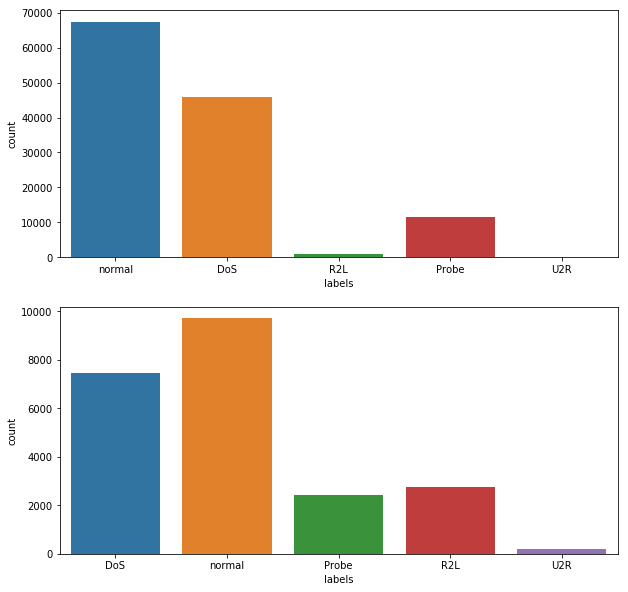

In [9]:
import seaborn as sns
print(train['labels'].value_counts())
print("--------------------------------------------")
print(train.labels.value_counts(normalize=True))

fig,axes=plt.subplots(2,1,figsize=(10,10))
sns.countplot('labels',data=train,ax=axes[0])

print("--------------------------------------------")
print("--------------------------------------------")

print(test['labels'].value_counts())
print("--------------------------------------------")
print(test.labels.value_counts(normalize=True))

sns.countplot('labels',data=test,ax=axes[1])

The count and percentage of different protocol types present in train and test data set are shown in a bar plot below. 'tcp' protocol seems to be used the most by the intrusion types. As compared to 'icmp' and 'udp', 'tcp' protocol is used by intrusion types a lot. Then comes 'udp' protocol with a significant difference from the use of 'tcp' protocol. Least usage is of the 'icmp' protocol.

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64
--------------------------------------------
tcp     0.815167
udp     0.119018
icmp    0.065816
Name: protocol_type, dtype: float64
--------------------------------------------
--------------------------------------------
tcp     18880
udp      2621
icmp     1043
Name: protocol_type, dtype: int64
--------------------------------------------
tcp     0.837473
udp     0.116262
icmp    0.046265
Name: protocol_type, dtype: float64


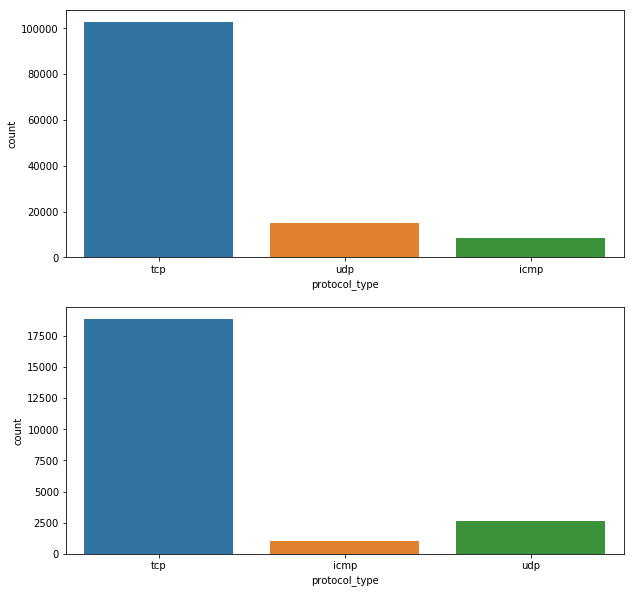

In [10]:
print(train['protocol_type'].value_counts())
print("--------------------------------------------")
print(train.protocol_type.value_counts(normalize=True))

fig,axes=plt.subplots(2,1,figsize=(10,10))
sns.countplot('protocol_type',data=train,ax=axes[0])

print("--------------------------------------------")
print("--------------------------------------------")
print(test['protocol_type'].value_counts())
print("--------------------------------------------")
print(test.protocol_type.value_counts(normalize=True))

sns.countplot('protocol_type',data=test,ax=axes[1])

The count and percentage of different 'service' types in train and test data set are shown in a bar plot below. 'http' count is highest in both train and test data sets. 'http_2784' and 'tftp_u' have the least count in train and test data set respectively.

http           40338
private        21853
domain_u        9043
smtp            7313
ftp_data        6860
eco_i           4586
other           4359
ecr_i           3077
telnet          2353
finger          1767
ftp             1754
auth             955
Z39_50           862
uucp             780
courier          734
bgp              710
whois            693
uucp_path        689
iso_tsap         687
time             654
imap4            647
nnsp             630
vmnet            617
urp_i            602
domain           569
ctf              563
csnet_ns         545
supdup           544
discard          538
http_443         530
               ...  
klogin           433
login            429
ldap             410
netbios_dgm      405
sunrpc           381
netbios_ssn      362
netstat          360
netbios_ns       347
ssh              311
kshell           299
nntp             296
pop_3            264
sql_net          245
IRC              187
ntp_u            168
rje               86
remote_job   

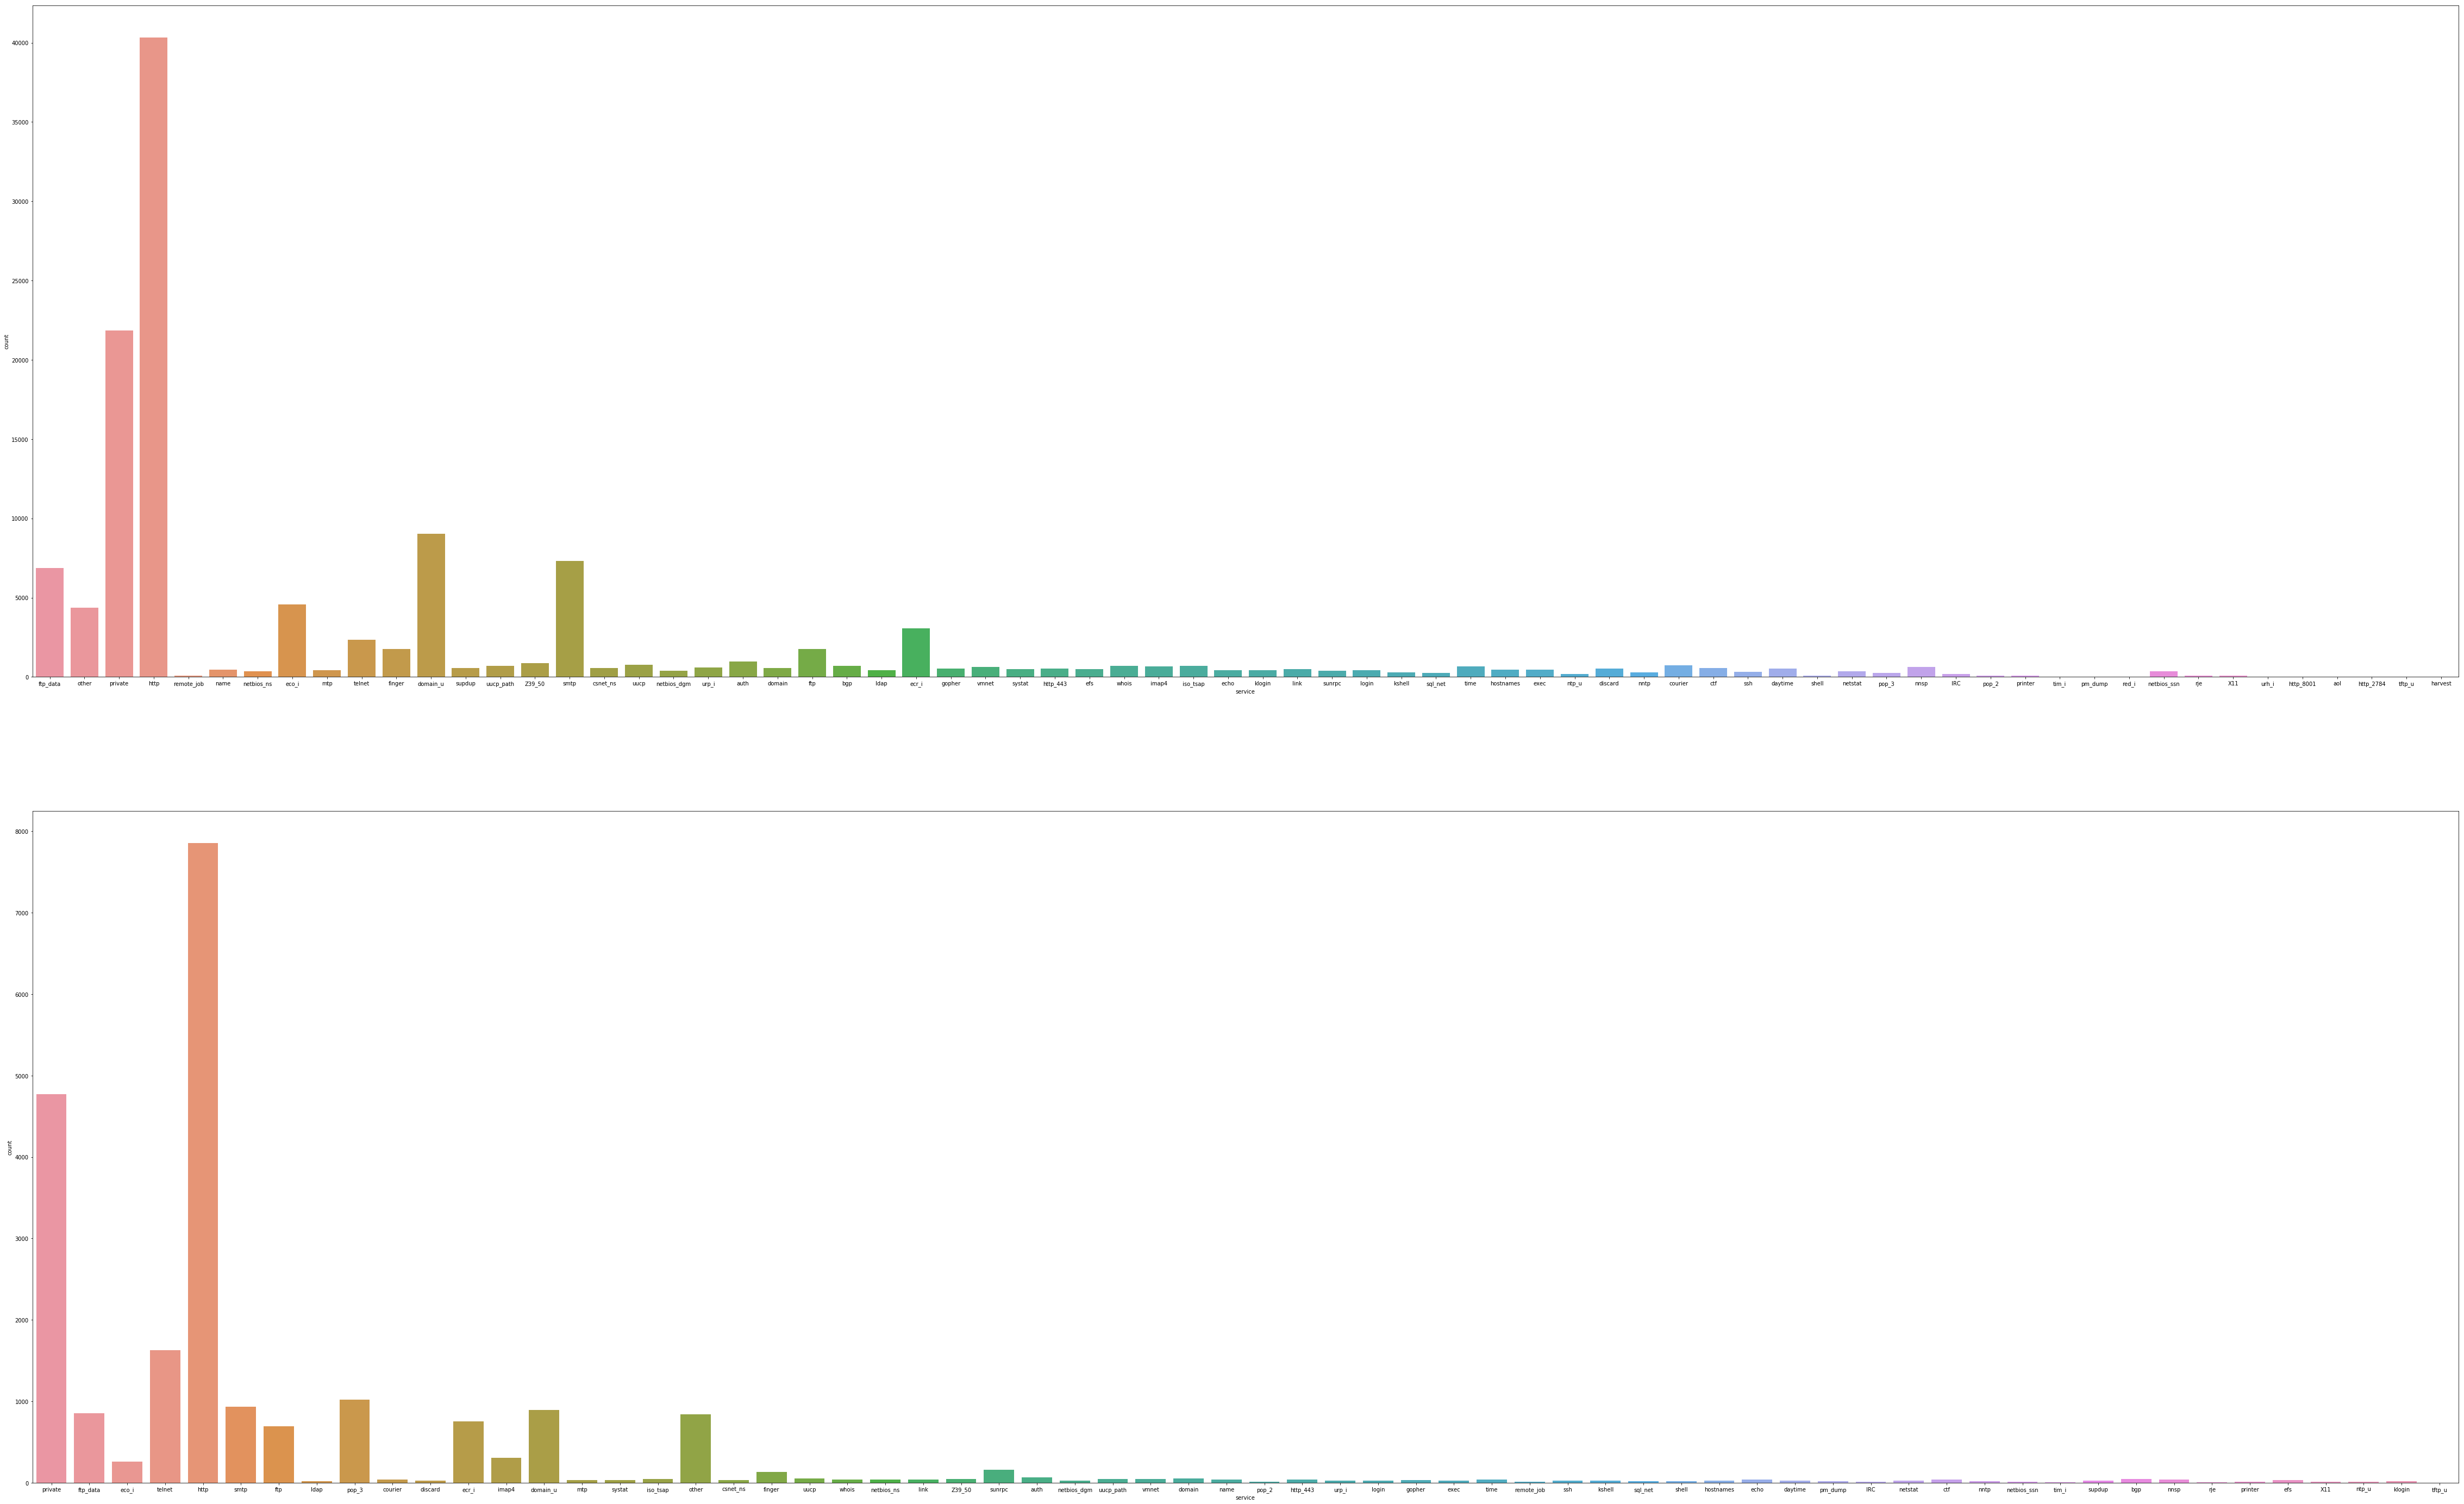

In [11]:
print(train['service'].value_counts())
print("--------------------------------------------")
print(train.service.value_counts(normalize=True))

fig,axes=plt.subplots(2,1,figsize=(80,50))
sns.countplot('service',data=train,ax=axes[0])

print("--------------------------------------------")
print("--------------------------------------------")
print(test['service'].value_counts())
print("--------------------------------------------")
print(test.service.value_counts(normalize=True))

sns.countplot('service',data=test,ax=axes[1])

The count and percentage of different 'flag' types in train and test data set are shown in a bar plot below. 'SF' flag has a significantly higher count than all the other flags, in both test and train data sets.

SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64
--------------------------------------------
SF        0.594929
S0        0.276655
REJ       0.089170
RSTR      0.019218
RSTO      0.012399
S1        0.002897
SH        0.002151
S2        0.001008
RSTOS0    0.000818
S3        0.000389
OTH       0.000365
Name: flag, dtype: float64
--------------------------------------------
--------------------------------------------
SF        14875
REJ        3850
S0         2013
RSTO        773
RSTR        669
S3          249
SH           73
S1           21
S2           15
OTH           4
RSTOS0        2
Name: flag, dtype: int64
--------------------------------------------
SF        0.659821
REJ       0.170777
S0        0.089292
RSTO      0.034289
RSTR      0.029675
S3        0.011045
SH        0.003238
S1        0.000932
S2        0.000665
OTH       0

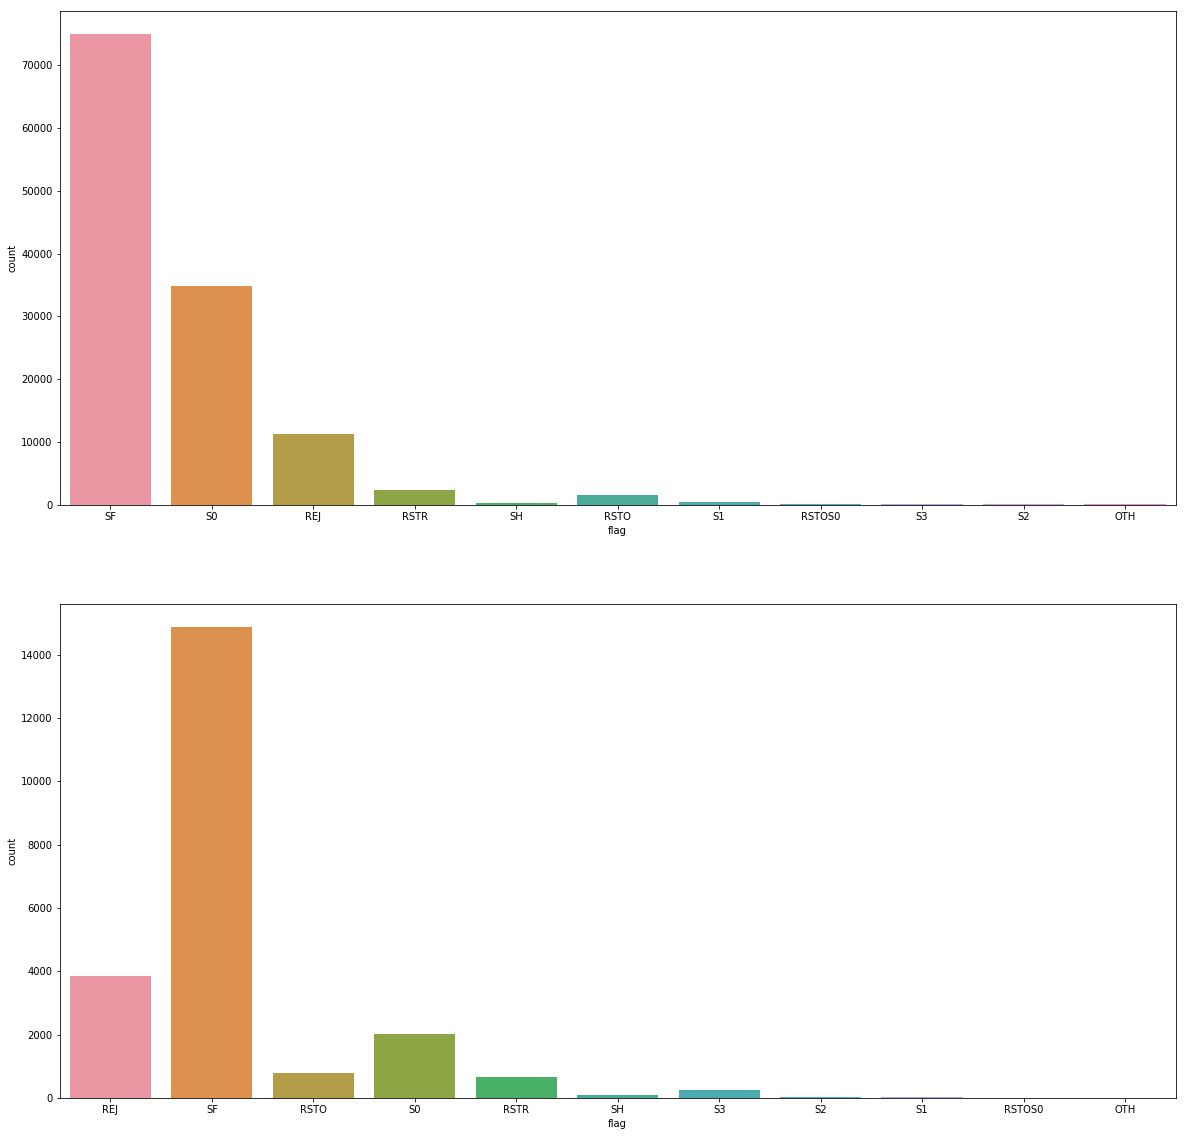

In [12]:
print(train['flag'].value_counts())
print("--------------------------------------------")
print(train.flag.value_counts(normalize=True))

fig,axes=plt.subplots(2,1,figsize=(20,20))
sns.countplot('flag',data=train,ax=axes[0])

print("--------------------------------------------")
print("--------------------------------------------")
print(test['flag'].value_counts())
print("--------------------------------------------")
print(test.flag.value_counts(normalize=True))

sns.countplot('flag',data=test,ax=axes[1])

Distribution of different protocol types in different intrusion types is visualized below. 'U2R' intrusion type never uses 'icmp' protocol. 'tcp' protocol is mostly used in 'normal' or 'DoS' intrusion types. 'udp' is mostly used in 'normal' intrusion types. 'icmp' finds its use mostly in 'DoS' and 'Probe' intrusion types.

labels             DoS   Probe   R2L   U2R   normal
protocol_type                                      
icmp            2847.0  4135.0  null  null   1309.0
tcp            42188.0  5857.0   995    49  53600.0
udp              892.0  1664.0  null     3  12434.0
--------------------------------------------
labels            DoS   Probe     R2L   U2R  normal
protocol_type                                      
icmp            706.0   240.0     4.0  null    93.0
tcp            6738.0  1864.0  2236.0   200  7842.0
udp              14.0   317.0   514.0  null  1776.0


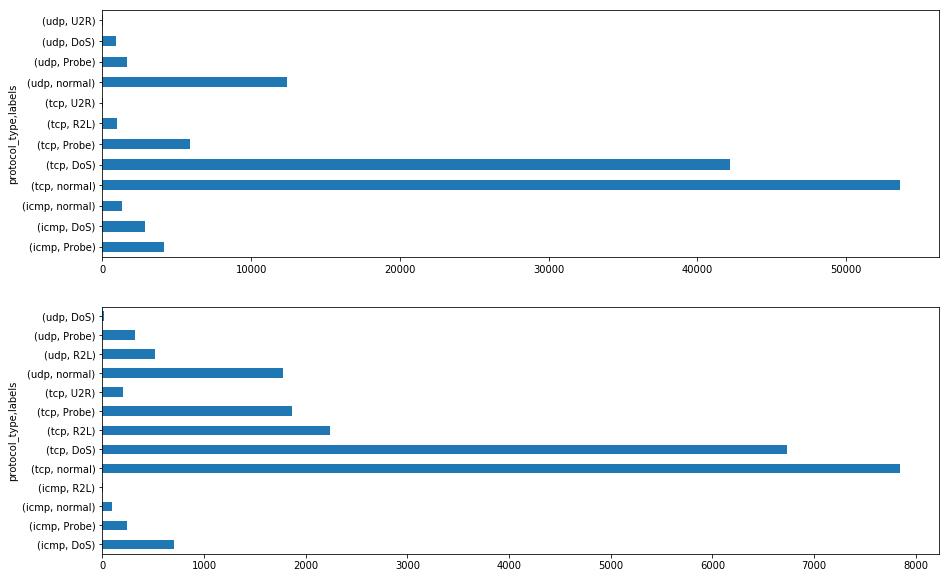

In [13]:
print(train.groupby('protocol_type')['labels'].value_counts().unstack().fillna('null'))

figbi, axesbi = plt.subplots(2,1,figsize=(15, 10))
train.groupby('protocol_type')['labels'].value_counts().plot(kind='barh',ax=axesbi[0])

print("--------------------------------------------")
print(test.groupby('protocol_type')['labels'].value_counts().unstack().fillna('null'))
test.groupby('protocol_type')['labels'].value_counts().plot(kind='barh',ax=axesbi[1])

Distribution of different service types in different intrusion types is visualized below.

labels        DoS Probe   R2L   U2R normal
service                                   
IRC          null     1  null  null    186
X11          null     6  null  null     67
Z39_50        851    11  null  null   null
aol          null     2  null  null   null
auth          703    16  null  null    236
bgp           699    11  null  null   null
courier       726     8  null  null   null
csnet_ns      533    12  null  null   null
ctf           538    25  null  null   null
daytime       503    18  null  null   null
discard       520    18  null  null   null
domain        508    23  null  null     38
domain_u     null     9  null  null   9034
echo          416    18  null  null   null
eco_i        null  4089  null  null    497
ecr_i        2844    43  null  null    190
efs           478     7  null  null   null
exec          465     9  null  null   null
finger       1168    54  null  null    545
ftp           489    32   312     3    918
ftp_data     1209    51   604    12   4984
gopher     

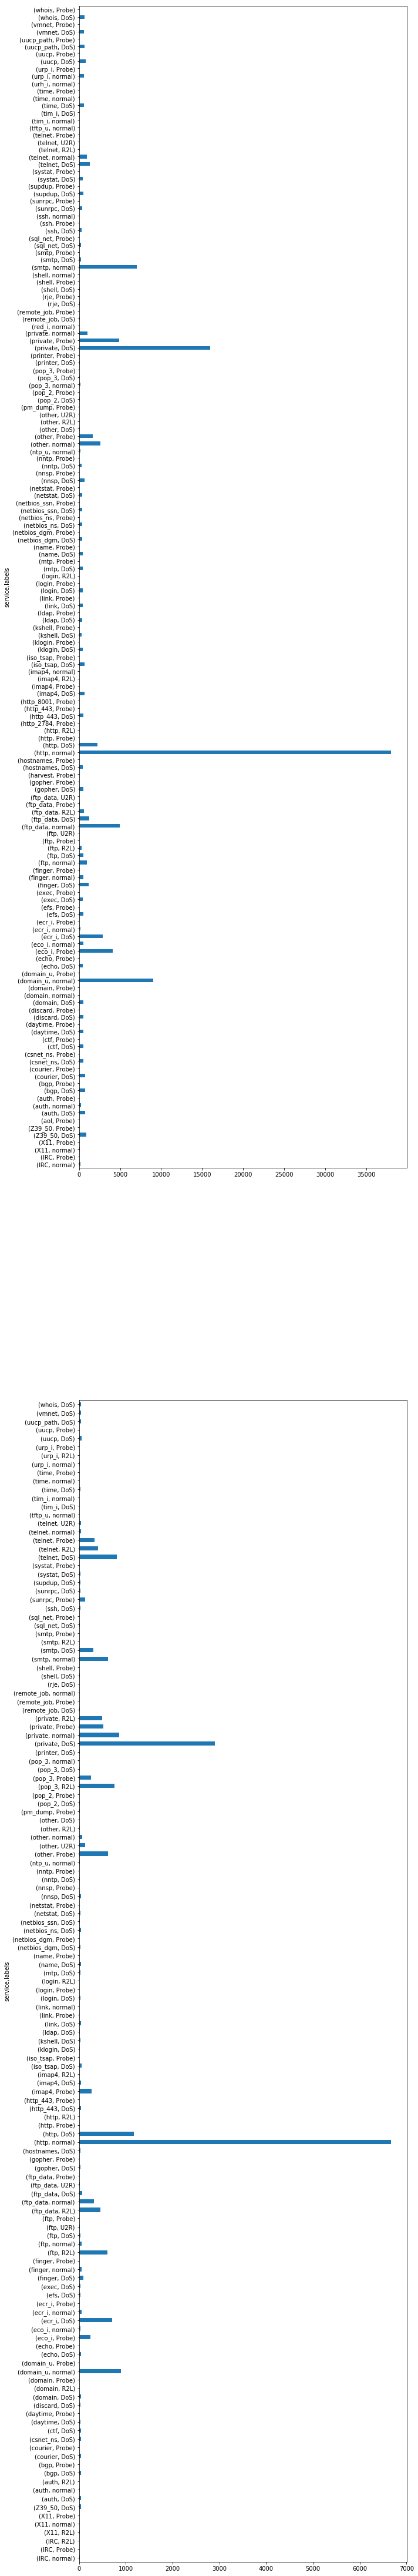

In [14]:
print(train.groupby('service')['labels'].value_counts().unstack().fillna('null'))

figbi, axesbi = plt.subplots(2,1,figsize=(10, 80))
train.groupby('service')['labels'].value_counts().plot(kind='barh',ax=axesbi[0])

print("--------------------------------------------")
print(test.groupby('service')['labels'].value_counts().unstack().fillna('null'))

test.groupby('service')['labels'].value_counts().plot(kind='barh',ax=axesbi[1])

Distribution of different flag types in different intrusion types is visualized below.

labels    DoS   Probe   R2L   U2R normal
flag                                    
OTH      null    35.0  null  null     11
REJ      5671  2869.0  null  null   2693
RSTO     1216    80.0    46     1    219
RSTOS0   null   103.0  null  null   null
RSTR       90  2180.0     5  null    146
S0      34344   153.0  null  null    354
S1          2     1.0     1  null    361
S2          5     2.0     1  null    119
S3       null     1.0     3  null     45
SF       4599  5967.0   935    51  63393
SH       null   265.0     4  null      2
--------------------------------------------
labels   DoS Probe   R2L   U2R normal
flag                                 
OTH     null     4  null  null   null
REJ     2761   943     3   109     34
RSTO     374   369    28  null      2
RSTOS0  null     1  null  null      1
RSTR     534    87     2     2     44
S0      1775   238  null  null   null
S1         1     4     5  null     11
S2         6     1  null  null      8
S3       241  null     4  null      4
SF  

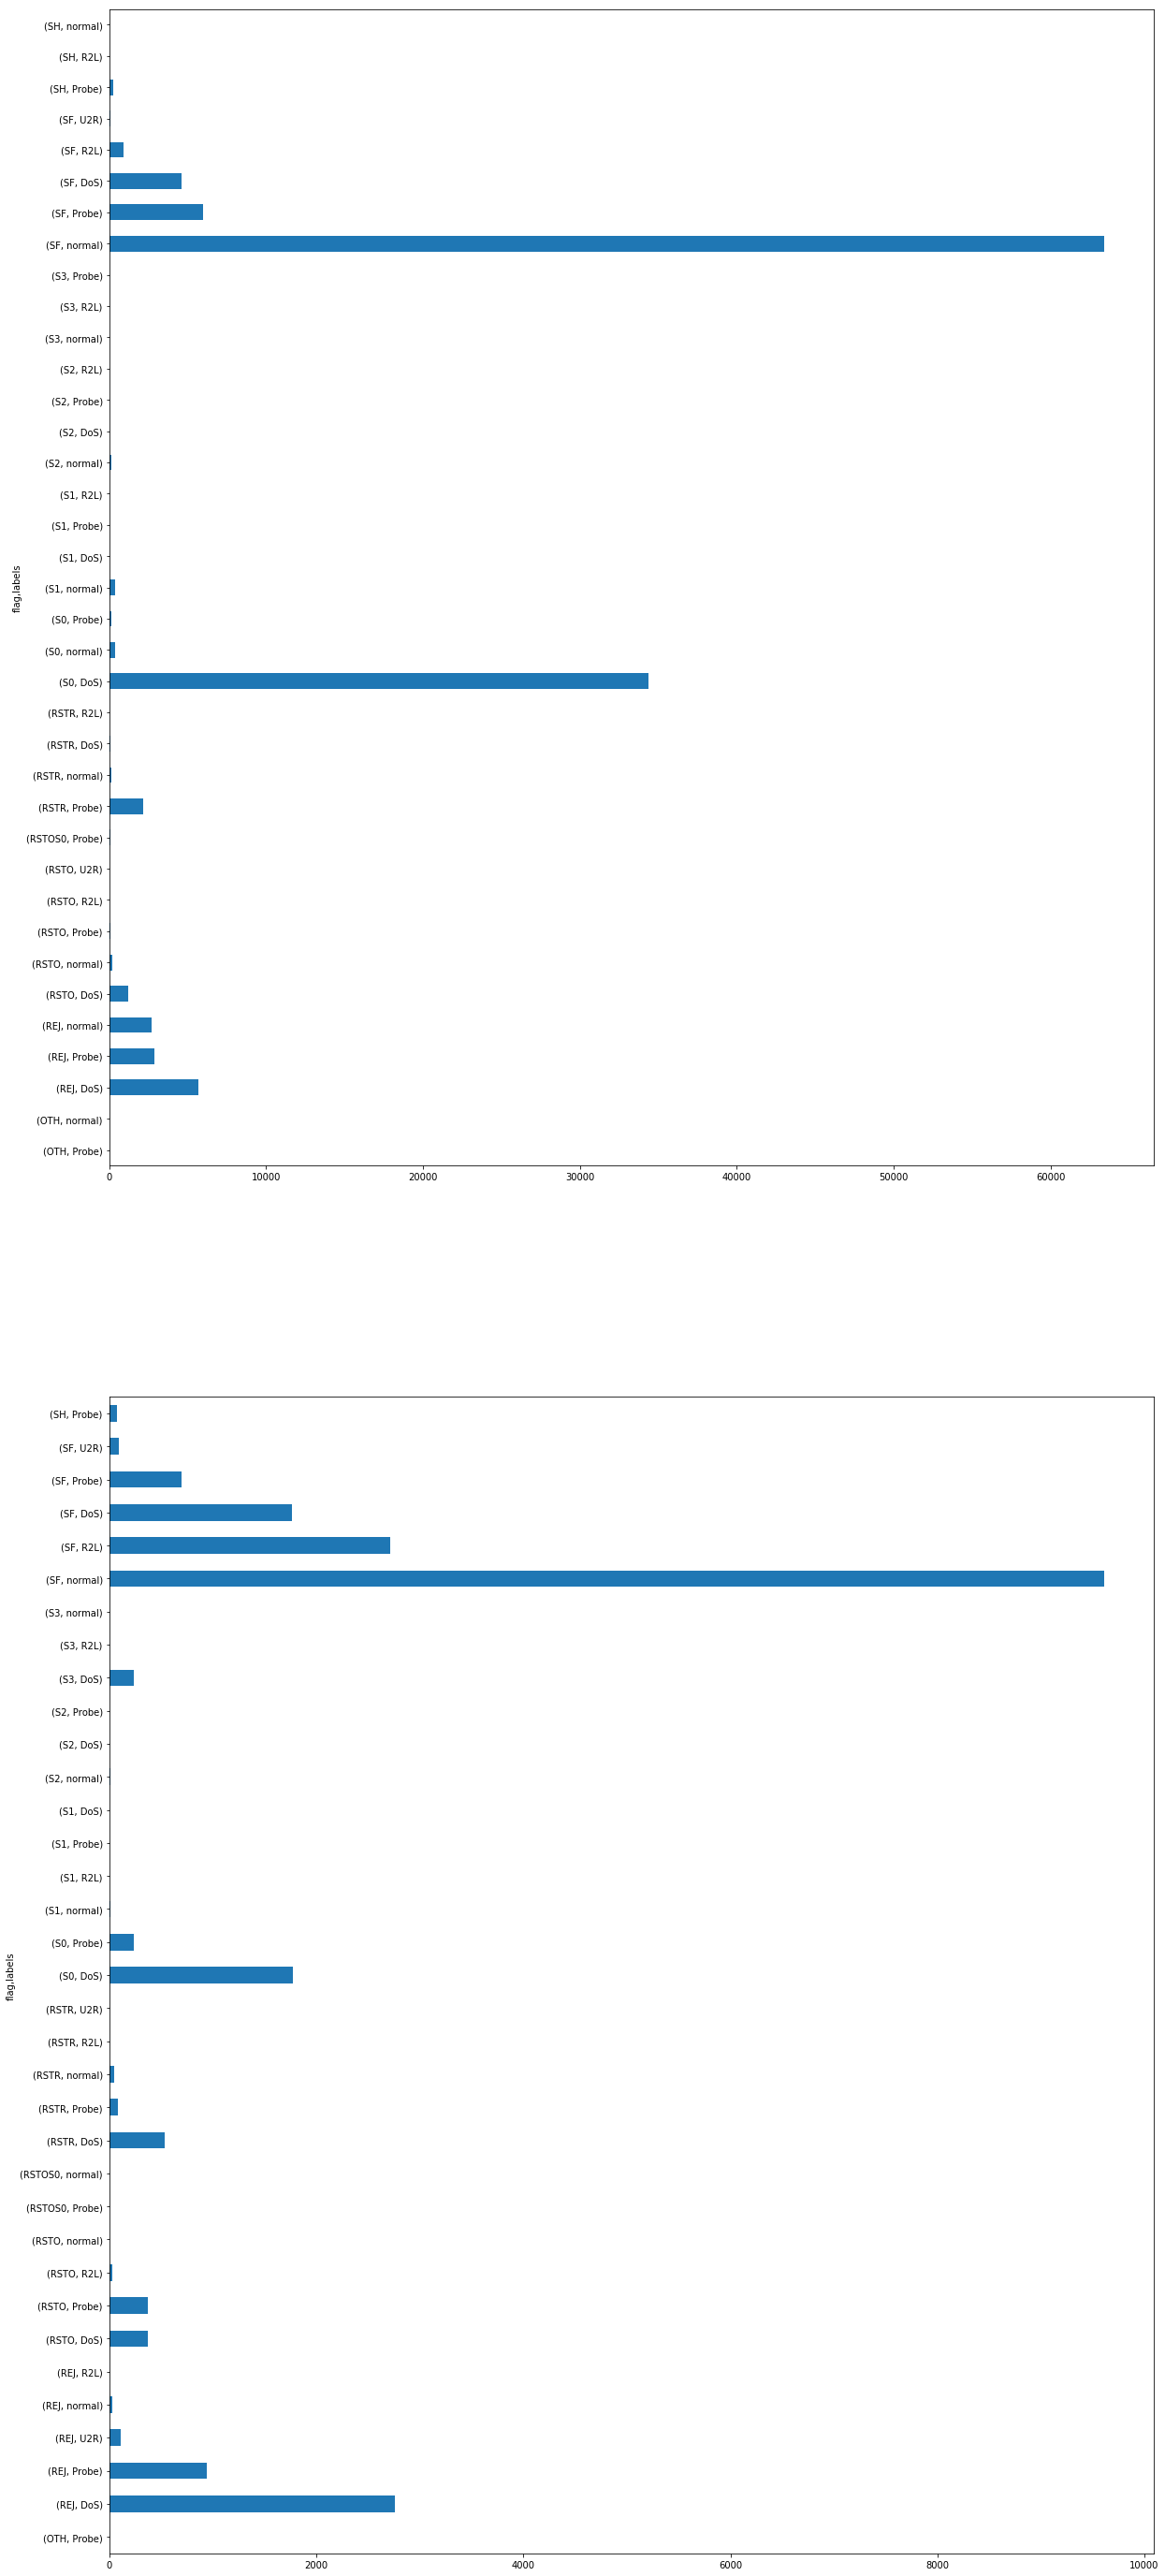

In [15]:
print(train.groupby('flag')['labels'].value_counts().unstack().fillna('null'))

figbi, axesbi = plt.subplots(2,1,figsize=(20, 50))
train.groupby('flag')['labels'].value_counts().plot(kind='barh',ax=axesbi[0])

print("--------------------------------------------")
print(test.groupby('flag')['labels'].value_counts().unstack().fillna('null'))

test.groupby('flag')['labels'].value_counts().plot(kind='barh',ax=axesbi[1])

This table below is created to see whether all binary variables are acutally binary or not. It can be seen that the variable 'su_attempted' has 3 values. Therefore, value 2.0 is replaced by 0.0 in train as well as test data sets.

In [16]:
(train[binary_cols].describe().transpose())

count      mean       std  min  25%  50%  75%  max
land            125973.0  0.000198  0.014086  0.0  0.0  0.0  0.0  1.0
logged_in       125973.0  0.395736  0.489010  0.0  0.0  0.0  1.0  1.0
root_shell      125973.0  0.001342  0.036603  0.0  0.0  0.0  0.0  1.0
su_attempted    125973.0  0.001103  0.045154  0.0  0.0  0.0  0.0  2.0
is_host_login   125973.0  0.000008  0.002817  0.0  0.0  0.0  0.0  1.0
is_guest_login  125973.0  0.009423  0.096612  0.0  0.0  0.0  0.0  1.0

In [17]:
print(train.groupby('su_attempted')['labels'].value_counts().unstack().fillna('null'))
print('--------------------------------------------------------------------------')
print(test.groupby('su_attempted')['labels'].value_counts().unstack().fillna('null'))

labels          DoS  Probe   R2L   U2R   normal
su_attempted                                   
0             45927  11656   994    52  67264.0
1              null   null     1  null     20.0
2              null   null  null  null     59.0
--------------------------------------------------------------------------
labels         DoS Probe   R2L   U2R  normal
su_attempted                                
0             7458  2421  2754   199  9708.0
1             null  null  null     1     1.0
2             null  null  null  null     2.0


In [18]:
train['su_attempted'] = train['su_attempted'].replace(2.0, 0.0)
(train[binary_cols].describe().transpose())

count      mean       std  min  25%  50%  75%  max
land            125973.0  0.000198  0.014086  0.0  0.0  0.0  0.0  1.0
logged_in       125973.0  0.395736  0.489010  0.0  0.0  0.0  1.0  1.0
root_shell      125973.0  0.001342  0.036603  0.0  0.0  0.0  0.0  1.0
su_attempted    125973.0  0.000167  0.012910  0.0  0.0  0.0  0.0  1.0
is_host_login   125973.0  0.000008  0.002817  0.0  0.0  0.0  0.0  1.0
is_guest_login  125973.0  0.009423  0.096612  0.0  0.0  0.0  0.0  1.0

In [19]:
test['su_attempted'] = test['su_attempted'].replace(2.0, 0.0)
(test[binary_cols].describe().transpose())

count      mean       std  min  25%  50%  75%  max
land            22544.0  0.000311  0.017619  0.0  0.0  0.0  0.0  1.0
logged_in       22544.0  0.442202  0.496659  0.0  0.0  0.0  1.0  1.0
root_shell      22544.0  0.002440  0.049334  0.0  0.0  0.0  0.0  1.0
su_attempted    22544.0  0.000089  0.009419  0.0  0.0  0.0  0.0  1.0
is_host_login   22544.0  0.000488  0.022084  0.0  0.0  0.0  0.0  1.0
is_guest_login  22544.0  0.028433  0.166211  0.0  0.0  0.0  0.0  1.0

'num_outbound_cmds' has a value 0 for every reading in tain and test data sets. Therefore it is redundant and hence is removed from train and test data sets.

In [20]:
train[numeric_cols].describe().transpose()

count          mean           std  min    25%  \
duration                     125973.0    287.144650  2.604515e+03  0.0   0.00   
src_bytes                    125973.0  45566.743000  5.870331e+06  0.0   0.00   
dst_bytes                    125973.0  19779.114421  4.021269e+06  0.0   0.00   
wrong_fragment               125973.0      0.022687  2.535300e-01  0.0   0.00   
urgent                       125973.0      0.000111  1.436603e-02  0.0   0.00   
hot                          125973.0      0.204409  2.149968e+00  0.0   0.00   
num_failed_logins            125973.0      0.001222  4.523914e-02  0.0   0.00   
num_compromised              125973.0      0.279250  2.394204e+01  0.0   0.00   
num_root                     125973.0      0.302192  2.439962e+01  0.0   0.00   
num_file_creations           125973.0      0.012669  4.839351e-01  0.0   0.00   
num_shells                   125973.0      0.000413  2.218113e-02  0.0   0.00   
num_access_files             125973.0      0.004096  9.936956e-02  0.0   0.00   
num_outbound_cmds            125973.0      0.000000  0.000000e+00  0.0   0.00   
count                        125973.0     84.107555  1.145086e+02  0.0   2.00   
srv_count                    125973.0     27.737888  7.263584e+01  0.0   2.00   
serror_rate                  125973.0      0.284485  4.464556e-01  0.0   0.00   
srv_serror_rate              125973.0      0.282485  4.470225e-01  0.0   0.00   
rerror_rate                  125973.0      0.119958  3.204355e-01  0.0   0.00   
srv_rerror_rate              125973.0      0.121183  3.236472e-01  0.0   0.00   
same_srv_rate                125973.0      0.660928  4.396229e-01  0.0   0.09   
diff_srv_rate                125973.0      0.063053  1.803144e-01  0.0   0.00   
srv_diff_host_rate           125973.0      0.097322  2.598305e-01  0.0   0.00   
dst_host_count               125973.0    182.148945  9.920621e+01  0.0  82.00   
dst_host_srv_count           125973.0    115.653005  1.107027e+02  0.0  10.00   
dst_host_same_srv_rate       125973.0      0.521242  4.489494e-01  0.0   0.05   
dst_host_diff_srv_rate       125973.0      0.082951  1.889218e-01  0.0   0.00   
dst_host_same_src_port_rate  125973.0      0.148379  3.089971e-01  0.0   0.00   
dst_host_srv_diff_host_rate  125973.0      0.032542  1.125638e-01  0.0   0.00   
dst_host_serror_rate         125973.0      0.284452  4.447841e-01  0.0   0.00   
dst_host_srv_serror_rate     125973.0      0.278485  4.456691e-01  0.0   0.00   
dst_host_rerror_rate         125973.0      0.118832  3.065575e-01  0.0   0.00   
dst_host_srv_rerror_rate     125973.0      0.120240  3.194594e-01  0.0   0.00   

                                50%     75%           max  
duration                       0.00    0.00  4.290800e+04  
src_bytes                     44.00  276.00  1.379964e+09  
dst_bytes                      0.00  516.00  1.309937e+09  
wrong_fragment                 0.00    0.00  3.000000e+00  
urgent                         0.00    0.00  3.000000e+00  
hot                            0.00    0.00  7.700000e+01  
num_failed_logins              0.00    0.00  5.000000e+00  
num_compromised                0.00    0.00  7.479000e+03  
num_root                       0.00    0.00  7.468000e+03  
num_file_creations             0.00    0.00  4.300000e+01  
num_shells                     0.00    0.00  2.000000e+00  
num_access_files               0.00    0.00  9.000000e+00  
num_outbound_cmds              0.00    0.00  0.000000e+00  
count                         14.00  143.00  5.110000e+02  
srv_count                      8.00   18.00  5.110000e+02  
serror_rate                    0.00    1.00  1.000000e+00  
srv_serror_rate                0.00    1.00  1.000000e+00  
rerror_rate                    0.00    0.00  1.000000e+00  
srv_rerror_rate                0.00    0.00  1.000000e+00  
same_srv_rate                  1.00    1.00  1.000000e+00  
diff_srv_rate                  0.00    0.06  1.000000e+00  
srv_diff_host_rate             0.00   

In [21]:
test[numeric_cols].describe().transpose()

count          mean            std  min  \
duration                     22544.0    218.859076    1407.176612  0.0   
src_bytes                    22544.0  10395.450231  472786.431088  0.0   
dst_bytes                    22544.0   2056.018808   21219.297609  0.0   
wrong_fragment               22544.0      0.008428       0.142599  0.0   
urgent                       22544.0      0.000710       0.036473  0.0   
hot                          22544.0      0.105394       0.928428  0.0   
num_failed_logins            22544.0      0.021647       0.150328  0.0   
num_compromised              22544.0      0.119899       7.269597  0.0   
num_root                     22544.0      0.114665       8.041614  0.0   
num_file_creations           22544.0      0.008738       0.676842  0.0   
num_shells                   22544.0      0.001153       0.048014  0.0   
num_access_files             22544.0      0.003549       0.067829  0.0   
num_outbound_cmds            22544.0      0.000000       0.000000  0.0   
count                        22544.0     79.028345     128.539248  0.0   
srv_count                    22544.0     31.124379      89.062532  0.0   
serror_rate                  22544.0      0.102924       0.295367  0.0   
srv_serror_rate              22544.0      0.103635       0.298332  0.0   
rerror_rate                  22544.0      0.238463       0.416118  0.0   
srv_rerror_rate              22544.0      0.235179       0.416215  0.0   
same_srv_rate                22544.0      0.740345       0.412496  0.0   
diff_srv_rate                22544.0      0.094074       0.259138  0.0   
srv_diff_host_rate           22544.0      0.098110       0.253545  0.0   
dst_host_count               22544.0    193.869411      94.035663  0.0   
dst_host_srv_count           22544.0    140.750532     111.783972  0.0   
dst_host_same_srv_rate       22544.0      0.608722       0.435688  0.0   
dst_host_diff_srv_rate       22544.0      0.090540       0.220717  0.0   
dst_host_same_src_port_rate  22544.0      0.132261       0.306268  0.0   
dst_host_srv_diff_host_rate  22544.0      0.019638       0.085394  0.0   
dst_host_serror_rate         22544.0      0.097814       0.273139  0.0   
dst_host_srv_serror_rate     22544.0      0.099426       0.281866  0.0   
dst_host_rerror_rate         22544.0      0.233385       0.387229  0.0   
dst_host_srv_rerror_rate     22544.0      0.226683       0.400875  0.0   

                                25%     50%       75%         max  
duration                       0.00    0.00    0.0000     57715.0  
src_bytes                      0.00   54.00  287.0000  62825648.0  
dst_bytes                      0.00   46.00  601.0000   1345927.0  
wrong_fragment                 0.00    0.00    0.0000         3.0  
urgent                         0.00    0.00    0.0000         3.0  
hot                            0.00    0.00    0.0000       101.0  
num_failed_logins              0.00    0.00    0.0000         4.0  
num_compromised                0.00    0.00    0.0000       796.0  
num_root                       0.00    0.00    0.0000       878.0  
num_file_creations             0.00    0.00    0.0000       100.0  
num_shells                     0.00    0.00    0.0000         5.0  
num_access_files               0.00    0.00    0.0000         4.0  
num_outbound_cmds              0.00    0.00    0.0000         0.0  
count                          1.00    8.00  123.2500       511.0  
srv_count                      1.00    6.00   16.0000       511.0  
serror_rate                    0.00    0.00    0.0000         1.0  
srv_serror_rate                0.00    0.00    0.0000         1.0  
rerror_rate                    0.00    0.00    0.2500         1.0  
srv_rerror_rate                0.00    0.00    0.0725         1.0  
same_srv_rate                  0.25    1.00    1.0000         1.0  
diff_srv_rate                  0.00    0.00    0.0600         1.0  
srv_diff_host_rate             0.00    0.00    0.0000         1.0  
dst_host_count          

Distribution of 'num_outbound_cmds' for every intrusion type is shown below. This is done to actually see whether this feature has zero value across all rows of train and test data sets.

In [22]:
print(train.groupby('num_outbound_cmds')['labels'].value_counts().unstack().fillna('null'))
print('---------------------------------------------------------')
print(test.groupby('num_outbound_cmds')['labels'].value_counts().unstack().fillna('null'))

labels               DoS  Probe  R2L  U2R  normal
num_outbound_cmds                                
0                  45927  11656  995   52   67343
---------------------------------------------------------
labels              DoS  Probe   R2L  U2R  normal
num_outbound_cmds                                
0                  7458   2421  2754  200    9711


In [23]:
train.drop('num_outbound_cmds', axis=1, inplace=True)
test.drop('num_outbound_cmds', axis=1, inplace=True)
numeric_cols.remove('num_outbound_cmds')

## FEATURE SCALING

Scaling is done for all the features, except nominal and binary features, in train and test data sets. 

In [24]:
col_scale=['duration','src_bytes',
       'dst_bytes', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'num_compromised',
        'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
train[col_scale] = sc_x.fit_transform(train[col_scale])

col_scale_test=[]
sc_y=StandardScaler()
test[col_scale] = sc_y.fit_transform(test[col_scale])

/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [25]:
train.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0 -0.110249           tcp  ftp_data   SF  -0.007679  -0.004919     0   
1 -0.110249           udp     other   SF  -0.007737  -0.004919     0   
2 -0.110249           tcp   private   S0  -0.007762  -0.004919     0   
3 -0.110249           tcp      http   SF  -0.007723  -0.002891     0   
4 -0.110249           tcp      http   SF  -0.007728  -0.004814     0   

   wrong_fragment    urgent       hot  ...  dst_host_srv_count  \
0       -0.089486 -0.007736 -0.095076  ...           -0.818890   
1       -0.089486 -0.007736 -0.095076  ...           -1.035688   
2       -0.089486 -0.007736 -0.095076  ...           -0.809857   
3       -0.089486 -0.007736 -0.095076  ...            1.258754   
4       -0.089486 -0.007736 -0.095076  ...            1.258754   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0               -0.782367               -0.280282   
1               -1.161030                2.736852   
2               -0.938287               -0.174417   
3                1.066401               -0.439078   
4                1.066401               -0.439078   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                     0.069972                    -0.289103   
1                     2.367737                    -0.289103   
2                    -0.480197                    -0.289103   
3                    -0.383108                     0.066252   
4                    -0.480197                    -0.289103   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0             -0.639532                 -0.624871             -0.224532   
1             -0.639532                 -0.624871             -0.387635   
2              1.608759                  1.618955             -0.387635   
3             -0.572083                 -0.602433             -0.387635   
4             -0.639532                 -0.624871             -0.387635   

   dst_host_srv_rerror_rate  labels  
0                 -0.376387  normal  
1                 -0.376387  normal  
2                 -0.376387     DoS  
3                 -0.345084  normal  
4                 -0.376387  normal  

[5 rows x 41 columns]

In [26]:
test.head()

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0 -0.155534           tcp   private   REJ  -0.021988  -0.096896     0   
1 -0.155534           tcp   private   REJ  -0.021988  -0.096896     0   
2 -0.154113           tcp  ftp_data    SF   0.005473  -0.096896     0   
3 -0.155534          icmp     eco_i    SF  -0.021946  -0.096896     0   
4 -0.154823           tcp    telnet  RSTO  -0.021988  -0.096189     0   

   wrong_fragment    urgent       hot  ...  dst_host_srv_count  \
0       -0.059104 -0.019459 -0.113521  ...           -1.169697   
1       -0.059104 -0.019459 -0.113521  ...           -1.250212   
2       -0.059104 -0.019459 -0.113521  ...           -0.489800   
3       -0.059104 -0.019459 -0.113521  ...           -0.749234   
4       -0.059104 -0.019459 -0.113521  ...           -0.489800   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0               -1.305370               -0.138370   
1               -1.397181               -0.138370   
2                0.002934               -0.228985   
3                0.898090               -0.410217   
4               -0.685647                0.360018   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                    -0.431856                    -0.229980   
1                    -0.431856                    -0.229980   
2                     1.559906                     0.004234   
3                     2.833328                     3.049016   
4                    -0.333901                     0.004234   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0             -0.358118                  -0.35275              1.979791   
1             -0.358118                  -0.35275              1.979791   
2             -0.358118                  -0.35275             -0.602719   
3             -0.358118                  -0.35275             -0.602719   
4             -0.358118                  -0.35275              1.540764   

   dst_host_srv_rerror_rate  labels  
0                  1.929116     DoS  
1                  1.929116     DoS  
2                 -0.565483  normal  
3                 -0.565483   Probe  
4                  1.205682   Probe  

[5 rows x 41 columns]

In [27]:
change_attack_dict={
    'normal':0,
    'DoS':1,
    'Probe':1,
    'R2L':1,
    'U2R':1
}#For BINARY CLASSIFICATION
change_attack_dict2={
    'normal':0,
    'DoS':1,
    'Probe':2,
    'R2L':3,
    'U2R':4
}#For MULTICLASS CLASSIFICATION

In [28]:
x_categorical_train = train.drop('labels', axis=1)
y_categorical_train = train.labels.map(change_attack_dict)
#print(x_categorical_train.dtypes)
x_categorical_test = test.drop('labels', axis=1)
y_categorical_test = test.labels.map(change_attack_dict)

## CatBoost Classifier

In [29]:
from time import time
t1=time()
from catboost import CatBoostClassifier
cate_features = np.where(x_categorical_train.dtypes == object)[0]
#print(cate_features)
cat_classifier_model=CatBoostClassifier(iterations=100, learning_rate=1, depth=6, loss_function='Logloss',
                                        eval_metric='AUC',use_best_model=True,random_seed=0)
cat_classifier_model.fit(x_categorical_train, y_categorical_train, cat_features=cate_features,
                         eval_set=(x_categorical_test,y_categorical_test))
print(time()-t1)

0:	test: 0.8338502	best: 0.8338502 (0)	total: 196ms	remaining: 19.4s
1:	test: 0.8713432	best: 0.8713432 (1)	total: 329ms	remaining: 16.1s
2:	test: 0.8696809	best: 0.8713432 (1)	total: 493ms	remaining: 16s
3:	test: 0.8734262	best: 0.8734262 (3)	total: 627ms	remaining: 15s
4:	test: 0.8901720	best: 0.8901720 (4)	total: 781ms	remaining: 14.8s
5:	test: 0.8895952	best: 0.8901720 (4)	total: 922ms	remaining: 14.4s
6:	test: 0.8978854	best: 0.8978854 (6)	total: 1.1s	remaining: 14.6s
7:	test: 0.8999906	best: 0.8999906 (7)	total: 1.25s	remaining: 14.4s
8:	test: 0.8958884	best: 0.8999906 (7)	total: 1.4s	remaining: 14.1s
9:	test: 0.9035420	best: 0.9035420 (9)	total: 1.53s	remaining: 13.8s
10:	test: 0.9059894	best: 0.9059894 (10)	total: 1.68s	remaining: 13.6s
11:	test: 0.9005098	best: 0.9059894 (10)	total: 1.81s	remaining: 13.3s
12:	test: 0.9000836	best: 0.9059894 (10)	total: 2s	remaining: 13.4s
13:	test: 0.9019340	best: 0.9059894 (10)	total: 2.24s	remaining: 13.8s
14:	test: 0.8988924	best: 0.9059894

In [30]:
y_pred_categorical=cat_classifier_model.predict(x_categorical_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_categorical_test, y_pred_categorical))
print(confusion_matrix(y_categorical_test, y_pred_categorical))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82      9711
           1       0.90      0.80      0.85     12833

   micro avg       0.83      0.83      0.83     22544
   macro avg       0.83      0.84      0.83     22544
weighted avg       0.84      0.83      0.84     22544

[[ 8536  1175]
 [ 2553 10280]]


In [31]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print("Accuracy: ", accuracy_score(y_categorical_test, y_pred_categorical))
print("F1 score: ", f1_score(y_categorical_test, y_pred_categorical))
print("Precision: ", precision_score(y_categorical_test, y_pred_categorical))
print("Recall: ", recall_score(y_categorical_test, y_pred_categorical))

Accuracy:  0.8346344925479063
F1 score:  0.8465085638998683
Precision:  0.8974247053688346
Recall:  0.8010597677861763


In [36]:
#from catboost import Pool
#from catboost.utils import get_roc_curve
#catboost_pool = Pool(x_categorical_train,y_categorical_train,cat_features=cate_features)
#(fpr, tpr, thresholds) = get_roc_curve(cat_classifier_model, catboost_pool)
#plt.plot(fpr,tpr,label="CATBOOST")
#plt.legend(loc=0)

#the graph below (obtained after running the code above) is NOT CORRECT

In [37]:
cnf_matrix1=confusion_matrix(y_categorical_test, y_pred_categorical)

FP1 = cnf_matrix1.sum(axis=0) - np.diag(cnf_matrix1)  
FN1 = cnf_matrix1.sum(axis=1) - np.diag(cnf_matrix1)
TP1 = np.diag(cnf_matrix1)
TN1 = cnf_matrix1.sum() - (FP1 + FN1 + TP1)

FP1 = FP1.astype(float)
FN1 = FN1.astype(float)
TP1 = TP1.astype(float)
TN1 = TN1.astype(float)

# Sensitivity, hit rate, recall, or true positive rate, Detection Rate
TPR1 = TP1/(TP1+FN1)
# Specificity or true negative rate
TNR1 = TN1/(TN1+FP1) 
# Precision or positive predictive value
PPV1 = TP1/(TP1+FP1)
# Negative predictive value
NPV1 = TN1/(TN1+FN1)
# Fall out or false positive rate
FPR1 = FP1/(FP1+TN1)
# False negative rate
FNR1 = FN1/(TP1+FN1)
# False discovery rate
FDR1 = FP1/(TP1+FP1)
# Overall accuracy
ACC1 = (TP1+TN1)/(TP1+FP1+FN1+TN1)

In [38]:
print(TPR1)
print(FPR1)
print(ACC1)

[0.87900319 0.80105977]
[0.19894023 0.12099681]
[0.83463449 0.83463449]


In [39]:
x_categorical_train2 = train.drop('labels', axis=1)
y_categorical_train2 = train.labels.map(change_attack_dict2)
#print(x_categorical_train2.dtypes)
x_categorical_test2 = test.drop('labels', axis=1)
y_categorical_test2 = test.labels.map(change_attack_dict2)

In [40]:
from time import time
t2=time()
from catboost import CatBoostClassifier
cate_features2 = np.where(x_categorical_train2.dtypes == object)[0]
#print(cate_features)
cat_classifier_model2=CatBoostClassifier(iterations=100, learning_rate=1, depth=6, loss_function='MultiClass',
                                        classes_count=5,use_best_model=True,random_seed=0)
cat_classifier_model2.fit(x_categorical_train2, y_categorical_train2, cat_features=cate_features2,
                         eval_set=(x_categorical_test2,y_categorical_test2))
print(time()-t2)

0:	learn: -0.1745149	test: -2.0622671	best: -2.0622671 (0)	total: 422ms	remaining: 41.7s
1:	learn: -0.1916433	test: -2.0310543	best: -2.0310543 (1)	total: 1000ms	remaining: 49s
2:	learn: -0.1052419	test: -1.9999964	best: -1.9999964 (2)	total: 1.46s	remaining: 47.3s
3:	learn: -0.0887413	test: -2.0226367	best: -1.9999964 (2)	total: 1.9s	remaining: 45.6s
4:	learn: -0.0740861	test: -1.8484428	best: -1.8484428 (4)	total: 2.46s	remaining: 46.8s
5:	learn: -0.0639780	test: -1.9232053	best: -1.8484428 (4)	total: 2.89s	remaining: 45.3s
6:	learn: -0.0558055	test: -1.8746438	best: -1.8484428 (4)	total: 3.31s	remaining: 44s
7:	learn: -0.0501696	test: -2.1072870	best: -1.8484428 (4)	total: 3.87s	remaining: 44.5s
8:	learn: -0.0467518	test: -2.1744500	best: -1.8484428 (4)	total: 4.32s	remaining: 43.7s
9:	learn: -0.0428612	test: -2.1433920	best: -1.8484428 (4)	total: 4.98s	remaining: 44.8s
10:	learn: -0.0460757	test: -2.2495587	best: -1.8484428 (4)	total: 5.8s	remaining: 46.9s
11:	learn: -0.0398848	tes

92:	learn: -0.0044411	test: -3.2591367	best: -1.8484428 (4)	total: 48.2s	remaining: 3.63s
93:	learn: -0.0043493	test: -3.2575192	best: -1.8484428 (4)	total: 48.8s	remaining: 3.12s
94:	learn: -0.0043196	test: -3.2311677	best: -1.8484428 (4)	total: 49.6s	remaining: 2.61s
95:	learn: -0.0042875	test: -3.2227946	best: -1.8484428 (4)	total: 50.2s	remaining: 2.09s
96:	learn: -0.0041093	test: -3.1939495	best: -1.8484428 (4)	total: 50.8s	remaining: 1.57s
97:	learn: -0.0039929	test: -3.2343436	best: -1.8484428 (4)	total: 51.2s	remaining: 1.04s
98:	learn: -0.0037675	test: -3.2329831	best: -1.8484428 (4)	total: 51.9s	remaining: 525ms
99:	learn: -0.0037078	test: -3.2320958	best: -1.8484428 (4)	total: 52.4s	remaining: 0us

bestTest = -1.848442809
bestIteration = 4

Shrink model to first 5 iterations.
54.81624794006348


In [41]:
y_pred_categorical2=cat_classifier_model2.predict(x_categorical_test2)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_categorical_test2, y_pred_categorical2))
print(confusion_matrix(y_categorical_test2, y_pred_categorical2))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      9711
           1       0.80      0.66      0.72      7458
           2       0.42      0.59      0.49      2421
           3       0.26      0.30      0.28      2754
           4       0.60      0.01      0.03       200

   micro avg       0.64      0.64      0.64     22544
   macro avg       0.56      0.46      0.45     22544
weighted avg       0.66      0.64      0.64     22544

[[7191  457  560 1502    1]
 [ 840 4928 1126  564    0]
 [  72  687 1419  243    0]
 [1605   84  234  830    1]
 [ 138   26   12   21    3]]


In [42]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print("Accuracy: ", accuracy_score(y_categorical_test2, y_pred_categorical2))
print("F1 score: ", f1_score(y_categorical_test2, y_pred_categorical2,average='micro'))
print("Precision: ", precision_score(y_categorical_test2, y_pred_categorical2,average='micro'))
print("Recall: ", recall_score(y_categorical_test2, y_pred_categorical2,average='micro'))

Accuracy:  0.6374645138396026
F1 score:  0.6374645138396026
Precision:  0.6374645138396026
Recall:  0.6374645138396026


In [43]:
cnf_matrix=confusion_matrix(y_categorical_test2, y_pred_categorical2)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate, Detection Rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [44]:
print(TPR)
print(FPR)
print(ACC)

[0.74050046 0.66076696 0.58612144 0.30137981 0.015     ]
[2.06888491e-01 8.31234257e-02 9.60095413e-02 1.17736230e-01
 8.95094880e-05]
[0.7704489  0.83215046 0.86985451 0.81130234 0.99117282]


In [45]:
params = {'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[250,100,500,1000],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200],
          #'ctr_border_count':[50,5,10,20,100,200]
          }

In [47]:
import catboost as cb
from sklearn.model_selection import KFold
from paramsearch import paramsearch
from itertools import product,chain

# read in the train and test data from csv files
colnames = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels","learners"]
train_set = pd.read_csv('/home/vinay/Downloads/NSL-KDD/KDDTrain+.txt',sep=',',header=None,names=colnames,na_values='?')
test_set = pd.read_csv("/home/vinay/Downloads/NSL-KDD/KDDTest+.txt",sep=',',header=None,names=colnames,na_values='?',skiprows=[0])

train_set.drop(columns=['learners'],inplace=True)
test_set.drop(columns=['learners'],inplace=True)

# convert categorical columns to integers
category_cols = ["protocol_type","service","flag",'labels']
cat_dims = [train_set.columns.get_loc(i) for i in category_cols[:-1]] 
#for header in category_cols:
#    train_set[header] = train_set[header].astype('category').cat.codes
#    test_set[header] = test_set[header].astype('category').cat.codes

# split labels out of data sets    
train_label = train['labels'].map(change_attack_dict)
train_set = train.drop('labels', axis=1)
test_label = test['labels'].map(change_attack_dict)
test_set = test.drop('labels', axis=1)
print(train_label)

0         0
1         0
2         1
3         0
4         0
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        0
13        1
14        1
15        1
16        0
17        1
18        0
19        0
20        1
21        1
22        0
23        0
24        1
25        0
26        1
27        0
28        0
29        0
         ..
125943    0
125944    0
125945    0
125946    1
125947    1
125948    1
125949    0
125950    1
125951    0
125952    0
125953    1
125954    0
125955    0
125956    0
125957    0
125958    1
125959    0
125960    0
125961    0
125962    0
125963    0
125964    1
125965    0
125966    1
125967    0
125968    1
125969    0
125970    0
125971    1
125972    0
Name: labels, Length: 125973, dtype: int64


In [48]:
#def crossvaltest(params,train_set,train_label,cat_dims,n_splits=3):
#    kf = KFold(n_splits=n_splits,shuffle=True) 
#    res = []
#    for train_index, test_index in kf.split(train_set):
#        train = train_set.iloc[train_index,:]
#        test = train_set.iloc[test_index,:]
#
#        labels = train_label.ix[train_index]
#        test_labels = train_label.ix[test_index]
#
#        clf = cb.CatBoostClassifier(**params)
#        clf.fit(train, np.ravel(labels), cat_features=cat_dims)
#
#        res.append(np.mean(clf.predict(test)==np.ravel(test_labels)))
#    return np.mean(res)

In [87]:
def catboost_param_tune(params,train_set,train_label,cat_dims=None,n_splits=3):
    ps = paramsearch(params)
    # search 'border_count', 'l2_leaf_reg' etc. individually 
    #   but 'iterations','learning_rate' together
    for prms in chain(ps.grid_search(['border_count']),
                      #ps.grid_search(['ctr_border_count']),
                      ps.grid_search(['l2_leaf_reg']),
                      ps.grid_search(['iterations','learning_rate']),
                      ps.grid_search(['depth'])):
        
        #USE THE COMMAND BELOW AND THE CELL ABOVE WHEN YOU WANT TO PERFORM CV ON THE DATA SETS
        
        #res = crossvaltest(prms,train_set,train_label,cat_dims,n_splits)
        
        # save the crossvalidation result so that future iterations can reuse the best parameters
        
        clf = cb.CatBoostClassifier(**prms,eval_metric='AUC',use_best_model=True,random_seed=0,
                                    loss_function='Logloss')
        clf.fit(x_categorical_train, np.ravel(y_categorical_train), cat_features=cat_dims,
                eval_set=(x_categorical_test,y_categorical_test))

        res=np.mean(clf.predict(x_categorical_test)==np.ravel(y_categorical_test))
        
        ps.register_result(res,prms)
        
        print('res= '+str(res))
        print('prms= '+str(prms))
        print('best score= '+str(ps.bestscore()))
        print('best param= '+str(ps.bestparam()))
    return ps.bestparam()
tt=time()
bestparams = catboost_param_tune(params,train_set,train_label,cat_dims)
print(time()-tt)

0:	test: 0.6253585	best: 0.6253585 (0)	total: 104ms	remaining: 25.9s
1:	test: 0.6238683	best: 0.6253585 (0)	total: 204ms	remaining: 25.3s
2:	test: 0.6238683	best: 0.6253585 (0)	total: 292ms	remaining: 24s
3:	test: 0.6238683	best: 0.6253585 (0)	total: 405ms	remaining: 24.9s
4:	test: 0.7965647	best: 0.7965647 (4)	total: 496ms	remaining: 24.3s
5:	test: 0.8393376	best: 0.8393376 (5)	total: 583ms	remaining: 23.7s
6:	test: 0.8285790	best: 0.8393376 (5)	total: 687ms	remaining: 23.8s
7:	test: 0.8353871	best: 0.8393376 (5)	total: 774ms	remaining: 23.4s
8:	test: 0.8468511	best: 0.8468511 (8)	total: 891ms	remaining: 23.8s
9:	test: 0.8346425	best: 0.8468511 (8)	total: 1.12s	remaining: 26.9s
10:	test: 0.8344689	best: 0.8468511 (8)	total: 1.25s	remaining: 27.1s
11:	test: 0.8485840	best: 0.8485840 (11)	total: 1.34s	remaining: 26.6s
12:	test: 0.8505104	best: 0.8505104 (12)	total: 1.45s	remaining: 26.4s
13:	test: 0.8560940	best: 0.8560940 (13)	total: 1.54s	remaining: 25.9s
14:	test: 0.8492119	best: 0.8

117:	test: 0.9297528	best: 0.9297528 (117)	total: 12.9s	remaining: 14.4s
118:	test: 0.9297640	best: 0.9297640 (118)	total: 13s	remaining: 14.3s
119:	test: 0.9297760	best: 0.9297760 (119)	total: 13.1s	remaining: 14.2s
120:	test: 0.9285614	best: 0.9297760 (119)	total: 13.3s	remaining: 14.2s
121:	test: 0.9286058	best: 0.9297760 (119)	total: 13.5s	remaining: 14.2s
122:	test: 0.9286730	best: 0.9297760 (119)	total: 13.6s	remaining: 14.1s
123:	test: 0.9286621	best: 0.9297760 (119)	total: 13.8s	remaining: 14.1s
124:	test: 0.9284439	best: 0.9297760 (119)	total: 14s	remaining: 14s
125:	test: 0.9285001	best: 0.9297760 (119)	total: 14.2s	remaining: 13.9s
126:	test: 0.9283312	best: 0.9297760 (119)	total: 14.3s	remaining: 13.8s
127:	test: 0.9283963	best: 0.9297760 (119)	total: 14.4s	remaining: 13.7s
128:	test: 0.9285603	best: 0.9297760 (119)	total: 14.5s	remaining: 13.6s
129:	test: 0.9284923	best: 0.9297760 (119)	total: 14.7s	remaining: 13.5s
130:	test: 0.9284905	best: 0.9297760 (119)	total: 14.8s	r

232:	test: 0.9205822	best: 0.9297760 (119)	total: 24.7s	remaining: 1.8s
233:	test: 0.9206003	best: 0.9297760 (119)	total: 24.8s	remaining: 1.7s
234:	test: 0.9205740	best: 0.9297760 (119)	total: 24.9s	remaining: 1.59s
235:	test: 0.9211995	best: 0.9297760 (119)	total: 25s	remaining: 1.48s
236:	test: 0.9212956	best: 0.9297760 (119)	total: 25.1s	remaining: 1.38s
237:	test: 0.9225025	best: 0.9297760 (119)	total: 25.2s	remaining: 1.27s
238:	test: 0.9236970	best: 0.9297760 (119)	total: 25.3s	remaining: 1.17s
239:	test: 0.9237376	best: 0.9297760 (119)	total: 25.4s	remaining: 1.06s
240:	test: 0.9211409	best: 0.9297760 (119)	total: 25.5s	remaining: 953ms
241:	test: 0.9210199	best: 0.9297760 (119)	total: 25.6s	remaining: 847ms
242:	test: 0.9207390	best: 0.9297760 (119)	total: 25.7s	remaining: 741ms
243:	test: 0.9198052	best: 0.9297760 (119)	total: 25.8s	remaining: 635ms
244:	test: 0.9198682	best: 0.9297760 (119)	total: 25.9s	remaining: 529ms
245:	test: 0.9209814	best: 0.9297760 (119)	total: 26s	r

95:	test: 0.9186476	best: 0.9190712 (92)	total: 9.68s	remaining: 15.5s
96:	test: 0.9181944	best: 0.9190712 (92)	total: 9.77s	remaining: 15.4s
97:	test: 0.9167446	best: 0.9190712 (92)	total: 9.87s	remaining: 15.3s
98:	test: 0.9170426	best: 0.9190712 (92)	total: 9.97s	remaining: 15.2s
99:	test: 0.9166054	best: 0.9190712 (92)	total: 10.1s	remaining: 15.1s
100:	test: 0.9172086	best: 0.9190712 (92)	total: 10.1s	remaining: 15s
101:	test: 0.9162770	best: 0.9190712 (92)	total: 10.2s	remaining: 14.9s
102:	test: 0.9155972	best: 0.9190712 (92)	total: 10.3s	remaining: 14.8s
103:	test: 0.9161727	best: 0.9190712 (92)	total: 10.4s	remaining: 14.7s
104:	test: 0.9161733	best: 0.9190712 (92)	total: 10.6s	remaining: 14.6s
105:	test: 0.9161886	best: 0.9190712 (92)	total: 10.7s	remaining: 14.5s
106:	test: 0.9161590	best: 0.9190712 (92)	total: 10.7s	remaining: 14.4s
107:	test: 0.9156642	best: 0.9190712 (92)	total: 10.9s	remaining: 14.3s
108:	test: 0.9161552	best: 0.9190712 (92)	total: 11s	remaining: 14.3s
1

212:	test: 0.9151527	best: 0.9190712 (92)	total: 22.2s	remaining: 3.86s
213:	test: 0.9152107	best: 0.9190712 (92)	total: 22.3s	remaining: 3.75s
214:	test: 0.9151110	best: 0.9190712 (92)	total: 22.4s	remaining: 3.65s
215:	test: 0.9151047	best: 0.9190712 (92)	total: 22.5s	remaining: 3.54s
216:	test: 0.9150370	best: 0.9190712 (92)	total: 22.6s	remaining: 3.44s
217:	test: 0.9151626	best: 0.9190712 (92)	total: 22.7s	remaining: 3.33s
218:	test: 0.9152261	best: 0.9190712 (92)	total: 22.8s	remaining: 3.23s
219:	test: 0.9153124	best: 0.9190712 (92)	total: 22.9s	remaining: 3.12s
220:	test: 0.9153218	best: 0.9190712 (92)	total: 23s	remaining: 3.02s
221:	test: 0.9153191	best: 0.9190712 (92)	total: 23.1s	remaining: 2.91s
222:	test: 0.9151938	best: 0.9190712 (92)	total: 23.2s	remaining: 2.8s
223:	test: 0.9151547	best: 0.9190712 (92)	total: 23.3s	remaining: 2.7s
224:	test: 0.9152166	best: 0.9190712 (92)	total: 23.4s	remaining: 2.6s
225:	test: 0.9153332	best: 0.9190712 (92)	total: 23.5s	remaining: 2.4

73:	test: 0.8984950	best: 0.8984950 (73)	total: 7.7s	remaining: 18.3s
74:	test: 0.8991804	best: 0.8991804 (74)	total: 7.88s	remaining: 18.4s
75:	test: 0.8996018	best: 0.8996018 (75)	total: 8.02s	remaining: 18.4s
76:	test: 0.8997377	best: 0.8997377 (76)	total: 8.12s	remaining: 18.2s
77:	test: 0.9001076	best: 0.9001076 (77)	total: 8.21s	remaining: 18.1s
78:	test: 0.9001435	best: 0.9001435 (78)	total: 8.31s	remaining: 18s
79:	test: 0.9006782	best: 0.9006782 (79)	total: 8.4s	remaining: 17.9s
80:	test: 0.9005582	best: 0.9006782 (79)	total: 8.49s	remaining: 17.7s
81:	test: 0.9023527	best: 0.9023527 (81)	total: 8.6s	remaining: 17.6s
82:	test: 0.9007283	best: 0.9023527 (81)	total: 8.69s	remaining: 17.5s
83:	test: 0.9007180	best: 0.9023527 (81)	total: 8.78s	remaining: 17.4s
84:	test: 0.9009353	best: 0.9023527 (81)	total: 8.88s	remaining: 17.2s
85:	test: 0.9004722	best: 0.9023527 (81)	total: 8.97s	remaining: 17.1s
86:	test: 0.9010897	best: 0.9023527 (81)	total: 9.06s	remaining: 17s
87:	test: 0.9

189:	test: 0.9004415	best: 0.9052172 (110)	total: 18.5s	remaining: 5.86s
190:	test: 0.9004716	best: 0.9052172 (110)	total: 18.6s	remaining: 5.76s
191:	test: 0.9006435	best: 0.9052172 (110)	total: 18.7s	remaining: 5.66s
192:	test: 0.9005346	best: 0.9052172 (110)	total: 18.8s	remaining: 5.56s
193:	test: 0.9005615	best: 0.9052172 (110)	total: 18.9s	remaining: 5.46s
194:	test: 0.9007513	best: 0.9052172 (110)	total: 19s	remaining: 5.36s
195:	test: 0.9007293	best: 0.9052172 (110)	total: 19.1s	remaining: 5.26s
196:	test: 0.9006024	best: 0.9052172 (110)	total: 19.2s	remaining: 5.16s
197:	test: 0.9005317	best: 0.9052172 (110)	total: 19.3s	remaining: 5.06s
198:	test: 0.9006500	best: 0.9052172 (110)	total: 19.4s	remaining: 4.97s
199:	test: 0.9007154	best: 0.9052172 (110)	total: 19.5s	remaining: 4.87s
200:	test: 0.9007246	best: 0.9052172 (110)	total: 19.6s	remaining: 4.77s
201:	test: 0.9008342	best: 0.9052172 (110)	total: 19.7s	remaining: 4.68s
202:	test: 0.9008228	best: 0.9052172 (110)	total: 19.

51:	test: 0.8877109	best: 0.8877109 (51)	total: 4.89s	remaining: 18.6s
52:	test: 0.8894439	best: 0.8894439 (52)	total: 4.98s	remaining: 18.5s
53:	test: 0.8898430	best: 0.8898430 (53)	total: 5.07s	remaining: 18.4s
54:	test: 0.8921968	best: 0.8921968 (54)	total: 5.17s	remaining: 18.3s
55:	test: 0.8919572	best: 0.8921968 (54)	total: 5.26s	remaining: 18.2s
56:	test: 0.8920252	best: 0.8921968 (54)	total: 5.35s	remaining: 18.1s
57:	test: 0.8938132	best: 0.8938132 (57)	total: 5.45s	remaining: 18s
58:	test: 0.8943155	best: 0.8943155 (58)	total: 5.54s	remaining: 17.9s
59:	test: 0.8948074	best: 0.8948074 (59)	total: 5.63s	remaining: 17.8s
60:	test: 0.8948663	best: 0.8948663 (60)	total: 5.73s	remaining: 17.8s
61:	test: 0.8956108	best: 0.8956108 (61)	total: 5.83s	remaining: 17.7s
62:	test: 0.8955950	best: 0.8956108 (61)	total: 5.91s	remaining: 17.5s
63:	test: 0.8961459	best: 0.8961459 (63)	total: 6.01s	remaining: 17.5s
64:	test: 0.8960698	best: 0.8961459 (63)	total: 6.09s	remaining: 17.3s
65:	test

168:	test: 0.9015567	best: 0.9018989 (145)	total: 15.9s	remaining: 7.63s
169:	test: 0.9018251	best: 0.9018989 (145)	total: 16s	remaining: 7.53s
170:	test: 0.9019221	best: 0.9019221 (170)	total: 16.1s	remaining: 7.44s
171:	test: 0.9022233	best: 0.9022233 (171)	total: 16.2s	remaining: 7.34s
172:	test: 0.9017212	best: 0.9022233 (171)	total: 16.3s	remaining: 7.25s
173:	test: 0.9017499	best: 0.9022233 (171)	total: 16.4s	remaining: 7.15s
174:	test: 0.9015362	best: 0.9022233 (171)	total: 16.5s	remaining: 7.06s
175:	test: 0.9015286	best: 0.9022233 (171)	total: 16.6s	remaining: 6.97s
176:	test: 0.9016482	best: 0.9022233 (171)	total: 16.7s	remaining: 6.88s
177:	test: 0.9016661	best: 0.9022233 (171)	total: 16.8s	remaining: 6.79s
178:	test: 0.9015906	best: 0.9022233 (171)	total: 16.9s	remaining: 6.69s
179:	test: 0.9014656	best: 0.9022233 (171)	total: 17s	remaining: 6.59s
180:	test: 0.9013659	best: 0.9022233 (171)	total: 17.1s	remaining: 6.5s
181:	test: 0.9014401	best: 0.9022233 (171)	total: 17.1s	

30:	test: 0.8602387	best: 0.8628397 (25)	total: 2.97s	remaining: 21s
31:	test: 0.8663631	best: 0.8663631 (31)	total: 3.07s	remaining: 20.9s
32:	test: 0.8710902	best: 0.8710902 (32)	total: 3.16s	remaining: 20.8s
33:	test: 0.8743251	best: 0.8743251 (33)	total: 3.26s	remaining: 20.7s
34:	test: 0.8769221	best: 0.8769221 (34)	total: 3.35s	remaining: 20.6s
35:	test: 0.8798921	best: 0.8798921 (35)	total: 3.44s	remaining: 20.5s
36:	test: 0.8812495	best: 0.8812495 (36)	total: 3.54s	remaining: 20.4s
37:	test: 0.8830538	best: 0.8830538 (37)	total: 3.62s	remaining: 20.2s
38:	test: 0.8852666	best: 0.8852666 (38)	total: 3.71s	remaining: 20.1s
39:	test: 0.8868915	best: 0.8868915 (39)	total: 3.81s	remaining: 20s
40:	test: 0.8875879	best: 0.8875879 (40)	total: 3.9s	remaining: 19.9s
41:	test: 0.8895018	best: 0.8895018 (41)	total: 3.98s	remaining: 19.7s
42:	test: 0.8912974	best: 0.8912974 (42)	total: 4.09s	remaining: 19.7s
43:	test: 0.8930327	best: 0.8930327 (43)	total: 4.18s	remaining: 19.6s
44:	test: 0

147:	test: 0.9137796	best: 0.9141038 (112)	total: 13.9s	remaining: 9.57s
148:	test: 0.9155311	best: 0.9155311 (148)	total: 14s	remaining: 9.47s
149:	test: 0.9163611	best: 0.9163611 (149)	total: 14.1s	remaining: 9.37s
150:	test: 0.9166254	best: 0.9166254 (150)	total: 14.2s	remaining: 9.29s
151:	test: 0.9165018	best: 0.9166254 (150)	total: 14.3s	remaining: 9.19s
152:	test: 0.9161527	best: 0.9166254 (150)	total: 14.3s	remaining: 9.09s
153:	test: 0.9165029	best: 0.9166254 (150)	total: 14.4s	remaining: 9.01s
154:	test: 0.9161356	best: 0.9166254 (150)	total: 14.5s	remaining: 8.91s
155:	test: 0.9162106	best: 0.9166254 (150)	total: 14.6s	remaining: 8.81s
156:	test: 0.9161389	best: 0.9166254 (150)	total: 14.7s	remaining: 8.72s
157:	test: 0.9159194	best: 0.9166254 (150)	total: 14.8s	remaining: 8.62s
158:	test: 0.9157921	best: 0.9166254 (150)	total: 14.9s	remaining: 8.53s
159:	test: 0.9156990	best: 0.9166254 (150)	total: 15s	remaining: 8.44s
160:	test: 0.9154220	best: 0.9166254 (150)	total: 15.1s

6:	test: 0.8650095	best: 0.8815547 (3)	total: 693ms	remaining: 24.1s
7:	test: 0.8560468	best: 0.8815547 (3)	total: 791ms	remaining: 23.9s
8:	test: 0.8554130	best: 0.8815547 (3)	total: 888ms	remaining: 23.8s
9:	test: 0.8481853	best: 0.8815547 (3)	total: 985ms	remaining: 23.6s
10:	test: 0.8497031	best: 0.8815547 (3)	total: 1.07s	remaining: 23.4s
11:	test: 0.8557523	best: 0.8815547 (3)	total: 1.17s	remaining: 23.2s
12:	test: 0.8521478	best: 0.8815547 (3)	total: 1.27s	remaining: 23.3s
13:	test: 0.8522640	best: 0.8815547 (3)	total: 1.36s	remaining: 23s
14:	test: 0.8614842	best: 0.8815547 (3)	total: 1.46s	remaining: 22.9s
15:	test: 0.8560608	best: 0.8815547 (3)	total: 1.57s	remaining: 22.9s
16:	test: 0.8596636	best: 0.8815547 (3)	total: 1.66s	remaining: 22.7s
17:	test: 0.8525252	best: 0.8815547 (3)	total: 1.74s	remaining: 22.4s
18:	test: 0.8530458	best: 0.8815547 (3)	total: 1.84s	remaining: 22.4s
19:	test: 0.8509951	best: 0.8815547 (3)	total: 1.93s	remaining: 22.2s
20:	test: 0.8513499	best: 

124:	test: 0.9133518	best: 0.9145653 (113)	total: 11.8s	remaining: 11.8s
125:	test: 0.9127769	best: 0.9145653 (113)	total: 11.9s	remaining: 11.7s
126:	test: 0.9127019	best: 0.9145653 (113)	total: 12s	remaining: 11.6s
127:	test: 0.9125528	best: 0.9145653 (113)	total: 12.1s	remaining: 11.5s
128:	test: 0.9126355	best: 0.9145653 (113)	total: 12.2s	remaining: 11.4s
129:	test: 0.9127066	best: 0.9145653 (113)	total: 12.3s	remaining: 11.3s
130:	test: 0.9123690	best: 0.9145653 (113)	total: 12.4s	remaining: 11.2s
131:	test: 0.9130036	best: 0.9145653 (113)	total: 12.5s	remaining: 11.1s
132:	test: 0.9125440	best: 0.9145653 (113)	total: 12.6s	remaining: 11.1s
133:	test: 0.9125259	best: 0.9145653 (113)	total: 12.7s	remaining: 11s
134:	test: 0.9123224	best: 0.9145653 (113)	total: 12.8s	remaining: 10.9s
135:	test: 0.9147453	best: 0.9147453 (135)	total: 12.9s	remaining: 10.8s
136:	test: 0.9146938	best: 0.9147453 (135)	total: 13s	remaining: 10.7s
137:	test: 0.9145428	best: 0.9147453 (135)	total: 13s	rem

238:	test: 0.9155908	best: 0.9175438 (173)	total: 22.8s	remaining: 1.05s
239:	test: 0.9155851	best: 0.9175438 (173)	total: 22.8s	remaining: 952ms
240:	test: 0.9155971	best: 0.9175438 (173)	total: 22.9s	remaining: 857ms
241:	test: 0.9154750	best: 0.9175438 (173)	total: 23s	remaining: 762ms
242:	test: 0.9155120	best: 0.9175438 (173)	total: 23.1s	remaining: 666ms
243:	test: 0.9156666	best: 0.9175438 (173)	total: 23.2s	remaining: 571ms
244:	test: 0.9156751	best: 0.9175438 (173)	total: 23.3s	remaining: 476ms
245:	test: 0.9157078	best: 0.9175438 (173)	total: 23.4s	remaining: 381ms
246:	test: 0.9157110	best: 0.9175438 (173)	total: 23.5s	remaining: 286ms
247:	test: 0.9157123	best: 0.9175438 (173)	total: 23.6s	remaining: 191ms
248:	test: 0.9159495	best: 0.9175438 (173)	total: 23.7s	remaining: 95.3ms
249:	test: 0.9159543	best: 0.9175438 (173)	total: 23.9s	remaining: 0us

bestTest = 0.9175437662
bestIteration = 173

Shrink model to first 174 iterations.
res= 0.8242104329311568
prms= {'depth': 3, 

102:	test: 0.9235086	best: 0.9265793 (94)	total: 9.43s	remaining: 13.5s
103:	test: 0.9265979	best: 0.9265979 (103)	total: 9.51s	remaining: 13.4s
104:	test: 0.9264224	best: 0.9265979 (103)	total: 9.59s	remaining: 13.2s
105:	test: 0.9235131	best: 0.9265979 (103)	total: 9.69s	remaining: 13.2s
106:	test: 0.9245888	best: 0.9265979 (103)	total: 9.77s	remaining: 13.1s
107:	test: 0.9245037	best: 0.9265979 (103)	total: 9.85s	remaining: 13s
108:	test: 0.9239233	best: 0.9265979 (103)	total: 9.94s	remaining: 12.9s
109:	test: 0.9268418	best: 0.9268418 (109)	total: 10s	remaining: 12.8s
110:	test: 0.9269613	best: 0.9269613 (110)	total: 10.1s	remaining: 12.6s
111:	test: 0.9278205	best: 0.9278205 (111)	total: 10.2s	remaining: 12.6s
112:	test: 0.9278382	best: 0.9278382 (112)	total: 10.3s	remaining: 12.5s
113:	test: 0.9281676	best: 0.9281676 (113)	total: 10.4s	remaining: 12.4s
114:	test: 0.9282411	best: 0.9282411 (114)	total: 10.5s	remaining: 12.3s
115:	test: 0.9283100	best: 0.9283100 (115)	total: 10.5s	

216:	test: 0.9227422	best: 0.9297316 (119)	total: 19.8s	remaining: 3.01s
217:	test: 0.9230402	best: 0.9297316 (119)	total: 19.9s	remaining: 2.92s
218:	test: 0.9230894	best: 0.9297316 (119)	total: 20s	remaining: 2.83s
219:	test: 0.9232234	best: 0.9297316 (119)	total: 20.1s	remaining: 2.74s
220:	test: 0.9232039	best: 0.9297316 (119)	total: 20.2s	remaining: 2.65s
221:	test: 0.9232490	best: 0.9297316 (119)	total: 20.3s	remaining: 2.56s
222:	test: 0.9232516	best: 0.9297316 (119)	total: 20.4s	remaining: 2.47s
223:	test: 0.9235900	best: 0.9297316 (119)	total: 20.5s	remaining: 2.37s
224:	test: 0.9236167	best: 0.9297316 (119)	total: 20.5s	remaining: 2.28s
225:	test: 0.9237703	best: 0.9297316 (119)	total: 20.6s	remaining: 2.19s
226:	test: 0.9237877	best: 0.9297316 (119)	total: 20.7s	remaining: 2.1s
227:	test: 0.9240222	best: 0.9297316 (119)	total: 20.8s	remaining: 2.01s
228:	test: 0.9239821	best: 0.9297316 (119)	total: 20.9s	remaining: 1.92s
229:	test: 0.9237891	best: 0.9297316 (119)	total: 21s	

78:	test: 0.9220474	best: 0.9220474 (78)	total: 7.35s	remaining: 15.9s
79:	test: 0.9220894	best: 0.9220894 (79)	total: 7.43s	remaining: 15.8s
80:	test: 0.9223996	best: 0.9223996 (80)	total: 7.52s	remaining: 15.7s
81:	test: 0.9232228	best: 0.9232228 (81)	total: 7.62s	remaining: 15.6s
82:	test: 0.9234518	best: 0.9234518 (82)	total: 7.71s	remaining: 15.5s
83:	test: 0.9242069	best: 0.9242069 (83)	total: 7.8s	remaining: 15.4s
84:	test: 0.9241570	best: 0.9242069 (83)	total: 7.91s	remaining: 15.3s
85:	test: 0.9246886	best: 0.9246886 (85)	total: 8s	remaining: 15.2s
86:	test: 0.9247311	best: 0.9247311 (86)	total: 8.08s	remaining: 15.1s
87:	test: 0.9248174	best: 0.9248174 (87)	total: 8.18s	remaining: 15.1s
88:	test: 0.9250920	best: 0.9250920 (88)	total: 8.26s	remaining: 14.9s
89:	test: 0.9251454	best: 0.9251454 (89)	total: 8.34s	remaining: 14.8s
90:	test: 0.9255032	best: 0.9255032 (90)	total: 8.44s	remaining: 14.7s
91:	test: 0.9262733	best: 0.9262733 (91)	total: 8.53s	remaining: 14.6s
92:	test: 

193:	test: 0.9227411	best: 0.9296177 (157)	total: 19.3s	remaining: 5.57s
194:	test: 0.9216612	best: 0.9296177 (157)	total: 19.4s	remaining: 5.46s
195:	test: 0.9211229	best: 0.9296177 (157)	total: 19.4s	remaining: 5.36s
196:	test: 0.9211459	best: 0.9296177 (157)	total: 19.5s	remaining: 5.26s
197:	test: 0.9214679	best: 0.9296177 (157)	total: 19.6s	remaining: 5.16s
198:	test: 0.9215256	best: 0.9296177 (157)	total: 19.7s	remaining: 5.05s
199:	test: 0.9215398	best: 0.9296177 (157)	total: 19.8s	remaining: 4.96s
200:	test: 0.9216768	best: 0.9296177 (157)	total: 19.9s	remaining: 4.86s
201:	test: 0.9216386	best: 0.9296177 (157)	total: 20s	remaining: 4.75s
202:	test: 0.9216227	best: 0.9296177 (157)	total: 20.1s	remaining: 4.66s
203:	test: 0.9217233	best: 0.9296177 (157)	total: 20.2s	remaining: 4.55s
204:	test: 0.9220530	best: 0.9296177 (157)	total: 20.3s	remaining: 4.46s
205:	test: 0.9221947	best: 0.9296177 (157)	total: 20.4s	remaining: 4.36s
206:	test: 0.9222662	best: 0.9296177 (157)	total: 20.

54:	test: 0.9134208	best: 0.9134208 (54)	total: 5.28s	remaining: 18.7s
55:	test: 0.9133518	best: 0.9134208 (54)	total: 5.37s	remaining: 18.6s
56:	test: 0.9141000	best: 0.9141000 (56)	total: 5.45s	remaining: 18.5s
57:	test: 0.9141851	best: 0.9141851 (57)	total: 5.55s	remaining: 18.4s
58:	test: 0.9139713	best: 0.9141851 (57)	total: 5.65s	remaining: 18.3s
59:	test: 0.9147397	best: 0.9147397 (59)	total: 5.74s	remaining: 18.2s
60:	test: 0.9167070	best: 0.9167070 (60)	total: 5.84s	remaining: 18.1s
61:	test: 0.9162776	best: 0.9167070 (60)	total: 5.94s	remaining: 18s
62:	test: 0.9161166	best: 0.9167070 (60)	total: 6.04s	remaining: 17.9s
63:	test: 0.9162993	best: 0.9167070 (60)	total: 6.14s	remaining: 17.9s
64:	test: 0.9179764	best: 0.9179764 (64)	total: 6.24s	remaining: 17.8s
65:	test: 0.9176344	best: 0.9179764 (64)	total: 6.34s	remaining: 17.7s
66:	test: 0.9176733	best: 0.9179764 (64)	total: 6.43s	remaining: 17.6s
67:	test: 0.9194787	best: 0.9194787 (67)	total: 6.52s	remaining: 17.5s
68:	test

169:	test: 0.9251779	best: 0.9298712 (148)	total: 18.3s	remaining: 8.63s
170:	test: 0.9204664	best: 0.9298712 (148)	total: 18.5s	remaining: 8.54s
171:	test: 0.9205440	best: 0.9298712 (148)	total: 18.7s	remaining: 8.46s
172:	test: 0.9199107	best: 0.9298712 (148)	total: 18.8s	remaining: 8.38s
173:	test: 0.9198821	best: 0.9298712 (148)	total: 18.9s	remaining: 8.27s
174:	test: 0.9180657	best: 0.9298712 (148)	total: 19s	remaining: 8.15s
175:	test: 0.9183296	best: 0.9298712 (148)	total: 19.1s	remaining: 8.04s
176:	test: 0.9187657	best: 0.9298712 (148)	total: 19.3s	remaining: 7.94s
177:	test: 0.9189158	best: 0.9298712 (148)	total: 19.4s	remaining: 7.86s
178:	test: 0.9187981	best: 0.9298712 (148)	total: 19.5s	remaining: 7.75s
179:	test: 0.9192136	best: 0.9298712 (148)	total: 19.6s	remaining: 7.63s
180:	test: 0.9193065	best: 0.9298712 (148)	total: 19.7s	remaining: 7.51s
181:	test: 0.9188253	best: 0.9298712 (148)	total: 19.8s	remaining: 7.4s
182:	test: 0.9186112	best: 0.9298712 (148)	total: 19.9

29:	test: 0.8744051	best: 0.8744051 (29)	total: 3.11s	remaining: 22.8s
30:	test: 0.8747003	best: 0.8747003 (30)	total: 3.2s	remaining: 22.6s
31:	test: 0.8745314	best: 0.8747003 (30)	total: 3.3s	remaining: 22.5s
32:	test: 0.8749429	best: 0.8749429 (32)	total: 3.4s	remaining: 22.4s
33:	test: 0.8750809	best: 0.8750809 (33)	total: 3.49s	remaining: 22.2s
34:	test: 0.8754855	best: 0.8754855 (34)	total: 3.58s	remaining: 22s
35:	test: 0.8756462	best: 0.8756462 (35)	total: 3.68s	remaining: 21.9s
36:	test: 0.8852461	best: 0.8852461 (36)	total: 3.77s	remaining: 21.7s
37:	test: 0.8837169	best: 0.8852461 (36)	total: 3.88s	remaining: 21.6s
38:	test: 0.8844568	best: 0.8852461 (36)	total: 4.06s	remaining: 22s
39:	test: 0.8845563	best: 0.8852461 (36)	total: 4.22s	remaining: 22.2s
40:	test: 0.8827206	best: 0.8852461 (36)	total: 4.33s	remaining: 22.1s
41:	test: 0.8830327	best: 0.8852461 (36)	total: 4.43s	remaining: 21.9s
42:	test: 0.8852941	best: 0.8852941 (42)	total: 4.51s	remaining: 21.7s
43:	test: 0.8

144:	test: 0.9306816	best: 0.9306816 (144)	total: 15.7s	remaining: 11.3s
145:	test: 0.9310628	best: 0.9310628 (145)	total: 15.8s	remaining: 11.2s
146:	test: 0.9309961	best: 0.9310628 (145)	total: 15.9s	remaining: 11.1s
147:	test: 0.9308007	best: 0.9310628 (145)	total: 16s	remaining: 11s
148:	test: 0.9306170	best: 0.9310628 (145)	total: 16s	remaining: 10.9s
149:	test: 0.9306078	best: 0.9310628 (145)	total: 16.1s	remaining: 10.8s
150:	test: 0.9305655	best: 0.9310628 (145)	total: 16.2s	remaining: 10.6s
151:	test: 0.9303620	best: 0.9310628 (145)	total: 16.3s	remaining: 10.5s
152:	test: 0.9304333	best: 0.9310628 (145)	total: 16.4s	remaining: 10.4s
153:	test: 0.9305965	best: 0.9310628 (145)	total: 16.5s	remaining: 10.3s
154:	test: 0.9306396	best: 0.9310628 (145)	total: 16.6s	remaining: 10.2s
155:	test: 0.9306093	best: 0.9310628 (145)	total: 16.7s	remaining: 10.1s
156:	test: 0.9305911	best: 0.9310628 (145)	total: 16.8s	remaining: 9.97s
157:	test: 0.9306892	best: 0.9310628 (145)	total: 16.9s	r

3:	test: 0.6239980	best: 0.6253585 (0)	total: 521ms	remaining: 32.1s
4:	test: 0.6239980	best: 0.6253585 (0)	total: 609ms	remaining: 29.8s
5:	test: 0.6239980	best: 0.6253585 (0)	total: 695ms	remaining: 28.3s
6:	test: 0.6239980	best: 0.6253585 (0)	total: 797ms	remaining: 27.7s
7:	test: 0.6239980	best: 0.6253585 (0)	total: 887ms	remaining: 26.8s
8:	test: 0.6239980	best: 0.6253585 (0)	total: 974ms	remaining: 26.1s
9:	test: 0.6239980	best: 0.6253585 (0)	total: 1.07s	remaining: 25.8s
10:	test: 0.6239980	best: 0.6253585 (0)	total: 1.16s	remaining: 25.3s
11:	test: 0.6239980	best: 0.6253585 (0)	total: 1.25s	remaining: 24.8s
12:	test: 0.6239980	best: 0.6253585 (0)	total: 1.35s	remaining: 24.7s
13:	test: 0.6239980	best: 0.6253585 (0)	total: 1.44s	remaining: 24.4s
14:	test: 0.6239980	best: 0.6253585 (0)	total: 1.53s	remaining: 24s
15:	test: 0.6239980	best: 0.6253585 (0)	total: 1.67s	remaining: 24.5s
16:	test: 0.6239980	best: 0.6253585 (0)	total: 1.87s	remaining: 25.7s
17:	test: 0.6239980	best: 0.6

120:	test: 0.8087073	best: 0.8090291 (113)	total: 12.1s	remaining: 12.9s
121:	test: 0.8086987	best: 0.8090291 (113)	total: 12.2s	remaining: 12.8s
122:	test: 0.8086987	best: 0.8090291 (113)	total: 12.3s	remaining: 12.7s
123:	test: 0.8086987	best: 0.8090291 (113)	total: 12.4s	remaining: 12.6s
124:	test: 0.8086987	best: 0.8090291 (113)	total: 12.5s	remaining: 12.5s
125:	test: 0.8087362	best: 0.8090291 (113)	total: 12.6s	remaining: 12.4s
126:	test: 0.8087362	best: 0.8090291 (113)	total: 12.7s	remaining: 12.3s
127:	test: 0.8087421	best: 0.8090291 (113)	total: 12.8s	remaining: 12.2s
128:	test: 0.8087421	best: 0.8090291 (113)	total: 12.9s	remaining: 12.1s
129:	test: 0.8087421	best: 0.8090291 (113)	total: 13s	remaining: 12s
130:	test: 0.8087421	best: 0.8090291 (113)	total: 13.1s	remaining: 11.9s
131:	test: 0.8087210	best: 0.8090291 (113)	total: 13.2s	remaining: 11.8s
132:	test: 0.8087211	best: 0.8090291 (113)	total: 13.3s	remaining: 11.7s
133:	test: 0.8087115	best: 0.8090291 (113)	total: 13.4s

234:	test: 0.8410669	best: 0.8443409 (219)	total: 22.9s	remaining: 1.46s
235:	test: 0.8431275	best: 0.8443409 (219)	total: 22.9s	remaining: 1.36s
236:	test: 0.8431675	best: 0.8443409 (219)	total: 23s	remaining: 1.26s
237:	test: 0.8431820	best: 0.8443409 (219)	total: 23.1s	remaining: 1.17s
238:	test: 0.8431826	best: 0.8443409 (219)	total: 23.2s	remaining: 1.07s
239:	test: 0.8432165	best: 0.8443409 (219)	total: 23.3s	remaining: 972ms
240:	test: 0.8432330	best: 0.8443409 (219)	total: 23.4s	remaining: 875ms
241:	test: 0.8432145	best: 0.8443409 (219)	total: 23.5s	remaining: 777ms
242:	test: 0.8431938	best: 0.8443409 (219)	total: 23.6s	remaining: 680ms
243:	test: 0.8432318	best: 0.8443409 (219)	total: 23.7s	remaining: 583ms
244:	test: 0.8432765	best: 0.8443409 (219)	total: 23.8s	remaining: 486ms
245:	test: 0.8432767	best: 0.8443409 (219)	total: 23.9s	remaining: 388ms
246:	test: 0.8432639	best: 0.8443409 (219)	total: 24s	remaining: 291ms
247:	test: 0.8433124	best: 0.8443409 (219)	total: 24.1s

96:	test: 0.8758717	best: 0.8758717 (96)	total: 9.2s	remaining: 14.5s
97:	test: 0.8769452	best: 0.8769452 (97)	total: 9.28s	remaining: 14.4s
98:	test: 0.8769371	best: 0.8769452 (97)	total: 9.37s	remaining: 14.3s
99:	test: 0.8770378	best: 0.8770378 (99)	total: 9.47s	remaining: 14.2s
100:	test: 0.8769001	best: 0.8770378 (99)	total: 9.56s	remaining: 14.1s
101:	test: 0.8767802	best: 0.8770378 (99)	total: 9.65s	remaining: 14s
102:	test: 0.8773472	best: 0.8773472 (102)	total: 9.75s	remaining: 13.9s
103:	test: 0.8771690	best: 0.8773472 (102)	total: 9.84s	remaining: 13.8s
104:	test: 0.8855356	best: 0.8855356 (104)	total: 9.93s	remaining: 13.7s
105:	test: 0.8860917	best: 0.8860917 (105)	total: 10s	remaining: 13.6s
106:	test: 0.8864748	best: 0.8864748 (106)	total: 10.1s	remaining: 13.5s
107:	test: 0.8865479	best: 0.8865479 (107)	total: 10.2s	remaining: 13.4s
108:	test: 0.8865668	best: 0.8865668 (108)	total: 10.3s	remaining: 13.3s
109:	test: 0.8864755	best: 0.8865668 (108)	total: 10.4s	remaining:

210:	test: 0.9239885	best: 0.9239885 (210)	total: 19.9s	remaining: 3.68s
211:	test: 0.9240292	best: 0.9240292 (211)	total: 20s	remaining: 3.59s
212:	test: 0.9239738	best: 0.9240292 (211)	total: 20.1s	remaining: 3.49s
213:	test: 0.9237060	best: 0.9240292 (211)	total: 20.2s	remaining: 3.4s
214:	test: 0.9238587	best: 0.9240292 (211)	total: 20.3s	remaining: 3.3s
215:	test: 0.9238471	best: 0.9240292 (211)	total: 20.4s	remaining: 3.21s
216:	test: 0.9237887	best: 0.9240292 (211)	total: 20.5s	remaining: 3.12s
217:	test: 0.9238771	best: 0.9240292 (211)	total: 20.6s	remaining: 3.02s
218:	test: 0.9243412	best: 0.9243412 (218)	total: 20.7s	remaining: 2.92s
219:	test: 0.9243243	best: 0.9243412 (218)	total: 20.8s	remaining: 2.83s
220:	test: 0.9247263	best: 0.9247263 (220)	total: 20.8s	remaining: 2.73s
221:	test: 0.9245142	best: 0.9247263 (220)	total: 20.9s	remaining: 2.64s
222:	test: 0.9245134	best: 0.9247263 (220)	total: 21s	remaining: 2.55s
223:	test: 0.9246773	best: 0.9247263 (220)	total: 21.1s	r

72:	test: 0.9319574	best: 0.9319574 (72)	total: 7.14s	remaining: 17.3s
73:	test: 0.9318710	best: 0.9319574 (72)	total: 7.23s	remaining: 17.2s
74:	test: 0.9318978	best: 0.9319574 (72)	total: 7.33s	remaining: 17.1s
75:	test: 0.9319617	best: 0.9319617 (75)	total: 7.43s	remaining: 17s
76:	test: 0.9319863	best: 0.9319863 (76)	total: 7.52s	remaining: 16.9s
77:	test: 0.9321124	best: 0.9321124 (77)	total: 7.61s	remaining: 16.8s
78:	test: 0.9320021	best: 0.9321124 (77)	total: 7.71s	remaining: 16.7s
79:	test: 0.9318702	best: 0.9321124 (77)	total: 7.81s	remaining: 16.6s
80:	test: 0.9319724	best: 0.9321124 (77)	total: 7.9s	remaining: 16.5s
81:	test: 0.9319721	best: 0.9321124 (77)	total: 7.99s	remaining: 16.4s
82:	test: 0.9320693	best: 0.9321124 (77)	total: 8.08s	remaining: 16.3s
83:	test: 0.9319407	best: 0.9321124 (77)	total: 8.17s	remaining: 16.2s
84:	test: 0.9323703	best: 0.9323703 (84)	total: 8.28s	remaining: 16.1s
85:	test: 0.9321859	best: 0.9323703 (84)	total: 8.38s	remaining: 16s
86:	test: 0

186:	test: 0.9315054	best: 0.9335880 (118)	total: 17.9s	remaining: 6.01s
187:	test: 0.9316318	best: 0.9335880 (118)	total: 17.9s	remaining: 5.91s
188:	test: 0.9317107	best: 0.9335880 (118)	total: 18s	remaining: 5.81s
189:	test: 0.9317109	best: 0.9335880 (118)	total: 18.1s	remaining: 5.72s
190:	test: 0.9317105	best: 0.9335880 (118)	total: 18.2s	remaining: 5.62s
191:	test: 0.9317103	best: 0.9335880 (118)	total: 18.3s	remaining: 5.52s
192:	test: 0.9317373	best: 0.9335880 (118)	total: 18.4s	remaining: 5.43s
193:	test: 0.9315419	best: 0.9335880 (118)	total: 18.5s	remaining: 5.34s
194:	test: 0.9235095	best: 0.9335880 (118)	total: 18.6s	remaining: 5.24s
195:	test: 0.9235090	best: 0.9335880 (118)	total: 18.7s	remaining: 5.15s
196:	test: 0.9235073	best: 0.9335880 (118)	total: 18.8s	remaining: 5.05s
197:	test: 0.9235051	best: 0.9335880 (118)	total: 18.8s	remaining: 4.95s
198:	test: 0.9235036	best: 0.9335880 (118)	total: 18.9s	remaining: 4.85s
199:	test: 0.9235008	best: 0.9335880 (118)	total: 19s

48:	test: 0.9069338	best: 0.9183136 (46)	total: 4.76s	remaining: 19.5s
49:	test: 0.9069130	best: 0.9183136 (46)	total: 4.85s	remaining: 19.4s
50:	test: 0.9102687	best: 0.9183136 (46)	total: 4.94s	remaining: 19.3s
51:	test: 0.9102913	best: 0.9183136 (46)	total: 5.05s	remaining: 19.2s
52:	test: 0.9093571	best: 0.9183136 (46)	total: 5.14s	remaining: 19.1s
53:	test: 0.9089841	best: 0.9183136 (46)	total: 5.24s	remaining: 19s
54:	test: 0.9095511	best: 0.9183136 (46)	total: 5.36s	remaining: 19s
55:	test: 0.9097351	best: 0.9183136 (46)	total: 5.45s	remaining: 18.9s
56:	test: 0.9101427	best: 0.9183136 (46)	total: 5.54s	remaining: 18.8s
57:	test: 0.9101222	best: 0.9183136 (46)	total: 5.63s	remaining: 18.6s
58:	test: 0.9084633	best: 0.9183136 (46)	total: 5.73s	remaining: 18.5s
59:	test: 0.9086592	best: 0.9183136 (46)	total: 5.82s	remaining: 18.4s
60:	test: 0.9086578	best: 0.9183136 (46)	total: 5.92s	remaining: 18.3s
61:	test: 0.9089716	best: 0.9183136 (46)	total: 6.01s	remaining: 18.2s
62:	test: 

165:	test: 0.9127670	best: 0.9183136 (46)	total: 15.5s	remaining: 7.84s
166:	test: 0.9117223	best: 0.9183136 (46)	total: 15.6s	remaining: 7.75s
167:	test: 0.9117223	best: 0.9183136 (46)	total: 15.7s	remaining: 7.65s
168:	test: 0.9117814	best: 0.9183136 (46)	total: 15.8s	remaining: 7.55s
169:	test: 0.9117898	best: 0.9183136 (46)	total: 15.8s	remaining: 7.46s
170:	test: 0.9117898	best: 0.9183136 (46)	total: 15.9s	remaining: 7.36s
171:	test: 0.9115464	best: 0.9183136 (46)	total: 16s	remaining: 7.27s
172:	test: 0.9116617	best: 0.9183136 (46)	total: 16.1s	remaining: 7.17s
173:	test: 0.9117226	best: 0.9183136 (46)	total: 16.2s	remaining: 7.07s
174:	test: 0.9112833	best: 0.9183136 (46)	total: 16.3s	remaining: 6.98s
175:	test: 0.9112981	best: 0.9183136 (46)	total: 16.4s	remaining: 6.89s
176:	test: 0.9111092	best: 0.9183136 (46)	total: 16.5s	remaining: 6.79s
177:	test: 0.9110799	best: 0.9183136 (46)	total: 16.6s	remaining: 6.7s
178:	test: 0.9108558	best: 0.9183136 (46)	total: 16.7s	remaining: 6

26:	test: 0.9114944	best: 0.9197357 (13)	total: 2.76s	remaining: 22.8s
27:	test: 0.9125162	best: 0.9197357 (13)	total: 2.85s	remaining: 22.6s
28:	test: 0.9165273	best: 0.9197357 (13)	total: 2.94s	remaining: 22.4s
29:	test: 0.9185976	best: 0.9197357 (13)	total: 3.05s	remaining: 22.4s
30:	test: 0.9186899	best: 0.9197357 (13)	total: 3.15s	remaining: 22.2s
31:	test: 0.9270228	best: 0.9270228 (31)	total: 3.23s	remaining: 22s
32:	test: 0.9270217	best: 0.9270228 (31)	total: 3.31s	remaining: 21.8s
33:	test: 0.9290431	best: 0.9290431 (33)	total: 3.41s	remaining: 21.7s
34:	test: 0.9290434	best: 0.9290434 (34)	total: 3.51s	remaining: 21.6s
35:	test: 0.9310474	best: 0.9310474 (35)	total: 3.61s	remaining: 21.5s
36:	test: 0.9222304	best: 0.9310474 (35)	total: 3.7s	remaining: 21.3s
37:	test: 0.9219686	best: 0.9310474 (35)	total: 3.79s	remaining: 21.2s
38:	test: 0.9223372	best: 0.9310474 (35)	total: 3.9s	remaining: 21.1s
39:	test: 0.9223393	best: 0.9310474 (35)	total: 3.97s	remaining: 20.8s
40:	test: 

143:	test: 0.9165589	best: 0.9310474 (35)	total: 13.5s	remaining: 9.95s
144:	test: 0.9165611	best: 0.9310474 (35)	total: 13.6s	remaining: 9.85s
145:	test: 0.9164879	best: 0.9310474 (35)	total: 13.7s	remaining: 9.74s
146:	test: 0.9131324	best: 0.9310474 (35)	total: 13.8s	remaining: 9.66s
147:	test: 0.9132465	best: 0.9310474 (35)	total: 13.9s	remaining: 9.56s
148:	test: 0.9127796	best: 0.9310474 (35)	total: 14s	remaining: 9.46s
149:	test: 0.9124277	best: 0.9310474 (35)	total: 14.1s	remaining: 9.37s
150:	test: 0.9125880	best: 0.9310474 (35)	total: 14.2s	remaining: 9.28s
151:	test: 0.9125952	best: 0.9310474 (35)	total: 14.2s	remaining: 9.18s
152:	test: 0.9134894	best: 0.9310474 (35)	total: 14.3s	remaining: 9.08s
153:	test: 0.9158077	best: 0.9310474 (35)	total: 14.4s	remaining: 9s
154:	test: 0.9156421	best: 0.9310474 (35)	total: 14.5s	remaining: 8.91s
155:	test: 0.9155380	best: 0.9310474 (35)	total: 14.6s	remaining: 8.81s
156:	test: 0.9155958	best: 0.9310474 (35)	total: 14.7s	remaining: 8.7

3:	test: 0.6239980	best: 0.6253585 (0)	total: 406ms	remaining: 9.75s
4:	test: 0.7966944	best: 0.7966944 (4)	total: 501ms	remaining: 9.51s
5:	test: 0.8064749	best: 0.8064749 (5)	total: 592ms	remaining: 9.27s
6:	test: 0.8509572	best: 0.8509572 (6)	total: 714ms	remaining: 9.48s
7:	test: 0.8506722	best: 0.8509572 (6)	total: 805ms	remaining: 9.26s
8:	test: 0.8557507	best: 0.8557507 (8)	total: 902ms	remaining: 9.12s
9:	test: 0.8499594	best: 0.8557507 (8)	total: 1.01s	remaining: 9.08s
10:	test: 0.8557515	best: 0.8557515 (10)	total: 1.1s	remaining: 8.9s
11:	test: 0.8559268	best: 0.8559268 (11)	total: 1.19s	remaining: 8.74s
12:	test: 0.8582069	best: 0.8582069 (12)	total: 1.3s	remaining: 8.71s
13:	test: 0.8537413	best: 0.8582069 (12)	total: 1.39s	remaining: 8.56s
14:	test: 0.8540136	best: 0.8582069 (12)	total: 1.49s	remaining: 8.42s
15:	test: 0.8602321	best: 0.8602321 (15)	total: 1.59s	remaining: 8.38s
16:	test: 0.8628497	best: 0.8628497 (16)	total: 1.69s	remaining: 8.26s
17:	test: 0.8632149	bes

16:	test: 0.6239980	best: 0.6253585 (0)	total: 1.99s	remaining: 9.71s
17:	test: 0.6239980	best: 0.6253585 (0)	total: 2.08s	remaining: 9.45s
18:	test: 0.6239980	best: 0.6253585 (0)	total: 2.16s	remaining: 9.23s
19:	test: 0.6239980	best: 0.6253585 (0)	total: 2.27s	remaining: 9.09s
20:	test: 0.6239980	best: 0.6253585 (0)	total: 2.37s	remaining: 8.92s
21:	test: 0.6239980	best: 0.6253585 (0)	total: 2.48s	remaining: 8.8s
22:	test: 0.6239980	best: 0.6253585 (0)	total: 2.58s	remaining: 8.65s
23:	test: 0.6239980	best: 0.6253585 (0)	total: 2.67s	remaining: 8.47s
24:	test: 0.6239980	best: 0.6253585 (0)	total: 2.77s	remaining: 8.32s
25:	test: 0.6239980	best: 0.6253585 (0)	total: 2.86s	remaining: 8.13s
26:	test: 0.6239980	best: 0.6253585 (0)	total: 2.94s	remaining: 7.96s
27:	test: 0.6240450	best: 0.6253585 (0)	total: 3.05s	remaining: 7.84s
28:	test: 0.6240450	best: 0.6253585 (0)	total: 3.14s	remaining: 7.68s
29:	test: 0.6240450	best: 0.6253585 (0)	total: 3.23s	remaining: 7.53s
30:	test: 0.6240450	b

28:	test: 0.8315430	best: 0.8315430 (28)	total: 2.83s	remaining: 6.93s
29:	test: 0.8341197	best: 0.8341197 (29)	total: 2.92s	remaining: 6.82s
30:	test: 0.8342838	best: 0.8342838 (30)	total: 3.01s	remaining: 6.71s
31:	test: 0.8345735	best: 0.8345735 (31)	total: 3.12s	remaining: 6.63s
32:	test: 0.8344569	best: 0.8345735 (31)	total: 3.21s	remaining: 6.51s
33:	test: 0.8413557	best: 0.8413557 (33)	total: 3.29s	remaining: 6.4s
34:	test: 0.8405428	best: 0.8413557 (33)	total: 3.4s	remaining: 6.31s
35:	test: 0.8486443	best: 0.8486443 (35)	total: 3.49s	remaining: 6.21s
36:	test: 0.8488830	best: 0.8488830 (36)	total: 3.58s	remaining: 6.09s
37:	test: 0.8496172	best: 0.8496172 (37)	total: 3.68s	remaining: 6.01s
38:	test: 0.8515517	best: 0.8515517 (38)	total: 3.77s	remaining: 5.89s
39:	test: 0.8518193	best: 0.8518193 (39)	total: 3.86s	remaining: 5.79s
40:	test: 0.8524875	best: 0.8524875 (40)	total: 3.96s	remaining: 5.7s
41:	test: 0.8534566	best: 0.8534566 (41)	total: 4.05s	remaining: 5.59s
42:	test:

40:	test: 0.9254433	best: 0.9254433 (40)	total: 4.43s	remaining: 6.37s
41:	test: 0.9257437	best: 0.9257437 (41)	total: 4.57s	remaining: 6.31s
42:	test: 0.9173718	best: 0.9257437 (41)	total: 4.74s	remaining: 6.28s
43:	test: 0.9170603	best: 0.9257437 (41)	total: 4.89s	remaining: 6.22s
44:	test: 0.9176334	best: 0.9257437 (41)	total: 5.09s	remaining: 6.22s
45:	test: 0.9176099	best: 0.9257437 (41)	total: 5.25s	remaining: 6.16s
46:	test: 0.9254870	best: 0.9257437 (41)	total: 5.45s	remaining: 6.15s
47:	test: 0.9258364	best: 0.9258364 (47)	total: 5.62s	remaining: 6.09s
48:	test: 0.9184732	best: 0.9258364 (47)	total: 5.73s	remaining: 5.97s
49:	test: 0.9188986	best: 0.9258364 (47)	total: 5.83s	remaining: 5.83s
50:	test: 0.9187288	best: 0.9258364 (47)	total: 5.99s	remaining: 5.75s
51:	test: 0.9190270	best: 0.9258364 (47)	total: 6.13s	remaining: 5.66s
52:	test: 0.9192282	best: 0.9258364 (47)	total: 6.31s	remaining: 5.6s
53:	test: 0.9227034	best: 0.9258364 (47)	total: 6.45s	remaining: 5.49s
54:	tes

54:	test: 0.9095511	best: 0.9183136 (46)	total: 5.63s	remaining: 4.61s
55:	test: 0.9097351	best: 0.9183136 (46)	total: 5.73s	remaining: 4.5s
56:	test: 0.9101427	best: 0.9183136 (46)	total: 5.82s	remaining: 4.39s
57:	test: 0.9101222	best: 0.9183136 (46)	total: 5.92s	remaining: 4.29s
58:	test: 0.9084633	best: 0.9183136 (46)	total: 6.01s	remaining: 4.18s
59:	test: 0.9086592	best: 0.9183136 (46)	total: 6.1s	remaining: 4.07s
60:	test: 0.9086578	best: 0.9183136 (46)	total: 6.2s	remaining: 3.96s
61:	test: 0.9089716	best: 0.9183136 (46)	total: 6.29s	remaining: 3.85s
62:	test: 0.9089473	best: 0.9183136 (46)	total: 6.39s	remaining: 3.75s
63:	test: 0.9089030	best: 0.9183136 (46)	total: 6.49s	remaining: 3.65s
64:	test: 0.9089016	best: 0.9183136 (46)	total: 6.57s	remaining: 3.54s
65:	test: 0.9089084	best: 0.9183136 (46)	total: 6.64s	remaining: 3.42s
66:	test: 0.9089078	best: 0.9183136 (46)	total: 6.74s	remaining: 3.32s
67:	test: 0.9089109	best: 0.9183136 (46)	total: 6.83s	remaining: 3.21s
68:	test:

66:	test: 0.9147474	best: 0.9310474 (35)	total: 6.33s	remaining: 3.12s
67:	test: 0.9153280	best: 0.9310474 (35)	total: 6.42s	remaining: 3.02s
68:	test: 0.9168744	best: 0.9310474 (35)	total: 6.51s	remaining: 2.93s
69:	test: 0.9168671	best: 0.9310474 (35)	total: 6.61s	remaining: 2.83s
70:	test: 0.9174169	best: 0.9310474 (35)	total: 6.71s	remaining: 2.74s
71:	test: 0.9174175	best: 0.9310474 (35)	total: 6.85s	remaining: 2.66s
72:	test: 0.9174068	best: 0.9310474 (35)	total: 7.01s	remaining: 2.59s
73:	test: 0.9174066	best: 0.9310474 (35)	total: 7.11s	remaining: 2.5s
74:	test: 0.9174065	best: 0.9310474 (35)	total: 7.19s	remaining: 2.4s
75:	test: 0.9169743	best: 0.9310474 (35)	total: 7.27s	remaining: 2.29s
76:	test: 0.9132797	best: 0.9310474 (35)	total: 7.37s	remaining: 2.2s
77:	test: 0.9133409	best: 0.9310474 (35)	total: 7.46s	remaining: 2.1s
78:	test: 0.9133375	best: 0.9310474 (35)	total: 7.55s	remaining: 2.01s
79:	test: 0.9136561	best: 0.9310474 (35)	total: 7.66s	remaining: 1.92s
80:	test: 

79:	test: 0.9209421	best: 0.9209421 (79)	total: 8.34s	remaining: 43.8s
80:	test: 0.9207020	best: 0.9209421 (79)	total: 8.43s	remaining: 43.6s
81:	test: 0.9207875	best: 0.9209421 (79)	total: 8.53s	remaining: 43.5s
82:	test: 0.9211003	best: 0.9211003 (82)	total: 8.63s	remaining: 43.4s
83:	test: 0.9211455	best: 0.9211455 (83)	total: 8.72s	remaining: 43.2s
84:	test: 0.9214262	best: 0.9214262 (84)	total: 8.82s	remaining: 43s
85:	test: 0.9213324	best: 0.9214262 (84)	total: 8.92s	remaining: 43s
86:	test: 0.9216341	best: 0.9216341 (86)	total: 9.02s	remaining: 42.8s
87:	test: 0.9212991	best: 0.9216341 (86)	total: 9.11s	remaining: 42.6s
88:	test: 0.9228940	best: 0.9228940 (88)	total: 9.21s	remaining: 42.5s
89:	test: 0.9230443	best: 0.9230443 (89)	total: 9.3s	remaining: 42.4s
90:	test: 0.9231017	best: 0.9231017 (90)	total: 9.39s	remaining: 42.2s
91:	test: 0.9230575	best: 0.9231017 (90)	total: 9.56s	remaining: 42.4s
92:	test: 0.9237132	best: 0.9237132 (92)	total: 9.73s	remaining: 42.6s
93:	test: 0

193:	test: 0.9303268	best: 0.9315271 (185)	total: 21.4s	remaining: 33.8s
194:	test: 0.9302098	best: 0.9315271 (185)	total: 21.5s	remaining: 33.7s
195:	test: 0.9302092	best: 0.9315271 (185)	total: 21.6s	remaining: 33.5s
196:	test: 0.9304525	best: 0.9315271 (185)	total: 21.7s	remaining: 33.4s
197:	test: 0.9304185	best: 0.9315271 (185)	total: 21.8s	remaining: 33.3s
198:	test: 0.9302399	best: 0.9315271 (185)	total: 21.9s	remaining: 33.1s
199:	test: 0.9304527	best: 0.9315271 (185)	total: 22s	remaining: 33s
200:	test: 0.9305429	best: 0.9315271 (185)	total: 22.1s	remaining: 32.9s
201:	test: 0.9303722	best: 0.9315271 (185)	total: 22.2s	remaining: 32.7s
202:	test: 0.9301150	best: 0.9315271 (185)	total: 22.3s	remaining: 32.6s
203:	test: 0.9301786	best: 0.9315271 (185)	total: 22.4s	remaining: 32.5s
204:	test: 0.9302809	best: 0.9315271 (185)	total: 22.5s	remaining: 32.3s
205:	test: 0.9303128	best: 0.9315271 (185)	total: 22.6s	remaining: 32.2s
206:	test: 0.9303953	best: 0.9315271 (185)	total: 22.7s

307:	test: 0.9270201	best: 0.9315271 (185)	total: 34.1s	remaining: 21.3s
308:	test: 0.9270538	best: 0.9315271 (185)	total: 34.2s	remaining: 21.2s
309:	test: 0.9270767	best: 0.9315271 (185)	total: 34.3s	remaining: 21s
310:	test: 0.9270777	best: 0.9315271 (185)	total: 34.5s	remaining: 20.9s
311:	test: 0.9270990	best: 0.9315271 (185)	total: 34.6s	remaining: 20.9s
312:	test: 0.9271045	best: 0.9315271 (185)	total: 34.7s	remaining: 20.8s
313:	test: 0.9271172	best: 0.9315271 (185)	total: 34.8s	remaining: 20.6s
314:	test: 0.9271561	best: 0.9315271 (185)	total: 34.9s	remaining: 20.5s
315:	test: 0.9271572	best: 0.9315271 (185)	total: 35s	remaining: 20.4s
316:	test: 0.9271443	best: 0.9315271 (185)	total: 35.1s	remaining: 20.3s
317:	test: 0.9271443	best: 0.9315271 (185)	total: 35.2s	remaining: 20.1s
318:	test: 0.9271437	best: 0.9315271 (185)	total: 35.3s	remaining: 20s
319:	test: 0.9271129	best: 0.9315271 (185)	total: 35.4s	remaining: 19.9s
320:	test: 0.9271461	best: 0.9315271 (185)	total: 35.5s	r

421:	test: 0.9236369	best: 0.9315271 (185)	total: 45.3s	remaining: 8.37s
422:	test: 0.9236370	best: 0.9315271 (185)	total: 45.4s	remaining: 8.26s
423:	test: 0.9236388	best: 0.9315271 (185)	total: 45.4s	remaining: 8.14s
424:	test: 0.9233690	best: 0.9315271 (185)	total: 45.5s	remaining: 8.04s
425:	test: 0.9233691	best: 0.9315271 (185)	total: 45.6s	remaining: 7.93s
426:	test: 0.9233240	best: 0.9315271 (185)	total: 45.7s	remaining: 7.82s
427:	test: 0.9233240	best: 0.9315271 (185)	total: 45.8s	remaining: 7.71s
428:	test: 0.9233240	best: 0.9315271 (185)	total: 45.9s	remaining: 7.59s
429:	test: 0.9233248	best: 0.9315271 (185)	total: 46s	remaining: 7.48s
430:	test: 0.9233594	best: 0.9315271 (185)	total: 46.1s	remaining: 7.38s
431:	test: 0.9234038	best: 0.9315271 (185)	total: 46.2s	remaining: 7.27s
432:	test: 0.9234116	best: 0.9315271 (185)	total: 46.3s	remaining: 7.16s
433:	test: 0.9235048	best: 0.9315271 (185)	total: 46.4s	remaining: 7.05s
434:	test: 0.9235056	best: 0.9315271 (185)	total: 46.

33:	test: 0.7212647	best: 0.7212647 (33)	total: 3.29s	remaining: 45.1s
34:	test: 0.7212647	best: 0.7212647 (33)	total: 3.38s	remaining: 45s
35:	test: 0.7212647	best: 0.7212647 (33)	total: 3.48s	remaining: 44.9s
36:	test: 0.7212647	best: 0.7212647 (33)	total: 3.58s	remaining: 44.8s
37:	test: 0.7212647	best: 0.7212647 (33)	total: 3.67s	remaining: 44.6s
38:	test: 0.7674517	best: 0.7674517 (38)	total: 3.77s	remaining: 44.5s
39:	test: 0.7674517	best: 0.7674517 (38)	total: 3.87s	remaining: 44.5s
40:	test: 0.7674517	best: 0.7674517 (38)	total: 3.96s	remaining: 44.3s
41:	test: 0.7674517	best: 0.7674517 (38)	total: 4.05s	remaining: 44.2s
42:	test: 0.7674517	best: 0.7674517 (38)	total: 4.15s	remaining: 44.1s
43:	test: 0.7674517	best: 0.7674517 (38)	total: 4.24s	remaining: 44s
44:	test: 0.7674517	best: 0.7674517 (38)	total: 4.34s	remaining: 43.9s
45:	test: 0.7674517	best: 0.7674517 (38)	total: 4.44s	remaining: 43.8s
46:	test: 0.7674517	best: 0.7674517 (38)	total: 4.53s	remaining: 43.7s
47:	test: 

148:	test: 0.8348912	best: 0.8349530 (147)	total: 15s	remaining: 35.2s
149:	test: 0.8348942	best: 0.8349530 (147)	total: 15s	remaining: 35.1s
150:	test: 0.8349154	best: 0.8349530 (147)	total: 15.1s	remaining: 35s
151:	test: 0.8302847	best: 0.8349530 (147)	total: 15.2s	remaining: 34.9s
152:	test: 0.8302848	best: 0.8349530 (147)	total: 15.3s	remaining: 34.8s
153:	test: 0.8301407	best: 0.8349530 (147)	total: 15.4s	remaining: 34.6s
154:	test: 0.8300025	best: 0.8349530 (147)	total: 15.5s	remaining: 34.5s
155:	test: 0.8305832	best: 0.8349530 (147)	total: 15.6s	remaining: 34.4s
156:	test: 0.8306287	best: 0.8349530 (147)	total: 15.7s	remaining: 34.3s
157:	test: 0.8306287	best: 0.8349530 (147)	total: 15.8s	remaining: 34.2s
158:	test: 0.8391273	best: 0.8391273 (158)	total: 15.9s	remaining: 34.1s
159:	test: 0.8391702	best: 0.8391702 (159)	total: 16s	remaining: 34s
160:	test: 0.8395394	best: 0.8395394 (160)	total: 16.1s	remaining: 33.9s
161:	test: 0.8394618	best: 0.8395394 (160)	total: 16.2s	remai

262:	test: 0.8435492	best: 0.8443409 (219)	total: 25.8s	remaining: 23.3s
263:	test: 0.8435530	best: 0.8443409 (219)	total: 25.9s	remaining: 23.2s
264:	test: 0.8435641	best: 0.8443409 (219)	total: 26s	remaining: 23.1s
265:	test: 0.8435244	best: 0.8443409 (219)	total: 26.1s	remaining: 23s
266:	test: 0.8435345	best: 0.8443409 (219)	total: 26.2s	remaining: 22.9s
267:	test: 0.8435378	best: 0.8443409 (219)	total: 26.3s	remaining: 22.8s
268:	test: 0.8434983	best: 0.8443409 (219)	total: 26.4s	remaining: 22.7s
269:	test: 0.8434941	best: 0.8443409 (219)	total: 26.5s	remaining: 22.6s
270:	test: 0.8435239	best: 0.8443409 (219)	total: 26.6s	remaining: 22.5s
271:	test: 0.8434767	best: 0.8443409 (219)	total: 26.7s	remaining: 22.4s
272:	test: 0.8435361	best: 0.8443409 (219)	total: 26.8s	remaining: 22.3s
273:	test: 0.8435349	best: 0.8443409 (219)	total: 26.9s	remaining: 22.2s
274:	test: 0.8434872	best: 0.8443409 (219)	total: 27s	remaining: 22.1s
275:	test: 0.8434993	best: 0.8443409 (219)	total: 27.1s	r

376:	test: 0.8603411	best: 0.8608515 (368)	total: 36.8s	remaining: 12s
377:	test: 0.8604305	best: 0.8608515 (368)	total: 36.9s	remaining: 11.9s
378:	test: 0.8611785	best: 0.8611785 (378)	total: 37s	remaining: 11.8s
379:	test: 0.8612221	best: 0.8612221 (379)	total: 37.1s	remaining: 11.7s
380:	test: 0.8608425	best: 0.8612221 (379)	total: 37.2s	remaining: 11.6s
381:	test: 0.8602714	best: 0.8612221 (379)	total: 37.3s	remaining: 11.5s
382:	test: 0.8602941	best: 0.8612221 (379)	total: 37.4s	remaining: 11.4s
383:	test: 0.8606568	best: 0.8612221 (379)	total: 37.5s	remaining: 11.3s
384:	test: 0.8605671	best: 0.8612221 (379)	total: 37.6s	remaining: 11.2s
385:	test: 0.8607599	best: 0.8612221 (379)	total: 37.7s	remaining: 11.1s
386:	test: 0.8606264	best: 0.8612221 (379)	total: 37.8s	remaining: 11s
387:	test: 0.8607292	best: 0.8612221 (379)	total: 37.9s	remaining: 10.9s
388:	test: 0.8612004	best: 0.8612221 (379)	total: 38s	remaining: 10.8s
389:	test: 0.8612092	best: 0.8612221 (379)	total: 38.1s	rem

490:	test: 0.8664218	best: 0.8667008 (476)	total: 47.7s	remaining: 874ms
491:	test: 0.8666089	best: 0.8667008 (476)	total: 47.8s	remaining: 777ms
492:	test: 0.8663390	best: 0.8667008 (476)	total: 47.9s	remaining: 680ms
493:	test: 0.8663370	best: 0.8667008 (476)	total: 48s	remaining: 583ms
494:	test: 0.8663342	best: 0.8667008 (476)	total: 48.1s	remaining: 486ms
495:	test: 0.8663342	best: 0.8667008 (476)	total: 48.2s	remaining: 388ms
496:	test: 0.8663399	best: 0.8667008 (476)	total: 48.3s	remaining: 291ms
497:	test: 0.8663413	best: 0.8667008 (476)	total: 48.4s	remaining: 194ms
498:	test: 0.8663385	best: 0.8667008 (476)	total: 48.4s	remaining: 97.1ms
499:	test: 0.8663368	best: 0.8667008 (476)	total: 48.5s	remaining: 0us

bestTest = 0.8667007852
bestIteration = 476

Shrink model to first 477 iterations.
res= 0.6708215046132009
prms= {'depth': 3, 'iterations': 500, 'learning_rate': 0.001, 'l2_leaf_reg': 100, 'border_count': 5}
best score= 0.8683463447654841
best param= {'depth': 3, 'iterati

102:	test: 0.8773472	best: 0.8773472 (102)	total: 9.68s	remaining: 37.3s
103:	test: 0.8771690	best: 0.8773472 (102)	total: 9.77s	remaining: 37.2s
104:	test: 0.8855356	best: 0.8855356 (104)	total: 9.85s	remaining: 37.1s
105:	test: 0.8860917	best: 0.8860917 (105)	total: 9.95s	remaining: 37s
106:	test: 0.8864748	best: 0.8864748 (106)	total: 10s	remaining: 36.9s
107:	test: 0.8865479	best: 0.8865479 (107)	total: 10.1s	remaining: 36.7s
108:	test: 0.8865668	best: 0.8865668 (108)	total: 10.2s	remaining: 36.7s
109:	test: 0.8864755	best: 0.8865668 (108)	total: 10.3s	remaining: 36.6s
110:	test: 0.8865733	best: 0.8865733 (110)	total: 10.4s	remaining: 36.4s
111:	test: 0.8897358	best: 0.8897358 (111)	total: 10.5s	remaining: 36.4s
112:	test: 0.8887548	best: 0.8897358 (111)	total: 10.6s	remaining: 36.3s
113:	test: 0.8886948	best: 0.8897358 (111)	total: 10.7s	remaining: 36.2s
114:	test: 0.8886745	best: 0.8897358 (111)	total: 10.8s	remaining: 36.1s
115:	test: 0.8857577	best: 0.8897358 (111)	total: 10.9s

216:	test: 0.9237887	best: 0.9240292 (211)	total: 21.7s	remaining: 28.3s
217:	test: 0.9238771	best: 0.9240292 (211)	total: 21.8s	remaining: 28.2s
218:	test: 0.9243412	best: 0.9243412 (218)	total: 21.9s	remaining: 28.1s
219:	test: 0.9243243	best: 0.9243412 (218)	total: 22s	remaining: 28s
220:	test: 0.9247263	best: 0.9247263 (220)	total: 22.1s	remaining: 27.9s
221:	test: 0.9245142	best: 0.9247263 (220)	total: 22.2s	remaining: 27.9s
222:	test: 0.9245134	best: 0.9247263 (220)	total: 22.3s	remaining: 27.8s
223:	test: 0.9246773	best: 0.9247263 (220)	total: 22.4s	remaining: 27.6s
224:	test: 0.9248701	best: 0.9248701 (224)	total: 22.5s	remaining: 27.5s
225:	test: 0.9248400	best: 0.9248701 (224)	total: 22.6s	remaining: 27.4s
226:	test: 0.9249583	best: 0.9249583 (226)	total: 22.7s	remaining: 27.3s
227:	test: 0.9249774	best: 0.9249774 (227)	total: 22.8s	remaining: 27.2s
228:	test: 0.9249446	best: 0.9249774 (227)	total: 22.9s	remaining: 27.1s
229:	test: 0.9253919	best: 0.9253919 (229)	total: 23s	r

331:	test: 0.9314505	best: 0.9317034 (299)	total: 33.1s	remaining: 16.7s
332:	test: 0.9314079	best: 0.9317034 (299)	total: 33.2s	remaining: 16.6s
333:	test: 0.9314054	best: 0.9317034 (299)	total: 33.3s	remaining: 16.5s
334:	test: 0.9313477	best: 0.9317034 (299)	total: 33.4s	remaining: 16.4s
335:	test: 0.9313686	best: 0.9317034 (299)	total: 33.5s	remaining: 16.3s
336:	test: 0.9313559	best: 0.9317034 (299)	total: 33.6s	remaining: 16.2s
337:	test: 0.9314804	best: 0.9317034 (299)	total: 33.7s	remaining: 16.1s
338:	test: 0.9314719	best: 0.9317034 (299)	total: 33.8s	remaining: 16s
339:	test: 0.9315151	best: 0.9317034 (299)	total: 33.9s	remaining: 15.9s
340:	test: 0.9314916	best: 0.9317034 (299)	total: 33.9s	remaining: 15.8s
341:	test: 0.9313563	best: 0.9317034 (299)	total: 34s	remaining: 15.7s
342:	test: 0.9313965	best: 0.9317034 (299)	total: 34.1s	remaining: 15.6s
343:	test: 0.9316523	best: 0.9317034 (299)	total: 34.2s	remaining: 15.5s
344:	test: 0.9315756	best: 0.9317034 (299)	total: 34.3s

446:	test: 0.9329189	best: 0.9331371 (438)	total: 44.6s	remaining: 5.29s
447:	test: 0.9329223	best: 0.9331371 (438)	total: 44.7s	remaining: 5.19s
448:	test: 0.9329094	best: 0.9331371 (438)	total: 44.8s	remaining: 5.09s
449:	test: 0.9329210	best: 0.9331371 (438)	total: 44.9s	remaining: 4.99s
450:	test: 0.9330347	best: 0.9331371 (438)	total: 45s	remaining: 4.89s
451:	test: 0.9329846	best: 0.9331371 (438)	total: 45.1s	remaining: 4.79s
452:	test: 0.9329909	best: 0.9331371 (438)	total: 45.2s	remaining: 4.69s
453:	test: 0.9329362	best: 0.9331371 (438)	total: 45.3s	remaining: 4.59s
454:	test: 0.9326676	best: 0.9331371 (438)	total: 45.4s	remaining: 4.49s
455:	test: 0.9328895	best: 0.9331371 (438)	total: 45.5s	remaining: 4.39s
456:	test: 0.9328983	best: 0.9331371 (438)	total: 45.6s	remaining: 4.29s
457:	test: 0.9329528	best: 0.9331371 (438)	total: 45.7s	remaining: 4.19s
458:	test: 0.9329685	best: 0.9331371 (438)	total: 45.8s	remaining: 4.09s
459:	test: 0.9329983	best: 0.9331371 (438)	total: 45.

58:	test: 0.9294493	best: 0.9294493 (58)	total: 6.46s	remaining: 48.3s
59:	test: 0.9295152	best: 0.9295152 (59)	total: 6.56s	remaining: 48.1s
60:	test: 0.9269110	best: 0.9295152 (59)	total: 6.68s	remaining: 48.1s
61:	test: 0.9267381	best: 0.9295152 (59)	total: 6.79s	remaining: 47.9s
62:	test: 0.9296240	best: 0.9296240 (62)	total: 6.88s	remaining: 47.7s
63:	test: 0.9298497	best: 0.9298497 (63)	total: 7s	remaining: 47.7s
64:	test: 0.9296028	best: 0.9298497 (63)	total: 7.1s	remaining: 47.5s
65:	test: 0.9296178	best: 0.9298497 (63)	total: 7.21s	remaining: 47.4s
66:	test: 0.9296181	best: 0.9298497 (63)	total: 7.32s	remaining: 47.3s
67:	test: 0.9297554	best: 0.9298497 (63)	total: 7.42s	remaining: 47.2s
68:	test: 0.9297592	best: 0.9298497 (63)	total: 7.54s	remaining: 47.1s
69:	test: 0.9297971	best: 0.9298497 (63)	total: 7.65s	remaining: 47s
70:	test: 0.9309317	best: 0.9309317 (70)	total: 7.75s	remaining: 46.9s
71:	test: 0.9318153	best: 0.9318153 (71)	total: 7.87s	remaining: 46.8s
72:	test: 0.

173:	test: 0.9308592	best: 0.9335880 (118)	total: 19.6s	remaining: 36.7s
174:	test: 0.9308998	best: 0.9335880 (118)	total: 19.7s	remaining: 36.6s
175:	test: 0.9308996	best: 0.9335880 (118)	total: 19.8s	remaining: 36.4s
176:	test: 0.9312628	best: 0.9335880 (118)	total: 19.9s	remaining: 36.3s
177:	test: 0.9312629	best: 0.9335880 (118)	total: 20s	remaining: 36.2s
178:	test: 0.9312592	best: 0.9335880 (118)	total: 20.1s	remaining: 36s
179:	test: 0.9313239	best: 0.9335880 (118)	total: 20.2s	remaining: 35.9s
180:	test: 0.9313609	best: 0.9335880 (118)	total: 20.3s	remaining: 35.7s
181:	test: 0.9314061	best: 0.9335880 (118)	total: 20.4s	remaining: 35.6s
182:	test: 0.9315027	best: 0.9335880 (118)	total: 20.5s	remaining: 35.4s
183:	test: 0.9315027	best: 0.9335880 (118)	total: 20.5s	remaining: 35.3s
184:	test: 0.9315123	best: 0.9335880 (118)	total: 20.6s	remaining: 35.1s
185:	test: 0.9315125	best: 0.9335880 (118)	total: 20.7s	remaining: 35s
186:	test: 0.9315054	best: 0.9335880 (118)	total: 20.8s	r

287:	test: 0.9275377	best: 0.9335880 (118)	total: 30.6s	remaining: 22.5s
288:	test: 0.9274803	best: 0.9335880 (118)	total: 30.7s	remaining: 22.4s
289:	test: 0.9274707	best: 0.9335880 (118)	total: 30.8s	remaining: 22.3s
290:	test: 0.9274707	best: 0.9335880 (118)	total: 30.9s	remaining: 22.2s
291:	test: 0.9278012	best: 0.9335880 (118)	total: 31s	remaining: 22.1s
292:	test: 0.9273000	best: 0.9335880 (118)	total: 31.1s	remaining: 22s
293:	test: 0.9271665	best: 0.9335880 (118)	total: 31.2s	remaining: 21.8s
294:	test: 0.9271712	best: 0.9335880 (118)	total: 31.3s	remaining: 21.7s
295:	test: 0.9273191	best: 0.9335880 (118)	total: 31.4s	remaining: 21.6s
296:	test: 0.9273184	best: 0.9335880 (118)	total: 31.5s	remaining: 21.5s
297:	test: 0.9273041	best: 0.9335880 (118)	total: 31.6s	remaining: 21.4s
298:	test: 0.9272453	best: 0.9335880 (118)	total: 31.7s	remaining: 21.3s
299:	test: 0.9272458	best: 0.9335880 (118)	total: 31.8s	remaining: 21.2s
300:	test: 0.9272458	best: 0.9335880 (118)	total: 31.8s

401:	test: 0.9184538	best: 0.9335880 (118)	total: 41.7s	remaining: 10.2s
402:	test: 0.9184981	best: 0.9335880 (118)	total: 41.8s	remaining: 10.1s
403:	test: 0.9184852	best: 0.9335880 (118)	total: 41.9s	remaining: 9.96s
404:	test: 0.9185559	best: 0.9335880 (118)	total: 42s	remaining: 9.86s
405:	test: 0.9185521	best: 0.9335880 (118)	total: 42.1s	remaining: 9.75s
406:	test: 0.9185521	best: 0.9335880 (118)	total: 42.2s	remaining: 9.64s
407:	test: 0.9185315	best: 0.9335880 (118)	total: 42.3s	remaining: 9.54s
408:	test: 0.9184229	best: 0.9335880 (118)	total: 42.4s	remaining: 9.44s
409:	test: 0.9187680	best: 0.9335880 (118)	total: 42.5s	remaining: 9.34s
410:	test: 0.9187487	best: 0.9335880 (118)	total: 42.6s	remaining: 9.23s
411:	test: 0.9187660	best: 0.9335880 (118)	total: 42.7s	remaining: 9.12s
412:	test: 0.9187356	best: 0.9335880 (118)	total: 42.8s	remaining: 9.02s
413:	test: 0.9187364	best: 0.9335880 (118)	total: 42.9s	remaining: 8.91s
414:	test: 0.9184790	best: 0.9335880 (118)	total: 43s

10:	test: 0.8984532	best: 0.8984532 (10)	total: 1.21s	remaining: 54s
11:	test: 0.9004256	best: 0.9004256 (11)	total: 1.32s	remaining: 53.7s
12:	test: 0.9007431	best: 0.9007431 (12)	total: 1.41s	remaining: 52.8s
13:	test: 0.9011901	best: 0.9011901 (13)	total: 1.51s	remaining: 52.6s
14:	test: 0.9036182	best: 0.9036182 (14)	total: 1.61s	remaining: 52.1s
15:	test: 0.9037079	best: 0.9037079 (15)	total: 1.71s	remaining: 51.8s
16:	test: 0.9028449	best: 0.9037079 (15)	total: 1.82s	remaining: 51.7s
17:	test: 0.9087470	best: 0.9087470 (17)	total: 1.91s	remaining: 51.1s
18:	test: 0.9115213	best: 0.9115213 (18)	total: 2s	remaining: 50.6s
19:	test: 0.9120054	best: 0.9120054 (19)	total: 2.1s	remaining: 50.5s
20:	test: 0.9131632	best: 0.9131632 (20)	total: 2.2s	remaining: 50.1s
21:	test: 0.9117011	best: 0.9131632 (20)	total: 2.29s	remaining: 49.9s
22:	test: 0.9149933	best: 0.9149933 (22)	total: 2.41s	remaining: 50s
23:	test: 0.9161277	best: 0.9161277 (23)	total: 2.5s	remaining: 49.6s
24:	test: 0.9167

126:	test: 0.9141859	best: 0.9183136 (46)	total: 12.6s	remaining: 37s
127:	test: 0.9141451	best: 0.9183136 (46)	total: 12.7s	remaining: 36.9s
128:	test: 0.9153748	best: 0.9183136 (46)	total: 12.8s	remaining: 36.8s
129:	test: 0.9122336	best: 0.9183136 (46)	total: 12.9s	remaining: 36.7s
130:	test: 0.9122327	best: 0.9183136 (46)	total: 13s	remaining: 36.6s
131:	test: 0.9122319	best: 0.9183136 (46)	total: 13.1s	remaining: 36.4s
132:	test: 0.9122326	best: 0.9183136 (46)	total: 13.2s	remaining: 36.4s
133:	test: 0.9119592	best: 0.9183136 (46)	total: 13.3s	remaining: 36.2s
134:	test: 0.9119592	best: 0.9183136 (46)	total: 13.4s	remaining: 36.1s
135:	test: 0.9126216	best: 0.9183136 (46)	total: 13.5s	remaining: 36s
136:	test: 0.9125745	best: 0.9183136 (46)	total: 13.6s	remaining: 35.9s
137:	test: 0.9125628	best: 0.9183136 (46)	total: 13.6s	remaining: 35.8s
138:	test: 0.9126923	best: 0.9183136 (46)	total: 13.7s	remaining: 35.7s
139:	test: 0.9125265	best: 0.9183136 (46)	total: 13.8s	remaining: 35.5

242:	test: 0.9136281	best: 0.9183136 (46)	total: 24.1s	remaining: 25.5s
243:	test: 0.9136280	best: 0.9183136 (46)	total: 24.2s	remaining: 25.3s
244:	test: 0.9136284	best: 0.9183136 (46)	total: 24.2s	remaining: 25.2s
245:	test: 0.9136284	best: 0.9183136 (46)	total: 24.3s	remaining: 25.1s
246:	test: 0.9136284	best: 0.9183136 (46)	total: 24.4s	remaining: 25s
247:	test: 0.9137127	best: 0.9183136 (46)	total: 24.5s	remaining: 24.9s
248:	test: 0.9137564	best: 0.9183136 (46)	total: 24.6s	remaining: 24.8s
249:	test: 0.9137564	best: 0.9183136 (46)	total: 24.7s	remaining: 24.7s
250:	test: 0.9136651	best: 0.9183136 (46)	total: 24.8s	remaining: 24.6s
251:	test: 0.9136966	best: 0.9183136 (46)	total: 24.9s	remaining: 24.5s
252:	test: 0.9110608	best: 0.9183136 (46)	total: 24.9s	remaining: 24.4s
253:	test: 0.9075798	best: 0.9183136 (46)	total: 25s	remaining: 24.3s
254:	test: 0.9075798	best: 0.9183136 (46)	total: 25.1s	remaining: 24.1s
255:	test: 0.9079581	best: 0.9183136 (46)	total: 25.2s	remaining: 24

357:	test: 0.9065958	best: 0.9183136 (46)	total: 35.7s	remaining: 14.2s
358:	test: 0.9065960	best: 0.9183136 (46)	total: 35.8s	remaining: 14.1s
359:	test: 0.9065957	best: 0.9183136 (46)	total: 35.9s	remaining: 13.9s
360:	test: 0.9066337	best: 0.9183136 (46)	total: 36s	remaining: 13.8s
361:	test: 0.9040454	best: 0.9183136 (46)	total: 36s	remaining: 13.7s
362:	test: 0.9038361	best: 0.9183136 (46)	total: 36.1s	remaining: 13.6s
363:	test: 0.9038811	best: 0.9183136 (46)	total: 36.2s	remaining: 13.5s
364:	test: 0.9039034	best: 0.9183136 (46)	total: 36.3s	remaining: 13.4s
365:	test: 0.9039156	best: 0.9183136 (46)	total: 36.4s	remaining: 13.3s
366:	test: 0.9039337	best: 0.9183136 (46)	total: 36.5s	remaining: 13.2s
367:	test: 0.9038897	best: 0.9183136 (46)	total: 36.6s	remaining: 13.1s
368:	test: 0.9053834	best: 0.9183136 (46)	total: 36.7s	remaining: 13s
369:	test: 0.9053837	best: 0.9183136 (46)	total: 36.8s	remaining: 12.9s
370:	test: 0.9053837	best: 0.9183136 (46)	total: 36.8s	remaining: 12.8

474:	test: 0.9008824	best: 0.9183136 (46)	total: 47.1s	remaining: 2.48s
475:	test: 0.9012712	best: 0.9183136 (46)	total: 47.2s	remaining: 2.38s
476:	test: 0.9012710	best: 0.9183136 (46)	total: 47.3s	remaining: 2.28s
477:	test: 0.9012925	best: 0.9183136 (46)	total: 47.4s	remaining: 2.18s
478:	test: 0.9012925	best: 0.9183136 (46)	total: 47.4s	remaining: 2.08s
479:	test: 0.9012971	best: 0.9183136 (46)	total: 47.5s	remaining: 1.98s
480:	test: 0.9013280	best: 0.9183136 (46)	total: 47.6s	remaining: 1.88s
481:	test: 0.9013244	best: 0.9183136 (46)	total: 47.7s	remaining: 1.78s
482:	test: 0.9013244	best: 0.9183136 (46)	total: 47.8s	remaining: 1.68s
483:	test: 0.9013544	best: 0.9183136 (46)	total: 47.9s	remaining: 1.58s
484:	test: 0.9013544	best: 0.9183136 (46)	total: 47.9s	remaining: 1.48s
485:	test: 0.9013544	best: 0.9183136 (46)	total: 48s	remaining: 1.38s
486:	test: 0.9013544	best: 0.9183136 (46)	total: 48.1s	remaining: 1.28s
487:	test: 0.9014000	best: 0.9183136 (46)	total: 48.2s	remaining: 

85:	test: 0.9135683	best: 0.9310474 (35)	total: 8.95s	remaining: 43.1s
86:	test: 0.9136704	best: 0.9310474 (35)	total: 9.08s	remaining: 43.1s
87:	test: 0.9136722	best: 0.9310474 (35)	total: 9.15s	remaining: 42.9s
88:	test: 0.9136663	best: 0.9310474 (35)	total: 9.26s	remaining: 42.8s
89:	test: 0.9137377	best: 0.9310474 (35)	total: 9.36s	remaining: 42.7s
90:	test: 0.9137380	best: 0.9310474 (35)	total: 9.44s	remaining: 42.4s
91:	test: 0.9128004	best: 0.9310474 (35)	total: 9.59s	remaining: 42.5s
92:	test: 0.9130477	best: 0.9310474 (35)	total: 9.7s	remaining: 42.5s
93:	test: 0.9130509	best: 0.9310474 (35)	total: 9.78s	remaining: 42.3s
94:	test: 0.9133298	best: 0.9310474 (35)	total: 9.87s	remaining: 42.1s
95:	test: 0.9141771	best: 0.9310474 (35)	total: 9.96s	remaining: 41.9s
96:	test: 0.9141771	best: 0.9310474 (35)	total: 10s	remaining: 41.7s
97:	test: 0.9149556	best: 0.9310474 (35)	total: 10.2s	remaining: 41.7s
98:	test: 0.9149684	best: 0.9310474 (35)	total: 10.2s	remaining: 41.5s
99:	test:

202:	test: 0.9188916	best: 0.9310474 (35)	total: 20.4s	remaining: 29.9s
203:	test: 0.9167511	best: 0.9310474 (35)	total: 20.5s	remaining: 29.8s
204:	test: 0.9167512	best: 0.9310474 (35)	total: 20.6s	remaining: 29.7s
205:	test: 0.9167513	best: 0.9310474 (35)	total: 20.7s	remaining: 29.5s
206:	test: 0.9167658	best: 0.9310474 (35)	total: 20.8s	remaining: 29.4s
207:	test: 0.9166897	best: 0.9310474 (35)	total: 20.9s	remaining: 29.3s
208:	test: 0.9166664	best: 0.9310474 (35)	total: 21s	remaining: 29.2s
209:	test: 0.9144468	best: 0.9310474 (35)	total: 21.1s	remaining: 29.1s
210:	test: 0.9144468	best: 0.9310474 (35)	total: 21.1s	remaining: 29s
211:	test: 0.9144470	best: 0.9310474 (35)	total: 21.2s	remaining: 28.9s
212:	test: 0.9143266	best: 0.9310474 (35)	total: 21.3s	remaining: 28.8s
213:	test: 0.9143268	best: 0.9310474 (35)	total: 21.4s	remaining: 28.6s
214:	test: 0.9143256	best: 0.9310474 (35)	total: 21.5s	remaining: 28.5s
215:	test: 0.9143267	best: 0.9310474 (35)	total: 21.6s	remaining: 28

318:	test: 0.9033306	best: 0.9310474 (35)	total: 31.2s	remaining: 17.7s
319:	test: 0.9032059	best: 0.9310474 (35)	total: 31.3s	remaining: 17.6s
320:	test: 0.9032060	best: 0.9310474 (35)	total: 31.4s	remaining: 17.5s
321:	test: 0.9032106	best: 0.9310474 (35)	total: 31.5s	remaining: 17.4s
322:	test: 0.9024641	best: 0.9310474 (35)	total: 31.6s	remaining: 17.3s
323:	test: 0.9025844	best: 0.9310474 (35)	total: 31.6s	remaining: 17.2s
324:	test: 0.9025844	best: 0.9310474 (35)	total: 31.7s	remaining: 17.1s
325:	test: 0.9025641	best: 0.9310474 (35)	total: 31.8s	remaining: 17s
326:	test: 0.9025641	best: 0.9310474 (35)	total: 31.9s	remaining: 16.9s
327:	test: 0.9025639	best: 0.9310474 (35)	total: 32s	remaining: 16.8s
328:	test: 0.9017696	best: 0.9310474 (35)	total: 32.1s	remaining: 16.7s
329:	test: 0.9017640	best: 0.9310474 (35)	total: 32.2s	remaining: 16.6s
330:	test: 0.9017641	best: 0.9310474 (35)	total: 32.3s	remaining: 16.5s
331:	test: 0.9017639	best: 0.9310474 (35)	total: 32.4s	remaining: 16

435:	test: 0.8882026	best: 0.9310474 (35)	total: 41.4s	remaining: 6.08s
436:	test: 0.8881248	best: 0.9310474 (35)	total: 41.5s	remaining: 5.98s
437:	test: 0.8881000	best: 0.9310474 (35)	total: 41.6s	remaining: 5.89s
438:	test: 0.8884174	best: 0.9310474 (35)	total: 41.7s	remaining: 5.79s
439:	test: 0.8890324	best: 0.9310474 (35)	total: 41.8s	remaining: 5.7s
440:	test: 0.8890298	best: 0.9310474 (35)	total: 41.9s	remaining: 5.6s
441:	test: 0.8890628	best: 0.9310474 (35)	total: 42s	remaining: 5.51s
442:	test: 0.8890404	best: 0.9310474 (35)	total: 42.1s	remaining: 5.41s
443:	test: 0.8890472	best: 0.9310474 (35)	total: 42.2s	remaining: 5.32s
444:	test: 0.8890472	best: 0.9310474 (35)	total: 42.3s	remaining: 5.22s
445:	test: 0.8890454	best: 0.9310474 (35)	total: 42.3s	remaining: 5.13s
446:	test: 0.8891052	best: 0.9310474 (35)	total: 42.4s	remaining: 5.03s
447:	test: 0.8889343	best: 0.9310474 (35)	total: 42.5s	remaining: 4.93s
448:	test: 0.8889342	best: 0.9310474 (35)	total: 42.6s	remaining: 4.

46:	test: 0.8853982	best: 0.8853982 (46)	total: 4.8s	remaining: 1m 37s
47:	test: 0.8857835	best: 0.8857835 (47)	total: 4.88s	remaining: 1m 36s
48:	test: 0.8867710	best: 0.8867710 (48)	total: 4.97s	remaining: 1m 36s
49:	test: 0.8883529	best: 0.8883529 (49)	total: 5.08s	remaining: 1m 36s
50:	test: 0.8883774	best: 0.8883774 (50)	total: 5.17s	remaining: 1m 36s
51:	test: 0.8971236	best: 0.8971236 (51)	total: 5.26s	remaining: 1m 35s
52:	test: 0.8973804	best: 0.8973804 (52)	total: 5.37s	remaining: 1m 35s
53:	test: 0.8972486	best: 0.8973804 (52)	total: 5.45s	remaining: 1m 35s
54:	test: 0.8964797	best: 0.8973804 (52)	total: 5.54s	remaining: 1m 35s
55:	test: 0.8966666	best: 0.8973804 (52)	total: 5.64s	remaining: 1m 35s
56:	test: 0.9004803	best: 0.9004803 (56)	total: 5.75s	remaining: 1m 35s
57:	test: 0.9122860	best: 0.9122860 (57)	total: 5.84s	remaining: 1m 34s
58:	test: 0.9122816	best: 0.9122860 (57)	total: 5.95s	remaining: 1m 34s
59:	test: 0.9133124	best: 0.9133124 (59)	total: 6.04s	remaining: 

159:	test: 0.9308541	best: 0.9310628 (145)	total: 15.9s	remaining: 1m 23s
160:	test: 0.9309175	best: 0.9310628 (145)	total: 16s	remaining: 1m 23s
161:	test: 0.9308689	best: 0.9310628 (145)	total: 16.1s	remaining: 1m 23s
162:	test: 0.9309030	best: 0.9310628 (145)	total: 16.2s	remaining: 1m 22s
163:	test: 0.9309748	best: 0.9310628 (145)	total: 16.3s	remaining: 1m 22s
164:	test: 0.9310980	best: 0.9310980 (164)	total: 16.4s	remaining: 1m 22s
165:	test: 0.9310977	best: 0.9310980 (164)	total: 16.5s	remaining: 1m 22s
166:	test: 0.9309897	best: 0.9310980 (164)	total: 16.6s	remaining: 1m 22s
167:	test: 0.9310323	best: 0.9310980 (164)	total: 16.7s	remaining: 1m 22s
168:	test: 0.9310140	best: 0.9310980 (164)	total: 16.8s	remaining: 1m 22s
169:	test: 0.9309575	best: 0.9310980 (164)	total: 16.9s	remaining: 1m 22s
170:	test: 0.9308642	best: 0.9310980 (164)	total: 17s	remaining: 1m 22s
171:	test: 0.9311437	best: 0.9311437 (171)	total: 17.1s	remaining: 1m 22s
172:	test: 0.9311288	best: 0.9311437 (171)

272:	test: 0.9305832	best: 0.9315271 (185)	total: 27.2s	remaining: 1m 12s
273:	test: 0.9306178	best: 0.9315271 (185)	total: 27.3s	remaining: 1m 12s
274:	test: 0.9305669	best: 0.9315271 (185)	total: 27.4s	remaining: 1m 12s
275:	test: 0.9305876	best: 0.9315271 (185)	total: 27.5s	remaining: 1m 12s
276:	test: 0.9305611	best: 0.9315271 (185)	total: 27.6s	remaining: 1m 11s
277:	test: 0.9305216	best: 0.9315271 (185)	total: 27.6s	remaining: 1m 11s
278:	test: 0.9305469	best: 0.9315271 (185)	total: 27.8s	remaining: 1m 11s
279:	test: 0.9305838	best: 0.9315271 (185)	total: 27.9s	remaining: 1m 11s
280:	test: 0.9305825	best: 0.9315271 (185)	total: 28s	remaining: 1m 11s
281:	test: 0.9290461	best: 0.9315271 (185)	total: 28.1s	remaining: 1m 11s
282:	test: 0.9276582	best: 0.9315271 (185)	total: 28.2s	remaining: 1m 11s
283:	test: 0.9274487	best: 0.9315271 (185)	total: 28.3s	remaining: 1m 11s
284:	test: 0.9274654	best: 0.9315271 (185)	total: 28.4s	remaining: 1m 11s
285:	test: 0.9274656	best: 0.9315271 (18

386:	test: 0.9258318	best: 0.9315271 (185)	total: 38.4s	remaining: 1m
387:	test: 0.9258098	best: 0.9315271 (185)	total: 38.4s	remaining: 1m
388:	test: 0.9257980	best: 0.9315271 (185)	total: 38.5s	remaining: 1m
389:	test: 0.9229701	best: 0.9315271 (185)	total: 38.6s	remaining: 1m
390:	test: 0.9229704	best: 0.9315271 (185)	total: 38.7s	remaining: 1m
391:	test: 0.9228988	best: 0.9315271 (185)	total: 38.8s	remaining: 1m
392:	test: 0.9229732	best: 0.9315271 (185)	total: 38.9s	remaining: 1m
393:	test: 0.9229741	best: 0.9315271 (185)	total: 39s	remaining: 60s
394:	test: 0.9228880	best: 0.9315271 (185)	total: 39.1s	remaining: 59.9s
395:	test: 0.9228842	best: 0.9315271 (185)	total: 39.2s	remaining: 59.8s
396:	test: 0.9232375	best: 0.9315271 (185)	total: 39.3s	remaining: 59.7s
397:	test: 0.9234436	best: 0.9315271 (185)	total: 39.4s	remaining: 59.6s
398:	test: 0.9234435	best: 0.9315271 (185)	total: 39.5s	remaining: 59.5s
399:	test: 0.9232377	best: 0.9315271 (185)	total: 39.6s	remaining: 59.4s
400

500:	test: 0.9211708	best: 0.9315271 (185)	total: 49.1s	remaining: 48.9s
501:	test: 0.9211534	best: 0.9315271 (185)	total: 49.2s	remaining: 48.8s
502:	test: 0.9211423	best: 0.9315271 (185)	total: 49.3s	remaining: 48.7s
503:	test: 0.9211237	best: 0.9315271 (185)	total: 49.4s	remaining: 48.6s
504:	test: 0.9211235	best: 0.9315271 (185)	total: 49.5s	remaining: 48.5s
505:	test: 0.9209964	best: 0.9315271 (185)	total: 49.6s	remaining: 48.4s
506:	test: 0.9204896	best: 0.9315271 (185)	total: 49.7s	remaining: 48.3s
507:	test: 0.9202181	best: 0.9315271 (185)	total: 49.8s	remaining: 48.2s
508:	test: 0.9203970	best: 0.9315271 (185)	total: 49.9s	remaining: 48.1s
509:	test: 0.9205540	best: 0.9315271 (185)	total: 50s	remaining: 48.1s
510:	test: 0.9205540	best: 0.9315271 (185)	total: 50.1s	remaining: 47.9s
511:	test: 0.9205540	best: 0.9315271 (185)	total: 50.2s	remaining: 47.8s
512:	test: 0.9204767	best: 0.9315271 (185)	total: 50.3s	remaining: 47.7s
513:	test: 0.9204767	best: 0.9315271 (185)	total: 50.

614:	test: 0.9191751	best: 0.9315271 (185)	total: 59.8s	remaining: 37.4s
615:	test: 0.9191714	best: 0.9315271 (185)	total: 59.9s	remaining: 37.3s
616:	test: 0.9191714	best: 0.9315271 (185)	total: 60s	remaining: 37.2s
617:	test: 0.9191630	best: 0.9315271 (185)	total: 1m	remaining: 37.1s
618:	test: 0.9191729	best: 0.9315271 (185)	total: 1m	remaining: 37s
619:	test: 0.9191729	best: 0.9315271 (185)	total: 1m	remaining: 36.9s
620:	test: 0.9191707	best: 0.9315271 (185)	total: 1m	remaining: 36.8s
621:	test: 0.9192423	best: 0.9315271 (185)	total: 1m	remaining: 36.7s
622:	test: 0.9193541	best: 0.9315271 (185)	total: 1m	remaining: 36.6s
623:	test: 0.9193505	best: 0.9315271 (185)	total: 1m	remaining: 36.5s
624:	test: 0.9194389	best: 0.9315271 (185)	total: 1m	remaining: 36.4s
625:	test: 0.9194466	best: 0.9315271 (185)	total: 1m	remaining: 36.3s
626:	test: 0.9195449	best: 0.9315271 (185)	total: 1m	remaining: 36.2s
627:	test: 0.9195856	best: 0.9315271 (185)	total: 1m	remaining: 36.1s
628:	test: 0.91

728:	test: 0.9188087	best: 0.9315271 (185)	total: 1m 10s	remaining: 26.3s
729:	test: 0.9188131	best: 0.9315271 (185)	total: 1m 10s	remaining: 26.2s
730:	test: 0.9188129	best: 0.9315271 (185)	total: 1m 10s	remaining: 26.1s
731:	test: 0.9188276	best: 0.9315271 (185)	total: 1m 10s	remaining: 26s
732:	test: 0.9188292	best: 0.9315271 (185)	total: 1m 11s	remaining: 25.9s
733:	test: 0.9188292	best: 0.9315271 (185)	total: 1m 11s	remaining: 25.8s
734:	test: 0.9188273	best: 0.9315271 (185)	total: 1m 11s	remaining: 25.7s
735:	test: 0.9189372	best: 0.9315271 (185)	total: 1m 11s	remaining: 25.6s
736:	test: 0.9189199	best: 0.9315271 (185)	total: 1m 11s	remaining: 25.5s
737:	test: 0.9189353	best: 0.9315271 (185)	total: 1m 11s	remaining: 25.4s
738:	test: 0.9189500	best: 0.9315271 (185)	total: 1m 11s	remaining: 25.3s
739:	test: 0.9189500	best: 0.9315271 (185)	total: 1m 11s	remaining: 25.2s
740:	test: 0.9189524	best: 0.9315271 (185)	total: 1m 11s	remaining: 25.1s
741:	test: 0.9189519	best: 0.9315271 (18

840:	test: 0.9182159	best: 0.9315271 (185)	total: 1m 21s	remaining: 15.5s
841:	test: 0.9182400	best: 0.9315271 (185)	total: 1m 21s	remaining: 15.4s
842:	test: 0.9182398	best: 0.9315271 (185)	total: 1m 21s	remaining: 15.3s
843:	test: 0.9182418	best: 0.9315271 (185)	total: 1m 22s	remaining: 15.2s
844:	test: 0.9182424	best: 0.9315271 (185)	total: 1m 22s	remaining: 15.1s
845:	test: 0.9182438	best: 0.9315271 (185)	total: 1m 22s	remaining: 15s
846:	test: 0.9182438	best: 0.9315271 (185)	total: 1m 22s	remaining: 14.9s
847:	test: 0.9182380	best: 0.9315271 (185)	total: 1m 22s	remaining: 14.8s
848:	test: 0.9182378	best: 0.9315271 (185)	total: 1m 22s	remaining: 14.7s
849:	test: 0.9182378	best: 0.9315271 (185)	total: 1m 22s	remaining: 14.6s
850:	test: 0.9182427	best: 0.9315271 (185)	total: 1m 22s	remaining: 14.5s
851:	test: 0.9182428	best: 0.9315271 (185)	total: 1m 22s	remaining: 14.4s
852:	test: 0.9182332	best: 0.9315271 (185)	total: 1m 22s	remaining: 14.3s
853:	test: 0.9181285	best: 0.9315271 (18

951:	test: 0.9183564	best: 0.9315271 (185)	total: 1m 31s	remaining: 4.63s
952:	test: 0.9183753	best: 0.9315271 (185)	total: 1m 32s	remaining: 4.54s
953:	test: 0.9183755	best: 0.9315271 (185)	total: 1m 32s	remaining: 4.44s
954:	test: 0.9183573	best: 0.9315271 (185)	total: 1m 32s	remaining: 4.34s
955:	test: 0.9183534	best: 0.9315271 (185)	total: 1m 32s	remaining: 4.25s
956:	test: 0.9183567	best: 0.9315271 (185)	total: 1m 32s	remaining: 4.15s
957:	test: 0.9184995	best: 0.9315271 (185)	total: 1m 32s	remaining: 4.05s
958:	test: 0.9185048	best: 0.9315271 (185)	total: 1m 32s	remaining: 3.96s
959:	test: 0.9184466	best: 0.9315271 (185)	total: 1m 32s	remaining: 3.86s
960:	test: 0.9181511	best: 0.9315271 (185)	total: 1m 32s	remaining: 3.77s
961:	test: 0.9181590	best: 0.9315271 (185)	total: 1m 32s	remaining: 3.67s
962:	test: 0.9181590	best: 0.9315271 (185)	total: 1m 32s	remaining: 3.57s
963:	test: 0.9181588	best: 0.9315271 (185)	total: 1m 33s	remaining: 3.47s
964:	test: 0.9181545	best: 0.9315271 (

61:	test: 0.7674517	best: 0.7674517 (38)	total: 6.01s	remaining: 1m 30s
62:	test: 0.7674517	best: 0.7674517 (38)	total: 6.13s	remaining: 1m 31s
63:	test: 0.7674517	best: 0.7674517 (38)	total: 6.25s	remaining: 1m 31s
64:	test: 0.7674517	best: 0.7674517 (38)	total: 6.36s	remaining: 1m 31s
65:	test: 0.7674517	best: 0.7674517 (38)	total: 6.46s	remaining: 1m 31s
66:	test: 0.7674517	best: 0.7674517 (38)	total: 6.58s	remaining: 1m 31s
67:	test: 0.7674517	best: 0.7674517 (38)	total: 6.68s	remaining: 1m 31s
68:	test: 0.7674517	best: 0.7674517 (38)	total: 6.8s	remaining: 1m 31s
69:	test: 0.7674517	best: 0.7674517 (38)	total: 6.9s	remaining: 1m 31s
70:	test: 0.7674517	best: 0.7674517 (38)	total: 7.02s	remaining: 1m 31s
71:	test: 0.7674517	best: 0.7674517 (38)	total: 7.15s	remaining: 1m 32s
72:	test: 0.7674517	best: 0.7674517 (38)	total: 7.36s	remaining: 1m 33s
73:	test: 0.7674517	best: 0.7674517 (38)	total: 7.55s	remaining: 1m 34s
74:	test: 0.7674517	best: 0.7674517 (38)	total: 7.74s	remaining: 1

174:	test: 0.8359399	best: 0.8414244 (165)	total: 18.8s	remaining: 1m 28s
175:	test: 0.8359833	best: 0.8414244 (165)	total: 18.9s	remaining: 1m 28s
176:	test: 0.8359977	best: 0.8414244 (165)	total: 19s	remaining: 1m 28s
177:	test: 0.8359831	best: 0.8414244 (165)	total: 19.1s	remaining: 1m 28s
178:	test: 0.8359854	best: 0.8414244 (165)	total: 19.2s	remaining: 1m 28s
179:	test: 0.8359844	best: 0.8414244 (165)	total: 19.3s	remaining: 1m 27s
180:	test: 0.8359697	best: 0.8414244 (165)	total: 19.4s	remaining: 1m 27s
181:	test: 0.8359538	best: 0.8414244 (165)	total: 19.5s	remaining: 1m 27s
182:	test: 0.8354983	best: 0.8414244 (165)	total: 19.6s	remaining: 1m 27s
183:	test: 0.8355436	best: 0.8414244 (165)	total: 19.7s	remaining: 1m 27s
184:	test: 0.8355388	best: 0.8414244 (165)	total: 19.8s	remaining: 1m 27s
185:	test: 0.8355441	best: 0.8414244 (165)	total: 19.9s	remaining: 1m 26s
186:	test: 0.8355553	best: 0.8414244 (165)	total: 20s	remaining: 1m 26s
187:	test: 0.8355457	best: 0.8414244 (165)

288:	test: 0.8453516	best: 0.8455159 (277)	total: 29.6s	remaining: 1m 12s
289:	test: 0.8453359	best: 0.8455159 (277)	total: 29.7s	remaining: 1m 12s
290:	test: 0.8453577	best: 0.8455159 (277)	total: 29.8s	remaining: 1m 12s
291:	test: 0.8473148	best: 0.8473148 (291)	total: 29.9s	remaining: 1m 12s
292:	test: 0.8472732	best: 0.8473148 (291)	total: 30s	remaining: 1m 12s
293:	test: 0.8473581	best: 0.8473581 (293)	total: 30.1s	remaining: 1m 12s
294:	test: 0.8480489	best: 0.8480489 (294)	total: 30.2s	remaining: 1m 12s
295:	test: 0.8480152	best: 0.8480489 (294)	total: 30.2s	remaining: 1m 11s
296:	test: 0.8480204	best: 0.8480489 (294)	total: 30.3s	remaining: 1m 11s
297:	test: 0.8477961	best: 0.8480489 (294)	total: 30.4s	remaining: 1m 11s
298:	test: 0.8477181	best: 0.8480489 (294)	total: 30.5s	remaining: 1m 11s
299:	test: 0.8477296	best: 0.8480489 (294)	total: 30.6s	remaining: 1m 11s
300:	test: 0.8477083	best: 0.8480489 (294)	total: 30.7s	remaining: 1m 11s
301:	test: 0.8479936	best: 0.8480489 (29

401:	test: 0.8614004	best: 0.8623657 (390)	total: 42.1s	remaining: 1m 2s
402:	test: 0.8611321	best: 0.8623657 (390)	total: 42.1s	remaining: 1m 2s
403:	test: 0.8621037	best: 0.8623657 (390)	total: 42.2s	remaining: 1m 2s
404:	test: 0.8620828	best: 0.8623657 (390)	total: 42.3s	remaining: 1m 2s
405:	test: 0.8622768	best: 0.8623657 (390)	total: 42.4s	remaining: 1m 2s
406:	test: 0.8622521	best: 0.8623657 (390)	total: 42.5s	remaining: 1m 1s
407:	test: 0.8620487	best: 0.8623657 (390)	total: 42.6s	remaining: 1m 1s
408:	test: 0.8621455	best: 0.8623657 (390)	total: 42.7s	remaining: 1m 1s
409:	test: 0.8624229	best: 0.8624229 (409)	total: 42.8s	remaining: 1m 1s
410:	test: 0.8625391	best: 0.8625391 (410)	total: 42.9s	remaining: 1m 1s
411:	test: 0.8626092	best: 0.8626092 (411)	total: 43s	remaining: 1m 1s
412:	test: 0.8627097	best: 0.8627097 (412)	total: 43.1s	remaining: 1m 1s
413:	test: 0.8627879	best: 0.8627879 (413)	total: 43.2s	remaining: 1m 1s
414:	test: 0.8632387	best: 0.8632387 (414)	total: 43.

515:	test: 0.8662697	best: 0.8667008 (476)	total: 52.7s	remaining: 49.5s
516:	test: 0.8664037	best: 0.8667008 (476)	total: 52.8s	remaining: 49.4s
517:	test: 0.8666348	best: 0.8667008 (476)	total: 52.9s	remaining: 49.2s
518:	test: 0.8666375	best: 0.8667008 (476)	total: 53s	remaining: 49.1s
519:	test: 0.8666258	best: 0.8667008 (476)	total: 53.1s	remaining: 49s
520:	test: 0.8666106	best: 0.8667008 (476)	total: 53.2s	remaining: 48.9s
521:	test: 0.8666089	best: 0.8667008 (476)	total: 53.3s	remaining: 48.8s
522:	test: 0.8666102	best: 0.8667008 (476)	total: 53.4s	remaining: 48.7s
523:	test: 0.8666092	best: 0.8667008 (476)	total: 53.5s	remaining: 48.6s
524:	test: 0.8665869	best: 0.8667008 (476)	total: 53.6s	remaining: 48.5s
525:	test: 0.8666094	best: 0.8667008 (476)	total: 53.6s	remaining: 48.3s
526:	test: 0.8667816	best: 0.8667816 (526)	total: 53.7s	remaining: 48.2s
527:	test: 0.8667744	best: 0.8667816 (526)	total: 53.8s	remaining: 48.1s
528:	test: 0.8667829	best: 0.8667829 (528)	total: 53.9s

629:	test: 0.8623543	best: 0.8670519 (566)	total: 1m 3s	remaining: 37.1s
630:	test: 0.8623533	best: 0.8670519 (566)	total: 1m 3s	remaining: 37s
631:	test: 0.8623537	best: 0.8670519 (566)	total: 1m 3s	remaining: 36.9s
632:	test: 0.8623514	best: 0.8670519 (566)	total: 1m 3s	remaining: 36.8s
633:	test: 0.8623669	best: 0.8670519 (566)	total: 1m 3s	remaining: 36.7s
634:	test: 0.8623676	best: 0.8670519 (566)	total: 1m 3s	remaining: 36.6s
635:	test: 0.8623676	best: 0.8670519 (566)	total: 1m 3s	remaining: 36.5s
636:	test: 0.8623700	best: 0.8670519 (566)	total: 1m 3s	remaining: 36.4s
637:	test: 0.8623354	best: 0.8670519 (566)	total: 1m 3s	remaining: 36.3s
638:	test: 0.8623351	best: 0.8670519 (566)	total: 1m 3s	remaining: 36.2s
639:	test: 0.8623351	best: 0.8670519 (566)	total: 1m 4s	remaining: 36s
640:	test: 0.8623277	best: 0.8670519 (566)	total: 1m 4s	remaining: 35.9s
641:	test: 0.8623285	best: 0.8670519 (566)	total: 1m 4s	remaining: 35.8s
642:	test: 0.8623120	best: 0.8670519 (566)	total: 1m 4s

743:	test: 0.8693488	best: 0.8693845 (741)	total: 1m 13s	remaining: 25.4s
744:	test: 0.8698390	best: 0.8698390 (744)	total: 1m 13s	remaining: 25.2s
745:	test: 0.8698581	best: 0.8698581 (745)	total: 1m 13s	remaining: 25.1s
746:	test: 0.8699482	best: 0.8699482 (746)	total: 1m 13s	remaining: 25s
747:	test: 0.8702337	best: 0.8702337 (747)	total: 1m 14s	remaining: 24.9s
748:	test: 0.8703179	best: 0.8703179 (748)	total: 1m 14s	remaining: 24.8s
749:	test: 0.8704670	best: 0.8704670 (749)	total: 1m 14s	remaining: 24.7s
750:	test: 0.8704995	best: 0.8704995 (750)	total: 1m 14s	remaining: 24.6s
751:	test: 0.8708971	best: 0.8708971 (751)	total: 1m 14s	remaining: 24.5s
752:	test: 0.8709325	best: 0.8709325 (752)	total: 1m 14s	remaining: 24.4s
753:	test: 0.8711928	best: 0.8711928 (753)	total: 1m 14s	remaining: 24.3s
754:	test: 0.8711816	best: 0.8711928 (753)	total: 1m 14s	remaining: 24.2s
755:	test: 0.8712260	best: 0.8712260 (755)	total: 1m 14s	remaining: 24.1s
756:	test: 0.8713210	best: 0.8713210 (75

857:	test: 0.8782591	best: 0.8782591 (857)	total: 1m 24s	remaining: 13.9s
858:	test: 0.8783076	best: 0.8783076 (858)	total: 1m 24s	remaining: 13.8s
859:	test: 0.8783023	best: 0.8783076 (858)	total: 1m 24s	remaining: 13.7s
860:	test: 0.8783188	best: 0.8783188 (860)	total: 1m 24s	remaining: 13.6s
861:	test: 0.8784495	best: 0.8784495 (861)	total: 1m 24s	remaining: 13.5s
862:	test: 0.8784704	best: 0.8784704 (862)	total: 1m 24s	remaining: 13.4s
863:	test: 0.8784609	best: 0.8784704 (862)	total: 1m 24s	remaining: 13.3s
864:	test: 0.8784523	best: 0.8784704 (862)	total: 1m 24s	remaining: 13.2s
865:	test: 0.8783787	best: 0.8784704 (862)	total: 1m 24s	remaining: 13.1s
866:	test: 0.8783802	best: 0.8784704 (862)	total: 1m 25s	remaining: 13s
867:	test: 0.8785148	best: 0.8785148 (867)	total: 1m 25s	remaining: 12.9s
868:	test: 0.8785152	best: 0.8785152 (868)	total: 1m 25s	remaining: 12.8s
869:	test: 0.8785261	best: 0.8785261 (869)	total: 1m 25s	remaining: 12.7s
870:	test: 0.8786042	best: 0.8786042 (87

968:	test: 0.8783648	best: 0.8786915 (884)	total: 1m 34s	remaining: 3.02s
969:	test: 0.8783536	best: 0.8786915 (884)	total: 1m 34s	remaining: 2.92s
970:	test: 0.8783591	best: 0.8786915 (884)	total: 1m 34s	remaining: 2.83s
971:	test: 0.8782805	best: 0.8786915 (884)	total: 1m 34s	remaining: 2.73s
972:	test: 0.8783218	best: 0.8786915 (884)	total: 1m 34s	remaining: 2.63s
973:	test: 0.8783254	best: 0.8786915 (884)	total: 1m 34s	remaining: 2.53s
974:	test: 0.8783353	best: 0.8786915 (884)	total: 1m 34s	remaining: 2.44s
975:	test: 0.8785709	best: 0.8786915 (884)	total: 1m 35s	remaining: 2.34s
976:	test: 0.8786273	best: 0.8786915 (884)	total: 1m 35s	remaining: 2.24s
977:	test: 0.8786121	best: 0.8786915 (884)	total: 1m 35s	remaining: 2.14s
978:	test: 0.8785567	best: 0.8786915 (884)	total: 1m 35s	remaining: 2.04s
979:	test: 0.8785651	best: 0.8786915 (884)	total: 1m 35s	remaining: 1.95s
980:	test: 0.8785681	best: 0.8786915 (884)	total: 1m 35s	remaining: 1.85s
981:	test: 0.8785622	best: 0.8786915 (

78:	test: 0.8726985	best: 0.8726985 (78)	total: 7.66s	remaining: 1m 29s
79:	test: 0.8725860	best: 0.8726985 (78)	total: 7.75s	remaining: 1m 29s
80:	test: 0.8725462	best: 0.8726985 (78)	total: 7.84s	remaining: 1m 28s
81:	test: 0.8733528	best: 0.8733528 (81)	total: 7.94s	remaining: 1m 28s
82:	test: 0.8733658	best: 0.8733658 (82)	total: 8.03s	remaining: 1m 28s
83:	test: 0.8736236	best: 0.8736236 (83)	total: 8.12s	remaining: 1m 28s
84:	test: 0.8738529	best: 0.8738529 (84)	total: 8.22s	remaining: 1m 28s
85:	test: 0.8739752	best: 0.8739752 (85)	total: 8.31s	remaining: 1m 28s
86:	test: 0.8741907	best: 0.8741907 (86)	total: 8.4s	remaining: 1m 28s
87:	test: 0.8741382	best: 0.8741907 (86)	total: 8.5s	remaining: 1m 28s
88:	test: 0.8739017	best: 0.8741907 (86)	total: 8.59s	remaining: 1m 27s
89:	test: 0.8739233	best: 0.8741907 (86)	total: 8.68s	remaining: 1m 27s
90:	test: 0.8735152	best: 0.8741907 (86)	total: 8.78s	remaining: 1m 27s
91:	test: 0.8731432	best: 0.8741907 (86)	total: 8.87s	remaining: 1

191:	test: 0.9219280	best: 0.9220449 (190)	total: 18.4s	remaining: 1m 17s
192:	test: 0.9219607	best: 0.9220449 (190)	total: 18.5s	remaining: 1m 17s
193:	test: 0.9220303	best: 0.9220449 (190)	total: 18.6s	remaining: 1m 17s
194:	test: 0.9222271	best: 0.9222271 (194)	total: 18.7s	remaining: 1m 17s
195:	test: 0.9221467	best: 0.9222271 (194)	total: 18.8s	remaining: 1m 17s
196:	test: 0.9221729	best: 0.9222271 (194)	total: 18.9s	remaining: 1m 16s
197:	test: 0.9223292	best: 0.9223292 (197)	total: 19s	remaining: 1m 16s
198:	test: 0.9224551	best: 0.9224551 (198)	total: 19.1s	remaining: 1m 16s
199:	test: 0.9225498	best: 0.9225498 (199)	total: 19.2s	remaining: 1m 16s
200:	test: 0.9227891	best: 0.9227891 (200)	total: 19.3s	remaining: 1m 16s
201:	test: 0.9228222	best: 0.9228222 (201)	total: 19.3s	remaining: 1m 16s
202:	test: 0.9227286	best: 0.9228222 (201)	total: 19.4s	remaining: 1m 16s
203:	test: 0.9227418	best: 0.9228222 (201)	total: 19.5s	remaining: 1m 16s
204:	test: 0.9230366	best: 0.9230366 (20

304:	test: 0.9312172	best: 0.9317034 (299)	total: 31.3s	remaining: 1m 11s
305:	test: 0.9311973	best: 0.9317034 (299)	total: 31.4s	remaining: 1m 11s
306:	test: 0.9312914	best: 0.9317034 (299)	total: 31.5s	remaining: 1m 11s
307:	test: 0.9312693	best: 0.9317034 (299)	total: 31.6s	remaining: 1m 10s
308:	test: 0.9312539	best: 0.9317034 (299)	total: 31.7s	remaining: 1m 10s
309:	test: 0.9312117	best: 0.9317034 (299)	total: 31.8s	remaining: 1m 10s
310:	test: 0.9311630	best: 0.9317034 (299)	total: 31.9s	remaining: 1m 10s
311:	test: 0.9311397	best: 0.9317034 (299)	total: 32s	remaining: 1m 10s
312:	test: 0.9311653	best: 0.9317034 (299)	total: 32.1s	remaining: 1m 10s
313:	test: 0.9312206	best: 0.9317034 (299)	total: 32.2s	remaining: 1m 10s
314:	test: 0.9311971	best: 0.9317034 (299)	total: 32.3s	remaining: 1m 10s
315:	test: 0.9311103	best: 0.9317034 (299)	total: 32.3s	remaining: 1m 10s
316:	test: 0.9311180	best: 0.9317034 (299)	total: 32.4s	remaining: 1m 9s
317:	test: 0.9310465	best: 0.9317034 (299

417:	test: 0.9326357	best: 0.9327301 (408)	total: 42.1s	remaining: 58.6s
418:	test: 0.9327229	best: 0.9327301 (408)	total: 42.2s	remaining: 58.5s
419:	test: 0.9328442	best: 0.9328442 (419)	total: 42.3s	remaining: 58.4s
420:	test: 0.9329256	best: 0.9329256 (420)	total: 42.4s	remaining: 58.3s
421:	test: 0.9329229	best: 0.9329256 (420)	total: 42.5s	remaining: 58.2s
422:	test: 0.9329903	best: 0.9329903 (422)	total: 42.6s	remaining: 58.1s
423:	test: 0.9330170	best: 0.9330170 (423)	total: 42.7s	remaining: 58s
424:	test: 0.9329787	best: 0.9330170 (423)	total: 42.8s	remaining: 57.9s
425:	test: 0.9329867	best: 0.9330170 (423)	total: 42.9s	remaining: 57.8s
426:	test: 0.9329076	best: 0.9330170 (423)	total: 43s	remaining: 57.7s
427:	test: 0.9329940	best: 0.9330170 (423)	total: 43.1s	remaining: 57.6s
428:	test: 0.9330283	best: 0.9330283 (428)	total: 43.2s	remaining: 57.4s
429:	test: 0.9330611	best: 0.9330611 (429)	total: 43.3s	remaining: 57.4s
430:	test: 0.9330454	best: 0.9330611 (429)	total: 43.4s

531:	test: 0.9325379	best: 0.9331371 (438)	total: 53.1s	remaining: 46.7s
532:	test: 0.9325127	best: 0.9331371 (438)	total: 53.2s	remaining: 46.6s
533:	test: 0.9326267	best: 0.9331371 (438)	total: 53.3s	remaining: 46.5s
534:	test: 0.9326326	best: 0.9331371 (438)	total: 53.4s	remaining: 46.4s
535:	test: 0.9326803	best: 0.9331371 (438)	total: 53.5s	remaining: 46.3s
536:	test: 0.9326816	best: 0.9331371 (438)	total: 53.6s	remaining: 46.2s
537:	test: 0.9326773	best: 0.9331371 (438)	total: 53.7s	remaining: 46.1s
538:	test: 0.9326781	best: 0.9331371 (438)	total: 53.8s	remaining: 46s
539:	test: 0.9326954	best: 0.9331371 (438)	total: 53.9s	remaining: 45.9s
540:	test: 0.9328221	best: 0.9331371 (438)	total: 54s	remaining: 45.8s
541:	test: 0.9328154	best: 0.9331371 (438)	total: 54.1s	remaining: 45.7s
542:	test: 0.9328549	best: 0.9331371 (438)	total: 54.2s	remaining: 45.6s
543:	test: 0.9328789	best: 0.9331371 (438)	total: 54.3s	remaining: 45.5s
544:	test: 0.9331385	best: 0.9331385 (544)	total: 54.4s

646:	test: 0.9327999	best: 0.9334350 (560)	total: 1m 4s	remaining: 35.1s
647:	test: 0.9328040	best: 0.9334350 (560)	total: 1m 4s	remaining: 35s
648:	test: 0.9328049	best: 0.9334350 (560)	total: 1m 4s	remaining: 34.9s
649:	test: 0.9328079	best: 0.9334350 (560)	total: 1m 4s	remaining: 34.8s
650:	test: 0.9327659	best: 0.9334350 (560)	total: 1m 4s	remaining: 34.7s
651:	test: 0.9328116	best: 0.9334350 (560)	total: 1m 4s	remaining: 34.6s
652:	test: 0.9328316	best: 0.9334350 (560)	total: 1m 4s	remaining: 34.5s
653:	test: 0.9328366	best: 0.9334350 (560)	total: 1m 5s	remaining: 34.4s
654:	test: 0.9328948	best: 0.9334350 (560)	total: 1m 5s	remaining: 34.3s
655:	test: 0.9328944	best: 0.9334350 (560)	total: 1m 5s	remaining: 34.2s
656:	test: 0.9328769	best: 0.9334350 (560)	total: 1m 5s	remaining: 34.1s
657:	test: 0.9328386	best: 0.9334350 (560)	total: 1m 5s	remaining: 34s
658:	test: 0.9328255	best: 0.9334350 (560)	total: 1m 5s	remaining: 33.9s
659:	test: 0.9328108	best: 0.9334350 (560)	total: 1m 5s

760:	test: 0.9327913	best: 0.9334350 (560)	total: 1m 15s	remaining: 23.7s
761:	test: 0.9328770	best: 0.9334350 (560)	total: 1m 15s	remaining: 23.6s
762:	test: 0.9328434	best: 0.9334350 (560)	total: 1m 15s	remaining: 23.5s
763:	test: 0.9328514	best: 0.9334350 (560)	total: 1m 15s	remaining: 23.4s
764:	test: 0.9328575	best: 0.9334350 (560)	total: 1m 15s	remaining: 23.3s
765:	test: 0.9328675	best: 0.9334350 (560)	total: 1m 15s	remaining: 23.2s
766:	test: 0.9328990	best: 0.9334350 (560)	total: 1m 16s	remaining: 23.1s
767:	test: 0.9329451	best: 0.9334350 (560)	total: 1m 16s	remaining: 23s
768:	test: 0.9329785	best: 0.9334350 (560)	total: 1m 16s	remaining: 22.9s
769:	test: 0.9330022	best: 0.9334350 (560)	total: 1m 16s	remaining: 22.8s
770:	test: 0.9330013	best: 0.9334350 (560)	total: 1m 16s	remaining: 22.7s
771:	test: 0.9329878	best: 0.9334350 (560)	total: 1m 16s	remaining: 22.6s
772:	test: 0.9329563	best: 0.9334350 (560)	total: 1m 16s	remaining: 22.5s
773:	test: 0.9329406	best: 0.9334350 (56

873:	test: 0.9333166	best: 0.9334518 (829)	total: 1m 26s	remaining: 12.4s
874:	test: 0.9333328	best: 0.9334518 (829)	total: 1m 26s	remaining: 12.3s
875:	test: 0.9334414	best: 0.9334518 (829)	total: 1m 26s	remaining: 12.3s
876:	test: 0.9334353	best: 0.9334518 (829)	total: 1m 26s	remaining: 12.2s
877:	test: 0.9334779	best: 0.9334779 (877)	total: 1m 26s	remaining: 12.1s
878:	test: 0.9334650	best: 0.9334779 (877)	total: 1m 26s	remaining: 12s
879:	test: 0.9334592	best: 0.9334779 (877)	total: 1m 26s	remaining: 11.9s
880:	test: 0.9335025	best: 0.9335025 (880)	total: 1m 27s	remaining: 11.8s
881:	test: 0.9335172	best: 0.9335172 (881)	total: 1m 27s	remaining: 11.7s
882:	test: 0.9335690	best: 0.9335690 (882)	total: 1m 27s	remaining: 11.6s
883:	test: 0.9335801	best: 0.9335801 (883)	total: 1m 27s	remaining: 11.5s
884:	test: 0.9335999	best: 0.9335999 (884)	total: 1m 27s	remaining: 11.4s
885:	test: 0.9336015	best: 0.9336015 (885)	total: 1m 27s	remaining: 11.3s
886:	test: 0.9336132	best: 0.9336132 (88

984:	test: 0.9338866	best: 0.9338866 (984)	total: 1m 37s	remaining: 1.49s
985:	test: 0.9338998	best: 0.9338998 (985)	total: 1m 37s	remaining: 1.39s
986:	test: 0.9338998	best: 0.9338998 (986)	total: 1m 37s	remaining: 1.29s
987:	test: 0.9339476	best: 0.9339476 (987)	total: 1m 37s	remaining: 1.19s
988:	test: 0.9339456	best: 0.9339476 (987)	total: 1m 37s	remaining: 1.09s
989:	test: 0.9339082	best: 0.9339476 (987)	total: 1m 38s	remaining: 990ms
990:	test: 0.9339082	best: 0.9339476 (987)	total: 1m 38s	remaining: 891ms
991:	test: 0.9339359	best: 0.9339476 (987)	total: 1m 38s	remaining: 792ms
992:	test: 0.9338605	best: 0.9339476 (987)	total: 1m 38s	remaining: 693ms
993:	test: 0.9338605	best: 0.9339476 (987)	total: 1m 38s	remaining: 594ms
994:	test: 0.9338631	best: 0.9339476 (987)	total: 1m 38s	remaining: 495ms
995:	test: 0.9338635	best: 0.9339476 (987)	total: 1m 38s	remaining: 396ms
996:	test: 0.9338639	best: 0.9339476 (987)	total: 1m 38s	remaining: 297ms
997:	test: 0.9338713	best: 0.9339476 (

96:	test: 0.9321463	best: 0.9325924 (87)	total: 9.26s	remaining: 1m 26s
97:	test: 0.9321752	best: 0.9325924 (87)	total: 9.35s	remaining: 1m 26s
98:	test: 0.9322334	best: 0.9325924 (87)	total: 9.44s	remaining: 1m 25s
99:	test: 0.9321236	best: 0.9325924 (87)	total: 9.55s	remaining: 1m 25s
100:	test: 0.9326807	best: 0.9326807 (100)	total: 9.63s	remaining: 1m 25s
101:	test: 0.9326803	best: 0.9326807 (100)	total: 9.71s	remaining: 1m 25s
102:	test: 0.9326795	best: 0.9326807 (100)	total: 9.8s	remaining: 1m 25s
103:	test: 0.9328412	best: 0.9328412 (103)	total: 9.9s	remaining: 1m 25s
104:	test: 0.9328867	best: 0.9328867 (104)	total: 9.99s	remaining: 1m 25s
105:	test: 0.9328852	best: 0.9328867 (104)	total: 10.1s	remaining: 1m 25s
106:	test: 0.9328986	best: 0.9328986 (106)	total: 10.2s	remaining: 1m 24s
107:	test: 0.9328999	best: 0.9328999 (107)	total: 10.3s	remaining: 1m 24s
108:	test: 0.9328994	best: 0.9328999 (107)	total: 10.4s	remaining: 1m 24s
109:	test: 0.9332835	best: 0.9332835 (109)	total

208:	test: 0.9238496	best: 0.9335880 (118)	total: 20.6s	remaining: 1m 18s
209:	test: 0.9238181	best: 0.9335880 (118)	total: 20.7s	remaining: 1m 17s
210:	test: 0.9238183	best: 0.9335880 (118)	total: 20.8s	remaining: 1m 17s
211:	test: 0.9239260	best: 0.9335880 (118)	total: 21s	remaining: 1m 18s
212:	test: 0.9239183	best: 0.9335880 (118)	total: 21.2s	remaining: 1m 18s
213:	test: 0.9232573	best: 0.9335880 (118)	total: 21.4s	remaining: 1m 18s
214:	test: 0.9233051	best: 0.9335880 (118)	total: 21.5s	remaining: 1m 18s
215:	test: 0.9233306	best: 0.9335880 (118)	total: 21.6s	remaining: 1m 18s
216:	test: 0.9233284	best: 0.9335880 (118)	total: 21.7s	remaining: 1m 18s
217:	test: 0.9233284	best: 0.9335880 (118)	total: 21.9s	remaining: 1m 18s
218:	test: 0.9233671	best: 0.9335880 (118)	total: 22s	remaining: 1m 18s
219:	test: 0.9233867	best: 0.9335880 (118)	total: 22.2s	remaining: 1m 18s
220:	test: 0.9233646	best: 0.9335880 (118)	total: 22.3s	remaining: 1m 18s
221:	test: 0.9232787	best: 0.9335880 (118)

321:	test: 0.9231935	best: 0.9335880 (118)	total: 31.4s	remaining: 1m 6s
322:	test: 0.9231936	best: 0.9335880 (118)	total: 31.5s	remaining: 1m 5s
323:	test: 0.9233049	best: 0.9335880 (118)	total: 31.6s	remaining: 1m 5s
324:	test: 0.9231767	best: 0.9335880 (118)	total: 31.7s	remaining: 1m 5s
325:	test: 0.9231897	best: 0.9335880 (118)	total: 31.8s	remaining: 1m 5s
326:	test: 0.9231768	best: 0.9335880 (118)	total: 31.9s	remaining: 1m 5s
327:	test: 0.9231769	best: 0.9335880 (118)	total: 31.9s	remaining: 1m 5s
328:	test: 0.9232086	best: 0.9335880 (118)	total: 32s	remaining: 1m 5s
329:	test: 0.9232092	best: 0.9335880 (118)	total: 32.1s	remaining: 1m 5s
330:	test: 0.9231679	best: 0.9335880 (118)	total: 32.2s	remaining: 1m 5s
331:	test: 0.9203501	best: 0.9335880 (118)	total: 32.3s	remaining: 1m 5s
332:	test: 0.9203825	best: 0.9335880 (118)	total: 32.4s	remaining: 1m 4s
333:	test: 0.9203715	best: 0.9335880 (118)	total: 32.5s	remaining: 1m 4s
334:	test: 0.9203629	best: 0.9335880 (118)	total: 32.

435:	test: 0.9200787	best: 0.9335880 (118)	total: 41.7s	remaining: 53.9s
436:	test: 0.9199954	best: 0.9335880 (118)	total: 41.8s	remaining: 53.8s
437:	test: 0.9199845	best: 0.9335880 (118)	total: 41.9s	remaining: 53.7s
438:	test: 0.9199762	best: 0.9335880 (118)	total: 42s	remaining: 53.6s
439:	test: 0.9199583	best: 0.9335880 (118)	total: 42s	remaining: 53.5s
440:	test: 0.9200188	best: 0.9335880 (118)	total: 42.1s	remaining: 53.4s
441:	test: 0.9199864	best: 0.9335880 (118)	total: 42.2s	remaining: 53.3s
442:	test: 0.9199869	best: 0.9335880 (118)	total: 42.3s	remaining: 53.2s
443:	test: 0.9199955	best: 0.9335880 (118)	total: 42.4s	remaining: 53.1s
444:	test: 0.9199832	best: 0.9335880 (118)	total: 42.5s	remaining: 53s
445:	test: 0.9199743	best: 0.9335880 (118)	total: 42.6s	remaining: 52.9s
446:	test: 0.9200059	best: 0.9335880 (118)	total: 42.7s	remaining: 52.8s
447:	test: 0.9200846	best: 0.9335880 (118)	total: 42.8s	remaining: 52.7s
448:	test: 0.9201133	best: 0.9335880 (118)	total: 42.8s	r

549:	test: 0.9187170	best: 0.9335880 (118)	total: 51.6s	remaining: 42.2s
550:	test: 0.9187531	best: 0.9335880 (118)	total: 51.7s	remaining: 42.1s
551:	test: 0.9187532	best: 0.9335880 (118)	total: 51.8s	remaining: 42s
552:	test: 0.9187529	best: 0.9335880 (118)	total: 51.9s	remaining: 41.9s
553:	test: 0.9187529	best: 0.9335880 (118)	total: 52s	remaining: 41.8s
554:	test: 0.9187529	best: 0.9335880 (118)	total: 52s	remaining: 41.7s
555:	test: 0.9187529	best: 0.9335880 (118)	total: 52.1s	remaining: 41.6s
556:	test: 0.9187430	best: 0.9335880 (118)	total: 52.2s	remaining: 41.5s
557:	test: 0.9187166	best: 0.9335880 (118)	total: 52.3s	remaining: 41.4s
558:	test: 0.9186290	best: 0.9335880 (118)	total: 52.4s	remaining: 41.4s
559:	test: 0.9186290	best: 0.9335880 (118)	total: 52.5s	remaining: 41.3s
560:	test: 0.9185412	best: 0.9335880 (118)	total: 52.6s	remaining: 41.2s
561:	test: 0.9185435	best: 0.9335880 (118)	total: 52.7s	remaining: 41.1s
562:	test: 0.9185436	best: 0.9335880 (118)	total: 52.8s	r

663:	test: 0.9143801	best: 0.9335880 (118)	total: 1m 1s	remaining: 31.1s
664:	test: 0.9135571	best: 0.9335880 (118)	total: 1m 1s	remaining: 31s
665:	test: 0.9135485	best: 0.9335880 (118)	total: 1m 1s	remaining: 30.9s
666:	test: 0.9135485	best: 0.9335880 (118)	total: 1m 1s	remaining: 30.8s
667:	test: 0.9135546	best: 0.9335880 (118)	total: 1m 1s	remaining: 30.7s
668:	test: 0.9136445	best: 0.9335880 (118)	total: 1m 1s	remaining: 30.6s
669:	test: 0.9136223	best: 0.9335880 (118)	total: 1m 2s	remaining: 30.5s
670:	test: 0.9136892	best: 0.9335880 (118)	total: 1m 2s	remaining: 30.4s
671:	test: 0.9174593	best: 0.9335880 (118)	total: 1m 2s	remaining: 30.3s
672:	test: 0.9174814	best: 0.9335880 (118)	total: 1m 2s	remaining: 30.3s
673:	test: 0.9173968	best: 0.9335880 (118)	total: 1m 2s	remaining: 30.2s
674:	test: 0.9173971	best: 0.9335880 (118)	total: 1m 2s	remaining: 30.1s
675:	test: 0.9173971	best: 0.9335880 (118)	total: 1m 2s	remaining: 30s
676:	test: 0.9174274	best: 0.9335880 (118)	total: 1m 2s

777:	test: 0.9179314	best: 0.9335880 (118)	total: 1m 11s	remaining: 20.4s
778:	test: 0.9179415	best: 0.9335880 (118)	total: 1m 11s	remaining: 20.3s
779:	test: 0.9179415	best: 0.9335880 (118)	total: 1m 11s	remaining: 20.2s
780:	test: 0.9179149	best: 0.9335880 (118)	total: 1m 11s	remaining: 20.1s
781:	test: 0.9179149	best: 0.9335880 (118)	total: 1m 11s	remaining: 20s
782:	test: 0.9179149	best: 0.9335880 (118)	total: 1m 11s	remaining: 19.9s
783:	test: 0.9179694	best: 0.9335880 (118)	total: 1m 11s	remaining: 19.8s
784:	test: 0.9179872	best: 0.9335880 (118)	total: 1m 12s	remaining: 19.7s
785:	test: 0.9179869	best: 0.9335880 (118)	total: 1m 12s	remaining: 19.6s
786:	test: 0.9179794	best: 0.9335880 (118)	total: 1m 12s	remaining: 19.5s
787:	test: 0.9180173	best: 0.9335880 (118)	total: 1m 12s	remaining: 19.4s
788:	test: 0.9175118	best: 0.9335880 (118)	total: 1m 12s	remaining: 19.4s
789:	test: 0.9175820	best: 0.9335880 (118)	total: 1m 12s	remaining: 19.3s
790:	test: 0.9174477	best: 0.9335880 (11

890:	test: 0.9176759	best: 0.9335880 (118)	total: 1m 21s	remaining: 9.94s
891:	test: 0.9176649	best: 0.9335880 (118)	total: 1m 21s	remaining: 9.84s
892:	test: 0.9176649	best: 0.9335880 (118)	total: 1m 21s	remaining: 9.75s
893:	test: 0.9176793	best: 0.9335880 (118)	total: 1m 21s	remaining: 9.66s
894:	test: 0.9176793	best: 0.9335880 (118)	total: 1m 21s	remaining: 9.57s
895:	test: 0.9176818	best: 0.9335880 (118)	total: 1m 21s	remaining: 9.48s
896:	test: 0.9176819	best: 0.9335880 (118)	total: 1m 21s	remaining: 9.38s
897:	test: 0.9176519	best: 0.9335880 (118)	total: 1m 21s	remaining: 9.29s
898:	test: 0.9176587	best: 0.9335880 (118)	total: 1m 21s	remaining: 9.2s
899:	test: 0.9175584	best: 0.9335880 (118)	total: 1m 21s	remaining: 9.11s
900:	test: 0.9175584	best: 0.9335880 (118)	total: 1m 22s	remaining: 9.02s
901:	test: 0.9175308	best: 0.9335880 (118)	total: 1m 22s	remaining: 8.93s
902:	test: 0.9175308	best: 0.9335880 (118)	total: 1m 22s	remaining: 8.83s
903:	test: 0.9175350	best: 0.9335880 (1

res= 0.868346344925479
prms= {'depth': 3, 'iterations': 1000, 'learning_rate': 0.1, 'l2_leaf_reg': 100, 'border_count': 5}
best score= 0.871540099365963
best param= {'depth': 3, 'iterations': 1000, 'learning_rate': 0.01, 'l2_leaf_reg': 100, 'border_count': 5}
0:	test: 0.6253585	best: 0.6253585 (0)	total: 100ms	remaining: 1m 40s
1:	test: 0.7884187	best: 0.7884187 (1)	total: 199ms	remaining: 1m 39s
2:	test: 0.8515532	best: 0.8515532 (2)	total: 299ms	remaining: 1m 39s
3:	test: 0.8608577	best: 0.8608577 (3)	total: 405ms	remaining: 1m 40s
4:	test: 0.8718945	best: 0.8718945 (4)	total: 499ms	remaining: 1m 39s
5:	test: 0.8679614	best: 0.8718945 (4)	total: 590ms	remaining: 1m 37s
6:	test: 0.8686302	best: 0.8718945 (4)	total: 694ms	remaining: 1m 38s
7:	test: 0.8681413	best: 0.8718945 (4)	total: 787ms	remaining: 1m 37s
8:	test: 0.8893428	best: 0.8893428 (8)	total: 881ms	remaining: 1m 36s
9:	test: 0.8949147	best: 0.8949147 (9)	total: 985ms	remaining: 1m 37s
10:	test: 0.8984532	best: 0.8984532 (10)

111:	test: 0.9130483	best: 0.9183136 (46)	total: 10.6s	remaining: 1m 24s
112:	test: 0.9131853	best: 0.9183136 (46)	total: 10.7s	remaining: 1m 24s
113:	test: 0.9139344	best: 0.9183136 (46)	total: 10.8s	remaining: 1m 23s
114:	test: 0.9139349	best: 0.9183136 (46)	total: 10.9s	remaining: 1m 23s
115:	test: 0.9136721	best: 0.9183136 (46)	total: 11s	remaining: 1m 23s
116:	test: 0.9136715	best: 0.9183136 (46)	total: 11.1s	remaining: 1m 23s
117:	test: 0.9137012	best: 0.9183136 (46)	total: 11.2s	remaining: 1m 23s
118:	test: 0.9135376	best: 0.9183136 (46)	total: 11.2s	remaining: 1m 23s
119:	test: 0.9135439	best: 0.9183136 (46)	total: 11.3s	remaining: 1m 22s
120:	test: 0.9136564	best: 0.9183136 (46)	total: 11.4s	remaining: 1m 22s
121:	test: 0.9136405	best: 0.9183136 (46)	total: 11.5s	remaining: 1m 22s
122:	test: 0.9137254	best: 0.9183136 (46)	total: 11.6s	remaining: 1m 22s
123:	test: 0.9137268	best: 0.9183136 (46)	total: 11.7s	remaining: 1m 22s
124:	test: 0.9137268	best: 0.9183136 (46)	total: 11.8

225:	test: 0.9147612	best: 0.9183136 (46)	total: 20.9s	remaining: 1m 11s
226:	test: 0.9147188	best: 0.9183136 (46)	total: 21s	remaining: 1m 11s
227:	test: 0.9147314	best: 0.9183136 (46)	total: 21.1s	remaining: 1m 11s
228:	test: 0.9146111	best: 0.9183136 (46)	total: 21.2s	remaining: 1m 11s
229:	test: 0.9145578	best: 0.9183136 (46)	total: 21.3s	remaining: 1m 11s
230:	test: 0.9144494	best: 0.9183136 (46)	total: 21.3s	remaining: 1m 11s
231:	test: 0.9144874	best: 0.9183136 (46)	total: 21.4s	remaining: 1m 10s
232:	test: 0.9144850	best: 0.9183136 (46)	total: 21.5s	remaining: 1m 10s
233:	test: 0.9144861	best: 0.9183136 (46)	total: 21.6s	remaining: 1m 10s
234:	test: 0.9135497	best: 0.9183136 (46)	total: 21.7s	remaining: 1m 10s
235:	test: 0.9135028	best: 0.9183136 (46)	total: 21.8s	remaining: 1m 10s
236:	test: 0.9135652	best: 0.9183136 (46)	total: 21.9s	remaining: 1m 10s
237:	test: 0.9136245	best: 0.9183136 (46)	total: 22s	remaining: 1m 10s
238:	test: 0.9134944	best: 0.9183136 (46)	total: 22s	re

342:	test: 0.9067607	best: 0.9183136 (46)	total: 31.2s	remaining: 59.7s
343:	test: 0.9068320	best: 0.9183136 (46)	total: 31.2s	remaining: 59.6s
344:	test: 0.9068242	best: 0.9183136 (46)	total: 31.3s	remaining: 59.5s
345:	test: 0.9068226	best: 0.9183136 (46)	total: 31.4s	remaining: 59.4s
346:	test: 0.9068230	best: 0.9183136 (46)	total: 31.5s	remaining: 59.3s
347:	test: 0.9068231	best: 0.9183136 (46)	total: 31.6s	remaining: 59.2s
348:	test: 0.9069170	best: 0.9183136 (46)	total: 31.7s	remaining: 59.1s
349:	test: 0.9068456	best: 0.9183136 (46)	total: 31.7s	remaining: 59s
350:	test: 0.9067946	best: 0.9183136 (46)	total: 31.8s	remaining: 58.8s
351:	test: 0.9067761	best: 0.9183136 (46)	total: 31.9s	remaining: 58.8s
352:	test: 0.9067438	best: 0.9183136 (46)	total: 32s	remaining: 58.7s
353:	test: 0.9067484	best: 0.9183136 (46)	total: 32.1s	remaining: 58.5s
354:	test: 0.9067547	best: 0.9183136 (46)	total: 32.2s	remaining: 58.4s
355:	test: 0.9067216	best: 0.9183136 (46)	total: 32.2s	remaining: 58

459:	test: 0.8994824	best: 0.9183136 (46)	total: 41.3s	remaining: 48.4s
460:	test: 0.8994806	best: 0.9183136 (46)	total: 41.3s	remaining: 48.3s
461:	test: 0.8995956	best: 0.9183136 (46)	total: 41.4s	remaining: 48.2s
462:	test: 0.8997067	best: 0.9183136 (46)	total: 41.5s	remaining: 48.1s
463:	test: 0.8996118	best: 0.9183136 (46)	total: 41.6s	remaining: 48.1s
464:	test: 0.8996117	best: 0.9183136 (46)	total: 41.7s	remaining: 48s
465:	test: 0.9001784	best: 0.9183136 (46)	total: 41.8s	remaining: 47.9s
466:	test: 0.9001823	best: 0.9183136 (46)	total: 41.9s	remaining: 47.8s
467:	test: 0.9008008	best: 0.9183136 (46)	total: 42s	remaining: 47.7s
468:	test: 0.9008010	best: 0.9183136 (46)	total: 42.1s	remaining: 47.6s
469:	test: 0.9005834	best: 0.9183136 (46)	total: 42.2s	remaining: 47.5s
470:	test: 0.9006499	best: 0.9183136 (46)	total: 42.2s	remaining: 47.4s
471:	test: 0.9006530	best: 0.9183136 (46)	total: 42.3s	remaining: 47.3s
472:	test: 0.9007018	best: 0.9183136 (46)	total: 42.4s	remaining: 47

575:	test: 0.8978546	best: 0.9183136 (46)	total: 51.5s	remaining: 37.9s
576:	test: 0.8974359	best: 0.9183136 (46)	total: 51.6s	remaining: 37.8s
577:	test: 0.8974151	best: 0.9183136 (46)	total: 51.7s	remaining: 37.7s
578:	test: 0.8974047	best: 0.9183136 (46)	total: 51.7s	remaining: 37.6s
579:	test: 0.8973032	best: 0.9183136 (46)	total: 51.8s	remaining: 37.5s
580:	test: 0.8973026	best: 0.9183136 (46)	total: 51.9s	remaining: 37.4s
581:	test: 0.8973026	best: 0.9183136 (46)	total: 52s	remaining: 37.3s
582:	test: 0.8973185	best: 0.9183136 (46)	total: 52.1s	remaining: 37.2s
583:	test: 0.8973185	best: 0.9183136 (46)	total: 52.1s	remaining: 37.1s
584:	test: 0.8973150	best: 0.9183136 (46)	total: 52.2s	remaining: 37s
585:	test: 0.8973155	best: 0.9183136 (46)	total: 52.3s	remaining: 36.9s
586:	test: 0.8973155	best: 0.9183136 (46)	total: 52.4s	remaining: 36.8s
587:	test: 0.8973277	best: 0.9183136 (46)	total: 52.5s	remaining: 36.8s
588:	test: 0.8973450	best: 0.9183136 (46)	total: 52.5s	remaining: 36

692:	test: 0.9006283	best: 0.9183136 (46)	total: 1m 1s	remaining: 27.2s
693:	test: 0.9006210	best: 0.9183136 (46)	total: 1m 1s	remaining: 27.1s
694:	test: 0.9005711	best: 0.9183136 (46)	total: 1m 1s	remaining: 27s
695:	test: 0.9006111	best: 0.9183136 (46)	total: 1m 1s	remaining: 26.9s
696:	test: 0.9006110	best: 0.9183136 (46)	total: 1m 1s	remaining: 26.8s
697:	test: 0.9019898	best: 0.9183136 (46)	total: 1m 1s	remaining: 26.7s
698:	test: 0.9019281	best: 0.9183136 (46)	total: 1m 1s	remaining: 26.6s
699:	test: 0.9019898	best: 0.9183136 (46)	total: 1m 1s	remaining: 26.6s
700:	test: 0.9019935	best: 0.9183136 (46)	total: 1m 2s	remaining: 26.5s
701:	test: 0.9019552	best: 0.9183136 (46)	total: 1m 2s	remaining: 26.4s
702:	test: 0.9019603	best: 0.9183136 (46)	total: 1m 2s	remaining: 26.3s
703:	test: 0.9019564	best: 0.9183136 (46)	total: 1m 2s	remaining: 26.2s
704:	test: 0.9016657	best: 0.9183136 (46)	total: 1m 2s	remaining: 26.1s
705:	test: 0.9016489	best: 0.9183136 (46)	total: 1m 2s	remaining: 

806:	test: 0.9010184	best: 0.9183136 (46)	total: 1m 10s	remaining: 16.9s
807:	test: 0.9010178	best: 0.9183136 (46)	total: 1m 10s	remaining: 16.8s
808:	test: 0.9010178	best: 0.9183136 (46)	total: 1m 10s	remaining: 16.8s
809:	test: 0.9010178	best: 0.9183136 (46)	total: 1m 11s	remaining: 16.7s
810:	test: 0.9010178	best: 0.9183136 (46)	total: 1m 11s	remaining: 16.6s
811:	test: 0.9010157	best: 0.9183136 (46)	total: 1m 11s	remaining: 16.5s
812:	test: 0.9007319	best: 0.9183136 (46)	total: 1m 11s	remaining: 16.4s
813:	test: 0.9007211	best: 0.9183136 (46)	total: 1m 11s	remaining: 16.3s
814:	test: 0.9007167	best: 0.9183136 (46)	total: 1m 11s	remaining: 16.2s
815:	test: 0.9007157	best: 0.9183136 (46)	total: 1m 11s	remaining: 16.1s
816:	test: 0.9007157	best: 0.9183136 (46)	total: 1m 11s	remaining: 16s
817:	test: 0.9007120	best: 0.9183136 (46)	total: 1m 11s	remaining: 16s
818:	test: 0.9007119	best: 0.9183136 (46)	total: 1m 11s	remaining: 15.9s
819:	test: 0.9006827	best: 0.9183136 (46)	total: 1m 11s

920:	test: 0.8967597	best: 0.9183136 (46)	total: 1m 20s	remaining: 6.9s
921:	test: 0.8967597	best: 0.9183136 (46)	total: 1m 20s	remaining: 6.81s
922:	test: 0.8967599	best: 0.9183136 (46)	total: 1m 20s	remaining: 6.72s
923:	test: 0.8967599	best: 0.9183136 (46)	total: 1m 20s	remaining: 6.63s
924:	test: 0.8967599	best: 0.9183136 (46)	total: 1m 20s	remaining: 6.54s
925:	test: 0.8967599	best: 0.9183136 (46)	total: 1m 20s	remaining: 6.46s
926:	test: 0.8968109	best: 0.9183136 (46)	total: 1m 20s	remaining: 6.37s
927:	test: 0.8968063	best: 0.9183136 (46)	total: 1m 20s	remaining: 6.28s
928:	test: 0.8968063	best: 0.9183136 (46)	total: 1m 21s	remaining: 6.19s
929:	test: 0.8969279	best: 0.9183136 (46)	total: 1m 21s	remaining: 6.11s
930:	test: 0.8969301	best: 0.9183136 (46)	total: 1m 21s	remaining: 6.02s
931:	test: 0.8969301	best: 0.9183136 (46)	total: 1m 21s	remaining: 5.93s
932:	test: 0.8969299	best: 0.9183136 (46)	total: 1m 21s	remaining: 5.84s
933:	test: 0.8969308	best: 0.9183136 (46)	total: 1m 

29:	test: 0.9185976	best: 0.9197357 (13)	total: 2.95s	remaining: 1m 35s
30:	test: 0.9186899	best: 0.9197357 (13)	total: 3.04s	remaining: 1m 35s
31:	test: 0.9270228	best: 0.9270228 (31)	total: 3.13s	remaining: 1m 34s
32:	test: 0.9270217	best: 0.9270228 (31)	total: 3.21s	remaining: 1m 34s
33:	test: 0.9290431	best: 0.9290431 (33)	total: 3.31s	remaining: 1m 34s
34:	test: 0.9290434	best: 0.9290434 (34)	total: 3.4s	remaining: 1m 33s
35:	test: 0.9310474	best: 0.9310474 (35)	total: 3.5s	remaining: 1m 33s
36:	test: 0.9222304	best: 0.9310474 (35)	total: 3.59s	remaining: 1m 33s
37:	test: 0.9219686	best: 0.9310474 (35)	total: 3.68s	remaining: 1m 33s
38:	test: 0.9223372	best: 0.9310474 (35)	total: 3.78s	remaining: 1m 33s
39:	test: 0.9223393	best: 0.9310474 (35)	total: 3.86s	remaining: 1m 32s
40:	test: 0.9227798	best: 0.9310474 (35)	total: 3.95s	remaining: 1m 32s
41:	test: 0.9136576	best: 0.9310474 (35)	total: 4.05s	remaining: 1m 32s
42:	test: 0.9138675	best: 0.9310474 (35)	total: 4.15s	remaining: 1

144:	test: 0.9165611	best: 0.9310474 (35)	total: 13.8s	remaining: 1m 21s
145:	test: 0.9164879	best: 0.9310474 (35)	total: 13.8s	remaining: 1m 21s
146:	test: 0.9131324	best: 0.9310474 (35)	total: 14s	remaining: 1m 20s
147:	test: 0.9132465	best: 0.9310474 (35)	total: 14s	remaining: 1m 20s
148:	test: 0.9127796	best: 0.9310474 (35)	total: 14.1s	remaining: 1m 20s
149:	test: 0.9124277	best: 0.9310474 (35)	total: 14.2s	remaining: 1m 20s
150:	test: 0.9125880	best: 0.9310474 (35)	total: 14.4s	remaining: 1m 20s
151:	test: 0.9125952	best: 0.9310474 (35)	total: 14.5s	remaining: 1m 20s
152:	test: 0.9134894	best: 0.9310474 (35)	total: 14.6s	remaining: 1m 21s
153:	test: 0.9158077	best: 0.9310474 (35)	total: 14.8s	remaining: 1m 21s
154:	test: 0.9156421	best: 0.9310474 (35)	total: 14.9s	remaining: 1m 21s
155:	test: 0.9155380	best: 0.9310474 (35)	total: 15s	remaining: 1m 20s
156:	test: 0.9155958	best: 0.9310474 (35)	total: 15.1s	remaining: 1m 20s
157:	test: 0.9156227	best: 0.9310474 (35)	total: 15.2s	re

258:	test: 0.9071994	best: 0.9310474 (35)	total: 24.9s	remaining: 1m 11s
259:	test: 0.9060989	best: 0.9310474 (35)	total: 25s	remaining: 1m 11s
260:	test: 0.9058250	best: 0.9310474 (35)	total: 25.1s	remaining: 1m 11s
261:	test: 0.9058250	best: 0.9310474 (35)	total: 25.2s	remaining: 1m 10s
262:	test: 0.9056089	best: 0.9310474 (35)	total: 25.3s	remaining: 1m 10s
263:	test: 0.9056082	best: 0.9310474 (35)	total: 25.4s	remaining: 1m 10s
264:	test: 0.9065780	best: 0.9310474 (35)	total: 25.5s	remaining: 1m 10s
265:	test: 0.9082359	best: 0.9310474 (35)	total: 25.5s	remaining: 1m 10s
266:	test: 0.9082396	best: 0.9310474 (35)	total: 25.6s	remaining: 1m 10s
267:	test: 0.9084322	best: 0.9310474 (35)	total: 25.7s	remaining: 1m 10s
268:	test: 0.9085496	best: 0.9310474 (35)	total: 25.8s	remaining: 1m 10s
269:	test: 0.9083214	best: 0.9310474 (35)	total: 25.9s	remaining: 1m 9s
270:	test: 0.9083211	best: 0.9310474 (35)	total: 26s	remaining: 1m 9s
271:	test: 0.9081707	best: 0.9310474 (35)	total: 26.1s	re

375:	test: 0.8933858	best: 0.9310474 (35)	total: 35.1s	remaining: 58.2s
376:	test: 0.8930530	best: 0.9310474 (35)	total: 35.2s	remaining: 58.1s
377:	test: 0.8930611	best: 0.9310474 (35)	total: 35.3s	remaining: 58s
378:	test: 0.8931453	best: 0.9310474 (35)	total: 35.4s	remaining: 57.9s
379:	test: 0.8931394	best: 0.9310474 (35)	total: 35.4s	remaining: 57.8s
380:	test: 0.8929761	best: 0.9310474 (35)	total: 35.5s	remaining: 57.7s
381:	test: 0.8929138	best: 0.9310474 (35)	total: 35.6s	remaining: 57.6s
382:	test: 0.8929138	best: 0.9310474 (35)	total: 35.7s	remaining: 57.5s
383:	test: 0.8927157	best: 0.9310474 (35)	total: 35.8s	remaining: 57.4s
384:	test: 0.8927016	best: 0.9310474 (35)	total: 35.9s	remaining: 57.3s
385:	test: 0.8922892	best: 0.9310474 (35)	total: 36s	remaining: 57.2s
386:	test: 0.8922892	best: 0.9310474 (35)	total: 36s	remaining: 57.1s
387:	test: 0.8923308	best: 0.9310474 (35)	total: 36.1s	remaining: 57s
388:	test: 0.8923279	best: 0.9310474 (35)	total: 36.2s	remaining: 56.9s


492:	test: 0.8864238	best: 0.9310474 (35)	total: 45s	remaining: 46.2s
493:	test: 0.8862366	best: 0.9310474 (35)	total: 45s	remaining: 46.1s
494:	test: 0.8862354	best: 0.9310474 (35)	total: 45.1s	remaining: 46s
495:	test: 0.8861125	best: 0.9310474 (35)	total: 45.2s	remaining: 45.9s
496:	test: 0.8861125	best: 0.9310474 (35)	total: 45.3s	remaining: 45.8s
497:	test: 0.8861125	best: 0.9310474 (35)	total: 45.4s	remaining: 45.7s
498:	test: 0.8861125	best: 0.9310474 (35)	total: 45.4s	remaining: 45.6s
499:	test: 0.8861125	best: 0.9310474 (35)	total: 45.5s	remaining: 45.5s
500:	test: 0.8855916	best: 0.9310474 (35)	total: 45.6s	remaining: 45.4s
501:	test: 0.8854721	best: 0.9310474 (35)	total: 45.7s	remaining: 45.3s
502:	test: 0.8854721	best: 0.9310474 (35)	total: 45.8s	remaining: 45.2s
503:	test: 0.8854734	best: 0.9310474 (35)	total: 45.8s	remaining: 45.1s
504:	test: 0.8853845	best: 0.9310474 (35)	total: 45.9s	remaining: 45s
505:	test: 0.8854112	best: 0.9310474 (35)	total: 46s	remaining: 44.9s
50

609:	test: 0.8800684	best: 0.9310474 (35)	total: 54.9s	remaining: 35.1s
610:	test: 0.8801010	best: 0.9310474 (35)	total: 55s	remaining: 35s
611:	test: 0.8797966	best: 0.9310474 (35)	total: 55.1s	remaining: 34.9s
612:	test: 0.8797607	best: 0.9310474 (35)	total: 55.2s	remaining: 34.9s
613:	test: 0.8794201	best: 0.9310474 (35)	total: 55.3s	remaining: 34.8s
614:	test: 0.8794202	best: 0.9310474 (35)	total: 55.4s	remaining: 34.7s
615:	test: 0.8794202	best: 0.9310474 (35)	total: 55.5s	remaining: 34.6s
616:	test: 0.8797029	best: 0.9310474 (35)	total: 55.5s	remaining: 34.5s
617:	test: 0.8795518	best: 0.9310474 (35)	total: 55.6s	remaining: 34.4s
618:	test: 0.8795518	best: 0.9310474 (35)	total: 55.7s	remaining: 34.3s
619:	test: 0.8795520	best: 0.9310474 (35)	total: 55.8s	remaining: 34.2s
620:	test: 0.8795520	best: 0.9310474 (35)	total: 55.9s	remaining: 34.1s
621:	test: 0.8795127	best: 0.9310474 (35)	total: 55.9s	remaining: 34s
622:	test: 0.8795127	best: 0.9310474 (35)	total: 56s	remaining: 33.9s


726:	test: 0.8935948	best: 0.9310474 (35)	total: 1m 4s	remaining: 24.4s
727:	test: 0.8938735	best: 0.9310474 (35)	total: 1m 4s	remaining: 24.3s
728:	test: 0.8938743	best: 0.9310474 (35)	total: 1m 5s	remaining: 24.2s
729:	test: 0.8936949	best: 0.9310474 (35)	total: 1m 5s	remaining: 24.1s
730:	test: 0.8937120	best: 0.9310474 (35)	total: 1m 5s	remaining: 24s
731:	test: 0.8937118	best: 0.9310474 (35)	total: 1m 5s	remaining: 23.9s
732:	test: 0.8937138	best: 0.9310474 (35)	total: 1m 5s	remaining: 23.8s
733:	test: 0.8932621	best: 0.9310474 (35)	total: 1m 5s	remaining: 23.7s
734:	test: 0.8932645	best: 0.9310474 (35)	total: 1m 5s	remaining: 23.6s
735:	test: 0.8932265	best: 0.9310474 (35)	total: 1m 5s	remaining: 23.5s
736:	test: 0.8932264	best: 0.9310474 (35)	total: 1m 5s	remaining: 23.4s
737:	test: 0.8932264	best: 0.9310474 (35)	total: 1m 5s	remaining: 23.4s
738:	test: 0.8922229	best: 0.9310474 (35)	total: 1m 5s	remaining: 23.3s
739:	test: 0.8926972	best: 0.9310474 (35)	total: 1m 5s	remaining: 

842:	test: 0.8947675	best: 0.9310474 (35)	total: 1m 14s	remaining: 13.9s
843:	test: 0.8943548	best: 0.9310474 (35)	total: 1m 14s	remaining: 13.8s
844:	test: 0.8952216	best: 0.9310474 (35)	total: 1m 15s	remaining: 13.8s
845:	test: 0.8952216	best: 0.9310474 (35)	total: 1m 15s	remaining: 13.7s
846:	test: 0.8951963	best: 0.9310474 (35)	total: 1m 15s	remaining: 13.6s
847:	test: 0.8951963	best: 0.9310474 (35)	total: 1m 15s	remaining: 13.5s
848:	test: 0.8951868	best: 0.9310474 (35)	total: 1m 15s	remaining: 13.4s
849:	test: 0.8950923	best: 0.9310474 (35)	total: 1m 15s	remaining: 13.3s
850:	test: 0.8950952	best: 0.9310474 (35)	total: 1m 15s	remaining: 13.2s
851:	test: 0.8950956	best: 0.9310474 (35)	total: 1m 15s	remaining: 13.1s
852:	test: 0.8950956	best: 0.9310474 (35)	total: 1m 15s	remaining: 13s
853:	test: 0.8958904	best: 0.9310474 (35)	total: 1m 15s	remaining: 13s
854:	test: 0.8958904	best: 0.9310474 (35)	total: 1m 15s	remaining: 12.9s
855:	test: 0.8958513	best: 0.9310474 (35)	total: 1m 15s

955:	test: 0.8969075	best: 0.9310474 (35)	total: 1m 24s	remaining: 3.89s
956:	test: 0.8969025	best: 0.9310474 (35)	total: 1m 24s	remaining: 3.8s
957:	test: 0.8967386	best: 0.9310474 (35)	total: 1m 24s	remaining: 3.71s
958:	test: 0.8967432	best: 0.9310474 (35)	total: 1m 24s	remaining: 3.62s
959:	test: 0.8966484	best: 0.9310474 (35)	total: 1m 24s	remaining: 3.53s
960:	test: 0.8966484	best: 0.9310474 (35)	total: 1m 24s	remaining: 3.45s
961:	test: 0.8966471	best: 0.9310474 (35)	total: 1m 25s	remaining: 3.36s
962:	test: 0.8966304	best: 0.9310474 (35)	total: 1m 25s	remaining: 3.27s
963:	test: 0.8966371	best: 0.9310474 (35)	total: 1m 25s	remaining: 3.18s
964:	test: 0.8966728	best: 0.9310474 (35)	total: 1m 25s	remaining: 3.09s
965:	test: 0.8966728	best: 0.9310474 (35)	total: 1m 25s	remaining: 3s
966:	test: 0.8966719	best: 0.9310474 (35)	total: 1m 25s	remaining: 2.91s
967:	test: 0.8966039	best: 0.9310474 (35)	total: 1m 25s	remaining: 2.83s
968:	test: 0.8974176	best: 0.9310474 (35)	total: 1m 25s

66:	test: 0.6253059	best: 0.6409151 (0)	total: 4.89s	remaining: 1m 8s
67:	test: 0.6253059	best: 0.6409151 (0)	total: 4.96s	remaining: 1m 8s
68:	test: 0.6253059	best: 0.6409151 (0)	total: 5.03s	remaining: 1m 7s
69:	test: 0.6253059	best: 0.6409151 (0)	total: 5.11s	remaining: 1m 7s
70:	test: 0.6253059	best: 0.6409151 (0)	total: 5.18s	remaining: 1m 7s
71:	test: 0.6253059	best: 0.6409151 (0)	total: 5.25s	remaining: 1m 7s
72:	test: 0.7325659	best: 0.7325659 (72)	total: 5.32s	remaining: 1m 7s
73:	test: 0.7325659	best: 0.7325659 (72)	total: 5.39s	remaining: 1m 7s
74:	test: 0.7325659	best: 0.7325659 (72)	total: 5.46s	remaining: 1m 7s
75:	test: 0.7325659	best: 0.7325659 (72)	total: 5.53s	remaining: 1m 7s
76:	test: 0.7325659	best: 0.7325659 (72)	total: 5.6s	remaining: 1m 7s
77:	test: 0.7325659	best: 0.7325659 (72)	total: 5.67s	remaining: 1m 7s
78:	test: 0.7325659	best: 0.7325659 (72)	total: 5.74s	remaining: 1m 6s
79:	test: 0.7325659	best: 0.7325659 (72)	total: 5.82s	remaining: 1m 6s
80:	test: 0.7

183:	test: 0.8411951	best: 0.8411951 (182)	total: 13.4s	remaining: 59.5s
184:	test: 0.8411951	best: 0.8411951 (182)	total: 13.5s	remaining: 59.5s
185:	test: 0.8421855	best: 0.8421855 (185)	total: 13.6s	remaining: 59.4s
186:	test: 0.8421855	best: 0.8421855 (185)	total: 13.6s	remaining: 59.3s
187:	test: 0.8421855	best: 0.8421855 (185)	total: 13.7s	remaining: 59.3s
188:	test: 0.8421855	best: 0.8421855 (185)	total: 13.8s	remaining: 59.2s
189:	test: 0.8424841	best: 0.8424841 (189)	total: 13.9s	remaining: 59.1s
190:	test: 0.8424088	best: 0.8424841 (189)	total: 13.9s	remaining: 59s
191:	test: 0.8424088	best: 0.8424841 (189)	total: 14s	remaining: 59s
192:	test: 0.8424097	best: 0.8424841 (189)	total: 14.1s	remaining: 58.9s
193:	test: 0.8425181	best: 0.8425181 (193)	total: 14.2s	remaining: 58.9s
194:	test: 0.8425181	best: 0.8425181 (193)	total: 14.2s	remaining: 58.8s
195:	test: 0.8425179	best: 0.8425181 (193)	total: 14.3s	remaining: 58.7s
196:	test: 0.8429280	best: 0.8429280 (196)	total: 14.4s	r

297:	test: 0.8785170	best: 0.8785170 (297)	total: 21.8s	remaining: 51.3s
298:	test: 0.8785205	best: 0.8785205 (298)	total: 21.9s	remaining: 51.2s
299:	test: 0.8785646	best: 0.8785646 (299)	total: 21.9s	remaining: 51.2s
300:	test: 0.8785635	best: 0.8785646 (299)	total: 22s	remaining: 51.1s
301:	test: 0.8785854	best: 0.8785854 (301)	total: 22.1s	remaining: 51s
302:	test: 0.8785853	best: 0.8785854 (301)	total: 22.1s	remaining: 50.9s
303:	test: 0.8785853	best: 0.8785854 (301)	total: 22.2s	remaining: 50.9s
304:	test: 0.8785853	best: 0.8785854 (301)	total: 22.3s	remaining: 50.8s
305:	test: 0.8786372	best: 0.8786372 (305)	total: 22.4s	remaining: 50.7s
306:	test: 0.8785870	best: 0.8786372 (305)	total: 22.4s	remaining: 50.6s
307:	test: 0.8785872	best: 0.8786372 (305)	total: 22.5s	remaining: 50.6s
308:	test: 0.8785868	best: 0.8786372 (305)	total: 22.6s	remaining: 50.5s
309:	test: 0.8785852	best: 0.8786372 (305)	total: 22.6s	remaining: 50.4s
310:	test: 0.8785833	best: 0.8786372 (305)	total: 22.7s

412:	test: 0.9102272	best: 0.9102272 (411)	total: 30.1s	remaining: 42.8s
413:	test: 0.9102764	best: 0.9102764 (413)	total: 30.2s	remaining: 42.7s
414:	test: 0.9101657	best: 0.9102764 (413)	total: 30.3s	remaining: 42.6s
415:	test: 0.9101171	best: 0.9102764 (413)	total: 30.3s	remaining: 42.6s
416:	test: 0.9101140	best: 0.9102764 (413)	total: 30.4s	remaining: 42.5s
417:	test: 0.9101140	best: 0.9102764 (413)	total: 30.5s	remaining: 42.4s
418:	test: 0.9113028	best: 0.9113028 (418)	total: 30.5s	remaining: 42.3s
419:	test: 0.9125442	best: 0.9125442 (419)	total: 30.6s	remaining: 42.3s
420:	test: 0.9125324	best: 0.9125442 (419)	total: 30.7s	remaining: 42.2s
421:	test: 0.9125314	best: 0.9125442 (419)	total: 30.8s	remaining: 42.1s
422:	test: 0.9125325	best: 0.9125442 (419)	total: 30.8s	remaining: 42.1s
423:	test: 0.9125442	best: 0.9125442 (423)	total: 30.9s	remaining: 42s
424:	test: 0.9125442	best: 0.9125442 (423)	total: 31s	remaining: 41.9s
425:	test: 0.9125442	best: 0.9125442 (423)	total: 31s	r

526:	test: 0.9154489	best: 0.9154489 (526)	total: 38.4s	remaining: 34.5s
527:	test: 0.9154490	best: 0.9154490 (527)	total: 38.5s	remaining: 34.4s
528:	test: 0.9154490	best: 0.9154490 (527)	total: 38.5s	remaining: 34.3s
529:	test: 0.9154560	best: 0.9154560 (529)	total: 38.6s	remaining: 34.2s
530:	test: 0.9154732	best: 0.9154732 (530)	total: 38.7s	remaining: 34.2s
531:	test: 0.9154935	best: 0.9154935 (531)	total: 38.8s	remaining: 34.1s
532:	test: 0.9154935	best: 0.9154935 (531)	total: 38.8s	remaining: 34s
533:	test: 0.9154589	best: 0.9154935 (531)	total: 38.9s	remaining: 34s
534:	test: 0.9154457	best: 0.9154935 (531)	total: 39s	remaining: 33.9s
535:	test: 0.9154457	best: 0.9154935 (531)	total: 39s	remaining: 33.8s
536:	test: 0.9154432	best: 0.9154935 (531)	total: 39.1s	remaining: 33.7s
537:	test: 0.9155117	best: 0.9155117 (537)	total: 39.2s	remaining: 33.7s
538:	test: 0.9156522	best: 0.9156522 (538)	total: 39.3s	remaining: 33.6s
539:	test: 0.9156522	best: 0.9156522 (538)	total: 39.3s	rem

640:	test: 0.9185175	best: 0.9185177 (638)	total: 46.7s	remaining: 26.2s
641:	test: 0.9185175	best: 0.9185177 (638)	total: 46.8s	remaining: 26.1s
642:	test: 0.9185169	best: 0.9185177 (638)	total: 46.8s	remaining: 26s
643:	test: 0.9185163	best: 0.9185177 (638)	total: 46.9s	remaining: 25.9s
644:	test: 0.9185482	best: 0.9185482 (644)	total: 47s	remaining: 25.9s
645:	test: 0.9185188	best: 0.9185482 (644)	total: 47.1s	remaining: 25.8s
646:	test: 0.9185188	best: 0.9185482 (644)	total: 47.1s	remaining: 25.7s
647:	test: 0.9185609	best: 0.9185609 (647)	total: 47.2s	remaining: 25.6s
648:	test: 0.9183040	best: 0.9185609 (647)	total: 47.3s	remaining: 25.6s
649:	test: 0.9183443	best: 0.9185609 (647)	total: 47.4s	remaining: 25.5s
650:	test: 0.9183438	best: 0.9185609 (647)	total: 47.4s	remaining: 25.4s
651:	test: 0.9183351	best: 0.9185609 (647)	total: 47.5s	remaining: 25.4s
652:	test: 0.9183351	best: 0.9185609 (647)	total: 47.6s	remaining: 25.3s
653:	test: 0.9183344	best: 0.9185609 (647)	total: 47.6s

754:	test: 0.9161222	best: 0.9185609 (647)	total: 55.2s	remaining: 17.9s
755:	test: 0.9161247	best: 0.9185609 (647)	total: 55.3s	remaining: 17.8s
756:	test: 0.9161343	best: 0.9185609 (647)	total: 55.4s	remaining: 17.8s
757:	test: 0.9175388	best: 0.9185609 (647)	total: 55.4s	remaining: 17.7s
758:	test: 0.9175388	best: 0.9185609 (647)	total: 55.5s	remaining: 17.6s
759:	test: 0.9175350	best: 0.9185609 (647)	total: 55.6s	remaining: 17.5s
760:	test: 0.9175367	best: 0.9185609 (647)	total: 55.6s	remaining: 17.5s
761:	test: 0.9175514	best: 0.9185609 (647)	total: 55.7s	remaining: 17.4s
762:	test: 0.9175485	best: 0.9185609 (647)	total: 55.8s	remaining: 17.3s
763:	test: 0.9175485	best: 0.9185609 (647)	total: 55.9s	remaining: 17.3s
764:	test: 0.9175441	best: 0.9185609 (647)	total: 55.9s	remaining: 17.2s
765:	test: 0.9175628	best: 0.9185609 (647)	total: 56s	remaining: 17.1s
766:	test: 0.9159802	best: 0.9185609 (647)	total: 56.1s	remaining: 17s
767:	test: 0.9161509	best: 0.9185609 (647)	total: 56.1s

868:	test: 0.9162958	best: 0.9185609 (647)	total: 1m 3s	remaining: 9.58s
869:	test: 0.9162939	best: 0.9185609 (647)	total: 1m 3s	remaining: 9.51s
870:	test: 0.9163269	best: 0.9185609 (647)	total: 1m 3s	remaining: 9.44s
871:	test: 0.9163510	best: 0.9185609 (647)	total: 1m 3s	remaining: 9.36s
872:	test: 0.9163242	best: 0.9185609 (647)	total: 1m 3s	remaining: 9.29s
873:	test: 0.9162030	best: 0.9185609 (647)	total: 1m 3s	remaining: 9.22s
874:	test: 0.9163056	best: 0.9185609 (647)	total: 1m 4s	remaining: 9.14s
875:	test: 0.9163165	best: 0.9185609 (647)	total: 1m 4s	remaining: 9.07s
876:	test: 0.9163166	best: 0.9185609 (647)	total: 1m 4s	remaining: 9s
877:	test: 0.9163175	best: 0.9185609 (647)	total: 1m 4s	remaining: 8.92s
878:	test: 0.9163955	best: 0.9185609 (647)	total: 1m 4s	remaining: 8.85s
879:	test: 0.9163955	best: 0.9185609 (647)	total: 1m 4s	remaining: 8.78s
880:	test: 0.9163952	best: 0.9185609 (647)	total: 1m 4s	remaining: 8.7s
881:	test: 0.9163995	best: 0.9185609 (647)	total: 1m 4s

982:	test: 0.9226668	best: 0.9230291 (966)	total: 1m 11s	remaining: 1.24s
983:	test: 0.9226726	best: 0.9230291 (966)	total: 1m 11s	remaining: 1.17s
984:	test: 0.9226715	best: 0.9230291 (966)	total: 1m 12s	remaining: 1.1s
985:	test: 0.9227303	best: 0.9230291 (966)	total: 1m 12s	remaining: 1.02s
986:	test: 0.9227331	best: 0.9230291 (966)	total: 1m 12s	remaining: 951ms
987:	test: 0.9226755	best: 0.9230291 (966)	total: 1m 12s	remaining: 878ms
988:	test: 0.9227416	best: 0.9230291 (966)	total: 1m 12s	remaining: 805ms
989:	test: 0.9227416	best: 0.9230291 (966)	total: 1m 12s	remaining: 732ms
990:	test: 0.9227440	best: 0.9230291 (966)	total: 1m 12s	remaining: 658ms
991:	test: 0.9227781	best: 0.9230291 (966)	total: 1m 12s	remaining: 585ms
992:	test: 0.9227777	best: 0.9230291 (966)	total: 1m 12s	remaining: 512ms
993:	test: 0.9227773	best: 0.9230291 (966)	total: 1m 12s	remaining: 439ms
994:	test: 0.9227755	best: 0.9230291 (966)	total: 1m 12s	remaining: 366ms
995:	test: 0.9228781	best: 0.9230291 (9

93:	test: 0.8763292	best: 0.8782373 (87)	total: 7.92s	remaining: 1m 16s
94:	test: 0.8763316	best: 0.8782373 (87)	total: 8s	remaining: 1m 16s
95:	test: 0.8763059	best: 0.8782373 (87)	total: 8.08s	remaining: 1m 16s
96:	test: 0.8763233	best: 0.8782373 (87)	total: 8.18s	remaining: 1m 16s
97:	test: 0.8762949	best: 0.8782373 (87)	total: 8.26s	remaining: 1m 16s
98:	test: 0.8763942	best: 0.8782373 (87)	total: 8.34s	remaining: 1m 15s
99:	test: 0.8762936	best: 0.8782373 (87)	total: 8.44s	remaining: 1m 15s
100:	test: 0.8762769	best: 0.8782373 (87)	total: 8.52s	remaining: 1m 15s
101:	test: 0.8762381	best: 0.8782373 (87)	total: 8.6s	remaining: 1m 15s
102:	test: 0.8756349	best: 0.8782373 (87)	total: 8.69s	remaining: 1m 15s
103:	test: 0.8739888	best: 0.8782373 (87)	total: 8.77s	remaining: 1m 15s
104:	test: 0.8737955	best: 0.8782373 (87)	total: 8.86s	remaining: 1m 15s
105:	test: 0.8737933	best: 0.8782373 (87)	total: 8.95s	remaining: 1m 15s
106:	test: 0.8737945	best: 0.8782373 (87)	total: 9.04s	remaini

207:	test: 0.9111910	best: 0.9111955 (206)	total: 17.6s	remaining: 1m 6s
208:	test: 0.9111808	best: 0.9111955 (206)	total: 17.6s	remaining: 1m 6s
209:	test: 0.9111020	best: 0.9111955 (206)	total: 17.7s	remaining: 1m 6s
210:	test: 0.9111877	best: 0.9111955 (206)	total: 17.8s	remaining: 1m 6s
211:	test: 0.9111317	best: 0.9111955 (206)	total: 17.9s	remaining: 1m 6s
212:	test: 0.9111415	best: 0.9111955 (206)	total: 18s	remaining: 1m 6s
213:	test: 0.9112438	best: 0.9112438 (213)	total: 18.1s	remaining: 1m 6s
214:	test: 0.9112579	best: 0.9112579 (214)	total: 18.1s	remaining: 1m 6s
215:	test: 0.9113483	best: 0.9113483 (215)	total: 18.2s	remaining: 1m 6s
216:	test: 0.9113550	best: 0.9113550 (216)	total: 18.3s	remaining: 1m 6s
217:	test: 0.9114736	best: 0.9114736 (217)	total: 18.4s	remaining: 1m 5s
218:	test: 0.9114493	best: 0.9114736 (217)	total: 18.5s	remaining: 1m 5s
219:	test: 0.9114533	best: 0.9114736 (217)	total: 18.6s	remaining: 1m 5s
220:	test: 0.9114698	best: 0.9114736 (217)	total: 18.

323:	test: 0.9238726	best: 0.9238726 (323)	total: 27.4s	remaining: 57.2s
324:	test: 0.9240841	best: 0.9240841 (324)	total: 27.5s	remaining: 57.2s
325:	test: 0.9255782	best: 0.9255782 (325)	total: 27.6s	remaining: 57.1s
326:	test: 0.9254671	best: 0.9255782 (325)	total: 27.7s	remaining: 57s
327:	test: 0.9256289	best: 0.9256289 (327)	total: 27.8s	remaining: 56.9s
328:	test: 0.9256719	best: 0.9256719 (328)	total: 27.8s	remaining: 56.8s
329:	test: 0.9256673	best: 0.9256719 (328)	total: 27.9s	remaining: 56.7s
330:	test: 0.9256711	best: 0.9256719 (328)	total: 28s	remaining: 56.6s
331:	test: 0.9257171	best: 0.9257171 (331)	total: 28.1s	remaining: 56.5s
332:	test: 0.9257044	best: 0.9257171 (331)	total: 28.2s	remaining: 56.5s
333:	test: 0.9256989	best: 0.9257171 (331)	total: 28.3s	remaining: 56.4s
334:	test: 0.9256934	best: 0.9257171 (331)	total: 28.4s	remaining: 56.3s
335:	test: 0.9256884	best: 0.9257171 (331)	total: 28.4s	remaining: 56.2s
336:	test: 0.9260560	best: 0.9260560 (336)	total: 28.6s

436:	test: 0.9298860	best: 0.9299339 (433)	total: 36.9s	remaining: 47.5s
437:	test: 0.9298777	best: 0.9299339 (433)	total: 37s	remaining: 47.4s
438:	test: 0.9299171	best: 0.9299339 (433)	total: 37s	remaining: 47.3s
439:	test: 0.9299131	best: 0.9299339 (433)	total: 37.1s	remaining: 47.3s
440:	test: 0.9299776	best: 0.9299776 (440)	total: 37.2s	remaining: 47.2s
441:	test: 0.9299924	best: 0.9299924 (441)	total: 37.3s	remaining: 47.1s
442:	test: 0.9300059	best: 0.9300059 (442)	total: 37.4s	remaining: 47s
443:	test: 0.9300369	best: 0.9300369 (443)	total: 37.5s	remaining: 46.9s
444:	test: 0.9300331	best: 0.9300369 (443)	total: 37.5s	remaining: 46.8s
445:	test: 0.9300797	best: 0.9300797 (445)	total: 37.6s	remaining: 46.7s
446:	test: 0.9300890	best: 0.9300890 (446)	total: 37.7s	remaining: 46.7s
447:	test: 0.9300843	best: 0.9300890 (446)	total: 37.8s	remaining: 46.6s
448:	test: 0.9301977	best: 0.9301977 (448)	total: 37.9s	remaining: 46.5s
449:	test: 0.9302292	best: 0.9302292 (449)	total: 38s	rem

550:	test: 0.9313170	best: 0.9313362 (548)	total: 46.4s	remaining: 37.8s
551:	test: 0.9313221	best: 0.9313362 (548)	total: 46.4s	remaining: 37.7s
552:	test: 0.9312864	best: 0.9313362 (548)	total: 46.5s	remaining: 37.6s
553:	test: 0.9313856	best: 0.9313856 (553)	total: 46.6s	remaining: 37.5s
554:	test: 0.9313208	best: 0.9313856 (553)	total: 46.7s	remaining: 37.4s
555:	test: 0.9313167	best: 0.9313856 (553)	total: 46.8s	remaining: 37.4s
556:	test: 0.9313724	best: 0.9313856 (553)	total: 46.9s	remaining: 37.3s
557:	test: 0.9313795	best: 0.9313856 (553)	total: 46.9s	remaining: 37.2s
558:	test: 0.9313876	best: 0.9313876 (558)	total: 47s	remaining: 37.1s
559:	test: 0.9313689	best: 0.9313876 (558)	total: 47.1s	remaining: 37s
560:	test: 0.9313616	best: 0.9313876 (558)	total: 47.2s	remaining: 36.9s
561:	test: 0.9313607	best: 0.9313876 (558)	total: 47.3s	remaining: 36.8s
562:	test: 0.9313350	best: 0.9313876 (558)	total: 47.4s	remaining: 36.8s
563:	test: 0.9313248	best: 0.9313876 (558)	total: 47.4s

664:	test: 0.9320115	best: 0.9320115 (664)	total: 55.9s	remaining: 28.2s
665:	test: 0.9320002	best: 0.9320115 (664)	total: 56s	remaining: 28.1s
666:	test: 0.9320180	best: 0.9320180 (666)	total: 56.1s	remaining: 28s
667:	test: 0.9320276	best: 0.9320276 (667)	total: 56.2s	remaining: 27.9s
668:	test: 0.9321253	best: 0.9321253 (668)	total: 56.2s	remaining: 27.8s
669:	test: 0.9320724	best: 0.9321253 (668)	total: 56.3s	remaining: 27.7s
670:	test: 0.9320721	best: 0.9321253 (668)	total: 56.4s	remaining: 27.7s
671:	test: 0.9320753	best: 0.9321253 (668)	total: 56.5s	remaining: 27.6s
672:	test: 0.9320836	best: 0.9321253 (668)	total: 56.6s	remaining: 27.5s
673:	test: 0.9321650	best: 0.9321650 (673)	total: 56.6s	remaining: 27.4s
674:	test: 0.9321604	best: 0.9321650 (673)	total: 56.7s	remaining: 27.3s
675:	test: 0.9323120	best: 0.9323120 (675)	total: 56.8s	remaining: 27.2s
676:	test: 0.9322989	best: 0.9323120 (675)	total: 56.9s	remaining: 27.1s
677:	test: 0.9323034	best: 0.9323120 (675)	total: 57s	r

778:	test: 0.9350293	best: 0.9350750 (776)	total: 1m 5s	remaining: 18.6s
779:	test: 0.9350642	best: 0.9350750 (776)	total: 1m 5s	remaining: 18.5s
780:	test: 0.9350673	best: 0.9350750 (776)	total: 1m 5s	remaining: 18.4s
781:	test: 0.9350656	best: 0.9350750 (776)	total: 1m 5s	remaining: 18.3s
782:	test: 0.9350646	best: 0.9350750 (776)	total: 1m 5s	remaining: 18.2s
783:	test: 0.9350595	best: 0.9350750 (776)	total: 1m 5s	remaining: 18.1s
784:	test: 0.9350589	best: 0.9350750 (776)	total: 1m 5s	remaining: 18.1s
785:	test: 0.9350913	best: 0.9350913 (785)	total: 1m 6s	remaining: 18s
786:	test: 0.9351102	best: 0.9351102 (786)	total: 1m 6s	remaining: 17.9s
787:	test: 0.9351022	best: 0.9351102 (786)	total: 1m 6s	remaining: 17.8s
788:	test: 0.9351954	best: 0.9351954 (788)	total: 1m 6s	remaining: 17.7s
789:	test: 0.9352271	best: 0.9352271 (789)	total: 1m 6s	remaining: 17.6s
790:	test: 0.9352252	best: 0.9352271 (789)	total: 1m 6s	remaining: 17.6s
791:	test: 0.9352263	best: 0.9352271 (789)	total: 1m 

892:	test: 0.9357514	best: 0.9357705 (855)	total: 1m 15s	remaining: 9.03s
893:	test: 0.9357541	best: 0.9357705 (855)	total: 1m 15s	remaining: 8.94s
894:	test: 0.9357599	best: 0.9357705 (855)	total: 1m 15s	remaining: 8.86s
895:	test: 0.9357777	best: 0.9357777 (895)	total: 1m 15s	remaining: 8.78s
896:	test: 0.9357909	best: 0.9357909 (896)	total: 1m 15s	remaining: 8.69s
897:	test: 0.9357966	best: 0.9357966 (897)	total: 1m 15s	remaining: 8.61s
898:	test: 0.9358074	best: 0.9358074 (898)	total: 1m 15s	remaining: 8.52s
899:	test: 0.9357903	best: 0.9358074 (898)	total: 1m 15s	remaining: 8.44s
900:	test: 0.9357822	best: 0.9358074 (898)	total: 1m 16s	remaining: 8.35s
901:	test: 0.9357674	best: 0.9358074 (898)	total: 1m 16s	remaining: 8.27s
902:	test: 0.9357659	best: 0.9358074 (898)	total: 1m 16s	remaining: 8.18s
903:	test: 0.9357740	best: 0.9358074 (898)	total: 1m 16s	remaining: 8.1s
904:	test: 0.9357713	best: 0.9358074 (898)	total: 1m 16s	remaining: 8.01s
905:	test: 0.9358031	best: 0.9358074 (8

0:	test: 0.8495101	best: 0.8495101 (0)	total: 144ms	remaining: 2m 23s
1:	test: 0.8506691	best: 0.8506691 (1)	total: 274ms	remaining: 2m 16s
2:	test: 0.8565729	best: 0.8565729 (2)	total: 434ms	remaining: 2m 24s
3:	test: 0.8166073	best: 0.8565729 (2)	total: 559ms	remaining: 2m 19s
4:	test: 0.8164004	best: 0.8565729 (2)	total: 691ms	remaining: 2m 17s
5:	test: 0.8135761	best: 0.8565729 (2)	total: 826ms	remaining: 2m 16s
6:	test: 0.8289072	best: 0.8565729 (2)	total: 961ms	remaining: 2m 16s
7:	test: 0.8236766	best: 0.8565729 (2)	total: 1.08s	remaining: 2m 14s
8:	test: 0.8262561	best: 0.8565729 (2)	total: 1.22s	remaining: 2m 14s
9:	test: 0.8174918	best: 0.8565729 (2)	total: 1.33s	remaining: 2m 11s
10:	test: 0.8261083	best: 0.8565729 (2)	total: 1.48s	remaining: 2m 13s
11:	test: 0.8254897	best: 0.8565729 (2)	total: 1.61s	remaining: 2m 12s
12:	test: 0.8440176	best: 0.8565729 (2)	total: 1.76s	remaining: 2m 13s
13:	test: 0.8544979	best: 0.8565729 (2)	total: 1.9s	remaining: 2m 13s
14:	test: 0.84320

116:	test: 0.8871269	best: 0.8871269 (116)	total: 15.9s	remaining: 2m
117:	test: 0.8881612	best: 0.8881612 (117)	total: 16.1s	remaining: 2m
118:	test: 0.8882313	best: 0.8882313 (118)	total: 16.2s	remaining: 2m
119:	test: 0.8887489	best: 0.8887489 (119)	total: 16.3s	remaining: 1m 59s
120:	test: 0.8890923	best: 0.8890923 (120)	total: 16.5s	remaining: 1m 59s
121:	test: 0.8890880	best: 0.8890923 (120)	total: 16.6s	remaining: 1m 59s
122:	test: 0.8894491	best: 0.8894491 (122)	total: 16.7s	remaining: 1m 59s
123:	test: 0.8896287	best: 0.8896287 (123)	total: 16.9s	remaining: 1m 59s
124:	test: 0.8916132	best: 0.8916132 (124)	total: 17s	remaining: 1m 59s
125:	test: 0.8928617	best: 0.8928617 (125)	total: 17.1s	remaining: 1m 58s
126:	test: 0.8935170	best: 0.8935170 (126)	total: 17.3s	remaining: 1m 58s
127:	test: 0.8937628	best: 0.8937628 (127)	total: 17.4s	remaining: 1m 58s
128:	test: 0.8938772	best: 0.8938772 (128)	total: 17.5s	remaining: 1m 58s
129:	test: 0.8943236	best: 0.8943236 (129)	total: 17

228:	test: 0.9101196	best: 0.9106402 (223)	total: 31.2s	remaining: 1m 45s
229:	test: 0.9101211	best: 0.9106402 (223)	total: 31.4s	remaining: 1m 44s
230:	test: 0.9105844	best: 0.9106402 (223)	total: 31.5s	remaining: 1m 44s
231:	test: 0.9108553	best: 0.9108553 (231)	total: 31.6s	remaining: 1m 44s
232:	test: 0.9107374	best: 0.9108553 (231)	total: 31.8s	remaining: 1m 44s
233:	test: 0.9106976	best: 0.9108553 (231)	total: 31.9s	remaining: 1m 44s
234:	test: 0.9101994	best: 0.9108553 (231)	total: 32s	remaining: 1m 44s
235:	test: 0.9101077	best: 0.9108553 (231)	total: 32.2s	remaining: 1m 44s
236:	test: 0.9101608	best: 0.9108553 (231)	total: 32.3s	remaining: 1m 43s
237:	test: 0.9096627	best: 0.9108553 (231)	total: 32.4s	remaining: 1m 43s
238:	test: 0.9100114	best: 0.9108553 (231)	total: 32.6s	remaining: 1m 43s
239:	test: 0.9098857	best: 0.9108553 (231)	total: 32.7s	remaining: 1m 43s
240:	test: 0.9103167	best: 0.9108553 (231)	total: 32.8s	remaining: 1m 43s
241:	test: 0.9103458	best: 0.9108553 (23

340:	test: 0.9135268	best: 0.9148529 (300)	total: 48.2s	remaining: 1m 33s
341:	test: 0.9136197	best: 0.9148529 (300)	total: 48.3s	remaining: 1m 32s
342:	test: 0.9136101	best: 0.9148529 (300)	total: 48.5s	remaining: 1m 32s
343:	test: 0.9136549	best: 0.9148529 (300)	total: 48.6s	remaining: 1m 32s
344:	test: 0.9137961	best: 0.9148529 (300)	total: 48.7s	remaining: 1m 32s
345:	test: 0.9138510	best: 0.9148529 (300)	total: 48.9s	remaining: 1m 32s
346:	test: 0.9136774	best: 0.9148529 (300)	total: 49s	remaining: 1m 32s
347:	test: 0.9136383	best: 0.9148529 (300)	total: 49.1s	remaining: 1m 32s
348:	test: 0.9132891	best: 0.9148529 (300)	total: 49.3s	remaining: 1m 31s
349:	test: 0.9132741	best: 0.9148529 (300)	total: 49.4s	remaining: 1m 31s
350:	test: 0.9131772	best: 0.9148529 (300)	total: 49.6s	remaining: 1m 31s
351:	test: 0.9131290	best: 0.9148529 (300)	total: 49.7s	remaining: 1m 31s
352:	test: 0.9131049	best: 0.9148529 (300)	total: 49.8s	remaining: 1m 31s
353:	test: 0.9131660	best: 0.9148529 (30

453:	test: 0.9060769	best: 0.9148529 (300)	total: 1m 3s	remaining: 1m 16s
454:	test: 0.9057483	best: 0.9148529 (300)	total: 1m 3s	remaining: 1m 16s
455:	test: 0.9058829	best: 0.9148529 (300)	total: 1m 3s	remaining: 1m 15s
456:	test: 0.9058933	best: 0.9148529 (300)	total: 1m 3s	remaining: 1m 15s
457:	test: 0.9059304	best: 0.9148529 (300)	total: 1m 3s	remaining: 1m 15s
458:	test: 0.9056423	best: 0.9148529 (300)	total: 1m 4s	remaining: 1m 15s
459:	test: 0.9056443	best: 0.9148529 (300)	total: 1m 4s	remaining: 1m 15s
460:	test: 0.9056293	best: 0.9148529 (300)	total: 1m 4s	remaining: 1m 15s
461:	test: 0.9057842	best: 0.9148529 (300)	total: 1m 4s	remaining: 1m 15s
462:	test: 0.9058842	best: 0.9148529 (300)	total: 1m 4s	remaining: 1m 14s
463:	test: 0.9058017	best: 0.9148529 (300)	total: 1m 4s	remaining: 1m 14s
464:	test: 0.9057104	best: 0.9148529 (300)	total: 1m 4s	remaining: 1m 14s
465:	test: 0.9057104	best: 0.9148529 (300)	total: 1m 5s	remaining: 1m 14s
466:	test: 0.9057111	best: 0.9148529 (

566:	test: 0.9062970	best: 0.9148529 (300)	total: 1m 17s	remaining: 59.3s
567:	test: 0.9063384	best: 0.9148529 (300)	total: 1m 17s	remaining: 59.2s
568:	test: 0.9063189	best: 0.9148529 (300)	total: 1m 17s	remaining: 59.1s
569:	test: 0.9063368	best: 0.9148529 (300)	total: 1m 18s	remaining: 58.9s
570:	test: 0.9063727	best: 0.9148529 (300)	total: 1m 18s	remaining: 58.8s
571:	test: 0.9062762	best: 0.9148529 (300)	total: 1m 18s	remaining: 58.6s
572:	test: 0.9063073	best: 0.9148529 (300)	total: 1m 18s	remaining: 58.5s
573:	test: 0.9063074	best: 0.9148529 (300)	total: 1m 18s	remaining: 58.3s
574:	test: 0.9063286	best: 0.9148529 (300)	total: 1m 18s	remaining: 58.2s
575:	test: 0.9063585	best: 0.9148529 (300)	total: 1m 18s	remaining: 58s
576:	test: 0.9063099	best: 0.9148529 (300)	total: 1m 18s	remaining: 57.9s
577:	test: 0.9062912	best: 0.9148529 (300)	total: 1m 19s	remaining: 57.7s
578:	test: 0.9062913	best: 0.9148529 (300)	total: 1m 19s	remaining: 57.6s
579:	test: 0.9061956	best: 0.9148529 (30

677:	test: 0.9070426	best: 0.9148529 (300)	total: 1m 31s	remaining: 43.5s
678:	test: 0.9070652	best: 0.9148529 (300)	total: 1m 31s	remaining: 43.4s
679:	test: 0.9070652	best: 0.9148529 (300)	total: 1m 31s	remaining: 43.2s
680:	test: 0.9070712	best: 0.9148529 (300)	total: 1m 31s	remaining: 43.1s
681:	test: 0.9070630	best: 0.9148529 (300)	total: 1m 32s	remaining: 43s
682:	test: 0.9070616	best: 0.9148529 (300)	total: 1m 32s	remaining: 42.8s
683:	test: 0.9069960	best: 0.9148529 (300)	total: 1m 32s	remaining: 42.7s
684:	test: 0.9070078	best: 0.9148529 (300)	total: 1m 32s	remaining: 42.5s
685:	test: 0.9070364	best: 0.9148529 (300)	total: 1m 32s	remaining: 42.4s
686:	test: 0.9068754	best: 0.9148529 (300)	total: 1m 32s	remaining: 42.3s
687:	test: 0.9069238	best: 0.9148529 (300)	total: 1m 32s	remaining: 42.1s
688:	test: 0.9069238	best: 0.9148529 (300)	total: 1m 32s	remaining: 42s
689:	test: 0.9067816	best: 0.9148529 (300)	total: 1m 33s	remaining: 41.8s
690:	test: 0.9066342	best: 0.9148529 (300)

789:	test: 0.9068830	best: 0.9148529 (300)	total: 1m 45s	remaining: 28s
790:	test: 0.9067951	best: 0.9148529 (300)	total: 1m 45s	remaining: 27.9s
791:	test: 0.9068056	best: 0.9148529 (300)	total: 1m 45s	remaining: 27.7s
792:	test: 0.9068278	best: 0.9148529 (300)	total: 1m 45s	remaining: 27.6s
793:	test: 0.9068278	best: 0.9148529 (300)	total: 1m 45s	remaining: 27.5s
794:	test: 0.9068374	best: 0.9148529 (300)	total: 1m 46s	remaining: 27.3s
795:	test: 0.9068643	best: 0.9148529 (300)	total: 1m 46s	remaining: 27.2s
796:	test: 0.9069007	best: 0.9148529 (300)	total: 1m 46s	remaining: 27.1s
797:	test: 0.9069075	best: 0.9148529 (300)	total: 1m 46s	remaining: 27s
798:	test: 0.9068978	best: 0.9148529 (300)	total: 1m 46s	remaining: 26.8s
799:	test: 0.9068611	best: 0.9148529 (300)	total: 1m 46s	remaining: 26.7s
800:	test: 0.9068611	best: 0.9148529 (300)	total: 1m 46s	remaining: 26.5s
801:	test: 0.9068602	best: 0.9148529 (300)	total: 1m 46s	remaining: 26.4s
802:	test: 0.9068813	best: 0.9148529 (300)

901:	test: 0.9068866	best: 0.9148529 (300)	total: 1m 59s	remaining: 13s
902:	test: 0.9069382	best: 0.9148529 (300)	total: 1m 59s	remaining: 12.8s
903:	test: 0.9072868	best: 0.9148529 (300)	total: 1m 59s	remaining: 12.7s
904:	test: 0.9072868	best: 0.9148529 (300)	total: 1m 59s	remaining: 12.6s
905:	test: 0.9072873	best: 0.9148529 (300)	total: 1m 59s	remaining: 12.4s
906:	test: 0.9075569	best: 0.9148529 (300)	total: 1m 59s	remaining: 12.3s
907:	test: 0.9076237	best: 0.9148529 (300)	total: 1m 59s	remaining: 12.2s
908:	test: 0.9076540	best: 0.9148529 (300)	total: 2m	remaining: 12s
909:	test: 0.9076801	best: 0.9148529 (300)	total: 2m	remaining: 11.9s
910:	test: 0.9076894	best: 0.9148529 (300)	total: 2m	remaining: 11.8s
911:	test: 0.9076894	best: 0.9148529 (300)	total: 2m	remaining: 11.6s
912:	test: 0.9076878	best: 0.9148529 (300)	total: 2m	remaining: 11.5s
913:	test: 0.9076487	best: 0.9148529 (300)	total: 2m	remaining: 11.4s
914:	test: 0.9077362	best: 0.9148529 (300)	total: 2m	remaining: 11

10:	test: 0.7732448	best: 0.7907046 (9)	total: 1.27s	remaining: 1m 54s
11:	test: 0.7732566	best: 0.7907046 (9)	total: 1.38s	remaining: 1m 53s
12:	test: 0.7732591	best: 0.7907046 (9)	total: 1.48s	remaining: 1m 52s
13:	test: 0.7906860	best: 0.7907046 (9)	total: 1.58s	remaining: 1m 51s
14:	test: 0.7788250	best: 0.7907046 (9)	total: 1.68s	remaining: 1m 50s
15:	test: 0.7788265	best: 0.7907046 (9)	total: 1.79s	remaining: 1m 50s
16:	test: 0.7889958	best: 0.7907046 (9)	total: 1.89s	remaining: 1m 49s
17:	test: 0.8141529	best: 0.8141529 (17)	total: 2.02s	remaining: 1m 50s
18:	test: 0.8321669	best: 0.8321669 (18)	total: 2.12s	remaining: 1m 49s
19:	test: 0.8332374	best: 0.8332374 (19)	total: 2.23s	remaining: 1m 49s
20:	test: 0.8344532	best: 0.8344532 (20)	total: 2.33s	remaining: 1m 48s
21:	test: 0.8343470	best: 0.8344532 (20)	total: 2.43s	remaining: 1m 48s
22:	test: 0.8383314	best: 0.8383314 (22)	total: 2.54s	remaining: 1m 48s
23:	test: 0.8559846	best: 0.8559846 (23)	total: 2.66s	remaining: 1m 48s

126:	test: 0.9026489	best: 0.9026489 (126)	total: 13.4s	remaining: 1m 32s
127:	test: 0.9027333	best: 0.9027333 (127)	total: 13.5s	remaining: 1m 32s
128:	test: 0.9028158	best: 0.9028158 (128)	total: 13.6s	remaining: 1m 31s
129:	test: 0.9029446	best: 0.9029446 (129)	total: 13.7s	remaining: 1m 31s
130:	test: 0.9043483	best: 0.9043483 (130)	total: 13.8s	remaining: 1m 31s
131:	test: 0.9041002	best: 0.9043483 (130)	total: 13.9s	remaining: 1m 31s
132:	test: 0.9053235	best: 0.9053235 (132)	total: 14s	remaining: 1m 31s
133:	test: 0.9074951	best: 0.9074951 (133)	total: 14.1s	remaining: 1m 31s
134:	test: 0.9071649	best: 0.9074951 (133)	total: 14.2s	remaining: 1m 31s
135:	test: 0.9077820	best: 0.9077820 (135)	total: 14.3s	remaining: 1m 30s
136:	test: 0.9098902	best: 0.9098902 (136)	total: 14.4s	remaining: 1m 30s
137:	test: 0.9073207	best: 0.9098902 (136)	total: 14.5s	remaining: 1m 30s
138:	test: 0.9094800	best: 0.9098902 (136)	total: 14.6s	remaining: 1m 30s
139:	test: 0.9100568	best: 0.9100568 (13

239:	test: 0.9129239	best: 0.9197211 (199)	total: 25.3s	remaining: 1m 20s
240:	test: 0.9128358	best: 0.9197211 (199)	total: 25.4s	remaining: 1m 20s
241:	test: 0.9127684	best: 0.9197211 (199)	total: 25.5s	remaining: 1m 19s
242:	test: 0.9127562	best: 0.9197211 (199)	total: 25.6s	remaining: 1m 19s
243:	test: 0.9126651	best: 0.9197211 (199)	total: 25.7s	remaining: 1m 19s
244:	test: 0.9126423	best: 0.9197211 (199)	total: 25.9s	remaining: 1m 19s
245:	test: 0.9127305	best: 0.9197211 (199)	total: 26s	remaining: 1m 19s
246:	test: 0.9127385	best: 0.9197211 (199)	total: 26.1s	remaining: 1m 19s
247:	test: 0.9128272	best: 0.9197211 (199)	total: 26.2s	remaining: 1m 19s
248:	test: 0.9127886	best: 0.9197211 (199)	total: 26.3s	remaining: 1m 19s
249:	test: 0.9128559	best: 0.9197211 (199)	total: 26.4s	remaining: 1m 19s
250:	test: 0.9130045	best: 0.9197211 (199)	total: 26.5s	remaining: 1m 18s
251:	test: 0.9129988	best: 0.9197211 (199)	total: 26.6s	remaining: 1m 18s
252:	test: 0.9130642	best: 0.9197211 (19

352:	test: 0.9145812	best: 0.9197211 (199)	total: 37.6s	remaining: 1m 8s
353:	test: 0.9144863	best: 0.9197211 (199)	total: 37.7s	remaining: 1m 8s
354:	test: 0.9145254	best: 0.9197211 (199)	total: 37.8s	remaining: 1m 8s
355:	test: 0.9143762	best: 0.9197211 (199)	total: 37.9s	remaining: 1m 8s
356:	test: 0.9145400	best: 0.9197211 (199)	total: 38s	remaining: 1m 8s
357:	test: 0.9146440	best: 0.9197211 (199)	total: 38.1s	remaining: 1m 8s
358:	test: 0.9146987	best: 0.9197211 (199)	total: 38.2s	remaining: 1m 8s
359:	test: 0.9147631	best: 0.9197211 (199)	total: 38.4s	remaining: 1m 8s
360:	test: 0.9142990	best: 0.9197211 (199)	total: 38.5s	remaining: 1m 8s
361:	test: 0.9144226	best: 0.9197211 (199)	total: 38.6s	remaining: 1m 7s
362:	test: 0.9147667	best: 0.9197211 (199)	total: 38.7s	remaining: 1m 7s
363:	test: 0.9147957	best: 0.9197211 (199)	total: 38.8s	remaining: 1m 7s
364:	test: 0.9143801	best: 0.9197211 (199)	total: 38.9s	remaining: 1m 7s
365:	test: 0.9143730	best: 0.9197211 (199)	total: 39s

467:	test: 0.9140388	best: 0.9197211 (199)	total: 50.6s	remaining: 57.5s
468:	test: 0.9140110	best: 0.9197211 (199)	total: 50.7s	remaining: 57.4s
469:	test: 0.9139852	best: 0.9197211 (199)	total: 50.8s	remaining: 57.3s
470:	test: 0.9139996	best: 0.9197211 (199)	total: 50.9s	remaining: 57.2s
471:	test: 0.9139982	best: 0.9197211 (199)	total: 51s	remaining: 57.1s
472:	test: 0.9139824	best: 0.9197211 (199)	total: 51.1s	remaining: 57s
473:	test: 0.9139533	best: 0.9197211 (199)	total: 51.2s	remaining: 56.9s
474:	test: 0.9139654	best: 0.9197211 (199)	total: 51.3s	remaining: 56.7s
475:	test: 0.9139654	best: 0.9197211 (199)	total: 51.4s	remaining: 56.6s
476:	test: 0.9139405	best: 0.9197211 (199)	total: 51.5s	remaining: 56.5s
477:	test: 0.9139197	best: 0.9197211 (199)	total: 51.7s	remaining: 56.4s
478:	test: 0.9138849	best: 0.9197211 (199)	total: 51.8s	remaining: 56.3s
479:	test: 0.9138702	best: 0.9197211 (199)	total: 51.9s	remaining: 56.2s
480:	test: 0.9138689	best: 0.9197211 (199)	total: 52s	r

581:	test: 0.9100111	best: 0.9197211 (199)	total: 1m 3s	remaining: 45.3s
582:	test: 0.9100437	best: 0.9197211 (199)	total: 1m 3s	remaining: 45.2s
583:	test: 0.9100699	best: 0.9197211 (199)	total: 1m 3s	remaining: 45.1s
584:	test: 0.9100640	best: 0.9197211 (199)	total: 1m 3s	remaining: 45s
585:	test: 0.9100365	best: 0.9197211 (199)	total: 1m 3s	remaining: 44.8s
586:	test: 0.9100239	best: 0.9197211 (199)	total: 1m 3s	remaining: 44.7s
587:	test: 0.9099490	best: 0.9197211 (199)	total: 1m 3s	remaining: 44.6s
588:	test: 0.9099541	best: 0.9197211 (199)	total: 1m 3s	remaining: 44.5s
589:	test: 0.9098945	best: 0.9197211 (199)	total: 1m 3s	remaining: 44.4s
590:	test: 0.9098862	best: 0.9197211 (199)	total: 1m 4s	remaining: 44.3s
591:	test: 0.9099146	best: 0.9197211 (199)	total: 1m 4s	remaining: 44.2s
592:	test: 0.9099239	best: 0.9197211 (199)	total: 1m 4s	remaining: 44.1s
593:	test: 0.9098587	best: 0.9197211 (199)	total: 1m 4s	remaining: 44s
594:	test: 0.9098212	best: 0.9197211 (199)	total: 1m 4s

693:	test: 0.9092581	best: 0.9197211 (199)	total: 1m 15s	remaining: 33.3s
694:	test: 0.9092695	best: 0.9197211 (199)	total: 1m 15s	remaining: 33.2s
695:	test: 0.9093348	best: 0.9197211 (199)	total: 1m 15s	remaining: 33.1s
696:	test: 0.9093349	best: 0.9197211 (199)	total: 1m 15s	remaining: 32.9s
697:	test: 0.9093275	best: 0.9197211 (199)	total: 1m 15s	remaining: 32.8s
698:	test: 0.9093680	best: 0.9197211 (199)	total: 1m 15s	remaining: 32.7s
699:	test: 0.9093580	best: 0.9197211 (199)	total: 1m 16s	remaining: 32.6s
700:	test: 0.9093672	best: 0.9197211 (199)	total: 1m 16s	remaining: 32.5s
701:	test: 0.9093809	best: 0.9197211 (199)	total: 1m 16s	remaining: 32.4s
702:	test: 0.9093610	best: 0.9197211 (199)	total: 1m 16s	remaining: 32.3s
703:	test: 0.9093198	best: 0.9197211 (199)	total: 1m 16s	remaining: 32.2s
704:	test: 0.9092880	best: 0.9197211 (199)	total: 1m 16s	remaining: 32.1s
705:	test: 0.9092866	best: 0.9197211 (199)	total: 1m 16s	remaining: 32s
706:	test: 0.9093213	best: 0.9197211 (19

805:	test: 0.9093923	best: 0.9197211 (199)	total: 1m 29s	remaining: 21.5s
806:	test: 0.9093924	best: 0.9197211 (199)	total: 1m 29s	remaining: 21.4s
807:	test: 0.9093958	best: 0.9197211 (199)	total: 1m 29s	remaining: 21.3s
808:	test: 0.9093960	best: 0.9197211 (199)	total: 1m 29s	remaining: 21.2s
809:	test: 0.9093899	best: 0.9197211 (199)	total: 1m 29s	remaining: 21.1s
810:	test: 0.9093594	best: 0.9197211 (199)	total: 1m 29s	remaining: 21s
811:	test: 0.9093608	best: 0.9197211 (199)	total: 1m 30s	remaining: 20.9s
812:	test: 0.9092880	best: 0.9197211 (199)	total: 1m 30s	remaining: 20.7s
813:	test: 0.9092523	best: 0.9197211 (199)	total: 1m 30s	remaining: 20.6s
814:	test: 0.9092522	best: 0.9197211 (199)	total: 1m 30s	remaining: 20.5s
815:	test: 0.9092521	best: 0.9197211 (199)	total: 1m 30s	remaining: 20.4s
816:	test: 0.9092521	best: 0.9197211 (199)	total: 1m 30s	remaining: 20.3s
817:	test: 0.9092532	best: 0.9197211 (199)	total: 1m 30s	remaining: 20.2s
818:	test: 0.9093158	best: 0.9197211 (19

918:	test: 0.9092940	best: 0.9197211 (199)	total: 1m 46s	remaining: 9.35s
919:	test: 0.9092813	best: 0.9197211 (199)	total: 1m 46s	remaining: 9.24s
920:	test: 0.9092814	best: 0.9197211 (199)	total: 1m 46s	remaining: 9.13s
921:	test: 0.9092798	best: 0.9197211 (199)	total: 1m 46s	remaining: 9.02s
922:	test: 0.9093122	best: 0.9197211 (199)	total: 1m 46s	remaining: 8.9s
923:	test: 0.9093380	best: 0.9197211 (199)	total: 1m 46s	remaining: 8.79s
924:	test: 0.9093443	best: 0.9197211 (199)	total: 1m 46s	remaining: 8.67s
925:	test: 0.9093450	best: 0.9197211 (199)	total: 1m 47s	remaining: 8.56s
926:	test: 0.9093438	best: 0.9197211 (199)	total: 1m 47s	remaining: 8.45s
927:	test: 0.9093434	best: 0.9197211 (199)	total: 1m 47s	remaining: 8.34s
928:	test: 0.9093811	best: 0.9197211 (199)	total: 1m 47s	remaining: 8.23s
929:	test: 0.9093832	best: 0.9197211 (199)	total: 1m 47s	remaining: 8.11s
930:	test: 0.9093864	best: 0.9197211 (199)	total: 1m 47s	remaining: 8s
931:	test: 0.9093970	best: 0.9197211 (199)

27:	test: 0.8610330	best: 0.8709911 (15)	total: 3.76s	remaining: 2m 10s
28:	test: 0.8609998	best: 0.8709911 (15)	total: 3.88s	remaining: 2m 9s
29:	test: 0.8601556	best: 0.8709911 (15)	total: 4.01s	remaining: 2m 9s
30:	test: 0.8612196	best: 0.8709911 (15)	total: 4.14s	remaining: 2m 9s
31:	test: 0.8611929	best: 0.8709911 (15)	total: 4.28s	remaining: 2m 9s
32:	test: 0.8622668	best: 0.8709911 (15)	total: 4.41s	remaining: 2m 9s
33:	test: 0.8616390	best: 0.8709911 (15)	total: 4.54s	remaining: 2m 9s
34:	test: 0.8602172	best: 0.8709911 (15)	total: 4.67s	remaining: 2m 8s
35:	test: 0.8606669	best: 0.8709911 (15)	total: 4.8s	remaining: 2m 8s
36:	test: 0.8608887	best: 0.8709911 (15)	total: 4.91s	remaining: 2m 7s
37:	test: 0.8620412	best: 0.8709911 (15)	total: 5.04s	remaining: 2m 7s
38:	test: 0.8656037	best: 0.8709911 (15)	total: 5.15s	remaining: 2m 6s
39:	test: 0.8672305	best: 0.8709911 (15)	total: 5.26s	remaining: 2m 6s
40:	test: 0.8671732	best: 0.8709911 (15)	total: 5.38s	remaining: 2m 5s
41:	te

141:	test: 0.9115460	best: 0.9115460 (141)	total: 17.2s	remaining: 1m 43s
142:	test: 0.9122394	best: 0.9122394 (142)	total: 17.3s	remaining: 1m 43s
143:	test: 0.9122470	best: 0.9122470 (143)	total: 17.4s	remaining: 1m 43s
144:	test: 0.9123353	best: 0.9123353 (144)	total: 17.5s	remaining: 1m 43s
145:	test: 0.9126222	best: 0.9126222 (145)	total: 17.6s	remaining: 1m 43s
146:	test: 0.9126161	best: 0.9126222 (145)	total: 17.8s	remaining: 1m 43s
147:	test: 0.9125068	best: 0.9126222 (145)	total: 17.9s	remaining: 1m 42s
148:	test: 0.9125366	best: 0.9126222 (145)	total: 18s	remaining: 1m 42s
149:	test: 0.9126414	best: 0.9126414 (149)	total: 18.1s	remaining: 1m 42s
150:	test: 0.9119169	best: 0.9126414 (149)	total: 18.2s	remaining: 1m 42s
151:	test: 0.9126485	best: 0.9126485 (151)	total: 18.3s	remaining: 1m 42s
152:	test: 0.9126555	best: 0.9126555 (152)	total: 18.5s	remaining: 1m 42s
153:	test: 0.9127397	best: 0.9127397 (153)	total: 18.6s	remaining: 1m 42s
154:	test: 0.9127607	best: 0.9127607 (15

253:	test: 0.9151781	best: 0.9206730 (221)	total: 30.7s	remaining: 1m 30s
254:	test: 0.9152637	best: 0.9206730 (221)	total: 30.8s	remaining: 1m 29s
255:	test: 0.9153135	best: 0.9206730 (221)	total: 30.9s	remaining: 1m 29s
256:	test: 0.9151439	best: 0.9206730 (221)	total: 31s	remaining: 1m 29s
257:	test: 0.9153092	best: 0.9206730 (221)	total: 31.2s	remaining: 1m 29s
258:	test: 0.9153486	best: 0.9206730 (221)	total: 31.3s	remaining: 1m 29s
259:	test: 0.9152920	best: 0.9206730 (221)	total: 31.4s	remaining: 1m 29s
260:	test: 0.9153118	best: 0.9206730 (221)	total: 31.5s	remaining: 1m 29s
261:	test: 0.9154088	best: 0.9206730 (221)	total: 31.6s	remaining: 1m 29s
262:	test: 0.9154311	best: 0.9206730 (221)	total: 31.7s	remaining: 1m 28s
263:	test: 0.9152662	best: 0.9206730 (221)	total: 31.9s	remaining: 1m 28s
264:	test: 0.9152883	best: 0.9206730 (221)	total: 32s	remaining: 1m 28s
265:	test: 0.9152566	best: 0.9206730 (221)	total: 32.1s	remaining: 1m 28s
266:	test: 0.9150188	best: 0.9206730 (221)

366:	test: 0.9079442	best: 0.9206730 (221)	total: 44.7s	remaining: 1m 17s
367:	test: 0.9079431	best: 0.9206730 (221)	total: 44.8s	remaining: 1m 16s
368:	test: 0.9083770	best: 0.9206730 (221)	total: 45s	remaining: 1m 16s
369:	test: 0.9083464	best: 0.9206730 (221)	total: 45.1s	remaining: 1m 16s
370:	test: 0.9081394	best: 0.9206730 (221)	total: 45.2s	remaining: 1m 16s
371:	test: 0.9080628	best: 0.9206730 (221)	total: 45.3s	remaining: 1m 16s
372:	test: 0.9081119	best: 0.9206730 (221)	total: 45.4s	remaining: 1m 16s
373:	test: 0.9081045	best: 0.9206730 (221)	total: 45.5s	remaining: 1m 16s
374:	test: 0.9080696	best: 0.9206730 (221)	total: 45.7s	remaining: 1m 16s
375:	test: 0.9080322	best: 0.9206730 (221)	total: 45.8s	remaining: 1m 15s
376:	test: 0.9080230	best: 0.9206730 (221)	total: 45.9s	remaining: 1m 15s
377:	test: 0.9079869	best: 0.9206730 (221)	total: 46s	remaining: 1m 15s
378:	test: 0.9079708	best: 0.9206730 (221)	total: 46.1s	remaining: 1m 15s
379:	test: 0.9079838	best: 0.9206730 (221)

479:	test: 0.9063794	best: 0.9206730 (221)	total: 58.5s	remaining: 1m 3s
480:	test: 0.9063043	best: 0.9206730 (221)	total: 58.6s	remaining: 1m 3s
481:	test: 0.9060441	best: 0.9206730 (221)	total: 58.7s	remaining: 1m 3s
482:	test: 0.9061260	best: 0.9206730 (221)	total: 58.9s	remaining: 1m 2s
483:	test: 0.9061260	best: 0.9206730 (221)	total: 58.9s	remaining: 1m 2s
484:	test: 0.9060534	best: 0.9206730 (221)	total: 59.1s	remaining: 1m 2s
485:	test: 0.9062841	best: 0.9206730 (221)	total: 59.2s	remaining: 1m 2s
486:	test: 0.9062849	best: 0.9206730 (221)	total: 59.3s	remaining: 1m 2s
487:	test: 0.9062678	best: 0.9206730 (221)	total: 59.4s	remaining: 1m 2s
488:	test: 0.9062513	best: 0.9206730 (221)	total: 59.5s	remaining: 1m 2s
489:	test: 0.9062795	best: 0.9206730 (221)	total: 59.6s	remaining: 1m 2s
490:	test: 0.9062795	best: 0.9206730 (221)	total: 59.7s	remaining: 1m 1s
491:	test: 0.9062744	best: 0.9206730 (221)	total: 59.8s	remaining: 1m 1s
492:	test: 0.9062423	best: 0.9206730 (221)	total: 6

594:	test: 0.9059112	best: 0.9206730 (221)	total: 1m 11s	remaining: 48.9s
595:	test: 0.9059014	best: 0.9206730 (221)	total: 1m 12s	remaining: 48.9s
596:	test: 0.9059014	best: 0.9206730 (221)	total: 1m 12s	remaining: 48.8s
597:	test: 0.9059077	best: 0.9206730 (221)	total: 1m 12s	remaining: 48.7s
598:	test: 0.9058054	best: 0.9206730 (221)	total: 1m 12s	remaining: 48.7s
599:	test: 0.9058055	best: 0.9206730 (221)	total: 1m 12s	remaining: 48.6s
600:	test: 0.9058478	best: 0.9206730 (221)	total: 1m 13s	remaining: 48.5s
601:	test: 0.9058336	best: 0.9206730 (221)	total: 1m 13s	remaining: 48.4s
602:	test: 0.9058309	best: 0.9206730 (221)	total: 1m 13s	remaining: 48.4s
603:	test: 0.9058046	best: 0.9206730 (221)	total: 1m 13s	remaining: 48.3s
604:	test: 0.9058047	best: 0.9206730 (221)	total: 1m 13s	remaining: 48.2s
605:	test: 0.9058025	best: 0.9206730 (221)	total: 1m 13s	remaining: 48.1s
606:	test: 0.9057789	best: 0.9206730 (221)	total: 1m 14s	remaining: 48s
607:	test: 0.9057659	best: 0.9206730 (22

706:	test: 0.9054998	best: 0.9206730 (221)	total: 1m 26s	remaining: 35.7s
707:	test: 0.9054998	best: 0.9206730 (221)	total: 1m 26s	remaining: 35.6s
708:	test: 0.9054735	best: 0.9206730 (221)	total: 1m 26s	remaining: 35.5s
709:	test: 0.9054734	best: 0.9206730 (221)	total: 1m 26s	remaining: 35.3s
710:	test: 0.9054704	best: 0.9206730 (221)	total: 1m 26s	remaining: 35.2s
711:	test: 0.9054528	best: 0.9206730 (221)	total: 1m 26s	remaining: 35.1s
712:	test: 0.9054612	best: 0.9206730 (221)	total: 1m 26s	remaining: 35s
713:	test: 0.9054611	best: 0.9206730 (221)	total: 1m 26s	remaining: 34.8s
714:	test: 0.9054700	best: 0.9206730 (221)	total: 1m 27s	remaining: 34.7s
715:	test: 0.9054713	best: 0.9206730 (221)	total: 1m 27s	remaining: 34.6s
716:	test: 0.9054642	best: 0.9206730 (221)	total: 1m 27s	remaining: 34.5s
717:	test: 0.9054257	best: 0.9206730 (221)	total: 1m 27s	remaining: 34.3s
718:	test: 0.9054367	best: 0.9206730 (221)	total: 1m 27s	remaining: 34.2s
719:	test: 0.9054116	best: 0.9206730 (22

819:	test: 0.9053940	best: 0.9206730 (221)	total: 1m 39s	remaining: 21.7s
820:	test: 0.9053630	best: 0.9206730 (221)	total: 1m 39s	remaining: 21.6s
821:	test: 0.9053821	best: 0.9206730 (221)	total: 1m 39s	remaining: 21.5s
822:	test: 0.9053660	best: 0.9206730 (221)	total: 1m 39s	remaining: 21.4s
823:	test: 0.9053676	best: 0.9206730 (221)	total: 1m 39s	remaining: 21.3s
824:	test: 0.9053654	best: 0.9206730 (221)	total: 1m 39s	remaining: 21.1s
825:	test: 0.9053929	best: 0.9206730 (221)	total: 1m 39s	remaining: 21s
826:	test: 0.9053726	best: 0.9206730 (221)	total: 1m 39s	remaining: 20.9s
827:	test: 0.9053872	best: 0.9206730 (221)	total: 1m 40s	remaining: 20.8s
828:	test: 0.9053889	best: 0.9206730 (221)	total: 1m 40s	remaining: 20.7s
829:	test: 0.9053890	best: 0.9206730 (221)	total: 1m 40s	remaining: 20.5s
830:	test: 0.9053882	best: 0.9206730 (221)	total: 1m 40s	remaining: 20.4s
831:	test: 0.9053937	best: 0.9206730 (221)	total: 1m 40s	remaining: 20.3s
832:	test: 0.9053940	best: 0.9206730 (22

931:	test: 0.9055912	best: 0.9206730 (221)	total: 1m 51s	remaining: 8.14s
932:	test: 0.9055906	best: 0.9206730 (221)	total: 1m 51s	remaining: 8.02s
933:	test: 0.9055899	best: 0.9206730 (221)	total: 1m 51s	remaining: 7.9s
934:	test: 0.9055899	best: 0.9206730 (221)	total: 1m 51s	remaining: 7.78s
935:	test: 0.9055893	best: 0.9206730 (221)	total: 1m 52s	remaining: 7.66s
936:	test: 0.9055854	best: 0.9206730 (221)	total: 1m 52s	remaining: 7.54s
937:	test: 0.9055630	best: 0.9206730 (221)	total: 1m 52s	remaining: 7.42s
938:	test: 0.9055629	best: 0.9206730 (221)	total: 1m 52s	remaining: 7.3s
939:	test: 0.9055613	best: 0.9206730 (221)	total: 1m 52s	remaining: 7.18s
940:	test: 0.9055613	best: 0.9206730 (221)	total: 1m 52s	remaining: 7.06s
941:	test: 0.9055618	best: 0.9206730 (221)	total: 1m 52s	remaining: 6.94s
942:	test: 0.9055618	best: 0.9206730 (221)	total: 1m 52s	remaining: 6.82s
943:	test: 0.9055644	best: 0.9206730 (221)	total: 1m 52s	remaining: 6.7s
944:	test: 0.9055694	best: 0.9206730 (221

40:	test: 0.8528299	best: 0.8647982 (17)	total: 8.12s	remaining: 3m 9s
41:	test: 0.8524942	best: 0.8647982 (17)	total: 8.27s	remaining: 3m 8s
42:	test: 0.8525264	best: 0.8647982 (17)	total: 8.44s	remaining: 3m 7s
43:	test: 0.8520335	best: 0.8647982 (17)	total: 8.57s	remaining: 3m 6s
44:	test: 0.8520827	best: 0.8647982 (17)	total: 8.73s	remaining: 3m 5s
45:	test: 0.8521645	best: 0.8647982 (17)	total: 8.88s	remaining: 3m 4s
46:	test: 0.8518145	best: 0.8647982 (17)	total: 9.05s	remaining: 3m 3s
47:	test: 0.8516480	best: 0.8647982 (17)	total: 9.19s	remaining: 3m 2s
48:	test: 0.8516796	best: 0.8647982 (17)	total: 9.36s	remaining: 3m 1s
49:	test: 0.8511540	best: 0.8647982 (17)	total: 9.51s	remaining: 3m
50:	test: 0.8511248	best: 0.8647982 (17)	total: 9.68s	remaining: 3m
51:	test: 0.8511510	best: 0.8647982 (17)	total: 9.82s	remaining: 2m 59s
52:	test: 0.8505458	best: 0.8647982 (17)	total: 9.98s	remaining: 2m 58s
53:	test: 0.8503369	best: 0.8647982 (17)	total: 10.1s	remaining: 2m 57s
54:	test:

154:	test: 0.9165620	best: 0.9174704 (152)	total: 25.4s	remaining: 2m 18s
155:	test: 0.9172174	best: 0.9174704 (152)	total: 25.5s	remaining: 2m 18s
156:	test: 0.9171642	best: 0.9174704 (152)	total: 25.7s	remaining: 2m 17s
157:	test: 0.9170368	best: 0.9174704 (152)	total: 25.8s	remaining: 2m 17s
158:	test: 0.9171447	best: 0.9174704 (152)	total: 26s	remaining: 2m 17s
159:	test: 0.9166621	best: 0.9174704 (152)	total: 26.1s	remaining: 2m 17s
160:	test: 0.9159985	best: 0.9174704 (152)	total: 26.3s	remaining: 2m 17s
161:	test: 0.9163127	best: 0.9174704 (152)	total: 26.4s	remaining: 2m 16s
162:	test: 0.9157177	best: 0.9174704 (152)	total: 26.6s	remaining: 2m 16s
163:	test: 0.9152127	best: 0.9174704 (152)	total: 26.7s	remaining: 2m 16s
164:	test: 0.9158547	best: 0.9174704 (152)	total: 26.9s	remaining: 2m 16s
165:	test: 0.9159213	best: 0.9174704 (152)	total: 27s	remaining: 2m 15s
166:	test: 0.9158880	best: 0.9174704 (152)	total: 27.2s	remaining: 2m 15s
167:	test: 0.9161533	best: 0.9174704 (152)

267:	test: 0.9141278	best: 0.9174704 (152)	total: 42.8s	remaining: 1m 56s
268:	test: 0.9134596	best: 0.9174704 (152)	total: 42.9s	remaining: 1m 56s
269:	test: 0.9136007	best: 0.9174704 (152)	total: 43.1s	remaining: 1m 56s
270:	test: 0.9138437	best: 0.9174704 (152)	total: 43.2s	remaining: 1m 56s
271:	test: 0.9138476	best: 0.9174704 (152)	total: 43.4s	remaining: 1m 56s
272:	test: 0.9138476	best: 0.9174704 (152)	total: 43.5s	remaining: 1m 55s
273:	test: 0.9139209	best: 0.9174704 (152)	total: 43.6s	remaining: 1m 55s
274:	test: 0.9139268	best: 0.9174704 (152)	total: 43.8s	remaining: 1m 55s
275:	test: 0.9139271	best: 0.9174704 (152)	total: 43.9s	remaining: 1m 55s
276:	test: 0.9138850	best: 0.9174704 (152)	total: 44s	remaining: 1m 54s
277:	test: 0.9141307	best: 0.9174704 (152)	total: 44.2s	remaining: 1m 54s
278:	test: 0.9141342	best: 0.9174704 (152)	total: 44.3s	remaining: 1m 54s
279:	test: 0.9141120	best: 0.9174704 (152)	total: 44.5s	remaining: 1m 54s
280:	test: 0.9140899	best: 0.9174704 (15

378:	test: 0.9134276	best: 0.9174704 (152)	total: 58.6s	remaining: 1m 36s
379:	test: 0.9134276	best: 0.9174704 (152)	total: 58.7s	remaining: 1m 35s
380:	test: 0.9136922	best: 0.9174704 (152)	total: 58.9s	remaining: 1m 35s
381:	test: 0.9135926	best: 0.9174704 (152)	total: 59s	remaining: 1m 35s
382:	test: 0.9135817	best: 0.9174704 (152)	total: 59.2s	remaining: 1m 35s
383:	test: 0.9135817	best: 0.9174704 (152)	total: 59.2s	remaining: 1m 35s
384:	test: 0.9139012	best: 0.9174704 (152)	total: 59.4s	remaining: 1m 34s
385:	test: 0.9135834	best: 0.9174704 (152)	total: 59.5s	remaining: 1m 34s
386:	test: 0.9136993	best: 0.9174704 (152)	total: 59.7s	remaining: 1m 34s
387:	test: 0.9135464	best: 0.9174704 (152)	total: 59.8s	remaining: 1m 34s
388:	test: 0.9136294	best: 0.9174704 (152)	total: 1m	remaining: 1m 34s
389:	test: 0.9134603	best: 0.9174704 (152)	total: 1m	remaining: 1m 34s
390:	test: 0.9134461	best: 0.9174704 (152)	total: 1m	remaining: 1m 33s
391:	test: 0.9134462	best: 0.9174704 (152)	total:

490:	test: 0.9105461	best: 0.9174704 (152)	total: 1m 14s	remaining: 1m 17s
491:	test: 0.9105463	best: 0.9174704 (152)	total: 1m 14s	remaining: 1m 16s
492:	test: 0.9105462	best: 0.9174704 (152)	total: 1m 14s	remaining: 1m 16s
493:	test: 0.9105804	best: 0.9174704 (152)	total: 1m 14s	remaining: 1m 16s
494:	test: 0.9105650	best: 0.9174704 (152)	total: 1m 14s	remaining: 1m 16s
495:	test: 0.9105643	best: 0.9174704 (152)	total: 1m 14s	remaining: 1m 16s
496:	test: 0.9104441	best: 0.9174704 (152)	total: 1m 15s	remaining: 1m 16s
497:	test: 0.9104565	best: 0.9174704 (152)	total: 1m 15s	remaining: 1m 15s
498:	test: 0.9104972	best: 0.9174704 (152)	total: 1m 15s	remaining: 1m 15s
499:	test: 0.9106034	best: 0.9174704 (152)	total: 1m 15s	remaining: 1m 15s
500:	test: 0.9106020	best: 0.9174704 (152)	total: 1m 15s	remaining: 1m 15s
501:	test: 0.9101705	best: 0.9174704 (152)	total: 1m 15s	remaining: 1m 15s
502:	test: 0.9101705	best: 0.9174704 (152)	total: 1m 15s	remaining: 1m 14s
503:	test: 0.9101659	best

602:	test: 0.9095650	best: 0.9174704 (152)	total: 1m 29s	remaining: 58.8s
603:	test: 0.9095658	best: 0.9174704 (152)	total: 1m 29s	remaining: 58.7s
604:	test: 0.9095694	best: 0.9174704 (152)	total: 1m 29s	remaining: 58.5s
605:	test: 0.9095287	best: 0.9174704 (152)	total: 1m 29s	remaining: 58.4s
606:	test: 0.9095426	best: 0.9174704 (152)	total: 1m 29s	remaining: 58.2s
607:	test: 0.9095425	best: 0.9174704 (152)	total: 1m 30s	remaining: 58.1s
608:	test: 0.9095211	best: 0.9174704 (152)	total: 1m 30s	remaining: 57.9s
609:	test: 0.9094952	best: 0.9174704 (152)	total: 1m 30s	remaining: 57.8s
610:	test: 0.9095141	best: 0.9174704 (152)	total: 1m 30s	remaining: 57.6s
611:	test: 0.9095143	best: 0.9174704 (152)	total: 1m 30s	remaining: 57.4s
612:	test: 0.9095143	best: 0.9174704 (152)	total: 1m 30s	remaining: 57.3s
613:	test: 0.9094964	best: 0.9174704 (152)	total: 1m 30s	remaining: 57.1s
614:	test: 0.9094005	best: 0.9174704 (152)	total: 1m 30s	remaining: 57s
615:	test: 0.9093418	best: 0.9174704 (15

713:	test: 0.9100061	best: 0.9174704 (152)	total: 1m 44s	remaining: 41.7s
714:	test: 0.9101910	best: 0.9174704 (152)	total: 1m 44s	remaining: 41.5s
715:	test: 0.9101954	best: 0.9174704 (152)	total: 1m 44s	remaining: 41.4s
716:	test: 0.9102069	best: 0.9174704 (152)	total: 1m 44s	remaining: 41.2s
717:	test: 0.9103544	best: 0.9174704 (152)	total: 1m 44s	remaining: 41.1s
718:	test: 0.9103545	best: 0.9174704 (152)	total: 1m 44s	remaining: 40.9s
719:	test: 0.9103619	best: 0.9174704 (152)	total: 1m 44s	remaining: 40.8s
720:	test: 0.9103503	best: 0.9174704 (152)	total: 1m 44s	remaining: 40.6s
721:	test: 0.9103299	best: 0.9174704 (152)	total: 1m 45s	remaining: 40.5s
722:	test: 0.9101949	best: 0.9174704 (152)	total: 1m 45s	remaining: 40.3s
723:	test: 0.9101777	best: 0.9174704 (152)	total: 1m 45s	remaining: 40.2s
724:	test: 0.9101778	best: 0.9174704 (152)	total: 1m 45s	remaining: 40s
725:	test: 0.9101796	best: 0.9174704 (152)	total: 1m 45s	remaining: 39.9s
726:	test: 0.9101796	best: 0.9174704 (15

825:	test: 0.9106067	best: 0.9174704 (152)	total: 1m 58s	remaining: 25s
826:	test: 0.9106560	best: 0.9174704 (152)	total: 1m 58s	remaining: 24.9s
827:	test: 0.9106840	best: 0.9174704 (152)	total: 1m 59s	remaining: 24.7s
828:	test: 0.9107005	best: 0.9174704 (152)	total: 1m 59s	remaining: 24.6s
829:	test: 0.9106810	best: 0.9174704 (152)	total: 1m 59s	remaining: 24.4s
830:	test: 0.9106415	best: 0.9174704 (152)	total: 1m 59s	remaining: 24.3s
831:	test: 0.9106541	best: 0.9174704 (152)	total: 1m 59s	remaining: 24.1s
832:	test: 0.9106543	best: 0.9174704 (152)	total: 1m 59s	remaining: 24s
833:	test: 0.9107028	best: 0.9174704 (152)	total: 1m 59s	remaining: 23.9s
834:	test: 0.9108861	best: 0.9174704 (152)	total: 2m	remaining: 23.7s
835:	test: 0.9108916	best: 0.9174704 (152)	total: 2m	remaining: 23.6s
836:	test: 0.9108916	best: 0.9174704 (152)	total: 2m	remaining: 23.4s
837:	test: 0.9107918	best: 0.9174704 (152)	total: 2m	remaining: 23.3s
838:	test: 0.9107918	best: 0.9174704 (152)	total: 2m	remai

938:	test: 0.9117119	best: 0.9174704 (152)	total: 2m 13s	remaining: 8.69s
939:	test: 0.9117306	best: 0.9174704 (152)	total: 2m 13s	remaining: 8.55s
940:	test: 0.9117343	best: 0.9174704 (152)	total: 2m 14s	remaining: 8.4s
941:	test: 0.9117639	best: 0.9174704 (152)	total: 2m 14s	remaining: 8.26s
942:	test: 0.9117648	best: 0.9174704 (152)	total: 2m 14s	remaining: 8.12s
943:	test: 0.9117778	best: 0.9174704 (152)	total: 2m 14s	remaining: 7.97s
944:	test: 0.9118778	best: 0.9174704 (152)	total: 2m 14s	remaining: 7.83s
945:	test: 0.9118737	best: 0.9174704 (152)	total: 2m 14s	remaining: 7.69s
946:	test: 0.9118921	best: 0.9174704 (152)	total: 2m 14s	remaining: 7.54s
947:	test: 0.9119213	best: 0.9174704 (152)	total: 2m 14s	remaining: 7.4s
948:	test: 0.9119214	best: 0.9174704 (152)	total: 2m 15s	remaining: 7.26s
949:	test: 0.9119195	best: 0.9174704 (152)	total: 2m 15s	remaining: 7.11s
950:	test: 0.9119418	best: 0.9174704 (152)	total: 2m 15s	remaining: 6.97s
951:	test: 0.9119711	best: 0.9174704 (15

48:	test: 0.8611246	best: 0.8611246 (48)	total: 8.54s	remaining: 2m 45s
49:	test: 0.8616136	best: 0.8616136 (49)	total: 8.71s	remaining: 2m 45s
50:	test: 0.8622024	best: 0.8622024 (50)	total: 8.89s	remaining: 2m 45s
51:	test: 0.8615703	best: 0.8622024 (50)	total: 9.06s	remaining: 2m 45s
52:	test: 0.8644531	best: 0.8644531 (52)	total: 9.24s	remaining: 2m 45s
53:	test: 0.8649097	best: 0.8649097 (53)	total: 9.41s	remaining: 2m 44s
54:	test: 0.8672439	best: 0.8672439 (54)	total: 9.57s	remaining: 2m 44s
55:	test: 0.8680194	best: 0.8680194 (55)	total: 9.74s	remaining: 2m 44s
56:	test: 0.8682628	best: 0.8682628 (56)	total: 9.93s	remaining: 2m 44s
57:	test: 0.8697563	best: 0.8697563 (57)	total: 10.1s	remaining: 2m 43s
58:	test: 0.8694149	best: 0.8697563 (57)	total: 10.3s	remaining: 2m 43s
59:	test: 0.8696959	best: 0.8697563 (57)	total: 10.4s	remaining: 2m 43s
60:	test: 0.8701008	best: 0.8701008 (60)	total: 10.6s	remaining: 2m 43s
61:	test: 0.8705606	best: 0.8705606 (61)	total: 10.8s	remaining:

162:	test: 0.9151901	best: 0.9152399 (150)	total: 28.2s	remaining: 2m 25s
163:	test: 0.9151119	best: 0.9152399 (150)	total: 28.4s	remaining: 2m 24s
164:	test: 0.9152012	best: 0.9152399 (150)	total: 28.6s	remaining: 2m 24s
165:	test: 0.9147175	best: 0.9152399 (150)	total: 28.8s	remaining: 2m 24s
166:	test: 0.9151315	best: 0.9152399 (150)	total: 28.9s	remaining: 2m 24s
167:	test: 0.9151003	best: 0.9152399 (150)	total: 29.1s	remaining: 2m 24s
168:	test: 0.9151118	best: 0.9152399 (150)	total: 29.3s	remaining: 2m 23s
169:	test: 0.9149668	best: 0.9152399 (150)	total: 29.4s	remaining: 2m 23s
170:	test: 0.9148609	best: 0.9152399 (150)	total: 29.6s	remaining: 2m 23s
171:	test: 0.9144469	best: 0.9152399 (150)	total: 29.8s	remaining: 2m 23s
172:	test: 0.9150011	best: 0.9152399 (150)	total: 29.9s	remaining: 2m 23s
173:	test: 0.9149099	best: 0.9152399 (150)	total: 30.1s	remaining: 2m 22s
174:	test: 0.9147267	best: 0.9152399 (150)	total: 30.3s	remaining: 2m 22s
175:	test: 0.9145834	best: 0.9152399 (

274:	test: 0.9202901	best: 0.9202901 (274)	total: 46.9s	remaining: 2m 3s
275:	test: 0.9204470	best: 0.9204470 (275)	total: 47.1s	remaining: 2m 3s
276:	test: 0.9203773	best: 0.9204470 (275)	total: 47.3s	remaining: 2m 3s
277:	test: 0.9201667	best: 0.9204470 (275)	total: 47.4s	remaining: 2m 3s
278:	test: 0.9200082	best: 0.9204470 (275)	total: 47.6s	remaining: 2m 3s
279:	test: 0.9199829	best: 0.9204470 (275)	total: 47.8s	remaining: 2m 2s
280:	test: 0.9201261	best: 0.9204470 (275)	total: 48s	remaining: 2m 2s
281:	test: 0.9201071	best: 0.9204470 (275)	total: 48.1s	remaining: 2m 2s
282:	test: 0.9201064	best: 0.9204470 (275)	total: 48.2s	remaining: 2m 2s
283:	test: 0.9199295	best: 0.9204470 (275)	total: 48.4s	remaining: 2m 1s
284:	test: 0.9195498	best: 0.9204470 (275)	total: 48.5s	remaining: 2m 1s
285:	test: 0.9201074	best: 0.9204470 (275)	total: 48.7s	remaining: 2m 1s
286:	test: 0.9200932	best: 0.9204470 (275)	total: 48.9s	remaining: 2m 1s
287:	test: 0.9200333	best: 0.9204470 (275)	total: 49s

387:	test: 0.9179617	best: 0.9204470 (275)	total: 1m 4s	remaining: 1m 41s
388:	test: 0.9179748	best: 0.9204470 (275)	total: 1m 4s	remaining: 1m 41s
389:	test: 0.9179737	best: 0.9204470 (275)	total: 1m 4s	remaining: 1m 41s
390:	test: 0.9179805	best: 0.9204470 (275)	total: 1m 5s	remaining: 1m 41s
391:	test: 0.9176278	best: 0.9204470 (275)	total: 1m 5s	remaining: 1m 41s
392:	test: 0.9175578	best: 0.9204470 (275)	total: 1m 5s	remaining: 1m 40s
393:	test: 0.9173683	best: 0.9204470 (275)	total: 1m 5s	remaining: 1m 40s
394:	test: 0.9170432	best: 0.9204470 (275)	total: 1m 5s	remaining: 1m 40s
395:	test: 0.9172083	best: 0.9204470 (275)	total: 1m 5s	remaining: 1m 40s
396:	test: 0.9174819	best: 0.9204470 (275)	total: 1m 6s	remaining: 1m 40s
397:	test: 0.9174800	best: 0.9204470 (275)	total: 1m 6s	remaining: 1m 40s
398:	test: 0.9176621	best: 0.9204470 (275)	total: 1m 6s	remaining: 1m 40s
399:	test: 0.9177951	best: 0.9204470 (275)	total: 1m 6s	remaining: 1m 39s
400:	test: 0.9173602	best: 0.9204470 (

497:	test: 0.9188284	best: 0.9204470 (275)	total: 1m 20s	remaining: 1m 21s
498:	test: 0.9188284	best: 0.9204470 (275)	total: 1m 20s	remaining: 1m 21s
499:	test: 0.9188440	best: 0.9204470 (275)	total: 1m 21s	remaining: 1m 21s
500:	test: 0.9187756	best: 0.9204470 (275)	total: 1m 21s	remaining: 1m 20s
501:	test: 0.9188395	best: 0.9204470 (275)	total: 1m 21s	remaining: 1m 20s
502:	test: 0.9188592	best: 0.9204470 (275)	total: 1m 21s	remaining: 1m 20s
503:	test: 0.9188731	best: 0.9204470 (275)	total: 1m 21s	remaining: 1m 20s
504:	test: 0.9188733	best: 0.9204470 (275)	total: 1m 21s	remaining: 1m 20s
505:	test: 0.9188600	best: 0.9204470 (275)	total: 1m 22s	remaining: 1m 20s
506:	test: 0.9188442	best: 0.9204470 (275)	total: 1m 22s	remaining: 1m 19s
507:	test: 0.9188990	best: 0.9204470 (275)	total: 1m 22s	remaining: 1m 19s
508:	test: 0.9188372	best: 0.9204470 (275)	total: 1m 22s	remaining: 1m 19s
509:	test: 0.9188375	best: 0.9204470 (275)	total: 1m 22s	remaining: 1m 19s
510:	test: 0.9188453	best

608:	test: 0.9193623	best: 0.9204470 (275)	total: 1m 37s	remaining: 1m 2s
609:	test: 0.9194674	best: 0.9204470 (275)	total: 1m 37s	remaining: 1m 2s
610:	test: 0.9194742	best: 0.9204470 (275)	total: 1m 37s	remaining: 1m 2s
611:	test: 0.9194736	best: 0.9204470 (275)	total: 1m 37s	remaining: 1m 1s
612:	test: 0.9193951	best: 0.9204470 (275)	total: 1m 37s	remaining: 1m 1s
613:	test: 0.9193954	best: 0.9204470 (275)	total: 1m 37s	remaining: 1m 1s
614:	test: 0.9193952	best: 0.9204470 (275)	total: 1m 38s	remaining: 1m 1s
615:	test: 0.9194662	best: 0.9204470 (275)	total: 1m 38s	remaining: 1m 1s
616:	test: 0.9194662	best: 0.9204470 (275)	total: 1m 38s	remaining: 1m 1s
617:	test: 0.9195152	best: 0.9204470 (275)	total: 1m 38s	remaining: 1m
618:	test: 0.9195212	best: 0.9204470 (275)	total: 1m 38s	remaining: 1m
619:	test: 0.9196712	best: 0.9204470 (275)	total: 1m 38s	remaining: 1m
620:	test: 0.9196712	best: 0.9204470 (275)	total: 1m 38s	remaining: 1m
621:	test: 0.9196712	best: 0.9204470 (275)	total: 

720:	test: 0.9198952	best: 0.9204470 (275)	total: 1m 52s	remaining: 43.7s
721:	test: 0.9199041	best: 0.9204470 (275)	total: 1m 53s	remaining: 43.6s
722:	test: 0.9199063	best: 0.9204470 (275)	total: 1m 53s	remaining: 43.4s
723:	test: 0.9199060	best: 0.9204470 (275)	total: 1m 53s	remaining: 43.2s
724:	test: 0.9198112	best: 0.9204470 (275)	total: 1m 53s	remaining: 43.1s
725:	test: 0.9197960	best: 0.9204470 (275)	total: 1m 53s	remaining: 42.9s
726:	test: 0.9198015	best: 0.9204470 (275)	total: 1m 53s	remaining: 42.8s
727:	test: 0.9198328	best: 0.9204470 (275)	total: 1m 54s	remaining: 42.6s
728:	test: 0.9198844	best: 0.9204470 (275)	total: 1m 54s	remaining: 42.5s
729:	test: 0.9198756	best: 0.9204470 (275)	total: 1m 54s	remaining: 42.3s
730:	test: 0.9199215	best: 0.9204470 (275)	total: 1m 54s	remaining: 42.2s
731:	test: 0.9199286	best: 0.9204470 (275)	total: 1m 54s	remaining: 42s
732:	test: 0.9199155	best: 0.9204470 (275)	total: 1m 54s	remaining: 41.8s
733:	test: 0.9199153	best: 0.9204470 (27

834:	test: 0.9196472	best: 0.9204470 (275)	total: 2m 9s	remaining: 25.5s
835:	test: 0.9195938	best: 0.9204470 (275)	total: 2m 9s	remaining: 25.4s
836:	test: 0.9195949	best: 0.9204470 (275)	total: 2m 9s	remaining: 25.2s
837:	test: 0.9195949	best: 0.9204470 (275)	total: 2m 9s	remaining: 25s
838:	test: 0.9195947	best: 0.9204470 (275)	total: 2m 9s	remaining: 24.9s
839:	test: 0.9195959	best: 0.9204470 (275)	total: 2m 9s	remaining: 24.7s
840:	test: 0.9196437	best: 0.9204470 (275)	total: 2m 10s	remaining: 24.6s
841:	test: 0.9196557	best: 0.9204470 (275)	total: 2m 10s	remaining: 24.4s
842:	test: 0.9196389	best: 0.9204470 (275)	total: 2m 10s	remaining: 24.3s
843:	test: 0.9196973	best: 0.9204470 (275)	total: 2m 10s	remaining: 24.1s
844:	test: 0.9196971	best: 0.9204470 (275)	total: 2m 10s	remaining: 24s
845:	test: 0.9196825	best: 0.9204470 (275)	total: 2m 10s	remaining: 23.8s
846:	test: 0.9196826	best: 0.9204470 (275)	total: 2m 10s	remaining: 23.6s
847:	test: 0.9196826	best: 0.9204470 (275)	total

946:	test: 0.9202765	best: 0.9204470 (275)	total: 2m 25s	remaining: 8.15s
947:	test: 0.9202759	best: 0.9204470 (275)	total: 2m 25s	remaining: 7.99s
948:	test: 0.9202759	best: 0.9204470 (275)	total: 2m 25s	remaining: 7.83s
949:	test: 0.9202759	best: 0.9204470 (275)	total: 2m 25s	remaining: 7.68s
950:	test: 0.9202591	best: 0.9204470 (275)	total: 2m 26s	remaining: 7.53s
951:	test: 0.9203525	best: 0.9204470 (275)	total: 2m 26s	remaining: 7.37s
952:	test: 0.9203562	best: 0.9204470 (275)	total: 2m 26s	remaining: 7.22s
953:	test: 0.9203984	best: 0.9204470 (275)	total: 2m 26s	remaining: 7.06s
954:	test: 0.9204032	best: 0.9204470 (275)	total: 2m 26s	remaining: 6.91s
955:	test: 0.9204268	best: 0.9204470 (275)	total: 2m 26s	remaining: 6.76s
956:	test: 0.9204392	best: 0.9204470 (275)	total: 2m 26s	remaining: 6.6s
957:	test: 0.9204392	best: 0.9204470 (275)	total: 2m 27s	remaining: 6.45s
958:	test: 0.9204387	best: 0.9204470 (275)	total: 2m 27s	remaining: 6.29s
959:	test: 0.9204373	best: 0.9204470 (2

55:	test: 0.8761460	best: 0.8761460 (55)	total: 11.2s	remaining: 3m 9s
56:	test: 0.8779872	best: 0.8779872 (56)	total: 11.4s	remaining: 3m 9s
57:	test: 0.8786920	best: 0.8786920 (57)	total: 11.6s	remaining: 3m 9s
58:	test: 0.8821573	best: 0.8821573 (58)	total: 11.8s	remaining: 3m 8s
59:	test: 0.8825570	best: 0.8825570 (59)	total: 12.1s	remaining: 3m 8s
60:	test: 0.8843123	best: 0.8843123 (60)	total: 12.2s	remaining: 3m 8s
61:	test: 0.8837135	best: 0.8843123 (60)	total: 12.4s	remaining: 3m 8s
62:	test: 0.8876226	best: 0.8876226 (62)	total: 12.6s	remaining: 3m 8s
63:	test: 0.8881514	best: 0.8881514 (63)	total: 12.9s	remaining: 3m 8s
64:	test: 0.8889170	best: 0.8889170 (64)	total: 13s	remaining: 3m 7s
65:	test: 0.8902248	best: 0.8902248 (65)	total: 13.2s	remaining: 3m 7s
66:	test: 0.8918376	best: 0.8918376 (66)	total: 13.4s	remaining: 3m 6s
67:	test: 0.8928945	best: 0.8928945 (67)	total: 13.6s	remaining: 3m 6s
68:	test: 0.8938888	best: 0.8938888 (68)	total: 13.8s	remaining: 3m 6s
69:	test

168:	test: 0.9141917	best: 0.9141917 (168)	total: 33.7s	remaining: 2m 45s
169:	test: 0.9146078	best: 0.9146078 (169)	total: 33.9s	remaining: 2m 45s
170:	test: 0.9145598	best: 0.9146078 (169)	total: 34.1s	remaining: 2m 45s
171:	test: 0.9139534	best: 0.9146078 (169)	total: 34.3s	remaining: 2m 45s
172:	test: 0.9142516	best: 0.9146078 (169)	total: 34.5s	remaining: 2m 45s
173:	test: 0.9143211	best: 0.9146078 (169)	total: 34.7s	remaining: 2m 44s
174:	test: 0.9134727	best: 0.9146078 (169)	total: 34.9s	remaining: 2m 44s
175:	test: 0.9132803	best: 0.9146078 (169)	total: 35.1s	remaining: 2m 44s
176:	test: 0.9134096	best: 0.9146078 (169)	total: 35.3s	remaining: 2m 44s
177:	test: 0.9154547	best: 0.9154547 (177)	total: 35.5s	remaining: 2m 43s
178:	test: 0.9156448	best: 0.9156448 (178)	total: 35.7s	remaining: 2m 43s
179:	test: 0.9157727	best: 0.9157727 (179)	total: 35.9s	remaining: 2m 43s
180:	test: 0.9153098	best: 0.9157727 (179)	total: 36.1s	remaining: 2m 43s
181:	test: 0.9157972	best: 0.9157972 (

280:	test: 0.9225096	best: 0.9225117 (279)	total: 55.4s	remaining: 2m 21s
281:	test: 0.9225792	best: 0.9225792 (281)	total: 55.6s	remaining: 2m 21s
282:	test: 0.9225291	best: 0.9225792 (281)	total: 55.8s	remaining: 2m 21s
283:	test: 0.9225851	best: 0.9225851 (283)	total: 56s	remaining: 2m 21s
284:	test: 0.9225497	best: 0.9225851 (283)	total: 56.2s	remaining: 2m 20s
285:	test: 0.9227657	best: 0.9227657 (285)	total: 56.4s	remaining: 2m 20s
286:	test: 0.9228132	best: 0.9228132 (286)	total: 56.6s	remaining: 2m 20s
287:	test: 0.9228386	best: 0.9228386 (287)	total: 56.8s	remaining: 2m 20s
288:	test: 0.9228917	best: 0.9228917 (288)	total: 57s	remaining: 2m 20s
289:	test: 0.9227420	best: 0.9228917 (288)	total: 57.1s	remaining: 2m 19s
290:	test: 0.9228131	best: 0.9228917 (288)	total: 57.3s	remaining: 2m 19s
291:	test: 0.9229259	best: 0.9229259 (291)	total: 57.5s	remaining: 2m 19s
292:	test: 0.9230026	best: 0.9230026 (292)	total: 57.7s	remaining: 2m 19s
293:	test: 0.9230042	best: 0.9230042 (293)

392:	test: 0.9235947	best: 0.9236800 (384)	total: 1m 14s	remaining: 1m 55s
393:	test: 0.9236290	best: 0.9236800 (384)	total: 1m 14s	remaining: 1m 55s
394:	test: 0.9236351	best: 0.9236800 (384)	total: 1m 14s	remaining: 1m 54s
395:	test: 0.9236198	best: 0.9236800 (384)	total: 1m 15s	remaining: 1m 54s
396:	test: 0.9236508	best: 0.9236800 (384)	total: 1m 15s	remaining: 1m 54s
397:	test: 0.9236725	best: 0.9236800 (384)	total: 1m 15s	remaining: 1m 54s
398:	test: 0.9236835	best: 0.9236835 (398)	total: 1m 15s	remaining: 1m 54s
399:	test: 0.9236835	best: 0.9236835 (398)	total: 1m 15s	remaining: 1m 53s
400:	test: 0.9236832	best: 0.9236835 (398)	total: 1m 15s	remaining: 1m 53s
401:	test: 0.9237417	best: 0.9237417 (401)	total: 1m 16s	remaining: 1m 53s
402:	test: 0.9237600	best: 0.9237600 (402)	total: 1m 16s	remaining: 1m 53s
403:	test: 0.9238144	best: 0.9238144 (403)	total: 1m 16s	remaining: 1m 52s
404:	test: 0.9237842	best: 0.9238144 (403)	total: 1m 16s	remaining: 1m 52s
405:	test: 0.9238182	best

503:	test: 0.9242056	best: 0.9242779 (487)	total: 1m 32s	remaining: 1m 31s
504:	test: 0.9242112	best: 0.9242779 (487)	total: 1m 32s	remaining: 1m 30s
505:	test: 0.9242112	best: 0.9242779 (487)	total: 1m 32s	remaining: 1m 30s
506:	test: 0.9241949	best: 0.9242779 (487)	total: 1m 33s	remaining: 1m 30s
507:	test: 0.9241949	best: 0.9242779 (487)	total: 1m 33s	remaining: 1m 30s
508:	test: 0.9242142	best: 0.9242779 (487)	total: 1m 33s	remaining: 1m 30s
509:	test: 0.9242135	best: 0.9242779 (487)	total: 1m 33s	remaining: 1m 29s
510:	test: 0.9242135	best: 0.9242779 (487)	total: 1m 33s	remaining: 1m 29s
511:	test: 0.9242135	best: 0.9242779 (487)	total: 1m 33s	remaining: 1m 29s
512:	test: 0.9242038	best: 0.9242779 (487)	total: 1m 33s	remaining: 1m 29s
513:	test: 0.9242038	best: 0.9242779 (487)	total: 1m 34s	remaining: 1m 28s
514:	test: 0.9242049	best: 0.9242779 (487)	total: 1m 34s	remaining: 1m 28s
515:	test: 0.9242049	best: 0.9242779 (487)	total: 1m 34s	remaining: 1m 28s
516:	test: 0.9242049	best

614:	test: 0.9246321	best: 0.9247580 (595)	total: 1m 49s	remaining: 1m 8s
615:	test: 0.9246324	best: 0.9247580 (595)	total: 1m 49s	remaining: 1m 8s
616:	test: 0.9246503	best: 0.9247580 (595)	total: 1m 49s	remaining: 1m 8s
617:	test: 0.9246720	best: 0.9247580 (595)	total: 1m 49s	remaining: 1m 7s
618:	test: 0.9246718	best: 0.9247580 (595)	total: 1m 50s	remaining: 1m 7s
619:	test: 0.9246718	best: 0.9247580 (595)	total: 1m 50s	remaining: 1m 7s
620:	test: 0.9246718	best: 0.9247580 (595)	total: 1m 50s	remaining: 1m 7s
621:	test: 0.9246258	best: 0.9247580 (595)	total: 1m 50s	remaining: 1m 7s
622:	test: 0.9246261	best: 0.9247580 (595)	total: 1m 50s	remaining: 1m 6s
623:	test: 0.9246087	best: 0.9247580 (595)	total: 1m 50s	remaining: 1m 6s
624:	test: 0.9246087	best: 0.9247580 (595)	total: 1m 50s	remaining: 1m 6s
625:	test: 0.9245970	best: 0.9247580 (595)	total: 1m 50s	remaining: 1m 6s
626:	test: 0.9245114	best: 0.9247580 (595)	total: 1m 51s	remaining: 1m 6s
627:	test: 0.9245100	best: 0.9247580 (

727:	test: 0.9250364	best: 0.9253034 (687)	total: 2m 6s	remaining: 47.3s
728:	test: 0.9250521	best: 0.9253034 (687)	total: 2m 6s	remaining: 47.1s
729:	test: 0.9250521	best: 0.9253034 (687)	total: 2m 6s	remaining: 46.9s
730:	test: 0.9250520	best: 0.9253034 (687)	total: 2m 6s	remaining: 46.7s
731:	test: 0.9250502	best: 0.9253034 (687)	total: 2m 7s	remaining: 46.5s
732:	test: 0.9250432	best: 0.9253034 (687)	total: 2m 7s	remaining: 46.3s
733:	test: 0.9250433	best: 0.9253034 (687)	total: 2m 7s	remaining: 46.2s
734:	test: 0.9250401	best: 0.9253034 (687)	total: 2m 7s	remaining: 46s
735:	test: 0.9250403	best: 0.9253034 (687)	total: 2m 7s	remaining: 45.8s
736:	test: 0.9250700	best: 0.9253034 (687)	total: 2m 7s	remaining: 45.6s
737:	test: 0.9250485	best: 0.9253034 (687)	total: 2m 7s	remaining: 45.4s
738:	test: 0.9250519	best: 0.9253034 (687)	total: 2m 8s	remaining: 45.2s
739:	test: 0.9250513	best: 0.9253034 (687)	total: 2m 8s	remaining: 45s
740:	test: 0.9250511	best: 0.9253034 (687)	total: 2m 8s

840:	test: 0.9251819	best: 0.9253034 (687)	total: 2m 22s	remaining: 27s
841:	test: 0.9251719	best: 0.9253034 (687)	total: 2m 22s	remaining: 26.8s
842:	test: 0.9252875	best: 0.9253034 (687)	total: 2m 23s	remaining: 26.6s
843:	test: 0.9252875	best: 0.9253034 (687)	total: 2m 23s	remaining: 26.5s
844:	test: 0.9252855	best: 0.9253034 (687)	total: 2m 23s	remaining: 26.3s
845:	test: 0.9252628	best: 0.9253034 (687)	total: 2m 23s	remaining: 26.1s
846:	test: 0.9252629	best: 0.9253034 (687)	total: 2m 23s	remaining: 25.9s
847:	test: 0.9252629	best: 0.9253034 (687)	total: 2m 23s	remaining: 25.7s
848:	test: 0.9252629	best: 0.9253034 (687)	total: 2m 23s	remaining: 25.6s
849:	test: 0.9252580	best: 0.9253034 (687)	total: 2m 23s	remaining: 25.4s
850:	test: 0.9252580	best: 0.9253034 (687)	total: 2m 23s	remaining: 25.2s
851:	test: 0.9252581	best: 0.9253034 (687)	total: 2m 23s	remaining: 25s
852:	test: 0.9252672	best: 0.9253034 (687)	total: 2m 24s	remaining: 24.8s
853:	test: 0.9252650	best: 0.9253034 (687)

952:	test: 0.9249640	best: 0.9253034 (687)	total: 2m 38s	remaining: 7.82s
953:	test: 0.9250046	best: 0.9253034 (687)	total: 2m 38s	remaining: 7.66s
954:	test: 0.9250527	best: 0.9253034 (687)	total: 2m 38s	remaining: 7.49s
955:	test: 0.9250527	best: 0.9253034 (687)	total: 2m 39s	remaining: 7.32s
956:	test: 0.9250552	best: 0.9253034 (687)	total: 2m 39s	remaining: 7.16s
957:	test: 0.9250580	best: 0.9253034 (687)	total: 2m 39s	remaining: 6.99s
958:	test: 0.9250580	best: 0.9253034 (687)	total: 2m 39s	remaining: 6.82s
959:	test: 0.9250677	best: 0.9253034 (687)	total: 2m 39s	remaining: 6.66s
960:	test: 0.9250668	best: 0.9253034 (687)	total: 2m 39s	remaining: 6.49s
961:	test: 0.9250608	best: 0.9253034 (687)	total: 2m 40s	remaining: 6.32s
962:	test: 0.9250645	best: 0.9253034 (687)	total: 2m 40s	remaining: 6.16s
963:	test: 0.9250467	best: 0.9253034 (687)	total: 2m 40s	remaining: 5.99s
964:	test: 0.9250467	best: 0.9253034 (687)	total: 2m 40s	remaining: 5.82s
965:	test: 0.9250759	best: 0.9253034 (

61:	test: 0.8999490	best: 0.8999490 (61)	total: 16.6s	remaining: 4m 11s
62:	test: 0.9000382	best: 0.9000382 (62)	total: 16.9s	remaining: 4m 11s
63:	test: 0.9020348	best: 0.9020348 (63)	total: 17.2s	remaining: 4m 11s
64:	test: 0.9033996	best: 0.9033996 (64)	total: 17.5s	remaining: 4m 11s
65:	test: 0.9030432	best: 0.9033996 (64)	total: 17.8s	remaining: 4m 11s
66:	test: 0.9037289	best: 0.9037289 (66)	total: 18s	remaining: 4m 11s
67:	test: 0.9041801	best: 0.9041801 (67)	total: 18.3s	remaining: 4m 10s
68:	test: 0.9041270	best: 0.9041801 (67)	total: 18.6s	remaining: 4m 10s
69:	test: 0.9042921	best: 0.9042921 (69)	total: 18.9s	remaining: 4m 10s
70:	test: 0.9049288	best: 0.9049288 (70)	total: 19.1s	remaining: 4m 10s
71:	test: 0.9066565	best: 0.9066565 (71)	total: 19.4s	remaining: 4m 10s
72:	test: 0.9064327	best: 0.9066565 (71)	total: 19.7s	remaining: 4m 9s
73:	test: 0.9066320	best: 0.9066565 (71)	total: 20s	remaining: 4m 9s
74:	test: 0.9070903	best: 0.9070903 (74)	total: 20.2s	remaining: 4m 9s

174:	test: 0.9182780	best: 0.9184274 (167)	total: 47.4s	remaining: 3m 43s
175:	test: 0.9182252	best: 0.9184274 (167)	total: 47.6s	remaining: 3m 43s
176:	test: 0.9182827	best: 0.9184274 (167)	total: 48s	remaining: 3m 42s
177:	test: 0.9184483	best: 0.9184483 (177)	total: 48.3s	remaining: 3m 42s
178:	test: 0.9183439	best: 0.9184483 (177)	total: 48.6s	remaining: 3m 42s
179:	test: 0.9185224	best: 0.9185224 (179)	total: 48.9s	remaining: 3m 42s
180:	test: 0.9184681	best: 0.9185224 (179)	total: 49.1s	remaining: 3m 42s
181:	test: 0.9186145	best: 0.9186145 (181)	total: 49.4s	remaining: 3m 42s
182:	test: 0.9189885	best: 0.9189885 (182)	total: 49.7s	remaining: 3m 41s
183:	test: 0.9190867	best: 0.9190867 (183)	total: 49.9s	remaining: 3m 41s
184:	test: 0.9191839	best: 0.9191839 (184)	total: 50.2s	remaining: 3m 41s
185:	test: 0.9193633	best: 0.9193633 (185)	total: 50.5s	remaining: 3m 40s
186:	test: 0.9192997	best: 0.9193633 (185)	total: 50.7s	remaining: 3m 40s
187:	test: 0.9191807	best: 0.9193633 (18

285:	test: 0.9232999	best: 0.9236314 (284)	total: 1m 16s	remaining: 3m 10s
286:	test: 0.9232930	best: 0.9236314 (284)	total: 1m 16s	remaining: 3m 10s
287:	test: 0.9229810	best: 0.9236314 (284)	total: 1m 16s	remaining: 3m 10s
288:	test: 0.9229838	best: 0.9236314 (284)	total: 1m 17s	remaining: 3m 9s
289:	test: 0.9230298	best: 0.9236314 (284)	total: 1m 17s	remaining: 3m 9s
290:	test: 0.9230119	best: 0.9236314 (284)	total: 1m 17s	remaining: 3m 8s
291:	test: 0.9230060	best: 0.9236314 (284)	total: 1m 17s	remaining: 3m 8s
292:	test: 0.9231974	best: 0.9236314 (284)	total: 1m 18s	remaining: 3m 8s
293:	test: 0.9231853	best: 0.9236314 (284)	total: 1m 18s	remaining: 3m 8s
294:	test: 0.9236037	best: 0.9236314 (284)	total: 1m 18s	remaining: 3m 7s
295:	test: 0.9236890	best: 0.9236890 (295)	total: 1m 18s	remaining: 3m 7s
296:	test: 0.9233067	best: 0.9236890 (295)	total: 1m 19s	remaining: 3m 7s
297:	test: 0.9238088	best: 0.9238088 (297)	total: 1m 19s	remaining: 3m 6s
298:	test: 0.9238521	best: 0.923852

395:	test: 0.9257283	best: 0.9257283 (395)	total: 1m 41s	remaining: 2m 35s
396:	test: 0.9256975	best: 0.9257283 (395)	total: 1m 41s	remaining: 2m 34s
397:	test: 0.9256625	best: 0.9257283 (395)	total: 1m 42s	remaining: 2m 34s
398:	test: 0.9258802	best: 0.9258802 (398)	total: 1m 42s	remaining: 2m 34s
399:	test: 0.9258802	best: 0.9258802 (398)	total: 1m 42s	remaining: 2m 33s
400:	test: 0.9259514	best: 0.9259514 (400)	total: 1m 42s	remaining: 2m 33s
401:	test: 0.9259760	best: 0.9259760 (401)	total: 1m 43s	remaining: 2m 33s
402:	test: 0.9259859	best: 0.9259859 (402)	total: 1m 43s	remaining: 2m 33s
403:	test: 0.9261512	best: 0.9261512 (403)	total: 1m 43s	remaining: 2m 32s
404:	test: 0.9261710	best: 0.9261710 (404)	total: 1m 43s	remaining: 2m 32s
405:	test: 0.9262151	best: 0.9262151 (405)	total: 1m 44s	remaining: 2m 32s
406:	test: 0.9262760	best: 0.9262760 (406)	total: 1m 44s	remaining: 2m 32s
407:	test: 0.9263820	best: 0.9263820 (407)	total: 1m 44s	remaining: 2m 31s
408:	test: 0.9263766	best

507:	test: 0.9270242	best: 0.9270242 (507)	total: 2m 5s	remaining: 2m 1s
508:	test: 0.9270273	best: 0.9270273 (508)	total: 2m 5s	remaining: 2m
509:	test: 0.9269486	best: 0.9270273 (508)	total: 2m 5s	remaining: 2m
510:	test: 0.9269473	best: 0.9270273 (508)	total: 2m 5s	remaining: 2m
511:	test: 0.9269963	best: 0.9270273 (508)	total: 2m 5s	remaining: 1m 59s
512:	test: 0.9269963	best: 0.9270273 (508)	total: 2m 6s	remaining: 1m 59s
513:	test: 0.9269983	best: 0.9270273 (508)	total: 2m 6s	remaining: 1m 59s
514:	test: 0.9270197	best: 0.9270273 (508)	total: 2m 6s	remaining: 1m 59s
515:	test: 0.9270228	best: 0.9270273 (508)	total: 2m 6s	remaining: 1m 58s
516:	test: 0.9269986	best: 0.9270273 (508)	total: 2m 7s	remaining: 1m 58s
517:	test: 0.9270142	best: 0.9270273 (508)	total: 2m 7s	remaining: 1m 58s
518:	test: 0.9270146	best: 0.9270273 (508)	total: 2m 7s	remaining: 1m 58s
519:	test: 0.9269769	best: 0.9270273 (508)	total: 2m 7s	remaining: 1m 57s
520:	test: 0.9269874	best: 0.9270273 (508)	total: 2

618:	test: 0.9271266	best: 0.9272981 (608)	total: 2m 26s	remaining: 1m 30s
619:	test: 0.9271470	best: 0.9272981 (608)	total: 2m 26s	remaining: 1m 29s
620:	test: 0.9271470	best: 0.9272981 (608)	total: 2m 26s	remaining: 1m 29s
621:	test: 0.9271414	best: 0.9272981 (608)	total: 2m 26s	remaining: 1m 29s
622:	test: 0.9271414	best: 0.9272981 (608)	total: 2m 26s	remaining: 1m 28s
623:	test: 0.9271381	best: 0.9272981 (608)	total: 2m 27s	remaining: 1m 28s
624:	test: 0.9271353	best: 0.9272981 (608)	total: 2m 27s	remaining: 1m 28s
625:	test: 0.9271212	best: 0.9272981 (608)	total: 2m 27s	remaining: 1m 28s
626:	test: 0.9271210	best: 0.9272981 (608)	total: 2m 27s	remaining: 1m 27s
627:	test: 0.9271231	best: 0.9272981 (608)	total: 2m 28s	remaining: 1m 27s
628:	test: 0.9269526	best: 0.9272981 (608)	total: 2m 28s	remaining: 1m 27s
629:	test: 0.9269971	best: 0.9272981 (608)	total: 2m 28s	remaining: 1m 27s
630:	test: 0.9269897	best: 0.9272981 (608)	total: 2m 28s	remaining: 1m 27s
631:	test: 0.9269591	best

728:	test: 0.9272412	best: 0.9273083 (676)	total: 2m 48s	remaining: 1m 2s
729:	test: 0.9272398	best: 0.9273083 (676)	total: 2m 48s	remaining: 1m 2s
730:	test: 0.9272442	best: 0.9273083 (676)	total: 2m 48s	remaining: 1m 2s
731:	test: 0.9272487	best: 0.9273083 (676)	total: 2m 48s	remaining: 1m 1s
732:	test: 0.9272430	best: 0.9273083 (676)	total: 2m 49s	remaining: 1m 1s
733:	test: 0.9272187	best: 0.9273083 (676)	total: 2m 49s	remaining: 1m 1s
734:	test: 0.9272295	best: 0.9273083 (676)	total: 2m 49s	remaining: 1m 1s
735:	test: 0.9272159	best: 0.9273083 (676)	total: 2m 49s	remaining: 1m
736:	test: 0.9271941	best: 0.9273083 (676)	total: 2m 49s	remaining: 1m
737:	test: 0.9271941	best: 0.9273083 (676)	total: 2m 50s	remaining: 1m
738:	test: 0.9271939	best: 0.9273083 (676)	total: 2m 50s	remaining: 1m
739:	test: 0.9271810	best: 0.9273083 (676)	total: 2m 50s	remaining: 59.9s
740:	test: 0.9272014	best: 0.9273083 (676)	total: 2m 50s	remaining: 59.7s
741:	test: 0.9272884	best: 0.9273083 (676)	total: 

841:	test: 0.9269739	best: 0.9274059 (810)	total: 3m 10s	remaining: 35.8s
842:	test: 0.9269471	best: 0.9274059 (810)	total: 3m 11s	remaining: 35.6s
843:	test: 0.9270407	best: 0.9274059 (810)	total: 3m 11s	remaining: 35.4s
844:	test: 0.9270298	best: 0.9274059 (810)	total: 3m 11s	remaining: 35.1s
845:	test: 0.9270018	best: 0.9274059 (810)	total: 3m 11s	remaining: 34.9s
846:	test: 0.9270579	best: 0.9274059 (810)	total: 3m 12s	remaining: 34.7s
847:	test: 0.9270560	best: 0.9274059 (810)	total: 3m 12s	remaining: 34.5s
848:	test: 0.9268809	best: 0.9274059 (810)	total: 3m 12s	remaining: 34.2s
849:	test: 0.9268628	best: 0.9274059 (810)	total: 3m 12s	remaining: 34s
850:	test: 0.9268628	best: 0.9274059 (810)	total: 3m 12s	remaining: 33.8s
851:	test: 0.9268700	best: 0.9274059 (810)	total: 3m 13s	remaining: 33.5s
852:	test: 0.9268748	best: 0.9274059 (810)	total: 3m 13s	remaining: 33.3s
853:	test: 0.9268748	best: 0.9274059 (810)	total: 3m 13s	remaining: 33.1s
854:	test: 0.9268942	best: 0.9274059 (81

952:	test: 0.9274343	best: 0.9274525 (945)	total: 3m 31s	remaining: 10.4s
953:	test: 0.9274268	best: 0.9274525 (945)	total: 3m 32s	remaining: 10.2s
954:	test: 0.9274285	best: 0.9274525 (945)	total: 3m 32s	remaining: 9.99s
955:	test: 0.9274285	best: 0.9274525 (945)	total: 3m 32s	remaining: 9.77s
956:	test: 0.9274299	best: 0.9274525 (945)	total: 3m 32s	remaining: 9.54s
957:	test: 0.9274318	best: 0.9274525 (945)	total: 3m 32s	remaining: 9.32s
958:	test: 0.9274767	best: 0.9274767 (958)	total: 3m 32s	remaining: 9.1s
959:	test: 0.9274728	best: 0.9274767 (958)	total: 3m 32s	remaining: 8.87s
960:	test: 0.9274625	best: 0.9274767 (958)	total: 3m 33s	remaining: 8.65s
961:	test: 0.9274636	best: 0.9274767 (958)	total: 3m 33s	remaining: 8.43s
962:	test: 0.9274908	best: 0.9274908 (962)	total: 3m 33s	remaining: 8.21s
963:	test: 0.9274834	best: 0.9274908 (962)	total: 3m 33s	remaining: 7.98s
964:	test: 0.9274735	best: 0.9274908 (962)	total: 3m 33s	remaining: 7.76s
965:	test: 0.9274748	best: 0.9274908 (9

In [90]:
t2=time()
clf = cb.CatBoostClassifier(**bestparams,eval_metric='AUC',use_best_model=True,random_seed=0,
                                    loss_function='Logloss')
clf.fit(x_categorical_train, np.ravel(y_categorical_train), cat_features=cat_dims,
                eval_set=(x_categorical_test,y_categorical_test))
res = clf.predict(x_categorical_test)
print(time()-t2)
print('---------------------------------')
print(classification_report(y_categorical_test, res))
print(confusion_matrix(y_categorical_test, res))

0:	test: 0.6409649	best: 0.6409649 (0)	total: 89.1ms	remaining: 1m 28s
1:	test: 0.6409649	best: 0.6409649 (0)	total: 179ms	remaining: 1m 29s
2:	test: 0.6409649	best: 0.6409649 (0)	total: 261ms	remaining: 1m 26s
3:	test: 0.6409649	best: 0.6409649 (0)	total: 370ms	remaining: 1m 32s
4:	test: 0.6409649	best: 0.6409649 (0)	total: 454ms	remaining: 1m 30s
5:	test: 0.6409649	best: 0.6409649 (0)	total: 536ms	remaining: 1m 28s
6:	test: 0.6409649	best: 0.6409649 (0)	total: 652ms	remaining: 1m 32s
7:	test: 0.6253585	best: 0.6409649 (0)	total: 728ms	remaining: 1m 30s
8:	test: 0.6253585	best: 0.6409649 (0)	total: 808ms	remaining: 1m 28s
9:	test: 0.6253585	best: 0.6409649 (0)	total: 905ms	remaining: 1m 29s
10:	test: 0.7864184	best: 0.7864184 (10)	total: 984ms	remaining: 1m 28s
11:	test: 0.7800493	best: 0.7864184 (10)	total: 1.06s	remaining: 1m 27s
12:	test: 0.7800493	best: 0.7864184 (10)	total: 1.17s	remaining: 1m 28s
13:	test: 0.7800493	best: 0.7864184 (10)	total: 1.25s	remaining: 1m 28s
14:	test: 0

116:	test: 0.8743090	best: 0.8782373 (87)	total: 11.5s	remaining: 1m 26s
117:	test: 0.8742160	best: 0.8782373 (87)	total: 11.6s	remaining: 1m 26s
118:	test: 0.8742015	best: 0.8782373 (87)	total: 11.7s	remaining: 1m 26s
119:	test: 0.8742036	best: 0.8782373 (87)	total: 11.8s	remaining: 1m 26s
120:	test: 0.8742080	best: 0.8782373 (87)	total: 11.9s	remaining: 1m 26s
121:	test: 0.8742357	best: 0.8782373 (87)	total: 11.9s	remaining: 1m 25s
122:	test: 0.8742063	best: 0.8782373 (87)	total: 12s	remaining: 1m 25s
123:	test: 0.8742746	best: 0.8782373 (87)	total: 12.1s	remaining: 1m 25s
124:	test: 0.8742817	best: 0.8782373 (87)	total: 12.2s	remaining: 1m 25s
125:	test: 0.8743547	best: 0.8782373 (87)	total: 12.3s	remaining: 1m 25s
126:	test: 0.8747598	best: 0.8782373 (87)	total: 12.4s	remaining: 1m 25s
127:	test: 0.8743980	best: 0.8782373 (87)	total: 12.5s	remaining: 1m 24s
128:	test: 0.8736650	best: 0.8782373 (87)	total: 12.5s	remaining: 1m 24s
129:	test: 0.8736577	best: 0.8782373 (87)	total: 12.6

230:	test: 0.9129018	best: 0.9129890 (228)	total: 21.2s	remaining: 1m 10s
231:	test: 0.9129049	best: 0.9129890 (228)	total: 21.3s	remaining: 1m 10s
232:	test: 0.9129404	best: 0.9129890 (228)	total: 21.3s	remaining: 1m 10s
233:	test: 0.9128914	best: 0.9129890 (228)	total: 21.4s	remaining: 1m 10s
234:	test: 0.9128639	best: 0.9129890 (228)	total: 21.5s	remaining: 1m 9s
235:	test: 0.9128572	best: 0.9129890 (228)	total: 21.6s	remaining: 1m 9s
236:	test: 0.9128383	best: 0.9129890 (228)	total: 21.7s	remaining: 1m 9s
237:	test: 0.9129497	best: 0.9129890 (228)	total: 21.7s	remaining: 1m 9s
238:	test: 0.9129041	best: 0.9129890 (228)	total: 21.8s	remaining: 1m 9s
239:	test: 0.9129117	best: 0.9129890 (228)	total: 21.9s	remaining: 1m 9s
240:	test: 0.9130657	best: 0.9130657 (240)	total: 22s	remaining: 1m 9s
241:	test: 0.9130935	best: 0.9130935 (241)	total: 22.1s	remaining: 1m 9s
242:	test: 0.9130775	best: 0.9130935 (241)	total: 22.2s	remaining: 1m 9s
243:	test: 0.9130915	best: 0.9130935 (241)	total:

344:	test: 0.9263516	best: 0.9263722 (338)	total: 30.6s	remaining: 58.2s
345:	test: 0.9263720	best: 0.9263722 (338)	total: 30.7s	remaining: 58s
346:	test: 0.9262850	best: 0.9263722 (338)	total: 30.8s	remaining: 57.9s
347:	test: 0.9262796	best: 0.9263722 (338)	total: 30.9s	remaining: 57.9s
348:	test: 0.9263714	best: 0.9263722 (338)	total: 31s	remaining: 57.8s
349:	test: 0.9264384	best: 0.9264384 (349)	total: 31s	remaining: 57.6s
350:	test: 0.9264788	best: 0.9264788 (350)	total: 31.1s	remaining: 57.6s
351:	test: 0.9266624	best: 0.9266624 (351)	total: 31.2s	remaining: 57.5s
352:	test: 0.9266548	best: 0.9266624 (351)	total: 31.3s	remaining: 57.3s
353:	test: 0.9269463	best: 0.9269463 (353)	total: 31.4s	remaining: 57.3s
354:	test: 0.9269710	best: 0.9269710 (354)	total: 31.5s	remaining: 57.2s
355:	test: 0.9269743	best: 0.9269743 (355)	total: 31.5s	remaining: 57.1s
356:	test: 0.9269983	best: 0.9269983 (356)	total: 31.6s	remaining: 57s
357:	test: 0.9269961	best: 0.9269983 (356)	total: 31.7s	rem

458:	test: 0.9301403	best: 0.9303770 (454)	total: 40.1s	remaining: 47.3s
459:	test: 0.9301374	best: 0.9303770 (454)	total: 40.2s	remaining: 47.2s
460:	test: 0.9301367	best: 0.9303770 (454)	total: 40.3s	remaining: 47.1s
461:	test: 0.9301295	best: 0.9303770 (454)	total: 40.4s	remaining: 47s
462:	test: 0.9301236	best: 0.9303770 (454)	total: 40.4s	remaining: 46.9s
463:	test: 0.9301826	best: 0.9303770 (454)	total: 40.5s	remaining: 46.8s
464:	test: 0.9302383	best: 0.9303770 (454)	total: 40.6s	remaining: 46.7s
465:	test: 0.9302524	best: 0.9303770 (454)	total: 40.7s	remaining: 46.6s
466:	test: 0.9302491	best: 0.9303770 (454)	total: 40.8s	remaining: 46.5s
467:	test: 0.9302801	best: 0.9303770 (454)	total: 40.9s	remaining: 46.5s
468:	test: 0.9302482	best: 0.9303770 (454)	total: 40.9s	remaining: 46.4s
469:	test: 0.9302511	best: 0.9303770 (454)	total: 41s	remaining: 46.3s
470:	test: 0.9302915	best: 0.9303770 (454)	total: 41.1s	remaining: 46.2s
471:	test: 0.9302910	best: 0.9303770 (454)	total: 41.2s

571:	test: 0.9313171	best: 0.9313876 (558)	total: 52s	remaining: 38.9s
572:	test: 0.9313183	best: 0.9313876 (558)	total: 52.1s	remaining: 38.8s
573:	test: 0.9313479	best: 0.9313876 (558)	total: 52.1s	remaining: 38.7s
574:	test: 0.9313502	best: 0.9313876 (558)	total: 52.2s	remaining: 38.6s
575:	test: 0.9313513	best: 0.9313876 (558)	total: 52.3s	remaining: 38.5s
576:	test: 0.9313782	best: 0.9313876 (558)	total: 52.4s	remaining: 38.4s
577:	test: 0.9313826	best: 0.9313876 (558)	total: 52.5s	remaining: 38.3s
578:	test: 0.9313768	best: 0.9313876 (558)	total: 52.6s	remaining: 38.2s
579:	test: 0.9314069	best: 0.9314069 (579)	total: 52.7s	remaining: 38.1s
580:	test: 0.9314879	best: 0.9314879 (580)	total: 52.8s	remaining: 38s
581:	test: 0.9314753	best: 0.9314879 (580)	total: 52.8s	remaining: 37.9s
582:	test: 0.9314673	best: 0.9314879 (580)	total: 52.9s	remaining: 37.8s
583:	test: 0.9314736	best: 0.9314879 (580)	total: 53s	remaining: 37.8s
584:	test: 0.9314595	best: 0.9314879 (580)	total: 53.1s	r

685:	test: 0.9323187	best: 0.9323545 (682)	total: 1m 2s	remaining: 28.6s
686:	test: 0.9324949	best: 0.9324949 (686)	total: 1m 2s	remaining: 28.5s
687:	test: 0.9325563	best: 0.9325563 (687)	total: 1m 2s	remaining: 28.4s
688:	test: 0.9325566	best: 0.9325566 (688)	total: 1m 2s	remaining: 28.3s
689:	test: 0.9325569	best: 0.9325569 (689)	total: 1m 2s	remaining: 28.2s
690:	test: 0.9325774	best: 0.9325774 (690)	total: 1m 2s	remaining: 28.1s
691:	test: 0.9326353	best: 0.9326353 (691)	total: 1m 3s	remaining: 28s
692:	test: 0.9325842	best: 0.9326353 (691)	total: 1m 3s	remaining: 27.9s
693:	test: 0.9325956	best: 0.9326353 (691)	total: 1m 3s	remaining: 27.9s
694:	test: 0.9326190	best: 0.9326353 (691)	total: 1m 3s	remaining: 27.8s
695:	test: 0.9326296	best: 0.9326353 (691)	total: 1m 3s	remaining: 27.7s
696:	test: 0.9326354	best: 0.9326354 (696)	total: 1m 3s	remaining: 27.6s
697:	test: 0.9326359	best: 0.9326359 (697)	total: 1m 3s	remaining: 27.5s
698:	test: 0.9326279	best: 0.9326359 (697)	total: 1m 

798:	test: 0.9350685	best: 0.9352461 (792)	total: 1m 13s	remaining: 18.5s
799:	test: 0.9351057	best: 0.9352461 (792)	total: 1m 13s	remaining: 18.4s
800:	test: 0.9350818	best: 0.9352461 (792)	total: 1m 13s	remaining: 18.4s
801:	test: 0.9350801	best: 0.9352461 (792)	total: 1m 13s	remaining: 18.3s
802:	test: 0.9351438	best: 0.9352461 (792)	total: 1m 14s	remaining: 18.2s
803:	test: 0.9351420	best: 0.9352461 (792)	total: 1m 14s	remaining: 18.1s
804:	test: 0.9351411	best: 0.9352461 (792)	total: 1m 14s	remaining: 18s
805:	test: 0.9351519	best: 0.9352461 (792)	total: 1m 14s	remaining: 17.9s
806:	test: 0.9351423	best: 0.9352461 (792)	total: 1m 14s	remaining: 17.8s
807:	test: 0.9351539	best: 0.9352461 (792)	total: 1m 14s	remaining: 17.7s
808:	test: 0.9351372	best: 0.9352461 (792)	total: 1m 14s	remaining: 17.6s
809:	test: 0.9351359	best: 0.9352461 (792)	total: 1m 14s	remaining: 17.5s
810:	test: 0.9351341	best: 0.9352461 (792)	total: 1m 14s	remaining: 17.4s
811:	test: 0.9352295	best: 0.9352461 (79

911:	test: 0.9359072	best: 0.9359072 (911)	total: 1m 23s	remaining: 8.03s
912:	test: 0.9359300	best: 0.9359300 (912)	total: 1m 23s	remaining: 7.93s
913:	test: 0.9359102	best: 0.9359300 (912)	total: 1m 23s	remaining: 7.84s
914:	test: 0.9359025	best: 0.9359300 (912)	total: 1m 23s	remaining: 7.75s
915:	test: 0.9358929	best: 0.9359300 (912)	total: 1m 23s	remaining: 7.66s
916:	test: 0.9358861	best: 0.9359300 (912)	total: 1m 23s	remaining: 7.57s
917:	test: 0.9360291	best: 0.9360291 (917)	total: 1m 23s	remaining: 7.47s
918:	test: 0.9360411	best: 0.9360411 (918)	total: 1m 23s	remaining: 7.38s
919:	test: 0.9360164	best: 0.9360411 (918)	total: 1m 23s	remaining: 7.29s
920:	test: 0.9360232	best: 0.9360411 (918)	total: 1m 23s	remaining: 7.2s
921:	test: 0.9360108	best: 0.9360411 (918)	total: 1m 23s	remaining: 7.11s
922:	test: 0.9360107	best: 0.9360411 (918)	total: 1m 24s	remaining: 7.01s
923:	test: 0.9359864	best: 0.9360411 (918)	total: 1m 24s	remaining: 6.92s
924:	test: 0.9359810	best: 0.9360411 (9

In [92]:
print("Accuracy: ", accuracy_score(y_categorical_test, res))
print("F1 score: ", f1_score(y_categorical_test, res))
print("Precision: ", precision_score(y_categorical_test, res))
print("Recall: ", recall_score(y_categorical_test, res))

Accuracy:  0.8765081618168914
F1 score:  0.8902121618424166
Precision:  0.9011576846307385
Recall:  0.8795293384243746


In [96]:
cnf_matrix2=confusion_matrix(y_categorical_test, res)

FP2 = cnf_matrix2.sum(axis=0) - np.diag(cnf_matrix2)  
FN2 = cnf_matrix2.sum(axis=1) - np.diag(cnf_matrix2)
TP2 = np.diag(cnf_matrix2)
TN2 = cnf_matrix2.sum() - (FP2 + FN2 + TP2)

FP2 = FP2.astype(float)
FN2 = FN2.astype(float)
TP2 = TP2.astype(float)
TN2 = TN2.astype(float)

# Sensitivity, hit rate, recall, or true positive rate, Detection Rate
TPR2 = TP2/(TP2+FN2)
# Specificity or true negative rate
TNR2 = TN2/(TN2+FP2) 
# Precision or positive predictive value
PPV2 = TP2/(TP2+FP2)
# Negative predictive value
NPV2 = TN2/(TN2+FN2)
# Fall out or false positive rate
FPR2 = FP2/(FP2+TN2)
# False negative rate
FNR2 = FN2/(TP2+FN2)
# False discovery rate
FDR2 = FP2/(TP2+FP2)
# Overall accuracy
ACC2 = (TP2+TN2)/(TP2+FP2+FN2+TN2)

print(TPR2)
print(FPR2)
print(ACC2)

[0.8725157  0.87952934]
[0.12047066 0.1274843 ]
[0.87650816 0.87650816]


In [50]:
def catboost_param_tune(params,train_set,train_label,cat_dims=None,n_splits=3):
    ps2 = paramsearch(params)
    # search 'border_count', 'l2_leaf_reg' etc. individually 
    #   but 'iterations','learning_rate' together
    for prms in chain(ps2.grid_search(['border_count']),
                      #ps.grid_search(['ctr_border_count']),
                      ps2.grid_search(['l2_leaf_reg']),
                      ps2.grid_search(['iterations','learning_rate']),
                      ps2.grid_search(['depth'])):
        
        #USE THE COMMAND BELOW AND THE CELL ABOVE WHEN YOU WANT TO PERFORM CV ON THE DATA SETS
        
        #res = crossvaltest(prms,train_set,train_label,cat_dims,n_splits)
        
        # save the crossvalidation result so that future iterations can reuse the best parameters
    
        clf = cb.CatBoostClassifier(**prms,use_best_model=True,random_seed=0,
                                    loss_function='MultiClass',classes_count=5)
        clf.fit(x_categorical_train2, np.ravel(y_categorical_train2), cat_features=cat_dims,
                eval_set=(x_categorical_test2,y_categorical_test2))

        res2=np.mean(clf.predict(x_categorical_test2)==np.ravel(y_categorical_test2))
        
        ps2.register_result(res2,prms)
        
        print('res= '+str(res2))
        print('prms= '+str(prms))
        print('best score= '+str(ps2.bestscore()))
        print('best param= '+str(ps2.bestparam()))
    return ps2.bestparam()
tt2=time()
bestparams2 = catboost_param_tune(params,train_set,train_label,cat_dims)
print(time()-tt2)

0:	learn: -1.5183280	test: -1.5966369	best: -1.5966369 (0)	total: 304ms	remaining: 1m 15s
1:	learn: -1.4386332	test: -1.5853715	best: -1.5853715 (1)	total: 583ms	remaining: 1m 12s
2:	learn: -1.3676462	test: -1.5355049	best: -1.5355049 (2)	total: 930ms	remaining: 1m 16s
3:	learn: -1.3041674	test: -1.5253865	best: -1.5253865 (3)	total: 1.16s	remaining: 1m 11s
4:	learn: -1.2414447	test: -1.4955897	best: -1.4955897 (4)	total: 1.47s	remaining: 1m 11s
5:	learn: -1.1897437	test: -1.4944042	best: -1.4944042 (5)	total: 1.79s	remaining: 1m 12s
6:	learn: -1.1374907	test: -1.4709591	best: -1.4709591 (6)	total: 2.03s	remaining: 1m 10s
7:	learn: -1.0898046	test: -1.4507919	best: -1.4507919 (7)	total: 2.4s	remaining: 1m 12s
8:	learn: -1.0489182	test: -1.4495823	best: -1.4495823 (8)	total: 2.66s	remaining: 1m 11s
9:	learn: -1.0079796	test: -1.4333857	best: -1.4333857 (9)	total: 2.89s	remaining: 1m 9s
10:	learn: -0.9701306	test: -1.4193890	best: -1.4193890 (10)	total: 3.12s	remaining: 1m 7s
11:	learn: 

91:	learn: -0.1785611	test: -1.1953207	best: -1.1953207 (91)	total: 24.7s	remaining: 42.4s
92:	learn: -0.1765591	test: -1.1920137	best: -1.1920137 (92)	total: 24.9s	remaining: 42.1s
93:	learn: -0.1745308	test: -1.1879231	best: -1.1879231 (93)	total: 25.1s	remaining: 41.7s
94:	learn: -0.1723250	test: -1.1829140	best: -1.1829140 (94)	total: 25.4s	remaining: 41.4s
95:	learn: -0.1701342	test: -1.1793341	best: -1.1793341 (95)	total: 25.6s	remaining: 41s
96:	learn: -0.1680109	test: -1.1771956	best: -1.1771956 (96)	total: 25.8s	remaining: 40.7s
97:	learn: -0.1659885	test: -1.1738842	best: -1.1738842 (97)	total: 26s	remaining: 40.4s
98:	learn: -0.1640453	test: -1.1692255	best: -1.1692255 (98)	total: 26.3s	remaining: 40s
99:	learn: -0.1621664	test: -1.1662097	best: -1.1662097 (99)	total: 26.5s	remaining: 39.8s
100:	learn: -0.1604676	test: -1.1613097	best: -1.1613097 (100)	total: 26.8s	remaining: 39.5s
101:	learn: -0.1588123	test: -1.1574983	best: -1.1574983 (101)	total: 26.9s	remaining: 39.1s
1

180:	learn: -0.0841513	test: -1.0123651	best: -1.0123216 (179)	total: 46s	remaining: 17.5s
181:	learn: -0.0836918	test: -1.0143897	best: -1.0123216 (179)	total: 46.3s	remaining: 17.3s
182:	learn: -0.0828752	test: -1.0139726	best: -1.0123216 (179)	total: 46.5s	remaining: 17s
183:	learn: -0.0822544	test: -1.0102761	best: -1.0102761 (183)	total: 46.7s	remaining: 16.8s
184:	learn: -0.0817754	test: -1.0109659	best: -1.0102761 (183)	total: 47s	remaining: 16.5s
185:	learn: -0.0811840	test: -1.0073889	best: -1.0073889 (185)	total: 47.2s	remaining: 16.2s
186:	learn: -0.0806719	test: -1.0093408	best: -1.0073889 (185)	total: 47.5s	remaining: 16s
187:	learn: -0.0802042	test: -1.0085992	best: -1.0073889 (185)	total: 47.7s	remaining: 15.7s
188:	learn: -0.0796798	test: -1.0124891	best: -1.0073889 (185)	total: 47.9s	remaining: 15.5s
189:	learn: -0.0793540	test: -1.0126106	best: -1.0073889 (185)	total: 48.2s	remaining: 15.2s
190:	learn: -0.0789373	test: -1.0109461	best: -1.0073889 (185)	total: 48.4s	re

16:	learn: -0.7715459	test: -1.4125515	best: -1.4125515 (16)	total: 4.38s	remaining: 1m
17:	learn: -0.7467498	test: -1.4025035	best: -1.4025035 (17)	total: 4.63s	remaining: 59.6s
18:	learn: -0.7229198	test: -1.3847270	best: -1.3847270 (18)	total: 4.87s	remaining: 59.2s
19:	learn: -0.7008497	test: -1.3790216	best: -1.3790216 (19)	total: 5.09s	remaining: 58.6s
20:	learn: -0.6799655	test: -1.3715113	best: -1.3715113 (20)	total: 5.32s	remaining: 58s
21:	learn: -0.6608044	test: -1.3733823	best: -1.3715113 (20)	total: 5.57s	remaining: 57.7s
22:	learn: -0.6414545	test: -1.3752215	best: -1.3715113 (20)	total: 5.8s	remaining: 57.2s
23:	learn: -0.6233739	test: -1.3693224	best: -1.3693224 (23)	total: 6.04s	remaining: 56.9s
24:	learn: -0.6063082	test: -1.3587308	best: -1.3587308 (24)	total: 6.29s	remaining: 56.6s
25:	learn: -0.5901281	test: -1.3492026	best: -1.3492026 (25)	total: 6.53s	remaining: 56.2s
26:	learn: -0.5741264	test: -1.3517052	best: -1.3492026 (25)	total: 6.75s	remaining: 55.7s
27:	l

107:	learn: -0.1327256	test: -1.0726920	best: -1.0685364 (106)	total: 26.9s	remaining: 35.4s
108:	learn: -0.1311382	test: -1.0708547	best: -1.0685364 (106)	total: 27.2s	remaining: 35.1s
109:	learn: -0.1295987	test: -1.0696992	best: -1.0685364 (106)	total: 27.4s	remaining: 34.9s
110:	learn: -0.1284105	test: -1.0738972	best: -1.0685364 (106)	total: 27.6s	remaining: 34.6s
111:	learn: -0.1269383	test: -1.0775304	best: -1.0685364 (106)	total: 27.9s	remaining: 34.4s
112:	learn: -0.1254471	test: -1.0733561	best: -1.0685364 (106)	total: 28.1s	remaining: 34.1s
113:	learn: -0.1240578	test: -1.0716775	best: -1.0685364 (106)	total: 28.4s	remaining: 33.8s
114:	learn: -0.1226112	test: -1.0692418	best: -1.0685364 (106)	total: 28.6s	remaining: 33.6s
115:	learn: -0.1213269	test: -1.0673965	best: -1.0673965 (115)	total: 28.8s	remaining: 33.3s
116:	learn: -0.1200272	test: -1.0637472	best: -1.0637472 (116)	total: 29.1s	remaining: 33.1s
117:	learn: -0.1188779	test: -1.0621221	best: -1.0621221 (117)	total: 

196:	learn: -0.0675266	test: -1.0463827	best: -1.0458195 (143)	total: 48.4s	remaining: 13s
197:	learn: -0.0671401	test: -1.0471149	best: -1.0458195 (143)	total: 48.7s	remaining: 12.8s
198:	learn: -0.0667348	test: -1.0475974	best: -1.0458195 (143)	total: 48.9s	remaining: 12.5s
199:	learn: -0.0662865	test: -1.0490405	best: -1.0458195 (143)	total: 49.1s	remaining: 12.3s
200:	learn: -0.0659920	test: -1.0509668	best: -1.0458195 (143)	total: 49.4s	remaining: 12s
201:	learn: -0.0657824	test: -1.0510499	best: -1.0458195 (143)	total: 49.6s	remaining: 11.8s
202:	learn: -0.0656501	test: -1.0520032	best: -1.0458195 (143)	total: 49.9s	remaining: 11.5s
203:	learn: -0.0653022	test: -1.0528579	best: -1.0458195 (143)	total: 50.1s	remaining: 11.3s
204:	learn: -0.0649967	test: -1.0564318	best: -1.0458195 (143)	total: 50.3s	remaining: 11s
205:	learn: -0.0645597	test: -1.0527453	best: -1.0458195 (143)	total: 50.5s	remaining: 10.8s
206:	learn: -0.0642424	test: -1.0515254	best: -1.0458195 (143)	total: 50.8s	

32:	learn: -0.4921798	test: -1.2574318	best: -1.2574318 (32)	total: 8.09s	remaining: 53.2s
33:	learn: -0.4807469	test: -1.2562815	best: -1.2562815 (33)	total: 8.34s	remaining: 53s
34:	learn: -0.4687650	test: -1.2545401	best: -1.2545401 (34)	total: 8.58s	remaining: 52.7s
35:	learn: -0.4580761	test: -1.2478951	best: -1.2478951 (35)	total: 8.83s	remaining: 52.5s
36:	learn: -0.4477147	test: -1.2474993	best: -1.2474993 (36)	total: 9.09s	remaining: 52.3s
37:	learn: -0.4378065	test: -1.2473157	best: -1.2473157 (37)	total: 9.31s	remaining: 52s
38:	learn: -0.4284091	test: -1.2474506	best: -1.2473157 (37)	total: 9.57s	remaining: 51.8s
39:	learn: -0.4192159	test: -1.2416787	best: -1.2416787 (39)	total: 9.82s	remaining: 51.6s
40:	learn: -0.4103945	test: -1.2359459	best: -1.2359459 (40)	total: 10.1s	remaining: 51.3s
41:	learn: -0.4017857	test: -1.2333317	best: -1.2333317 (41)	total: 10.3s	remaining: 51s
42:	learn: -0.3931572	test: -1.2208246	best: -1.2208246 (42)	total: 10.5s	remaining: 50.7s
43:	l

123:	learn: -0.1125953	test: -1.0319751	best: -1.0268019 (116)	total: 29.8s	remaining: 30.3s
124:	learn: -0.1116935	test: -1.0354373	best: -1.0268019 (116)	total: 30s	remaining: 30s
125:	learn: -0.1102891	test: -1.0338545	best: -1.0268019 (116)	total: 30.2s	remaining: 29.8s
126:	learn: -0.1094328	test: -1.0373848	best: -1.0268019 (116)	total: 30.5s	remaining: 29.5s
127:	learn: -0.1085147	test: -1.0361829	best: -1.0268019 (116)	total: 30.7s	remaining: 29.3s
128:	learn: -0.1076420	test: -1.0366863	best: -1.0268019 (116)	total: 30.9s	remaining: 29s
129:	learn: -0.1065731	test: -1.0354354	best: -1.0268019 (116)	total: 31.2s	remaining: 28.8s
130:	learn: -0.1057880	test: -1.0361698	best: -1.0268019 (116)	total: 31.4s	remaining: 28.6s
131:	learn: -0.1046785	test: -1.0350989	best: -1.0268019 (116)	total: 31.7s	remaining: 28.3s
132:	learn: -0.1037594	test: -1.0341846	best: -1.0268019 (116)	total: 31.9s	remaining: 28.1s
133:	learn: -0.1030568	test: -1.0324756	best: -1.0268019 (116)	total: 32.2s	

212:	learn: -0.0636340	test: -1.0335762	best: -1.0268019 (116)	total: 51.6s	remaining: 8.97s
213:	learn: -0.0632881	test: -1.0337243	best: -1.0268019 (116)	total: 51.9s	remaining: 8.72s
214:	learn: -0.0629639	test: -1.0338642	best: -1.0268019 (116)	total: 52.1s	remaining: 8.48s
215:	learn: -0.0625615	test: -1.0320290	best: -1.0268019 (116)	total: 52.4s	remaining: 8.24s
216:	learn: -0.0623904	test: -1.0317239	best: -1.0268019 (116)	total: 52.6s	remaining: 8s
217:	learn: -0.0619831	test: -1.0327016	best: -1.0268019 (116)	total: 52.9s	remaining: 7.76s
218:	learn: -0.0618294	test: -1.0330852	best: -1.0268019 (116)	total: 53.1s	remaining: 7.52s
219:	learn: -0.0616571	test: -1.0323769	best: -1.0268019 (116)	total: 53.4s	remaining: 7.28s
220:	learn: -0.0612936	test: -1.0314538	best: -1.0268019 (116)	total: 53.6s	remaining: 7.03s
221:	learn: -0.0609957	test: -1.0334334	best: -1.0268019 (116)	total: 53.8s	remaining: 6.79s
222:	learn: -0.0608043	test: -1.0333925	best: -1.0268019 (116)	total: 54.

49:	learn: -0.3369052	test: -1.2336021	best: -1.2336021 (49)	total: 12.2s	remaining: 48.8s
50:	learn: -0.3307331	test: -1.2349884	best: -1.2336021 (49)	total: 12.4s	remaining: 48.5s
51:	learn: -0.3243931	test: -1.2314631	best: -1.2314631 (51)	total: 12.7s	remaining: 48.3s
52:	learn: -0.3180910	test: -1.2309065	best: -1.2309065 (52)	total: 12.9s	remaining: 48.1s
53:	learn: -0.3127123	test: -1.2256876	best: -1.2256876 (53)	total: 13.2s	remaining: 47.9s
54:	learn: -0.3068638	test: -1.2256466	best: -1.2256466 (54)	total: 13.4s	remaining: 47.6s
55:	learn: -0.3013089	test: -1.2212909	best: -1.2212909 (55)	total: 13.7s	remaining: 47.3s
56:	learn: -0.2959427	test: -1.2211205	best: -1.2211205 (56)	total: 13.9s	remaining: 47.1s
57:	learn: -0.2908275	test: -1.2177144	best: -1.2177144 (57)	total: 14.2s	remaining: 46.9s
58:	learn: -0.2858252	test: -1.2145592	best: -1.2145592 (58)	total: 14.4s	remaining: 46.7s
59:	learn: -0.2809890	test: -1.2149190	best: -1.2145592 (58)	total: 14.7s	remaining: 46.5s

139:	learn: -0.0963615	test: -1.0152957	best: -1.0152957 (139)	total: 33.6s	remaining: 26.4s
140:	learn: -0.0955244	test: -1.0131240	best: -1.0131240 (140)	total: 33.8s	remaining: 26.2s
141:	learn: -0.0948736	test: -1.0171909	best: -1.0131240 (140)	total: 34.1s	remaining: 25.9s
142:	learn: -0.0940941	test: -1.0176480	best: -1.0131240 (140)	total: 34.3s	remaining: 25.7s
143:	learn: -0.0936480	test: -1.0175946	best: -1.0131240 (140)	total: 34.5s	remaining: 25.4s
144:	learn: -0.0928113	test: -1.0180023	best: -1.0131240 (140)	total: 34.8s	remaining: 25.2s
145:	learn: -0.0919687	test: -1.0146968	best: -1.0131240 (140)	total: 35s	remaining: 25s
146:	learn: -0.0912596	test: -1.0151737	best: -1.0131240 (140)	total: 35.3s	remaining: 24.7s
147:	learn: -0.0906863	test: -1.0192090	best: -1.0131240 (140)	total: 35.5s	remaining: 24.5s
148:	learn: -0.0901204	test: -1.0177148	best: -1.0131240 (140)	total: 35.7s	remaining: 24.2s
149:	learn: -0.0893864	test: -1.0166882	best: -1.0131240 (140)	total: 36s	

228:	learn: -0.0570263	test: -1.0482996	best: -1.0048914 (170)	total: 55.5s	remaining: 5.09s
229:	learn: -0.0565727	test: -1.0531095	best: -1.0048914 (170)	total: 55.7s	remaining: 4.85s
230:	learn: -0.0562403	test: -1.0539406	best: -1.0048914 (170)	total: 56s	remaining: 4.61s
231:	learn: -0.0559757	test: -1.0570390	best: -1.0048914 (170)	total: 56.2s	remaining: 4.36s
232:	learn: -0.0557583	test: -1.0583745	best: -1.0048914 (170)	total: 56.5s	remaining: 4.12s
233:	learn: -0.0554462	test: -1.0617246	best: -1.0048914 (170)	total: 56.7s	remaining: 3.88s
234:	learn: -0.0552392	test: -1.0631055	best: -1.0048914 (170)	total: 57s	remaining: 3.64s
235:	learn: -0.0550442	test: -1.0634509	best: -1.0048914 (170)	total: 57.2s	remaining: 3.39s
236:	learn: -0.0549580	test: -1.0648544	best: -1.0048914 (170)	total: 57.5s	remaining: 3.15s
237:	learn: -0.0547627	test: -1.0657058	best: -1.0048914 (170)	total: 57.7s	remaining: 2.91s
238:	learn: -0.0545868	test: -1.0675381	best: -1.0048914 (170)	total: 58s	

65:	learn: -0.2514027	test: -1.2259858	best: -1.2236690 (64)	total: 16.3s	remaining: 45.5s
66:	learn: -0.2476457	test: -1.2196180	best: -1.2196180 (66)	total: 16.6s	remaining: 45.2s
67:	learn: -0.2437591	test: -1.2086362	best: -1.2086362 (67)	total: 16.8s	remaining: 45s
68:	learn: -0.2401408	test: -1.2011687	best: -1.2011687 (68)	total: 17s	remaining: 44.7s
69:	learn: -0.2364910	test: -1.2009968	best: -1.2009968 (69)	total: 17.3s	remaining: 44.5s
70:	learn: -0.2319745	test: -1.1962929	best: -1.1962929 (70)	total: 17.5s	remaining: 44.2s
71:	learn: -0.2275386	test: -1.1905256	best: -1.1905256 (71)	total: 17.8s	remaining: 44s
72:	learn: -0.2233758	test: -1.1854810	best: -1.1854810 (72)	total: 18s	remaining: 43.6s
73:	learn: -0.2190919	test: -1.1756086	best: -1.1756086 (73)	total: 18.3s	remaining: 43.4s
74:	learn: -0.2147995	test: -1.1674900	best: -1.1674900 (74)	total: 18.5s	remaining: 43.1s
75:	learn: -0.2106641	test: -1.1618354	best: -1.1618354 (75)	total: 18.7s	remaining: 42.8s
76:	lea

155:	learn: -0.0840907	test: -1.0594182	best: -1.0445233 (144)	total: 37.8s	remaining: 22.8s
156:	learn: -0.0833551	test: -1.0551870	best: -1.0445233 (144)	total: 38.1s	remaining: 22.5s
157:	learn: -0.0826449	test: -1.0510644	best: -1.0445233 (144)	total: 38.3s	remaining: 22.3s
158:	learn: -0.0819323	test: -1.0522067	best: -1.0445233 (144)	total: 38.6s	remaining: 22.1s
159:	learn: -0.0812554	test: -1.0510933	best: -1.0445233 (144)	total: 38.8s	remaining: 21.8s
160:	learn: -0.0807511	test: -1.0547324	best: -1.0445233 (144)	total: 39.1s	remaining: 21.6s
161:	learn: -0.0799725	test: -1.0550753	best: -1.0445233 (144)	total: 39.3s	remaining: 21.4s
162:	learn: -0.0792824	test: -1.0557673	best: -1.0445233 (144)	total: 39.5s	remaining: 21.1s
163:	learn: -0.0786339	test: -1.0547892	best: -1.0445233 (144)	total: 39.8s	remaining: 20.9s
164:	learn: -0.0781179	test: -1.0555519	best: -1.0445233 (144)	total: 40s	remaining: 20.6s
165:	learn: -0.0775504	test: -1.0530322	best: -1.0445233 (144)	total: 40

244:	learn: -0.0508518	test: -1.0606241	best: -1.0445233 (144)	total: 59.5s	remaining: 1.21s
245:	learn: -0.0506662	test: -1.0640639	best: -1.0445233 (144)	total: 59.7s	remaining: 972ms
246:	learn: -0.0505644	test: -1.0642373	best: -1.0445233 (144)	total: 60s	remaining: 729ms
247:	learn: -0.0504525	test: -1.0644709	best: -1.0445233 (144)	total: 1m	remaining: 486ms
248:	learn: -0.0502245	test: -1.0647765	best: -1.0445233 (144)	total: 1m	remaining: 243ms
249:	learn: -0.0499869	test: -1.0657478	best: -1.0445233 (144)	total: 1m	remaining: 0us

bestTest = -1.044523268
bestIteration = 144

Shrink model to first 145 iterations.
res= 0.3477041946454935
prms= {'depth': 3, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 3, 'border_count': 100}
best score= 0.3485417511738501
best param= {'depth': 3, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 3, 'border_count': 50}
0:	learn: -1.5111522	test: -1.5970507	best: -1.5970507 (0)	total: 249ms	remaining: 1m 2s
1:	learn: -1.4266192	t

81:	learn: -0.1935052	test: -1.1035817	best: -1.1035817 (81)	total: 20.1s	remaining: 41.1s
82:	learn: -0.1900435	test: -1.0991875	best: -1.0991875 (82)	total: 20.3s	remaining: 40.9s
83:	learn: -0.1870668	test: -1.0952239	best: -1.0952239 (83)	total: 20.5s	remaining: 40.6s
84:	learn: -0.1839481	test: -1.1013800	best: -1.0952239 (83)	total: 20.8s	remaining: 40.3s
85:	learn: -0.1806476	test: -1.0957928	best: -1.0952239 (83)	total: 21s	remaining: 40.1s
86:	learn: -0.1776734	test: -1.0920169	best: -1.0920169 (86)	total: 21.2s	remaining: 39.8s
87:	learn: -0.1747998	test: -1.0884825	best: -1.0884825 (87)	total: 21.5s	remaining: 39.5s
88:	learn: -0.1719353	test: -1.0841118	best: -1.0841118 (88)	total: 21.7s	remaining: 39.3s
89:	learn: -0.1694235	test: -1.0809507	best: -1.0809507 (89)	total: 21.9s	remaining: 39s
90:	learn: -0.1671270	test: -1.0771890	best: -1.0771890 (90)	total: 22.1s	remaining: 38.7s
91:	learn: -0.1645836	test: -1.0739043	best: -1.0739043 (91)	total: 22.4s	remaining: 38.4s
92:

170:	learn: -0.0760989	test: -1.0255593	best: -1.0153676 (161)	total: 41.3s	remaining: 19.1s
171:	learn: -0.0755528	test: -1.0245434	best: -1.0153676 (161)	total: 41.6s	remaining: 18.8s
172:	learn: -0.0750085	test: -1.0228072	best: -1.0153676 (161)	total: 41.8s	remaining: 18.6s
173:	learn: -0.0745262	test: -1.0230167	best: -1.0153676 (161)	total: 42s	remaining: 18.3s
174:	learn: -0.0740694	test: -1.0235842	best: -1.0153676 (161)	total: 42.3s	remaining: 18.1s
175:	learn: -0.0734686	test: -1.0247356	best: -1.0153676 (161)	total: 42.5s	remaining: 17.9s
176:	learn: -0.0732522	test: -1.0252488	best: -1.0153676 (161)	total: 42.7s	remaining: 17.6s
177:	learn: -0.0727315	test: -1.0271005	best: -1.0153676 (161)	total: 43s	remaining: 17.4s
178:	learn: -0.0721851	test: -1.0275724	best: -1.0153676 (161)	total: 43.2s	remaining: 17.2s
179:	learn: -0.0719100	test: -1.0276932	best: -1.0153676 (161)	total: 43.5s	remaining: 16.9s
180:	learn: -0.0715669	test: -1.0287477	best: -1.0153676 (161)	total: 43.7

6:	learn: -1.1171307	test: -1.4926664	best: -1.4926664 (6)	total: 1.78s	remaining: 1m 1s
7:	learn: -1.0697261	test: -1.4931468	best: -1.4926664 (6)	total: 2.04s	remaining: 1m 1s
8:	learn: -1.0262994	test: -1.4949237	best: -1.4926664 (6)	total: 2.29s	remaining: 1m 1s
9:	learn: -0.9858985	test: -1.4782560	best: -1.4782560 (9)	total: 2.53s	remaining: 1m
10:	learn: -0.9469798	test: -1.4752411	best: -1.4752411 (10)	total: 2.77s	remaining: 1m
11:	learn: -0.9121679	test: -1.4681221	best: -1.4681221 (11)	total: 3s	remaining: 59.6s
12:	learn: -0.8792600	test: -1.4408269	best: -1.4408269 (12)	total: 3.25s	remaining: 59.2s
13:	learn: -0.8491855	test: -1.4261354	best: -1.4261354 (13)	total: 3.49s	remaining: 58.8s
14:	learn: -0.8195203	test: -1.4125482	best: -1.4125482 (14)	total: 3.75s	remaining: 58.8s
15:	learn: -0.7918645	test: -1.3896180	best: -1.3896180 (15)	total: 3.97s	remaining: 58.1s
16:	learn: -0.7657515	test: -1.3768118	best: -1.3768118 (16)	total: 4.22s	remaining: 57.9s
17:	learn: -0.74

97:	learn: -0.1502107	test: -1.0604147	best: -1.0604147 (97)	total: 24.1s	remaining: 37.4s
98:	learn: -0.1482241	test: -1.0567023	best: -1.0567023 (98)	total: 24.4s	remaining: 37.2s
99:	learn: -0.1462899	test: -1.0532585	best: -1.0532585 (99)	total: 24.7s	remaining: 37.1s
100:	learn: -0.1445160	test: -1.0513964	best: -1.0513964 (100)	total: 24.9s	remaining: 36.8s
101:	learn: -0.1427415	test: -1.0496867	best: -1.0496867 (101)	total: 25.2s	remaining: 36.5s
102:	learn: -0.1410596	test: -1.0480277	best: -1.0480277 (102)	total: 25.4s	remaining: 36.2s
103:	learn: -0.1393105	test: -1.0476927	best: -1.0476927 (103)	total: 25.6s	remaining: 35.9s
104:	learn: -0.1377635	test: -1.0445579	best: -1.0445579 (104)	total: 25.8s	remaining: 35.7s
105:	learn: -0.1346668	test: -1.0385277	best: -1.0385277 (105)	total: 26.1s	remaining: 35.4s
106:	learn: -0.1334572	test: -1.0423355	best: -1.0385277 (105)	total: 26.3s	remaining: 35.2s
107:	learn: -0.1320988	test: -1.0451853	best: -1.0385277 (105)	total: 26.6s	

186:	learn: -0.0683679	test: -1.0158548	best: -1.0150292 (146)	total: 46.1s	remaining: 15.5s
187:	learn: -0.0680199	test: -1.0197414	best: -1.0150292 (146)	total: 46.4s	remaining: 15.3s
188:	learn: -0.0676106	test: -1.0208280	best: -1.0150292 (146)	total: 46.6s	remaining: 15s
189:	learn: -0.0674683	test: -1.0214574	best: -1.0150292 (146)	total: 46.8s	remaining: 14.8s
190:	learn: -0.0669167	test: -1.0235993	best: -1.0150292 (146)	total: 47.1s	remaining: 14.5s
191:	learn: -0.0664508	test: -1.0204746	best: -1.0150292 (146)	total: 47.3s	remaining: 14.3s
192:	learn: -0.0662699	test: -1.0208803	best: -1.0150292 (146)	total: 47.6s	remaining: 14.1s
193:	learn: -0.0659569	test: -1.0246752	best: -1.0150292 (146)	total: 47.8s	remaining: 13.8s
194:	learn: -0.0655629	test: -1.0255635	best: -1.0150292 (146)	total: 48.1s	remaining: 13.6s
195:	learn: -0.0652622	test: -1.0236085	best: -1.0150292 (146)	total: 48.3s	remaining: 13.3s
196:	learn: -0.0647947	test: -1.0195114	best: -1.0150292 (146)	total: 48

22:	learn: -0.6347281	test: -1.3464638	best: -1.3464638 (22)	total: 5.63s	remaining: 55.6s
23:	learn: -0.6162425	test: -1.3478966	best: -1.3464638 (22)	total: 5.86s	remaining: 55.2s
24:	learn: -0.5990782	test: -1.3385585	best: -1.3385585 (24)	total: 6.11s	remaining: 55s
25:	learn: -0.5829240	test: -1.3318204	best: -1.3318204 (25)	total: 6.35s	remaining: 54.7s
26:	learn: -0.5669777	test: -1.3387806	best: -1.3318204 (25)	total: 6.56s	remaining: 54.2s
27:	learn: -0.5520672	test: -1.3463842	best: -1.3318204 (25)	total: 6.8s	remaining: 53.9s
28:	learn: -0.5373535	test: -1.3487694	best: -1.3318204 (25)	total: 7.02s	remaining: 53.5s
29:	learn: -0.5225950	test: -1.3389096	best: -1.3318204 (25)	total: 7.27s	remaining: 53.3s
30:	learn: -0.5093007	test: -1.3213549	best: -1.3213549 (30)	total: 7.51s	remaining: 53.1s
31:	learn: -0.4964916	test: -1.3115512	best: -1.3115512 (31)	total: 7.77s	remaining: 52.9s
32:	learn: -0.4837636	test: -1.3031196	best: -1.3031196 (32)	total: 8.02s	remaining: 52.8s
33

113:	learn: -0.1236143	test: -1.0457843	best: -1.0426097 (112)	total: 27.5s	remaining: 32.8s
114:	learn: -0.1223594	test: -1.0435709	best: -1.0426097 (112)	total: 27.7s	remaining: 32.5s
115:	learn: -0.1211294	test: -1.0433598	best: -1.0426097 (112)	total: 28s	remaining: 32.3s
116:	learn: -0.1198459	test: -1.0408318	best: -1.0408318 (116)	total: 28.2s	remaining: 32.1s
117:	learn: -0.1187320	test: -1.0396697	best: -1.0396697 (117)	total: 28.4s	remaining: 31.8s
118:	learn: -0.1174709	test: -1.0388505	best: -1.0388505 (118)	total: 28.7s	remaining: 31.6s
119:	learn: -0.1162696	test: -1.0355602	best: -1.0355602 (119)	total: 28.9s	remaining: 31.4s
120:	learn: -0.1141206	test: -1.0314532	best: -1.0314532 (120)	total: 29.2s	remaining: 31.1s
121:	learn: -0.1130902	test: -1.0296393	best: -1.0296393 (121)	total: 29.4s	remaining: 30.9s
122:	learn: -0.1122075	test: -1.0275659	best: -1.0275659 (122)	total: 29.7s	remaining: 30.6s
123:	learn: -0.1112353	test: -1.0259208	best: -1.0259208 (123)	total: 29

202:	learn: -0.0631380	test: -1.0096839	best: -0.9982926 (158)	total: 49.2s	remaining: 11.4s
203:	learn: -0.0627496	test: -1.0106348	best: -0.9982926 (158)	total: 49.5s	remaining: 11.2s
204:	learn: -0.0624200	test: -1.0097953	best: -0.9982926 (158)	total: 49.7s	remaining: 10.9s
205:	learn: -0.0621353	test: -1.0078115	best: -0.9982926 (158)	total: 50s	remaining: 10.7s
206:	learn: -0.0618342	test: -1.0115547	best: -0.9982926 (158)	total: 50.2s	remaining: 10.4s
207:	learn: -0.0614734	test: -1.0135601	best: -0.9982926 (158)	total: 50.5s	remaining: 10.2s
208:	learn: -0.0611700	test: -1.0147551	best: -0.9982926 (158)	total: 50.7s	remaining: 9.94s
209:	learn: -0.0609927	test: -1.0145048	best: -0.9982926 (158)	total: 50.9s	remaining: 9.7s
210:	learn: -0.0606308	test: -1.0117456	best: -0.9982926 (158)	total: 51.2s	remaining: 9.46s
211:	learn: -0.0603843	test: -1.0099783	best: -0.9982926 (158)	total: 51.4s	remaining: 9.22s
212:	learn: -0.0601625	test: -1.0108254	best: -0.9982926 (158)	total: 51.

38:	learn: -0.4211455	test: -1.2687200	best: -1.2687200 (38)	total: 9.6s	remaining: 51.9s
39:	learn: -0.4109116	test: -1.2690116	best: -1.2687200 (38)	total: 9.86s	remaining: 51.8s
40:	learn: -0.4021225	test: -1.2684057	best: -1.2684057 (40)	total: 10.1s	remaining: 51.6s
41:	learn: -0.3927382	test: -1.2668084	best: -1.2668084 (41)	total: 10.4s	remaining: 51.3s
42:	learn: -0.3840051	test: -1.2609023	best: -1.2609023 (42)	total: 10.6s	remaining: 51.1s
43:	learn: -0.3756650	test: -1.2558506	best: -1.2558506 (43)	total: 10.9s	remaining: 50.9s
44:	learn: -0.3676323	test: -1.2502436	best: -1.2502436 (44)	total: 11.1s	remaining: 50.6s
45:	learn: -0.3602423	test: -1.2480531	best: -1.2480531 (45)	total: 11.4s	remaining: 50.5s
46:	learn: -0.3530769	test: -1.2468386	best: -1.2468386 (46)	total: 11.6s	remaining: 50.2s
47:	learn: -0.3458225	test: -1.2346972	best: -1.2346972 (47)	total: 11.9s	remaining: 49.9s
48:	learn: -0.3389501	test: -1.2301556	best: -1.2301556 (48)	total: 12.1s	remaining: 49.7s


128:	learn: -0.1056372	test: -1.0372600	best: -1.0336080 (127)	total: 31.7s	remaining: 29.8s
129:	learn: -0.1048147	test: -1.0328252	best: -1.0328252 (129)	total: 32s	remaining: 29.5s
130:	learn: -0.1039910	test: -1.0331696	best: -1.0328252 (129)	total: 32.2s	remaining: 29.3s
131:	learn: -0.1028989	test: -1.0324779	best: -1.0324779 (131)	total: 32.5s	remaining: 29s
132:	learn: -0.1017116	test: -1.0317225	best: -1.0317225 (132)	total: 32.7s	remaining: 28.8s
133:	learn: -0.1007041	test: -1.0304979	best: -1.0304979 (133)	total: 33s	remaining: 28.5s
134:	learn: -0.0998442	test: -1.0329992	best: -1.0304979 (133)	total: 33.2s	remaining: 28.3s
135:	learn: -0.0990993	test: -1.0314045	best: -1.0304979 (133)	total: 33.5s	remaining: 28.1s
136:	learn: -0.0983830	test: -1.0299098	best: -1.0299098 (136)	total: 33.7s	remaining: 27.8s
137:	learn: -0.0974518	test: -1.0287616	best: -1.0287616 (137)	total: 33.9s	remaining: 27.6s
138:	learn: -0.0964534	test: -1.0281506	best: -1.0281506 (138)	total: 34.2s	

217:	learn: -0.0595463	test: -1.0515189	best: -1.0183546 (159)	total: 53.7s	remaining: 7.88s
218:	learn: -0.0593595	test: -1.0497399	best: -1.0183546 (159)	total: 53.9s	remaining: 7.64s
219:	learn: -0.0591808	test: -1.0517764	best: -1.0183546 (159)	total: 54.2s	remaining: 7.39s
220:	learn: -0.0587421	test: -1.0537368	best: -1.0183546 (159)	total: 54.5s	remaining: 7.15s
221:	learn: -0.0583248	test: -1.0544510	best: -1.0183546 (159)	total: 54.7s	remaining: 6.9s
222:	learn: -0.0580904	test: -1.0535509	best: -1.0183546 (159)	total: 55s	remaining: 6.65s
223:	learn: -0.0577379	test: -1.0562723	best: -1.0183546 (159)	total: 55.2s	remaining: 6.41s
224:	learn: -0.0575935	test: -1.0553804	best: -1.0183546 (159)	total: 55.5s	remaining: 6.16s
225:	learn: -0.0573692	test: -1.0567116	best: -1.0183546 (159)	total: 55.7s	remaining: 5.92s
226:	learn: -0.0571358	test: -1.0551847	best: -1.0183546 (159)	total: 56s	remaining: 5.67s
227:	learn: -0.0569364	test: -1.0586365	best: -1.0183546 (159)	total: 56.2s

54:	learn: -0.3131376	test: -1.2496600	best: -1.2494570 (53)	total: 13.6s	remaining: 48.3s
55:	learn: -0.3075995	test: -1.2448259	best: -1.2448259 (55)	total: 13.9s	remaining: 48s
56:	learn: -0.3024248	test: -1.2391742	best: -1.2391742 (56)	total: 14.1s	remaining: 47.8s
57:	learn: -0.2973425	test: -1.2309695	best: -1.2309695 (57)	total: 14.4s	remaining: 47.6s
58:	learn: -0.2925556	test: -1.2312182	best: -1.2309695 (57)	total: 14.6s	remaining: 47.4s
59:	learn: -0.2878245	test: -1.2258109	best: -1.2258109 (59)	total: 14.9s	remaining: 47.1s
60:	learn: -0.2832666	test: -1.2208850	best: -1.2208850 (60)	total: 15.1s	remaining: 46.9s
61:	learn: -0.2789099	test: -1.2135510	best: -1.2135510 (61)	total: 15.4s	remaining: 46.6s
62:	learn: -0.2744460	test: -1.2127622	best: -1.2127622 (62)	total: 15.6s	remaining: 46.3s
63:	learn: -0.2700323	test: -1.2147038	best: -1.2127622 (62)	total: 15.8s	remaining: 46s
64:	learn: -0.2661512	test: -1.2084469	best: -1.2084469 (64)	total: 16.1s	remaining: 45.8s
65:

144:	learn: -0.1063024	test: -1.0569249	best: -1.0556832 (142)	total: 35.3s	remaining: 25.5s
145:	learn: -0.1059922	test: -1.0577103	best: -1.0556832 (142)	total: 35.5s	remaining: 25.3s
146:	learn: -0.1048725	test: -1.0559674	best: -1.0556832 (142)	total: 35.8s	remaining: 25.1s
147:	learn: -0.1041945	test: -1.0593131	best: -1.0556832 (142)	total: 36s	remaining: 24.8s
148:	learn: -0.1035514	test: -1.0572532	best: -1.0556832 (142)	total: 36.3s	remaining: 24.6s
149:	learn: -0.1029617	test: -1.0566084	best: -1.0556832 (142)	total: 36.5s	remaining: 24.3s
150:	learn: -0.1023654	test: -1.0547543	best: -1.0547543 (150)	total: 36.7s	remaining: 24.1s
151:	learn: -0.1017839	test: -1.0548372	best: -1.0547543 (150)	total: 37s	remaining: 23.8s
152:	learn: -0.1011537	test: -1.0555903	best: -1.0547543 (150)	total: 37.2s	remaining: 23.6s
153:	learn: -0.1003333	test: -1.0544960	best: -1.0544960 (153)	total: 37.5s	remaining: 23.4s
154:	learn: -0.0997356	test: -1.0554287	best: -1.0544960 (153)	total: 37.7

233:	learn: -0.0673861	test: -1.0803159	best: -1.0512051 (163)	total: 57.2s	remaining: 3.91s
234:	learn: -0.0670514	test: -1.0824346	best: -1.0512051 (163)	total: 57.4s	remaining: 3.67s
235:	learn: -0.0667760	test: -1.0822798	best: -1.0512051 (163)	total: 57.7s	remaining: 3.42s
236:	learn: -0.0664733	test: -1.0828700	best: -1.0512051 (163)	total: 57.9s	remaining: 3.18s
237:	learn: -0.0661191	test: -1.0840272	best: -1.0512051 (163)	total: 58.2s	remaining: 2.93s
238:	learn: -0.0658781	test: -1.0848653	best: -1.0512051 (163)	total: 58.4s	remaining: 2.69s
239:	learn: -0.0657761	test: -1.0852087	best: -1.0512051 (163)	total: 58.7s	remaining: 2.44s
240:	learn: -0.0654237	test: -1.0832839	best: -1.0512051 (163)	total: 58.9s	remaining: 2.2s
241:	learn: -0.0652343	test: -1.0818912	best: -1.0512051 (163)	total: 59.2s	remaining: 1.96s
242:	learn: -0.0650628	test: -1.0810683	best: -1.0512051 (163)	total: 59.4s	remaining: 1.71s
243:	learn: -0.0647363	test: -1.0826028	best: -1.0512051 (163)	total: 5

70:	learn: -1.4070899	test: -1.5563061	best: -1.5563061 (70)	total: 17.9s	remaining: 45.2s
71:	learn: -1.4045946	test: -1.5560566	best: -1.5560566 (71)	total: 18.2s	remaining: 44.9s
72:	learn: -1.4021551	test: -1.5550548	best: -1.5550548 (72)	total: 18.4s	remaining: 44.7s
73:	learn: -1.3997249	test: -1.5543571	best: -1.5543571 (73)	total: 18.7s	remaining: 44.4s
74:	learn: -1.3973033	test: -1.5533580	best: -1.5533580 (74)	total: 18.9s	remaining: 44.1s
75:	learn: -1.3948509	test: -1.5529523	best: -1.5529523 (75)	total: 19.2s	remaining: 43.9s
76:	learn: -1.3923964	test: -1.5527127	best: -1.5527127 (76)	total: 19.4s	remaining: 43.6s
77:	learn: -1.3899623	test: -1.5524778	best: -1.5524778 (77)	total: 19.6s	remaining: 43.3s
78:	learn: -1.3875386	test: -1.5522459	best: -1.5522459 (78)	total: 19.9s	remaining: 43.1s
79:	learn: -1.3851574	test: -1.5512714	best: -1.5512714 (79)	total: 20.1s	remaining: 42.8s
80:	learn: -1.3827876	test: -1.5502650	best: -1.5502650 (80)	total: 20.4s	remaining: 42.6s

160:	learn: -1.2145851	test: -1.5137308	best: -1.5137308 (160)	total: 40.2s	remaining: 22.2s
161:	learn: -1.2127416	test: -1.5129160	best: -1.5129160 (161)	total: 40.5s	remaining: 22s
162:	learn: -1.2108780	test: -1.5126359	best: -1.5126359 (162)	total: 40.7s	remaining: 21.7s
163:	learn: -1.2090070	test: -1.5123606	best: -1.5123606 (163)	total: 41s	remaining: 21.5s
164:	learn: -1.2071754	test: -1.5120889	best: -1.5120889 (164)	total: 41.2s	remaining: 21.2s
165:	learn: -1.2053715	test: -1.5114284	best: -1.5114284 (165)	total: 41.5s	remaining: 21s
166:	learn: -1.2035448	test: -1.5113412	best: -1.5113412 (166)	total: 41.7s	remaining: 20.7s
167:	learn: -1.2017356	test: -1.5108219	best: -1.5108219 (167)	total: 42s	remaining: 20.5s
168:	learn: -1.1999237	test: -1.5101291	best: -1.5101291 (168)	total: 42.2s	remaining: 20.2s
169:	learn: -1.1980965	test: -1.5101202	best: -1.5101202 (169)	total: 42.4s	remaining: 20s
170:	learn: -1.1962888	test: -1.5098636	best: -1.5098636 (170)	total: 42.7s	rema

249:	learn: -1.0681977	test: -1.4831396	best: -1.4829964 (246)	total: 1m 2s	remaining: 0us

bestTest = -1.482996442
bestIteration = 246

Shrink model to first 247 iterations.
res= 0.30282278247071825
prms= {'depth': 3, 'iterations': 250, 'learning_rate': 0.001, 'l2_leaf_reg': 5, 'border_count': 200}
best score= 0.3528575543423527
best param= {'depth': 3, 'iterations': 250, 'learning_rate': 0.03, 'l2_leaf_reg': 5, 'border_count': 200}
0:	learn: -1.5763491	test: -1.6049654	best: -1.6049654 (0)	total: 245ms	remaining: 1m 1s
1:	learn: -1.5452757	test: -1.5923438	best: -1.5923438 (1)	total: 514ms	remaining: 1m 3s
2:	learn: -1.5154073	test: -1.5885548	best: -1.5885548 (2)	total: 767ms	remaining: 1m 3s
3:	learn: -1.4865600	test: -1.5828810	best: -1.5828810 (3)	total: 1.01s	remaining: 1m 2s
4:	learn: -1.4587544	test: -1.5777639	best: -1.5777639 (4)	total: 1.26s	remaining: 1m 1s
5:	learn: -1.4321685	test: -1.5735008	best: -1.5735008 (5)	total: 1.52s	remaining: 1m 1s
6:	learn: -1.4069323	test: -

86:	learn: -0.5447298	test: -1.3562217	best: -1.3562217 (86)	total: 21.4s	remaining: 40s
87:	learn: -0.5399297	test: -1.3541746	best: -1.3541746 (87)	total: 21.6s	remaining: 39.8s
88:	learn: -0.5353459	test: -1.3535964	best: -1.3535964 (88)	total: 21.8s	remaining: 39.5s
89:	learn: -0.5308729	test: -1.3528018	best: -1.3528018 (89)	total: 22.1s	remaining: 39.3s
90:	learn: -0.5263086	test: -1.3544747	best: -1.3528018 (89)	total: 22.3s	remaining: 39s
91:	learn: -0.5217794	test: -1.3525689	best: -1.3525689 (91)	total: 22.6s	remaining: 38.8s
92:	learn: -0.5173942	test: -1.3470298	best: -1.3470298 (92)	total: 22.8s	remaining: 38.5s
93:	learn: -0.5130443	test: -1.3425951	best: -1.3425951 (93)	total: 23s	remaining: 38.3s
94:	learn: -0.5087163	test: -1.3398733	best: -1.3398733 (94)	total: 23.3s	remaining: 38s
95:	learn: -0.5044766	test: -1.3374456	best: -1.3374456 (95)	total: 23.5s	remaining: 37.7s
96:	learn: -0.5002873	test: -1.3354571	best: -1.3354571 (96)	total: 23.8s	remaining: 37.5s
97:	lea

175:	learn: -0.2870665	test: -1.2505865	best: -1.2505865 (175)	total: 43.5s	remaining: 18.3s
176:	learn: -0.2853761	test: -1.2490409	best: -1.2490409 (176)	total: 43.8s	remaining: 18.1s
177:	learn: -0.2837333	test: -1.2484465	best: -1.2484465 (177)	total: 44s	remaining: 17.8s
178:	learn: -0.2820879	test: -1.2469916	best: -1.2469916 (178)	total: 44.3s	remaining: 17.6s
179:	learn: -0.2805584	test: -1.2452344	best: -1.2452344 (179)	total: 44.5s	remaining: 17.3s
180:	learn: -0.2789007	test: -1.2410582	best: -1.2410582 (180)	total: 44.8s	remaining: 17.1s
181:	learn: -0.2769472	test: -1.2391673	best: -1.2391673 (181)	total: 45s	remaining: 16.8s
182:	learn: -0.2748955	test: -1.2364035	best: -1.2364035 (182)	total: 45.3s	remaining: 16.6s
183:	learn: -0.2728777	test: -1.2336838	best: -1.2336838 (183)	total: 45.5s	remaining: 16.3s
184:	learn: -0.2708913	test: -1.2310057	best: -1.2310057 (184)	total: 45.7s	remaining: 16.1s
185:	learn: -0.2688736	test: -1.2272207	best: -1.2272207 (185)	total: 46s	

11:	learn: -0.3930670	test: -1.3149999	best: -1.2945122 (7)	total: 3.03s	remaining: 1m
12:	learn: -0.3661714	test: -1.2991984	best: -1.2945122 (7)	total: 3.27s	remaining: 59.6s
13:	learn: -0.3412221	test: -1.3287230	best: -1.2945122 (7)	total: 3.49s	remaining: 58.8s
14:	learn: -0.3200523	test: -1.3261768	best: -1.2945122 (7)	total: 3.74s	remaining: 58.6s
15:	learn: -0.2985910	test: -1.3235771	best: -1.2945122 (7)	total: 3.98s	remaining: 58.1s
16:	learn: -0.2815663	test: -1.3027456	best: -1.2945122 (7)	total: 4.23s	remaining: 58s
17:	learn: -0.2657549	test: -1.2971396	best: -1.2945122 (7)	total: 4.47s	remaining: 57.6s
18:	learn: -0.2514193	test: -1.2873480	best: -1.2873480 (18)	total: 4.73s	remaining: 57.5s
19:	learn: -0.2352615	test: -1.2692818	best: -1.2692818 (19)	total: 5s	remaining: 57.5s
20:	learn: -0.2207244	test: -1.2486782	best: -1.2486782 (20)	total: 5.24s	remaining: 57.1s
21:	learn: -0.2084510	test: -1.2290566	best: -1.2290566 (21)	total: 5.46s	remaining: 56.5s
22:	learn: -0.

102:	learn: -0.0351716	test: -1.1189852	best: -1.0764914 (72)	total: 25.7s	remaining: 36.6s
103:	learn: -0.0350196	test: -1.1211378	best: -1.0764914 (72)	total: 25.9s	remaining: 36.4s
104:	learn: -0.0346182	test: -1.1115545	best: -1.0764914 (72)	total: 26.2s	remaining: 36.1s
105:	learn: -0.0345120	test: -1.1142594	best: -1.0764914 (72)	total: 26.4s	remaining: 35.9s
106:	learn: -0.0343985	test: -1.1135825	best: -1.0764914 (72)	total: 26.7s	remaining: 35.6s
107:	learn: -0.0340447	test: -1.1056446	best: -1.0764914 (72)	total: 26.9s	remaining: 35.4s
108:	learn: -0.0338114	test: -1.1020915	best: -1.0764914 (72)	total: 27.2s	remaining: 35.2s
109:	learn: -0.0335119	test: -1.1043865	best: -1.0764914 (72)	total: 27.4s	remaining: 34.9s
110:	learn: -0.0333657	test: -1.1060999	best: -1.0764914 (72)	total: 27.7s	remaining: 34.7s
111:	learn: -0.0330387	test: -1.1099448	best: -1.0764914 (72)	total: 27.9s	remaining: 34.4s
112:	learn: -0.0329912	test: -1.1091180	best: -1.0764914 (72)	total: 28.2s	remai

192:	learn: -0.0213694	test: -1.2012191	best: -1.0764914 (72)	total: 48.3s	remaining: 14.3s
193:	learn: -0.0213205	test: -1.2060049	best: -1.0764914 (72)	total: 48.5s	remaining: 14s
194:	learn: -0.0212477	test: -1.2042514	best: -1.0764914 (72)	total: 48.8s	remaining: 13.8s
195:	learn: -0.0212465	test: -1.2041280	best: -1.0764914 (72)	total: 49s	remaining: 13.5s
196:	learn: -0.0211666	test: -1.2030045	best: -1.0764914 (72)	total: 49.3s	remaining: 13.3s
197:	learn: -0.0210729	test: -1.2024309	best: -1.0764914 (72)	total: 49.5s	remaining: 13s
198:	learn: -0.0208857	test: -1.2038693	best: -1.0764914 (72)	total: 49.7s	remaining: 12.7s
199:	learn: -0.0208220	test: -1.2020417	best: -1.0764914 (72)	total: 50s	remaining: 12.5s
200:	learn: -0.0206946	test: -1.2016345	best: -1.0764914 (72)	total: 50.2s	remaining: 12.2s
201:	learn: -0.0206910	test: -1.2011579	best: -1.0764914 (72)	total: 50.5s	remaining: 12s
202:	learn: -0.0206718	test: -1.2008688	best: -1.0764914 (72)	total: 50.7s	remaining: 11.7

29:	learn: -0.0600341	test: -1.1604401	best: -1.0421755 (19)	total: 7.54s	remaining: 55.3s
30:	learn: -0.0582197	test: -1.1809454	best: -1.0421755 (19)	total: 7.79s	remaining: 55.1s
31:	learn: -0.0561125	test: -1.1890396	best: -1.0421755 (19)	total: 8.04s	remaining: 54.8s
32:	learn: -0.0544018	test: -1.1913222	best: -1.0421755 (19)	total: 8.26s	remaining: 54.3s
33:	learn: -0.0534188	test: -1.1824304	best: -1.0421755 (19)	total: 8.5s	remaining: 54s
34:	learn: -0.0503190	test: -1.2314913	best: -1.0421755 (19)	total: 8.74s	remaining: 53.7s
35:	learn: -0.0488119	test: -1.2194577	best: -1.0421755 (19)	total: 8.99s	remaining: 53.5s
36:	learn: -0.0469336	test: -1.2621595	best: -1.0421755 (19)	total: 9.22s	remaining: 53.1s
37:	learn: -0.0459877	test: -1.2730662	best: -1.0421755 (19)	total: 9.45s	remaining: 52.7s
38:	learn: -0.0443771	test: -1.2526913	best: -1.0421755 (19)	total: 9.7s	remaining: 52.5s
39:	learn: -0.0436361	test: -1.2532048	best: -1.0421755 (19)	total: 9.95s	remaining: 52.2s
40:

120:	learn: -0.0189647	test: -1.2375020	best: -1.0421755 (19)	total: 30.3s	remaining: 32.3s
121:	learn: -0.0189637	test: -1.2376243	best: -1.0421755 (19)	total: 30.6s	remaining: 32.1s
122:	learn: -0.0189158	test: -1.2368632	best: -1.0421755 (19)	total: 30.8s	remaining: 31.8s
123:	learn: -0.0189148	test: -1.2369719	best: -1.0421755 (19)	total: 31.1s	remaining: 31.6s
124:	learn: -0.0189116	test: -1.2369220	best: -1.0421755 (19)	total: 31.3s	remaining: 31.3s
125:	learn: -0.0189107	test: -1.2370195	best: -1.0421755 (19)	total: 31.5s	remaining: 31s
126:	learn: -0.0189043	test: -1.2376494	best: -1.0421755 (19)	total: 31.8s	remaining: 30.8s
127:	learn: -0.0189029	test: -1.2375810	best: -1.0421755 (19)	total: 32s	remaining: 30.5s
128:	learn: -0.0187285	test: -1.2368995	best: -1.0421755 (19)	total: 32.3s	remaining: 30.3s
129:	learn: -0.0186918	test: -1.2330118	best: -1.0421755 (19)	total: 32.5s	remaining: 30s
130:	learn: -0.0185720	test: -1.2243918	best: -1.0421755 (19)	total: 32.8s	remaining: 

210:	learn: -0.0146230	test: -1.1176947	best: -1.0421755 (19)	total: 53s	remaining: 9.79s
211:	learn: -0.0146189	test: -1.1171686	best: -1.0421755 (19)	total: 53.2s	remaining: 9.54s
212:	learn: -0.0145985	test: -1.1174446	best: -1.0421755 (19)	total: 53.4s	remaining: 9.28s
213:	learn: -0.0145265	test: -1.1170141	best: -1.0421755 (19)	total: 53.7s	remaining: 9.03s
214:	learn: -0.0144713	test: -1.1170202	best: -1.0421755 (19)	total: 53.9s	remaining: 8.78s
215:	learn: -0.0144616	test: -1.1192542	best: -1.0421755 (19)	total: 54.2s	remaining: 8.53s
216:	learn: -0.0144394	test: -1.1178289	best: -1.0421755 (19)	total: 54.5s	remaining: 8.28s
217:	learn: -0.0143973	test: -1.1142598	best: -1.0421755 (19)	total: 54.7s	remaining: 8.03s
218:	learn: -0.0143802	test: -1.1130013	best: -1.0421755 (19)	total: 55s	remaining: 7.78s
219:	learn: -0.0143378	test: -1.1141280	best: -1.0421755 (19)	total: 55.2s	remaining: 7.53s
220:	learn: -0.0143074	test: -1.1140023	best: -1.0421755 (19)	total: 55.4s	remaining

47:	learn: -0.0270753	test: -1.1415394	best: -1.0936043 (17)	total: 12s	remaining: 50.6s
48:	learn: -0.0264895	test: -1.1110263	best: -1.0936043 (17)	total: 12.3s	remaining: 50.4s
49:	learn: -0.0259473	test: -1.1043895	best: -1.0936043 (17)	total: 12.5s	remaining: 50.1s
50:	learn: -0.0256808	test: -1.1128982	best: -1.0936043 (17)	total: 12.8s	remaining: 49.9s
51:	learn: -0.0255886	test: -1.1122855	best: -1.0936043 (17)	total: 13s	remaining: 49.6s
52:	learn: -0.0254754	test: -1.1041057	best: -1.0936043 (17)	total: 13.3s	remaining: 49.4s
53:	learn: -0.0249213	test: -1.0931900	best: -1.0931900 (53)	total: 13.6s	remaining: 49.2s
54:	learn: -0.0243917	test: -1.0967292	best: -1.0931900 (53)	total: 13.8s	remaining: 49s
55:	learn: -0.0239743	test: -1.0966805	best: -1.0931900 (53)	total: 14.1s	remaining: 48.7s
56:	learn: -0.0233568	test: -1.1083907	best: -1.0931900 (53)	total: 14.3s	remaining: 48.5s
57:	learn: -0.0232013	test: -1.1089825	best: -1.0931900 (53)	total: 14.6s	remaining: 48.2s
58:	l

137:	learn: -0.0145523	test: -1.0998720	best: -1.0931900 (53)	total: 34.6s	remaining: 28s
138:	learn: -0.0145419	test: -1.0988448	best: -1.0931900 (53)	total: 34.8s	remaining: 27.8s
139:	learn: -0.0144175	test: -1.0944157	best: -1.0931900 (53)	total: 35.1s	remaining: 27.6s
140:	learn: -0.0143936	test: -1.0946134	best: -1.0931900 (53)	total: 35.3s	remaining: 27.3s
141:	learn: -0.0143892	test: -1.0950995	best: -1.0931900 (53)	total: 35.6s	remaining: 27.1s
142:	learn: -0.0143417	test: -1.0948240	best: -1.0931900 (53)	total: 35.8s	remaining: 26.8s
143:	learn: -0.0142938	test: -1.0961601	best: -1.0931900 (53)	total: 36.1s	remaining: 26.5s
144:	learn: -0.0142734	test: -1.0953582	best: -1.0931900 (53)	total: 36.3s	remaining: 26.3s
145:	learn: -0.0142378	test: -1.0953516	best: -1.0931900 (53)	total: 36.6s	remaining: 26s
146:	learn: -0.0142370	test: -1.0947209	best: -1.0931900 (53)	total: 36.8s	remaining: 25.8s
147:	learn: -0.0140607	test: -1.0951042	best: -1.0931900 (53)	total: 37.1s	remaining

226:	learn: -0.0116024	test: -1.1657031	best: -1.0818736 (165)	total: 56.7s	remaining: 5.75s
227:	learn: -0.0115930	test: -1.1635839	best: -1.0818736 (165)	total: 56.9s	remaining: 5.49s
228:	learn: -0.0115802	test: -1.1626098	best: -1.0818736 (165)	total: 57.2s	remaining: 5.24s
229:	learn: -0.0115685	test: -1.1640672	best: -1.0818736 (165)	total: 57.4s	remaining: 4.99s
230:	learn: -0.0115670	test: -1.1642298	best: -1.0818736 (165)	total: 57.7s	remaining: 4.74s
231:	learn: -0.0115584	test: -1.1638910	best: -1.0818736 (165)	total: 57.9s	remaining: 4.49s
232:	learn: -0.0115390	test: -1.1631586	best: -1.0818736 (165)	total: 58.2s	remaining: 4.24s
233:	learn: -0.0115301	test: -1.1639450	best: -1.0818736 (165)	total: 58.4s	remaining: 3.99s
234:	learn: -0.0115248	test: -1.1630463	best: -1.0818736 (165)	total: 58.6s	remaining: 3.74s
235:	learn: -0.0114793	test: -1.1605285	best: -1.0818736 (165)	total: 58.9s	remaining: 3.49s
236:	learn: -0.0114753	test: -1.1603398	best: -1.0818736 (165)	total: 

63:	learn: -0.2545490	test: -1.1736441	best: -1.1736441 (63)	total: 15.8s	remaining: 8.9s
64:	learn: -0.2496080	test: -1.1679395	best: -1.1679395 (64)	total: 16.1s	remaining: 8.64s
65:	learn: -0.2447835	test: -1.1611472	best: -1.1611472 (65)	total: 16.3s	remaining: 8.39s
66:	learn: -0.2402664	test: -1.1563591	best: -1.1563591 (66)	total: 16.5s	remaining: 8.14s
67:	learn: -0.2356363	test: -1.1505838	best: -1.1505838 (67)	total: 16.8s	remaining: 7.89s
68:	learn: -0.2312306	test: -1.1422336	best: -1.1422336 (68)	total: 17s	remaining: 7.63s
69:	learn: -0.2270562	test: -1.1363847	best: -1.1363847 (69)	total: 17.2s	remaining: 7.38s
70:	learn: -0.2228363	test: -1.1313583	best: -1.1313583 (70)	total: 17.4s	remaining: 7.12s
71:	learn: -0.2187098	test: -1.1256327	best: -1.1256327 (71)	total: 17.7s	remaining: 6.88s
72:	learn: -0.2149984	test: -1.1199317	best: -1.1199317 (72)	total: 17.9s	remaining: 6.63s
73:	learn: -0.2113032	test: -1.1141496	best: -1.1141496 (73)	total: 18.2s	remaining: 6.38s
74

51:	learn: -1.4559982	test: -1.5661468	best: -1.5661468 (51)	total: 13.3s	remaining: 12.2s
52:	learn: -1.4533291	test: -1.5655675	best: -1.5655675 (52)	total: 13.5s	remaining: 12s
53:	learn: -1.4507246	test: -1.5647674	best: -1.5647674 (53)	total: 13.8s	remaining: 11.7s
54:	learn: -1.4480558	test: -1.5644684	best: -1.5644684 (54)	total: 14s	remaining: 11.5s
55:	learn: -1.4454188	test: -1.5641772	best: -1.5641772 (55)	total: 14.2s	remaining: 11.2s
56:	learn: -1.4427943	test: -1.5634811	best: -1.5634811 (56)	total: 14.5s	remaining: 10.9s
57:	learn: -1.4401561	test: -1.5631927	best: -1.5631927 (57)	total: 14.7s	remaining: 10.7s
58:	learn: -1.4375735	test: -1.5621158	best: -1.5621158 (58)	total: 15s	remaining: 10.4s
59:	learn: -1.4349876	test: -1.5617690	best: -1.5617690 (59)	total: 15.2s	remaining: 10.2s
60:	learn: -1.4323884	test: -1.5612812	best: -1.5612812 (60)	total: 15.5s	remaining: 9.9s
61:	learn: -1.4297979	test: -1.5610006	best: -1.5610006 (61)	total: 15.7s	remaining: 9.64s
62:	le

39:	learn: -0.8798776	test: -1.4396032	best: -1.4368909 (37)	total: 9.88s	remaining: 14.8s
40:	learn: -0.8696009	test: -1.4388089	best: -1.4368909 (37)	total: 10.1s	remaining: 14.6s
41:	learn: -0.8595876	test: -1.4380365	best: -1.4368909 (37)	total: 10.4s	remaining: 14.3s
42:	learn: -0.8492685	test: -1.4372945	best: -1.4368909 (37)	total: 10.6s	remaining: 14s
43:	learn: -0.8396479	test: -1.4322849	best: -1.4322849 (43)	total: 10.8s	remaining: 13.8s
44:	learn: -0.8299227	test: -1.4341351	best: -1.4322849 (43)	total: 11.1s	remaining: 13.5s
45:	learn: -0.8206087	test: -1.4314775	best: -1.4314775 (45)	total: 11.3s	remaining: 13.3s
46:	learn: -0.8113795	test: -1.4235311	best: -1.4235311 (46)	total: 11.6s	remaining: 13s
47:	learn: -0.8024708	test: -1.4222923	best: -1.4222923 (47)	total: 11.8s	remaining: 12.8s
48:	learn: -0.7935194	test: -1.4146161	best: -1.4146161 (48)	total: 12s	remaining: 12.5s
49:	learn: -0.7845721	test: -1.4093173	best: -1.4093173 (49)	total: 12.3s	remaining: 12.3s
50:	l

27:	learn: -0.1502441	test: -1.1339137	best: -1.1339137 (27)	total: 6.98s	remaining: 18s
28:	learn: -0.1426996	test: -1.1152049	best: -1.1152049 (28)	total: 7.22s	remaining: 17.7s
29:	learn: -0.1373176	test: -1.1075487	best: -1.1075487 (29)	total: 7.46s	remaining: 17.4s
30:	learn: -0.1326465	test: -1.1208852	best: -1.1075487 (29)	total: 7.73s	remaining: 17.2s
31:	learn: -0.1279949	test: -1.1104716	best: -1.1075487 (29)	total: 7.96s	remaining: 16.9s
32:	learn: -0.1238789	test: -1.1211862	best: -1.1075487 (29)	total: 8.22s	remaining: 16.7s
33:	learn: -0.1170717	test: -1.1139759	best: -1.1075487 (29)	total: 8.44s	remaining: 16.4s
34:	learn: -0.1122829	test: -1.1127248	best: -1.1075487 (29)	total: 8.68s	remaining: 16.1s
35:	learn: -0.1087732	test: -1.1108239	best: -1.1075487 (29)	total: 8.92s	remaining: 15.9s
36:	learn: -0.1059787	test: -1.1038026	best: -1.1038026 (36)	total: 9.18s	remaining: 15.6s
37:	learn: -0.1023742	test: -1.1212261	best: -1.1038026 (36)	total: 9.43s	remaining: 15.4s
3

14:	learn: -0.1439532	test: -1.0515050	best: -1.0515050 (14)	total: 3.82s	remaining: 21.6s
15:	learn: -0.1307235	test: -1.0965272	best: -1.0515050 (14)	total: 4.06s	remaining: 21.3s
16:	learn: -0.1204645	test: -1.0861297	best: -1.0515050 (14)	total: 4.3s	remaining: 21s
17:	learn: -0.1116922	test: -1.0776175	best: -1.0515050 (14)	total: 4.54s	remaining: 20.7s
18:	learn: -0.1007822	test: -1.0554252	best: -1.0515050 (14)	total: 4.77s	remaining: 20.4s
19:	learn: -0.0953729	test: -1.0421755	best: -1.0421755 (19)	total: 5.03s	remaining: 20.1s
20:	learn: -0.0922720	test: -1.0430009	best: -1.0421755 (19)	total: 5.28s	remaining: 19.9s
21:	learn: -0.0882909	test: -1.0737281	best: -1.0421755 (19)	total: 5.54s	remaining: 19.6s
22:	learn: -0.0824849	test: -1.0732780	best: -1.0421755 (19)	total: 5.79s	remaining: 19.4s
23:	learn: -0.0759279	test: -1.0805388	best: -1.0421755 (19)	total: 6.04s	remaining: 19.1s
24:	learn: -0.0725504	test: -1.1124008	best: -1.0421755 (19)	total: 6.3s	remaining: 18.9s
25:

1:	learn: -0.5753481	test: -1.4993886	best: -1.4993886 (1)	total: 502ms	remaining: 24.6s
2:	learn: -0.4382553	test: -1.6226590	best: -1.4993886 (1)	total: 759ms	remaining: 24.5s
3:	learn: -0.3529077	test: -1.5864818	best: -1.4993886 (1)	total: 1.01s	remaining: 24.2s
4:	learn: -0.2837373	test: -1.4864238	best: -1.4864238 (4)	total: 1.25s	remaining: 23.7s
5:	learn: -0.2408614	test: -1.4070446	best: -1.4070446 (5)	total: 1.5s	remaining: 23.6s
6:	learn: -0.2062425	test: -1.2732796	best: -1.2732796 (6)	total: 1.76s	remaining: 23.4s
7:	learn: -0.1851198	test: -1.2187722	best: -1.2187722 (7)	total: 2s	remaining: 23.1s
8:	learn: -0.1606880	test: -1.1534254	best: -1.1534254 (8)	total: 2.25s	remaining: 22.8s
9:	learn: -0.1434463	test: -1.1694773	best: -1.1534254 (8)	total: 2.5s	remaining: 22.5s
10:	learn: -0.1241833	test: -1.1559760	best: -1.1534254 (8)	total: 2.75s	remaining: 22.3s
11:	learn: -0.1114160	test: -1.1310854	best: -1.1310854 (11)	total: 2.97s	remaining: 21.8s
12:	learn: -0.1028593	t

92:	learn: -0.0180699	test: -1.1137949	best: -1.0931900 (53)	total: 23.6s	remaining: 1.77s
93:	learn: -0.0180632	test: -1.1138776	best: -1.0931900 (53)	total: 23.8s	remaining: 1.52s
94:	learn: -0.0180349	test: -1.1118090	best: -1.0931900 (53)	total: 24.1s	remaining: 1.27s
95:	learn: -0.0178066	test: -1.1156358	best: -1.0931900 (53)	total: 24.3s	remaining: 1.01s
96:	learn: -0.0177561	test: -1.1141676	best: -1.0931900 (53)	total: 24.6s	remaining: 760ms
97:	learn: -0.0176892	test: -1.1184223	best: -1.0931900 (53)	total: 24.8s	remaining: 507ms
98:	learn: -0.0176795	test: -1.1170053	best: -1.0931900 (53)	total: 25.1s	remaining: 253ms
99:	learn: -0.0174709	test: -1.1247979	best: -1.0931900 (53)	total: 25.3s	remaining: 0us

bestTest = -1.093190002
bestIteration = 53

Shrink model to first 54 iterations.
res= 0.34036929351877643
prms= {'depth': 3, 'iterations': 100, 'learning_rate': 0.3, 'l2_leaf_reg': 5, 'border_count': 200}
best score= 0.3528575543423527
best param= {'depth': 3, 'iterations'

79:	learn: -0.1910350	test: -1.0953514	best: -1.0888725 (78)	total: 24.9s	remaining: 2m 10s
80:	learn: -0.1878882	test: -1.0909360	best: -1.0888725 (78)	total: 25.1s	remaining: 2m 10s
81:	learn: -0.1846593	test: -1.0858405	best: -1.0858405 (81)	total: 25.4s	remaining: 2m 9s
82:	learn: -0.1817306	test: -1.0859920	best: -1.0858405 (81)	total: 25.7s	remaining: 2m 9s
83:	learn: -0.1789785	test: -1.0927454	best: -1.0858405 (81)	total: 26.1s	remaining: 2m 9s
84:	learn: -0.1761818	test: -1.0896674	best: -1.0858405 (81)	total: 26.3s	remaining: 2m 8s
85:	learn: -0.1733299	test: -1.0850262	best: -1.0850262 (85)	total: 26.7s	remaining: 2m 8s
86:	learn: -0.1709729	test: -1.0822815	best: -1.0822815 (86)	total: 27s	remaining: 2m 7s
87:	learn: -0.1682205	test: -1.0778181	best: -1.0778181 (87)	total: 27.3s	remaining: 2m 7s
88:	learn: -0.1655978	test: -1.0746686	best: -1.0746686 (88)	total: 27.6s	remaining: 2m 7s
89:	learn: -0.1635206	test: -1.0761055	best: -1.0746686 (88)	total: 27.9s	remaining: 2m 7s

168:	learn: -0.0773698	test: -1.0008573	best: -0.9982926 (158)	total: 51.1s	remaining: 1m 39s
169:	learn: -0.0767474	test: -1.0019022	best: -0.9982926 (158)	total: 51.3s	remaining: 1m 39s
170:	learn: -0.0764038	test: -0.9994039	best: -0.9982926 (158)	total: 51.6s	remaining: 1m 39s
171:	learn: -0.0757731	test: -0.9988384	best: -0.9982926 (158)	total: 51.9s	remaining: 1m 39s
172:	learn: -0.0752248	test: -1.0011940	best: -0.9982926 (158)	total: 52.2s	remaining: 1m 38s
173:	learn: -0.0746543	test: -1.0001025	best: -0.9982926 (158)	total: 52.5s	remaining: 1m 38s
174:	learn: -0.0741137	test: -1.0005719	best: -0.9982926 (158)	total: 52.7s	remaining: 1m 37s
175:	learn: -0.0736977	test: -1.0004352	best: -0.9982926 (158)	total: 53s	remaining: 1m 37s
176:	learn: -0.0733356	test: -1.0041881	best: -0.9982926 (158)	total: 53.2s	remaining: 1m 37s
177:	learn: -0.0726987	test: -1.0050898	best: -0.9982926 (158)	total: 53.5s	remaining: 1m 36s
178:	learn: -0.0721658	test: -1.0042224	best: -0.9982926 (158)

256:	learn: -0.0493553	test: -1.0269784	best: -0.9982926 (158)	total: 1m 13s	remaining: 1m 9s
257:	learn: -0.0491877	test: -1.0301961	best: -0.9982926 (158)	total: 1m 13s	remaining: 1m 9s
258:	learn: -0.0489871	test: -1.0296842	best: -0.9982926 (158)	total: 1m 13s	remaining: 1m 8s
259:	learn: -0.0487158	test: -1.0290756	best: -0.9982926 (158)	total: 1m 14s	remaining: 1m 8s
260:	learn: -0.0484552	test: -1.0322309	best: -0.9982926 (158)	total: 1m 14s	remaining: 1m 8s
261:	learn: -0.0482486	test: -1.0327548	best: -0.9982926 (158)	total: 1m 14s	remaining: 1m 7s
262:	learn: -0.0481091	test: -1.0340798	best: -0.9982926 (158)	total: 1m 14s	remaining: 1m 7s
263:	learn: -0.0478649	test: -1.0352039	best: -0.9982926 (158)	total: 1m 15s	remaining: 1m 7s
264:	learn: -0.0474593	test: -1.0399269	best: -0.9982926 (158)	total: 1m 15s	remaining: 1m 6s
265:	learn: -0.0471680	test: -1.0418369	best: -0.9982926 (158)	total: 1m 15s	remaining: 1m 6s
266:	learn: -0.0469883	test: -1.0428511	best: -0.9982926 (15

344:	learn: -0.0360214	test: -1.0671862	best: -0.9982926 (158)	total: 1m 35s	remaining: 42.7s
345:	learn: -0.0359241	test: -1.0663191	best: -0.9982926 (158)	total: 1m 35s	remaining: 42.4s
346:	learn: -0.0358890	test: -1.0665208	best: -0.9982926 (158)	total: 1m 35s	remaining: 42.1s
347:	learn: -0.0358278	test: -1.0650824	best: -0.9982926 (158)	total: 1m 35s	remaining: 41.8s
348:	learn: -0.0357038	test: -1.0642508	best: -0.9982926 (158)	total: 1m 36s	remaining: 41.5s
349:	learn: -0.0356200	test: -1.0642615	best: -0.9982926 (158)	total: 1m 36s	remaining: 41.3s
350:	learn: -0.0355212	test: -1.0632293	best: -0.9982926 (158)	total: 1m 36s	remaining: 41s
351:	learn: -0.0353906	test: -1.0619290	best: -0.9982926 (158)	total: 1m 36s	remaining: 40.7s
352:	learn: -0.0353052	test: -1.0625938	best: -0.9982926 (158)	total: 1m 36s	remaining: 40.4s
353:	learn: -0.0352635	test: -1.0617242	best: -0.9982926 (158)	total: 1m 37s	remaining: 40.1s
354:	learn: -0.0351317	test: -1.0650812	best: -0.9982926 (158)

432:	learn: -0.0293777	test: -1.0815023	best: -0.9982926 (158)	total: 1m 58s	remaining: 18.3s
433:	learn: -0.0293026	test: -1.0819787	best: -0.9982926 (158)	total: 1m 58s	remaining: 18.1s
434:	learn: -0.0292646	test: -1.0815605	best: -0.9982926 (158)	total: 1m 59s	remaining: 17.8s
435:	learn: -0.0292460	test: -1.0815266	best: -0.9982926 (158)	total: 1m 59s	remaining: 17.5s
436:	learn: -0.0291488	test: -1.0838518	best: -0.9982926 (158)	total: 1m 59s	remaining: 17.2s
437:	learn: -0.0290614	test: -1.0828612	best: -0.9982926 (158)	total: 1m 59s	remaining: 16.9s
438:	learn: -0.0290410	test: -1.0827534	best: -0.9982926 (158)	total: 1m 59s	remaining: 16.7s
439:	learn: -0.0290031	test: -1.0820409	best: -0.9982926 (158)	total: 2m	remaining: 16.4s
440:	learn: -0.0289336	test: -1.0858263	best: -0.9982926 (158)	total: 2m	remaining: 16.1s
441:	learn: -0.0288878	test: -1.0851966	best: -0.9982926 (158)	total: 2m	remaining: 15.8s
442:	learn: -0.0288677	test: -1.0854454	best: -0.9982926 (158)	total: 2m

17:	learn: -1.5524462	test: -1.5952955	best: -1.5952955 (17)	total: 4.37s	remaining: 1m 57s
18:	learn: -1.5494354	test: -1.5939237	best: -1.5939237 (18)	total: 4.62s	remaining: 1m 57s
19:	learn: -1.5464385	test: -1.5929614	best: -1.5929614 (19)	total: 4.85s	remaining: 1m 56s
20:	learn: -1.5434502	test: -1.5917965	best: -1.5917965 (20)	total: 5.1s	remaining: 1m 56s
21:	learn: -1.5404528	test: -1.5905802	best: -1.5905802 (21)	total: 5.34s	remaining: 1m 56s
22:	learn: -1.5374984	test: -1.5898049	best: -1.5898049 (22)	total: 5.57s	remaining: 1m 55s
23:	learn: -1.5345573	test: -1.5886435	best: -1.5886435 (23)	total: 5.8s	remaining: 1m 55s
24:	learn: -1.5315922	test: -1.5878160	best: -1.5878160 (24)	total: 6.04s	remaining: 1m 54s
25:	learn: -1.5286214	test: -1.5872664	best: -1.5872664 (25)	total: 6.27s	remaining: 1m 54s
26:	learn: -1.5256756	test: -1.5863532	best: -1.5863532 (26)	total: 6.5s	remaining: 1m 53s
27:	learn: -1.5227301	test: -1.5857944	best: -1.5857944 (27)	total: 6.74s	remaining

107:	learn: -1.3212035	test: -1.5354527	best: -1.5354527 (107)	total: 28.8s	remaining: 1m 44s
108:	learn: -1.3189943	test: -1.5353595	best: -1.5353595 (108)	total: 29.1s	remaining: 1m 44s
109:	learn: -1.3167967	test: -1.5352753	best: -1.5352753 (109)	total: 29.4s	remaining: 1m 44s
110:	learn: -1.3146042	test: -1.5351930	best: -1.5351930 (110)	total: 29.8s	remaining: 1m 44s
111:	learn: -1.3124295	test: -1.5350198	best: -1.5350198 (111)	total: 30s	remaining: 1m 43s
112:	learn: -1.3102871	test: -1.5344432	best: -1.5344432 (112)	total: 30.2s	remaining: 1m 43s
113:	learn: -1.3081641	test: -1.5336814	best: -1.5336814 (113)	total: 30.5s	remaining: 1m 43s
114:	learn: -1.3060024	test: -1.5335999	best: -1.5335999 (114)	total: 30.7s	remaining: 1m 42s
115:	learn: -1.3038950	test: -1.5328494	best: -1.5328494 (115)	total: 31s	remaining: 1m 42s
116:	learn: -1.3017536	test: -1.5327767	best: -1.5327767 (116)	total: 31.2s	remaining: 1m 42s
117:	learn: -1.2996356	test: -1.5321966	best: -1.5321966 (117)	t

195:	learn: -1.1527538	test: -1.5001988	best: -1.5001988 (195)	total: 50.6s	remaining: 1m 18s
196:	learn: -1.1510798	test: -1.4998245	best: -1.4998245 (196)	total: 50.9s	remaining: 1m 18s
197:	learn: -1.1493918	test: -1.4998256	best: -1.4998245 (196)	total: 51.1s	remaining: 1m 17s
198:	learn: -1.1477072	test: -1.4998501	best: -1.4998245 (196)	total: 51.4s	remaining: 1m 17s
199:	learn: -1.1460399	test: -1.4996002	best: -1.4996002 (199)	total: 51.6s	remaining: 1m 17s
200:	learn: -1.1444153	test: -1.4986884	best: -1.4986884 (200)	total: 51.8s	remaining: 1m 17s
201:	learn: -1.1427440	test: -1.4987159	best: -1.4986884 (200)	total: 52.1s	remaining: 1m 16s
202:	learn: -1.1410779	test: -1.4987430	best: -1.4986884 (200)	total: 52.3s	remaining: 1m 16s
203:	learn: -1.1394393	test: -1.4980036	best: -1.4980036 (203)	total: 52.6s	remaining: 1m 16s
204:	learn: -1.1378007	test: -1.4975588	best: -1.4975588 (204)	total: 52.8s	remaining: 1m 16s
205:	learn: -1.1361694	test: -1.4968130	best: -1.4968130 (20

283:	learn: -1.0206050	test: -1.4718483	best: -1.4718483 (283)	total: 1m 12s	remaining: 55s
284:	learn: -1.0192551	test: -1.4718871	best: -1.4718483 (283)	total: 1m 12s	remaining: 54.8s
285:	learn: -1.0179127	test: -1.4713436	best: -1.4713436 (285)	total: 1m 12s	remaining: 54.5s
286:	learn: -1.0165653	test: -1.4702762	best: -1.4702762 (286)	total: 1m 13s	remaining: 54.2s
287:	learn: -1.0152343	test: -1.4703177	best: -1.4702762 (286)	total: 1m 13s	remaining: 54s
288:	learn: -1.0139117	test: -1.4701185	best: -1.4701185 (288)	total: 1m 13s	remaining: 53.7s
289:	learn: -1.0126119	test: -1.4693313	best: -1.4693313 (289)	total: 1m 13s	remaining: 53.5s
290:	learn: -1.0112947	test: -1.4693762	best: -1.4693313 (289)	total: 1m 14s	remaining: 53.2s
291:	learn: -1.0099729	test: -1.4692065	best: -1.4692065 (291)	total: 1m 14s	remaining: 52.9s
292:	learn: -1.0086336	test: -1.4691052	best: -1.4691052 (292)	total: 1m 14s	remaining: 52.7s
293:	learn: -1.0073261	test: -1.4684872	best: -1.4684872 (293)	t

371:	learn: -0.9133574	test: -1.4496399	best: -1.4494907 (370)	total: 1m 34s	remaining: 32.4s
372:	learn: -0.9122646	test: -1.4490675	best: -1.4490675 (372)	total: 1m 34s	remaining: 32.2s
373:	learn: -0.9111649	test: -1.4491718	best: -1.4490675 (372)	total: 1m 34s	remaining: 31.9s
374:	learn: -0.9100503	test: -1.4493182	best: -1.4490675 (372)	total: 1m 35s	remaining: 31.7s
375:	learn: -0.9089385	test: -1.4494668	best: -1.4490675 (372)	total: 1m 35s	remaining: 31.4s
376:	learn: -0.9078272	test: -1.4494338	best: -1.4490675 (372)	total: 1m 35s	remaining: 31.2s
377:	learn: -0.9067303	test: -1.4495386	best: -1.4490675 (372)	total: 1m 35s	remaining: 30.9s
378:	learn: -0.9056507	test: -1.4493748	best: -1.4490675 (372)	total: 1m 36s	remaining: 30.6s
379:	learn: -0.9045485	test: -1.4495228	best: -1.4490675 (372)	total: 1m 36s	remaining: 30.4s
380:	learn: -0.9034473	test: -1.4486130	best: -1.4486130 (380)	total: 1m 36s	remaining: 30.1s
381:	learn: -0.9023609	test: -1.4485132	best: -1.4485132 (38

459:	learn: -0.8239289	test: -1.4360553	best: -1.4360553 (459)	total: 1m 55s	remaining: 10.1s
460:	learn: -0.8230055	test: -1.4362084	best: -1.4360553 (459)	total: 1m 56s	remaining: 9.82s
461:	learn: -0.8220981	test: -1.4358435	best: -1.4358435 (461)	total: 1m 56s	remaining: 9.57s
462:	learn: -0.8211586	test: -1.4350377	best: -1.4350377 (462)	total: 1m 56s	remaining: 9.31s
463:	learn: -0.8202244	test: -1.4342342	best: -1.4342342 (463)	total: 1m 56s	remaining: 9.06s
464:	learn: -0.8193117	test: -1.4343866	best: -1.4342342 (463)	total: 1m 57s	remaining: 8.81s
465:	learn: -0.8184037	test: -1.4342494	best: -1.4342342 (463)	total: 1m 57s	remaining: 8.56s
466:	learn: -0.8174900	test: -1.4344046	best: -1.4342342 (463)	total: 1m 57s	remaining: 8.31s
467:	learn: -0.8165459	test: -1.4338435	best: -1.4338435 (467)	total: 1m 57s	remaining: 8.05s
468:	learn: -0.8156356	test: -1.4339993	best: -1.4338435 (467)	total: 1m 58s	remaining: 7.8s
469:	learn: -0.8147236	test: -1.4339470	best: -1.4338435 (467

45:	learn: -0.8206087	test: -1.4314775	best: -1.4314775 (45)	total: 11.3s	remaining: 1m 51s
46:	learn: -0.8113795	test: -1.4235311	best: -1.4235311 (46)	total: 11.5s	remaining: 1m 51s
47:	learn: -0.8024708	test: -1.4222923	best: -1.4222923 (47)	total: 11.8s	remaining: 1m 51s
48:	learn: -0.7935194	test: -1.4146161	best: -1.4146161 (48)	total: 12s	remaining: 1m 50s
49:	learn: -0.7845721	test: -1.4093173	best: -1.4093173 (49)	total: 12.3s	remaining: 1m 50s
50:	learn: -0.7757197	test: -1.4089691	best: -1.4089691 (50)	total: 12.5s	remaining: 1m 50s
51:	learn: -0.7671488	test: -1.4034681	best: -1.4034681 (51)	total: 12.8s	remaining: 1m 50s
52:	learn: -0.7588109	test: -1.4055245	best: -1.4034681 (51)	total: 13s	remaining: 1m 49s
53:	learn: -0.7506343	test: -1.4076241	best: -1.4034681 (51)	total: 13.3s	remaining: 1m 49s
54:	learn: -0.7424439	test: -1.4073698	best: -1.4034681 (51)	total: 13.5s	remaining: 1m 49s
55:	learn: -0.7345359	test: -1.4079762	best: -1.4034681 (51)	total: 13.7s	remaining:

134:	learn: -0.3731117	test: -1.2958934	best: -1.2957916 (132)	total: 33.1s	remaining: 1m 29s
135:	learn: -0.3705708	test: -1.2954218	best: -1.2954218 (135)	total: 33.4s	remaining: 1m 29s
136:	learn: -0.3679459	test: -1.2963402	best: -1.2954218 (135)	total: 33.6s	remaining: 1m 29s
137:	learn: -0.3653107	test: -1.2947052	best: -1.2947052 (137)	total: 33.9s	remaining: 1m 28s
138:	learn: -0.3628662	test: -1.2944875	best: -1.2944875 (138)	total: 34.2s	remaining: 1m 28s
139:	learn: -0.3602684	test: -1.2926850	best: -1.2926850 (139)	total: 34.4s	remaining: 1m 28s
140:	learn: -0.3578756	test: -1.2924031	best: -1.2924031 (140)	total: 34.6s	remaining: 1m 28s
141:	learn: -0.3554044	test: -1.2879506	best: -1.2879506 (141)	total: 34.9s	remaining: 1m 27s
142:	learn: -0.3528885	test: -1.2857001	best: -1.2857001 (142)	total: 35.1s	remaining: 1m 27s
143:	learn: -0.3504076	test: -1.2852625	best: -1.2852625 (143)	total: 35.4s	remaining: 1m 27s
144:	learn: -0.3480130	test: -1.2837782	best: -1.2837782 (14

222:	learn: -0.2121885	test: -1.1472664	best: -1.1472664 (222)	total: 53.9s	remaining: 1m 6s
223:	learn: -0.2108862	test: -1.1453678	best: -1.1453678 (223)	total: 54.1s	remaining: 1m 6s
224:	learn: -0.2096706	test: -1.1430377	best: -1.1430377 (224)	total: 54.3s	remaining: 1m 6s
225:	learn: -0.2084670	test: -1.1415563	best: -1.1415563 (225)	total: 54.6s	remaining: 1m 6s
226:	learn: -0.2073509	test: -1.1398484	best: -1.1398484 (226)	total: 54.8s	remaining: 1m 5s
227:	learn: -0.2061506	test: -1.1375581	best: -1.1375581 (227)	total: 55s	remaining: 1m 5s
228:	learn: -0.2049143	test: -1.1358504	best: -1.1358504 (228)	total: 55.2s	remaining: 1m 5s
229:	learn: -0.2037810	test: -1.1340518	best: -1.1340518 (229)	total: 55.5s	remaining: 1m 5s
230:	learn: -0.2025557	test: -1.1323327	best: -1.1323327 (230)	total: 55.7s	remaining: 1m 4s
231:	learn: -0.2013542	test: -1.1305702	best: -1.1305702 (231)	total: 55.9s	remaining: 1m 4s
232:	learn: -0.2001724	test: -1.1289202	best: -1.1289202 (232)	total: 56

311:	learn: -0.1381911	test: -1.0795298	best: -1.0784824 (310)	total: 1m 14s	remaining: 45s
312:	learn: -0.1376448	test: -1.0785585	best: -1.0784824 (310)	total: 1m 14s	remaining: 44.7s
313:	learn: -0.1370604	test: -1.0779673	best: -1.0779673 (313)	total: 1m 15s	remaining: 44.5s
314:	learn: -0.1365252	test: -1.0763569	best: -1.0763569 (314)	total: 1m 15s	remaining: 44.2s
315:	learn: -0.1360416	test: -1.0773962	best: -1.0763569 (314)	total: 1m 15s	remaining: 44s
316:	learn: -0.1354697	test: -1.0768727	best: -1.0763569 (314)	total: 1m 15s	remaining: 43.7s
317:	learn: -0.1349120	test: -1.0762711	best: -1.0762711 (317)	total: 1m 16s	remaining: 43.5s
318:	learn: -0.1344474	test: -1.0773253	best: -1.0762711 (317)	total: 1m 16s	remaining: 43.3s
319:	learn: -0.1339075	test: -1.0758054	best: -1.0758054 (319)	total: 1m 16s	remaining: 43s
320:	learn: -0.1333946	test: -1.0748591	best: -1.0748591 (320)	total: 1m 16s	remaining: 42.8s
321:	learn: -0.1329434	test: -1.0759028	best: -1.0748591 (320)	tot

399:	learn: -0.1024255	test: -1.0553452	best: -1.0540107 (392)	total: 1m 35s	remaining: 23.9s
400:	learn: -0.1021745	test: -1.0548022	best: -1.0540107 (392)	total: 1m 35s	remaining: 23.6s
401:	learn: -0.1019285	test: -1.0542895	best: -1.0540107 (392)	total: 1m 35s	remaining: 23.4s
402:	learn: -0.1016763	test: -1.0546364	best: -1.0540107 (392)	total: 1m 36s	remaining: 23.2s
403:	learn: -0.1013433	test: -1.0541773	best: -1.0540107 (392)	total: 1m 36s	remaining: 22.9s
404:	learn: -0.1009512	test: -1.0538939	best: -1.0538939 (404)	total: 1m 36s	remaining: 22.7s
405:	learn: -0.1005656	test: -1.0536193	best: -1.0536193 (405)	total: 1m 36s	remaining: 22.4s
406:	learn: -0.1002389	test: -1.0544353	best: -1.0536193 (405)	total: 1m 37s	remaining: 22.2s
407:	learn: -0.1000001	test: -1.0539418	best: -1.0536193 (405)	total: 1m 37s	remaining: 22s
408:	learn: -0.0996810	test: -1.0540940	best: -1.0536193 (405)	total: 1m 37s	remaining: 21.7s
409:	learn: -0.0995158	test: -1.0540654	best: -1.0536193 (405)

487:	learn: -0.0805820	test: -1.0415078	best: -1.0398345 (479)	total: 1m 56s	remaining: 2.87s
488:	learn: -0.0803658	test: -1.0411589	best: -1.0398345 (479)	total: 1m 56s	remaining: 2.63s
489:	learn: -0.0801989	test: -1.0408867	best: -1.0398345 (479)	total: 1m 57s	remaining: 2.39s
490:	learn: -0.0799855	test: -1.0403208	best: -1.0398345 (479)	total: 1m 57s	remaining: 2.15s
491:	learn: -0.0798146	test: -1.0400565	best: -1.0398345 (479)	total: 1m 57s	remaining: 1.91s
492:	learn: -0.0796683	test: -1.0404443	best: -1.0398345 (479)	total: 1m 57s	remaining: 1.67s
493:	learn: -0.0794502	test: -1.0391547	best: -1.0391547 (493)	total: 1m 58s	remaining: 1.43s
494:	learn: -0.0792347	test: -1.0378791	best: -1.0378791 (494)	total: 1m 58s	remaining: 1.19s
495:	learn: -0.0790343	test: -1.0379741	best: -1.0378791 (494)	total: 1m 58s	remaining: 956ms
496:	learn: -0.0789359	test: -1.0380751	best: -1.0378791 (494)	total: 1m 58s	remaining: 717ms
497:	learn: -0.0787961	test: -1.0393840	best: -1.0378791 (49

73:	learn: -0.0493082	test: -1.0814754	best: -1.0764914 (72)	total: 18s	remaining: 1m 43s
74:	learn: -0.0485224	test: -1.0860559	best: -1.0764914 (72)	total: 18.3s	remaining: 1m 43s
75:	learn: -0.0479199	test: -1.0980705	best: -1.0764914 (72)	total: 18.5s	remaining: 1m 43s
76:	learn: -0.0476625	test: -1.0976110	best: -1.0764914 (72)	total: 18.8s	remaining: 1m 43s
77:	learn: -0.0470243	test: -1.0955795	best: -1.0764914 (72)	total: 19s	remaining: 1m 42s
78:	learn: -0.0463789	test: -1.0980285	best: -1.0764914 (72)	total: 19.2s	remaining: 1m 42s
79:	learn: -0.0458305	test: -1.0948754	best: -1.0764914 (72)	total: 19.5s	remaining: 1m 42s
80:	learn: -0.0452449	test: -1.0816156	best: -1.0764914 (72)	total: 19.7s	remaining: 1m 42s
81:	learn: -0.0444694	test: -1.0845905	best: -1.0764914 (72)	total: 20s	remaining: 1m 41s
82:	learn: -0.0437970	test: -1.0875702	best: -1.0764914 (72)	total: 20.2s	remaining: 1m 41s
83:	learn: -0.0434089	test: -1.0874075	best: -1.0764914 (72)	total: 20.5s	remaining: 1

162:	learn: -0.0241249	test: -1.1766557	best: -1.0764914 (72)	total: 39.9s	remaining: 1m 22s
163:	learn: -0.0239851	test: -1.1738114	best: -1.0764914 (72)	total: 40.2s	remaining: 1m 22s
164:	learn: -0.0238286	test: -1.1875058	best: -1.0764914 (72)	total: 40.4s	remaining: 1m 22s
165:	learn: -0.0238111	test: -1.1896088	best: -1.0764914 (72)	total: 40.7s	remaining: 1m 21s
166:	learn: -0.0238077	test: -1.1892139	best: -1.0764914 (72)	total: 40.9s	remaining: 1m 21s
167:	learn: -0.0237810	test: -1.1888378	best: -1.0764914 (72)	total: 41.2s	remaining: 1m 21s
168:	learn: -0.0236624	test: -1.1852043	best: -1.0764914 (72)	total: 41.4s	remaining: 1m 21s
169:	learn: -0.0234713	test: -1.1915411	best: -1.0764914 (72)	total: 41.6s	remaining: 1m 20s
170:	learn: -0.0234017	test: -1.1926982	best: -1.0764914 (72)	total: 41.9s	remaining: 1m 20s
171:	learn: -0.0231831	test: -1.1933261	best: -1.0764914 (72)	total: 42.1s	remaining: 1m 20s
172:	learn: -0.0231825	test: -1.1933135	best: -1.0764914 (72)	total: 4

251:	learn: -0.0188744	test: -1.1981947	best: -1.0764914 (72)	total: 1m 1s	remaining: 1m
252:	learn: -0.0188666	test: -1.1980306	best: -1.0764914 (72)	total: 1m 2s	remaining: 1m
253:	learn: -0.0188635	test: -1.1979043	best: -1.0764914 (72)	total: 1m 2s	remaining: 1m
254:	learn: -0.0188599	test: -1.1980442	best: -1.0764914 (72)	total: 1m 2s	remaining: 1m
255:	learn: -0.0187870	test: -1.1999142	best: -1.0764914 (72)	total: 1m 2s	remaining: 59.9s
256:	learn: -0.0187806	test: -1.1995557	best: -1.0764914 (72)	total: 1m 3s	remaining: 59.7s
257:	learn: -0.0187619	test: -1.2010269	best: -1.0764914 (72)	total: 1m 3s	remaining: 59.4s
258:	learn: -0.0187268	test: -1.2012809	best: -1.0764914 (72)	total: 1m 3s	remaining: 59.2s
259:	learn: -0.0186965	test: -1.2008020	best: -1.0764914 (72)	total: 1m 3s	remaining: 58.9s
260:	learn: -0.0186605	test: -1.1998314	best: -1.0764914 (72)	total: 1m 4s	remaining: 58.7s
261:	learn: -0.0186265	test: -1.1986207	best: -1.0764914 (72)	total: 1m 4s	remaining: 58.4s


340:	learn: -0.0160888	test: -1.2039177	best: -1.0764914 (72)	total: 1m 24s	remaining: 39.2s
341:	learn: -0.0160854	test: -1.2039292	best: -1.0764914 (72)	total: 1m 24s	remaining: 38.9s
342:	learn: -0.0160852	test: -1.2039256	best: -1.0764914 (72)	total: 1m 24s	remaining: 38.7s
343:	learn: -0.0160163	test: -1.2031209	best: -1.0764914 (72)	total: 1m 24s	remaining: 38.4s
344:	learn: -0.0159941	test: -1.2038185	best: -1.0764914 (72)	total: 1m 25s	remaining: 38.2s
345:	learn: -0.0159872	test: -1.2039988	best: -1.0764914 (72)	total: 1m 25s	remaining: 37.9s
346:	learn: -0.0159781	test: -1.2035346	best: -1.0764914 (72)	total: 1m 25s	remaining: 37.7s
347:	learn: -0.0159422	test: -1.2039021	best: -1.0764914 (72)	total: 1m 25s	remaining: 37.4s
348:	learn: -0.0159359	test: -1.2040560	best: -1.0764914 (72)	total: 1m 25s	remaining: 37.2s
349:	learn: -0.0159356	test: -1.2040348	best: -1.0764914 (72)	total: 1m 26s	remaining: 36.9s
350:	learn: -0.0159328	test: -1.2042804	best: -1.0764914 (72)	total: 1

429:	learn: -0.0145720	test: -1.1921947	best: -1.0764914 (72)	total: 1m 45s	remaining: 17.2s
430:	learn: -0.0145707	test: -1.1922272	best: -1.0764914 (72)	total: 1m 45s	remaining: 17s
431:	learn: -0.0145683	test: -1.1924506	best: -1.0764914 (72)	total: 1m 46s	remaining: 16.7s
432:	learn: -0.0145324	test: -1.1930052	best: -1.0764914 (72)	total: 1m 46s	remaining: 16.5s
433:	learn: -0.0145234	test: -1.1926086	best: -1.0764914 (72)	total: 1m 46s	remaining: 16.2s
434:	learn: -0.0145210	test: -1.1926735	best: -1.0764914 (72)	total: 1m 46s	remaining: 16s
435:	learn: -0.0145042	test: -1.1907144	best: -1.0764914 (72)	total: 1m 47s	remaining: 15.7s
436:	learn: -0.0144952	test: -1.1907742	best: -1.0764914 (72)	total: 1m 47s	remaining: 15.5s
437:	learn: -0.0144949	test: -1.1907508	best: -1.0764914 (72)	total: 1m 47s	remaining: 15.2s
438:	learn: -0.0144941	test: -1.1907153	best: -1.0764914 (72)	total: 1m 47s	remaining: 15s
439:	learn: -0.0144612	test: -1.1930225	best: -1.0764914 (72)	total: 1m 48s	

15:	learn: -0.1307235	test: -1.0965272	best: -1.0515050 (14)	total: 4s	remaining: 2m 1s
16:	learn: -0.1204645	test: -1.0861297	best: -1.0515050 (14)	total: 4.23s	remaining: 2m
17:	learn: -0.1116922	test: -1.0776175	best: -1.0515050 (14)	total: 4.47s	remaining: 1m 59s
18:	learn: -0.1007822	test: -1.0554252	best: -1.0515050 (14)	total: 4.7s	remaining: 1m 58s
19:	learn: -0.0953729	test: -1.0421755	best: -1.0421755 (19)	total: 4.94s	remaining: 1m 58s
20:	learn: -0.0922720	test: -1.0430009	best: -1.0421755 (19)	total: 5.19s	remaining: 1m 58s
21:	learn: -0.0882909	test: -1.0737281	best: -1.0421755 (19)	total: 5.45s	remaining: 1m 58s
22:	learn: -0.0824849	test: -1.0732780	best: -1.0421755 (19)	total: 5.7s	remaining: 1m 58s
23:	learn: -0.0759279	test: -1.0805388	best: -1.0421755 (19)	total: 5.94s	remaining: 1m 57s
24:	learn: -0.0725504	test: -1.1124008	best: -1.0421755 (19)	total: 6.19s	remaining: 1m 57s
25:	learn: -0.0703620	test: -1.1395981	best: -1.0421755 (19)	total: 6.44s	remaining: 1m 57

105:	learn: -0.0203956	test: -1.2429031	best: -1.0421755 (19)	total: 26.3s	remaining: 1m 37s
106:	learn: -0.0202767	test: -1.2385939	best: -1.0421755 (19)	total: 26.6s	remaining: 1m 37s
107:	learn: -0.0201738	test: -1.2386070	best: -1.0421755 (19)	total: 26.8s	remaining: 1m 37s
108:	learn: -0.0201081	test: -1.2377702	best: -1.0421755 (19)	total: 27.1s	remaining: 1m 37s
109:	learn: -0.0200141	test: -1.2405784	best: -1.0421755 (19)	total: 27.3s	remaining: 1m 36s
110:	learn: -0.0200130	test: -1.2404677	best: -1.0421755 (19)	total: 27.6s	remaining: 1m 36s
111:	learn: -0.0200060	test: -1.2357649	best: -1.0421755 (19)	total: 27.8s	remaining: 1m 36s
112:	learn: -0.0198591	test: -1.2322016	best: -1.0421755 (19)	total: 28s	remaining: 1m 36s
113:	learn: -0.0198205	test: -1.2307615	best: -1.0421755 (19)	total: 28.3s	remaining: 1m 35s
114:	learn: -0.0198151	test: -1.2264060	best: -1.0421755 (19)	total: 28.5s	remaining: 1m 35s
115:	learn: -0.0198102	test: -1.2268575	best: -1.0421755 (19)	total: 28.

194:	learn: -0.0152749	test: -1.1340651	best: -1.0421755 (19)	total: 48.2s	remaining: 1m 15s
195:	learn: -0.0151611	test: -1.1450428	best: -1.0421755 (19)	total: 48.5s	remaining: 1m 15s
196:	learn: -0.0151599	test: -1.1449415	best: -1.0421755 (19)	total: 48.7s	remaining: 1m 14s
197:	learn: -0.0151566	test: -1.1448452	best: -1.0421755 (19)	total: 49s	remaining: 1m 14s
198:	learn: -0.0151496	test: -1.1462931	best: -1.0421755 (19)	total: 49.2s	remaining: 1m 14s
199:	learn: -0.0150526	test: -1.1260535	best: -1.0421755 (19)	total: 49.5s	remaining: 1m 14s
200:	learn: -0.0150521	test: -1.1260812	best: -1.0421755 (19)	total: 49.7s	remaining: 1m 13s
201:	learn: -0.0147699	test: -1.1161603	best: -1.0421755 (19)	total: 50s	remaining: 1m 13s
202:	learn: -0.0147271	test: -1.1218754	best: -1.0421755 (19)	total: 50.2s	remaining: 1m 13s
203:	learn: -0.0146848	test: -1.1165629	best: -1.0421755 (19)	total: 50.4s	remaining: 1m 13s
204:	learn: -0.0146822	test: -1.1166281	best: -1.0421755 (19)	total: 50.7s

284:	learn: -0.0122494	test: -1.1605004	best: -1.0421755 (19)	total: 1m 10s	remaining: 53.4s
285:	learn: -0.0121660	test: -1.1595407	best: -1.0421755 (19)	total: 1m 10s	remaining: 53.1s
286:	learn: -0.0121294	test: -1.1655629	best: -1.0421755 (19)	total: 1m 11s	remaining: 52.9s
287:	learn: -0.0121276	test: -1.1661390	best: -1.0421755 (19)	total: 1m 11s	remaining: 52.6s
288:	learn: -0.0121187	test: -1.1660784	best: -1.0421755 (19)	total: 1m 11s	remaining: 52.4s
289:	learn: -0.0120969	test: -1.1634617	best: -1.0421755 (19)	total: 1m 11s	remaining: 52.1s
290:	learn: -0.0120960	test: -1.1633840	best: -1.0421755 (19)	total: 1m 12s	remaining: 51.9s
291:	learn: -0.0120694	test: -1.1676380	best: -1.0421755 (19)	total: 1m 12s	remaining: 51.6s
292:	learn: -0.0120680	test: -1.1671248	best: -1.0421755 (19)	total: 1m 12s	remaining: 51.4s
293:	learn: -0.0120674	test: -1.1669685	best: -1.0421755 (19)	total: 1m 12s	remaining: 51.1s
294:	learn: -0.0120489	test: -1.1662463	best: -1.0421755 (19)	total: 1

373:	learn: -0.0106883	test: -1.1494081	best: -1.0421755 (19)	total: 1m 32s	remaining: 31.1s
374:	learn: -0.0106879	test: -1.1493024	best: -1.0421755 (19)	total: 1m 32s	remaining: 30.9s
375:	learn: -0.0106757	test: -1.1468205	best: -1.0421755 (19)	total: 1m 32s	remaining: 30.6s
376:	learn: -0.0106316	test: -1.1445887	best: -1.0421755 (19)	total: 1m 33s	remaining: 30.4s
377:	learn: -0.0106315	test: -1.1446666	best: -1.0421755 (19)	total: 1m 33s	remaining: 30.2s
378:	learn: -0.0106311	test: -1.1446665	best: -1.0421755 (19)	total: 1m 33s	remaining: 29.9s
379:	learn: -0.0106308	test: -1.1446667	best: -1.0421755 (19)	total: 1m 33s	remaining: 29.6s
380:	learn: -0.0106306	test: -1.1446776	best: -1.0421755 (19)	total: 1m 34s	remaining: 29.4s
381:	learn: -0.0106303	test: -1.1447788	best: -1.0421755 (19)	total: 1m 34s	remaining: 29.1s
382:	learn: -0.0104986	test: -1.1563470	best: -1.0421755 (19)	total: 1m 34s	remaining: 28.9s
383:	learn: -0.0104912	test: -1.1548949	best: -1.0421755 (19)	total: 1

462:	learn: -0.0092817	test: -1.1766887	best: -1.0421755 (19)	total: 1m 54s	remaining: 9.12s
463:	learn: -0.0092598	test: -1.1792553	best: -1.0421755 (19)	total: 1m 54s	remaining: 8.87s
464:	learn: -0.0092582	test: -1.1794072	best: -1.0421755 (19)	total: 1m 54s	remaining: 8.63s
465:	learn: -0.0092580	test: -1.1792670	best: -1.0421755 (19)	total: 1m 54s	remaining: 8.38s
466:	learn: -0.0092465	test: -1.1811737	best: -1.0421755 (19)	total: 1m 55s	remaining: 8.13s
467:	learn: -0.0092384	test: -1.1809987	best: -1.0421755 (19)	total: 1m 55s	remaining: 7.89s
468:	learn: -0.0092320	test: -1.1820036	best: -1.0421755 (19)	total: 1m 55s	remaining: 7.64s
469:	learn: -0.0092251	test: -1.1837475	best: -1.0421755 (19)	total: 1m 55s	remaining: 7.39s
470:	learn: -0.0091929	test: -1.1837186	best: -1.0421755 (19)	total: 1m 56s	remaining: 7.15s
471:	learn: -0.0091911	test: -1.1838796	best: -1.0421755 (19)	total: 1m 56s	remaining: 6.9s
472:	learn: -0.0091908	test: -1.1838032	best: -1.0421755 (19)	total: 1m

48:	learn: -0.0264895	test: -1.1110263	best: -1.0936043 (17)	total: 12.3s	remaining: 1m 53s
49:	learn: -0.0259473	test: -1.1043895	best: -1.0936043 (17)	total: 12.6s	remaining: 1m 53s
50:	learn: -0.0256808	test: -1.1128982	best: -1.0936043 (17)	total: 12.8s	remaining: 1m 52s
51:	learn: -0.0255886	test: -1.1122855	best: -1.0936043 (17)	total: 13.1s	remaining: 1m 52s
52:	learn: -0.0254754	test: -1.1041057	best: -1.0936043 (17)	total: 13.3s	remaining: 1m 52s
53:	learn: -0.0249213	test: -1.0931900	best: -1.0931900 (53)	total: 13.6s	remaining: 1m 52s
54:	learn: -0.0243917	test: -1.0967292	best: -1.0931900 (53)	total: 13.8s	remaining: 1m 52s
55:	learn: -0.0239743	test: -1.0966805	best: -1.0931900 (53)	total: 14.1s	remaining: 1m 51s
56:	learn: -0.0233568	test: -1.1083907	best: -1.0931900 (53)	total: 14.3s	remaining: 1m 51s
57:	learn: -0.0232013	test: -1.1089825	best: -1.0931900 (53)	total: 14.6s	remaining: 1m 51s
58:	learn: -0.0228246	test: -1.1042187	best: -1.0931900 (53)	total: 14.8s	remain

137:	learn: -0.0145523	test: -1.0998720	best: -1.0931900 (53)	total: 34.6s	remaining: 1m 30s
138:	learn: -0.0145419	test: -1.0988448	best: -1.0931900 (53)	total: 34.8s	remaining: 1m 30s
139:	learn: -0.0144175	test: -1.0944157	best: -1.0931900 (53)	total: 35.1s	remaining: 1m 30s
140:	learn: -0.0143936	test: -1.0946134	best: -1.0931900 (53)	total: 35.3s	remaining: 1m 29s
141:	learn: -0.0143892	test: -1.0950995	best: -1.0931900 (53)	total: 35.6s	remaining: 1m 29s
142:	learn: -0.0143417	test: -1.0948240	best: -1.0931900 (53)	total: 35.8s	remaining: 1m 29s
143:	learn: -0.0142938	test: -1.0961601	best: -1.0931900 (53)	total: 36.1s	remaining: 1m 29s
144:	learn: -0.0142734	test: -1.0953582	best: -1.0931900 (53)	total: 36.3s	remaining: 1m 28s
145:	learn: -0.0142378	test: -1.0953516	best: -1.0931900 (53)	total: 36.6s	remaining: 1m 28s
146:	learn: -0.0142370	test: -1.0947209	best: -1.0931900 (53)	total: 36.8s	remaining: 1m 28s
147:	learn: -0.0140607	test: -1.0951042	best: -1.0931900 (53)	total: 3

225:	learn: -0.0116424	test: -1.1626336	best: -1.0818736 (165)	total: 56.7s	remaining: 1m 8s
226:	learn: -0.0116024	test: -1.1657031	best: -1.0818736 (165)	total: 57s	remaining: 1m 8s
227:	learn: -0.0115930	test: -1.1635839	best: -1.0818736 (165)	total: 57.2s	remaining: 1m 8s
228:	learn: -0.0115802	test: -1.1626098	best: -1.0818736 (165)	total: 57.5s	remaining: 1m 8s
229:	learn: -0.0115685	test: -1.1640672	best: -1.0818736 (165)	total: 57.7s	remaining: 1m 7s
230:	learn: -0.0115670	test: -1.1642298	best: -1.0818736 (165)	total: 58s	remaining: 1m 7s
231:	learn: -0.0115584	test: -1.1638910	best: -1.0818736 (165)	total: 58.2s	remaining: 1m 7s
232:	learn: -0.0115390	test: -1.1631586	best: -1.0818736 (165)	total: 58.5s	remaining: 1m 7s
233:	learn: -0.0115301	test: -1.1639450	best: -1.0818736 (165)	total: 58.7s	remaining: 1m 6s
234:	learn: -0.0115248	test: -1.1630463	best: -1.0818736 (165)	total: 59s	remaining: 1m 6s
235:	learn: -0.0114793	test: -1.1605285	best: -1.0818736 (165)	total: 59.2s	

314:	learn: -0.0096577	test: -1.0813830	best: -1.0607551 (302)	total: 1m 18s	remaining: 46.2s
315:	learn: -0.0096533	test: -1.0808549	best: -1.0607551 (302)	total: 1m 18s	remaining: 45.9s
316:	learn: -0.0096342	test: -1.0816360	best: -1.0607551 (302)	total: 1m 19s	remaining: 45.7s
317:	learn: -0.0095799	test: -1.0855232	best: -1.0607551 (302)	total: 1m 19s	remaining: 45.4s
318:	learn: -0.0095531	test: -1.0889141	best: -1.0607551 (302)	total: 1m 19s	remaining: 45.2s
319:	learn: -0.0095331	test: -1.0900475	best: -1.0607551 (302)	total: 1m 19s	remaining: 44.9s
320:	learn: -0.0095068	test: -1.0902774	best: -1.0607551 (302)	total: 1m 20s	remaining: 44.7s
321:	learn: -0.0095013	test: -1.0903592	best: -1.0607551 (302)	total: 1m 20s	remaining: 44.4s
322:	learn: -0.0094971	test: -1.0910043	best: -1.0607551 (302)	total: 1m 20s	remaining: 44.2s
323:	learn: -0.0094910	test: -1.0898658	best: -1.0607551 (302)	total: 1m 20s	remaining: 43.9s
324:	learn: -0.0094776	test: -1.0879375	best: -1.0607551 (30

402:	learn: -0.0077546	test: -1.2179454	best: -1.0607551 (302)	total: 1m 40s	remaining: 24.1s
403:	learn: -0.0077416	test: -1.2172139	best: -1.0607551 (302)	total: 1m 40s	remaining: 23.9s
404:	learn: -0.0077404	test: -1.2167489	best: -1.0607551 (302)	total: 1m 40s	remaining: 23.6s
405:	learn: -0.0077010	test: -1.2218314	best: -1.0607551 (302)	total: 1m 41s	remaining: 23.4s
406:	learn: -0.0076897	test: -1.2221498	best: -1.0607551 (302)	total: 1m 41s	remaining: 23.1s
407:	learn: -0.0076884	test: -1.2212336	best: -1.0607551 (302)	total: 1m 41s	remaining: 22.9s
408:	learn: -0.0076832	test: -1.2216018	best: -1.0607551 (302)	total: 1m 41s	remaining: 22.6s
409:	learn: -0.0076818	test: -1.2216838	best: -1.0607551 (302)	total: 1m 42s	remaining: 22.4s
410:	learn: -0.0076783	test: -1.2200189	best: -1.0607551 (302)	total: 1m 42s	remaining: 22.1s
411:	learn: -0.0076752	test: -1.2192416	best: -1.0607551 (302)	total: 1m 42s	remaining: 21.9s
412:	learn: -0.0076740	test: -1.2193230	best: -1.0607551 (30

490:	learn: -0.0066848	test: -1.2809244	best: -1.0607551 (302)	total: 2m 1s	remaining: 2.23s
491:	learn: -0.0065081	test: -1.2877926	best: -1.0607551 (302)	total: 2m 2s	remaining: 1.99s
492:	learn: -0.0065080	test: -1.2872415	best: -1.0607551 (302)	total: 2m 2s	remaining: 1.74s
493:	learn: -0.0064833	test: -1.2889936	best: -1.0607551 (302)	total: 2m 2s	remaining: 1.49s
494:	learn: -0.0064519	test: -1.3024820	best: -1.0607551 (302)	total: 2m 2s	remaining: 1.24s
495:	learn: -0.0064485	test: -1.3014872	best: -1.0607551 (302)	total: 2m 3s	remaining: 993ms
496:	learn: -0.0064475	test: -1.3015262	best: -1.0607551 (302)	total: 2m 3s	remaining: 744ms
497:	learn: -0.0064467	test: -1.3005048	best: -1.0607551 (302)	total: 2m 3s	remaining: 496ms
498:	learn: -0.0064428	test: -1.3011618	best: -1.0607551 (302)	total: 2m 3s	remaining: 248ms
499:	learn: -0.0064404	test: -1.3015532	best: -1.0607551 (302)	total: 2m 4s	remaining: 0us

bestTest = -1.060755143
bestIteration = 302

Shrink model to first 303 

76:	learn: -0.2007198	test: -1.0977500	best: -1.0977500 (76)	total: 18.7s	remaining: 3m 44s
77:	learn: -0.1972822	test: -1.0930872	best: -1.0930872 (77)	total: 18.9s	remaining: 3m 43s
78:	learn: -0.1941901	test: -1.0888725	best: -1.0888725 (78)	total: 19.1s	remaining: 3m 43s
79:	learn: -0.1910350	test: -1.0953514	best: -1.0888725 (78)	total: 19.4s	remaining: 3m 42s
80:	learn: -0.1878882	test: -1.0909360	best: -1.0888725 (78)	total: 19.6s	remaining: 3m 42s
81:	learn: -0.1846593	test: -1.0858405	best: -1.0858405 (81)	total: 19.9s	remaining: 3m 42s
82:	learn: -0.1817306	test: -1.0859920	best: -1.0858405 (81)	total: 20.1s	remaining: 3m 41s
83:	learn: -0.1789785	test: -1.0927454	best: -1.0858405 (81)	total: 20.3s	remaining: 3m 41s
84:	learn: -0.1761818	test: -1.0896674	best: -1.0858405 (81)	total: 20.5s	remaining: 3m 41s
85:	learn: -0.1733299	test: -1.0850262	best: -1.0850262 (85)	total: 20.8s	remaining: 3m 40s
86:	learn: -0.1709729	test: -1.0822815	best: -1.0822815 (86)	total: 21s	remainin

164:	learn: -0.0791941	test: -1.0023494	best: -0.9982926 (158)	total: 39.9s	remaining: 3m 22s
165:	learn: -0.0786257	test: -1.0028654	best: -0.9982926 (158)	total: 40.2s	remaining: 3m 21s
166:	learn: -0.0780772	test: -1.0015982	best: -0.9982926 (158)	total: 40.4s	remaining: 3m 21s
167:	learn: -0.0778475	test: -1.0016049	best: -0.9982926 (158)	total: 40.7s	remaining: 3m 21s
168:	learn: -0.0773698	test: -1.0008573	best: -0.9982926 (158)	total: 40.9s	remaining: 3m 21s
169:	learn: -0.0767474	test: -1.0019022	best: -0.9982926 (158)	total: 41.2s	remaining: 3m 21s
170:	learn: -0.0764038	test: -0.9994039	best: -0.9982926 (158)	total: 41.4s	remaining: 3m 20s
171:	learn: -0.0757731	test: -0.9988384	best: -0.9982926 (158)	total: 41.7s	remaining: 3m 20s
172:	learn: -0.0752248	test: -1.0011940	best: -0.9982926 (158)	total: 41.9s	remaining: 3m 20s
173:	learn: -0.0746543	test: -1.0001025	best: -0.9982926 (158)	total: 42.2s	remaining: 3m 20s
174:	learn: -0.0741137	test: -1.0005719	best: -0.9982926 (15

252:	learn: -0.0502308	test: -1.0287044	best: -0.9982926 (158)	total: 1m 1s	remaining: 3m 2s
253:	learn: -0.0499627	test: -1.0274588	best: -0.9982926 (158)	total: 1m 2s	remaining: 3m 2s
254:	learn: -0.0497103	test: -1.0263371	best: -0.9982926 (158)	total: 1m 2s	remaining: 3m 2s
255:	learn: -0.0495875	test: -1.0255955	best: -0.9982926 (158)	total: 1m 2s	remaining: 3m 2s
256:	learn: -0.0493553	test: -1.0269784	best: -0.9982926 (158)	total: 1m 2s	remaining: 3m 1s
257:	learn: -0.0491877	test: -1.0301961	best: -0.9982926 (158)	total: 1m 3s	remaining: 3m 1s
258:	learn: -0.0489871	test: -1.0296842	best: -0.9982926 (158)	total: 1m 3s	remaining: 3m 1s
259:	learn: -0.0487158	test: -1.0290756	best: -0.9982926 (158)	total: 1m 3s	remaining: 3m 1s
260:	learn: -0.0484552	test: -1.0322309	best: -0.9982926 (158)	total: 1m 3s	remaining: 3m
261:	learn: -0.0482486	test: -1.0327548	best: -0.9982926 (158)	total: 1m 4s	remaining: 3m
262:	learn: -0.0481091	test: -1.0340798	best: -0.9982926 (158)	total: 1m 4s	

339:	learn: -0.0364851	test: -1.0686685	best: -0.9982926 (158)	total: 1m 23s	remaining: 2m 41s
340:	learn: -0.0363910	test: -1.0675241	best: -0.9982926 (158)	total: 1m 23s	remaining: 2m 41s
341:	learn: -0.0363603	test: -1.0674094	best: -0.9982926 (158)	total: 1m 23s	remaining: 2m 41s
342:	learn: -0.0362268	test: -1.0664682	best: -0.9982926 (158)	total: 1m 24s	remaining: 2m 41s
343:	learn: -0.0360839	test: -1.0673074	best: -0.9982926 (158)	total: 1m 24s	remaining: 2m 40s
344:	learn: -0.0360214	test: -1.0671862	best: -0.9982926 (158)	total: 1m 24s	remaining: 2m 40s
345:	learn: -0.0359241	test: -1.0663191	best: -0.9982926 (158)	total: 1m 24s	remaining: 2m 40s
346:	learn: -0.0358890	test: -1.0665208	best: -0.9982926 (158)	total: 1m 25s	remaining: 2m 40s
347:	learn: -0.0358278	test: -1.0650824	best: -0.9982926 (158)	total: 1m 25s	remaining: 2m 39s
348:	learn: -0.0357038	test: -1.0642508	best: -0.9982926 (158)	total: 1m 25s	remaining: 2m 39s
349:	learn: -0.0356200	test: -1.0642615	best: -0.9

426:	learn: -0.0297882	test: -1.0774898	best: -0.9982926 (158)	total: 1m 44s	remaining: 2m 20s
427:	learn: -0.0296815	test: -1.0760206	best: -0.9982926 (158)	total: 1m 45s	remaining: 2m 20s
428:	learn: -0.0296597	test: -1.0769832	best: -0.9982926 (158)	total: 1m 45s	remaining: 2m 20s
429:	learn: -0.0295615	test: -1.0778921	best: -0.9982926 (158)	total: 1m 45s	remaining: 2m 20s
430:	learn: -0.0295309	test: -1.0801647	best: -0.9982926 (158)	total: 1m 45s	remaining: 2m 19s
431:	learn: -0.0294246	test: -1.0807115	best: -0.9982926 (158)	total: 1m 46s	remaining: 2m 19s
432:	learn: -0.0293777	test: -1.0815023	best: -0.9982926 (158)	total: 1m 46s	remaining: 2m 19s
433:	learn: -0.0293026	test: -1.0819787	best: -0.9982926 (158)	total: 1m 46s	remaining: 2m 19s
434:	learn: -0.0292646	test: -1.0815605	best: -0.9982926 (158)	total: 1m 46s	remaining: 2m 18s
435:	learn: -0.0292460	test: -1.0815266	best: -0.9982926 (158)	total: 1m 47s	remaining: 2m 18s
436:	learn: -0.0291488	test: -1.0838518	best: -0.9

514:	learn: -0.0259022	test: -1.1049791	best: -0.9982926 (158)	total: 2m 6s	remaining: 1m 59s
515:	learn: -0.0259020	test: -1.1049911	best: -0.9982926 (158)	total: 2m 7s	remaining: 1m 59s
516:	learn: -0.0258855	test: -1.1056283	best: -0.9982926 (158)	total: 2m 7s	remaining: 1m 58s
517:	learn: -0.0258768	test: -1.1056107	best: -0.9982926 (158)	total: 2m 7s	remaining: 1m 58s
518:	learn: -0.0258188	test: -1.1056419	best: -0.9982926 (158)	total: 2m 7s	remaining: 1m 58s
519:	learn: -0.0258085	test: -1.1055683	best: -0.9982926 (158)	total: 2m 8s	remaining: 1m 58s
520:	learn: -0.0257902	test: -1.1050318	best: -0.9982926 (158)	total: 2m 8s	remaining: 1m 58s
521:	learn: -0.0257762	test: -1.1049201	best: -0.9982926 (158)	total: 2m 8s	remaining: 1m 57s
522:	learn: -0.0257608	test: -1.1057233	best: -0.9982926 (158)	total: 2m 8s	remaining: 1m 57s
523:	learn: -0.0257410	test: -1.1067158	best: -0.9982926 (158)	total: 2m 9s	remaining: 1m 57s
524:	learn: -0.0257409	test: -1.1067146	best: -0.9982926 (15

601:	learn: -0.0232876	test: -1.1108805	best: -0.9982926 (158)	total: 2m 28s	remaining: 1m 38s
602:	learn: -0.0232695	test: -1.1113837	best: -0.9982926 (158)	total: 2m 28s	remaining: 1m 38s
603:	learn: -0.0232454	test: -1.1111229	best: -0.9982926 (158)	total: 2m 29s	remaining: 1m 37s
604:	learn: -0.0232308	test: -1.1106298	best: -0.9982926 (158)	total: 2m 29s	remaining: 1m 37s
605:	learn: -0.0232067	test: -1.1104289	best: -0.9982926 (158)	total: 2m 29s	remaining: 1m 37s
606:	learn: -0.0231899	test: -1.1114057	best: -0.9982926 (158)	total: 2m 29s	remaining: 1m 37s
607:	learn: -0.0231597	test: -1.1107274	best: -0.9982926 (158)	total: 2m 30s	remaining: 1m 36s
608:	learn: -0.0231423	test: -1.1123990	best: -0.9982926 (158)	total: 2m 30s	remaining: 1m 36s
609:	learn: -0.0231328	test: -1.1130806	best: -0.9982926 (158)	total: 2m 30s	remaining: 1m 36s
610:	learn: -0.0231297	test: -1.1131741	best: -0.9982926 (158)	total: 2m 30s	remaining: 1m 36s
611:	learn: -0.0231219	test: -1.1132274	best: -0.9

688:	learn: -0.0216144	test: -1.1180100	best: -0.9982926 (158)	total: 2m 50s	remaining: 1m 17s
689:	learn: -0.0215883	test: -1.1187312	best: -0.9982926 (158)	total: 2m 50s	remaining: 1m 16s
690:	learn: -0.0215699	test: -1.1182163	best: -0.9982926 (158)	total: 2m 51s	remaining: 1m 16s
691:	learn: -0.0215631	test: -1.1180558	best: -0.9982926 (158)	total: 2m 51s	remaining: 1m 16s
692:	learn: -0.0215513	test: -1.1175798	best: -0.9982926 (158)	total: 2m 51s	remaining: 1m 16s
693:	learn: -0.0215139	test: -1.1175339	best: -0.9982926 (158)	total: 2m 51s	remaining: 1m 15s
694:	learn: -0.0215122	test: -1.1174268	best: -0.9982926 (158)	total: 2m 52s	remaining: 1m 15s
695:	learn: -0.0214877	test: -1.1183799	best: -0.9982926 (158)	total: 2m 52s	remaining: 1m 15s
696:	learn: -0.0214674	test: -1.1192465	best: -0.9982926 (158)	total: 2m 52s	remaining: 1m 15s
697:	learn: -0.0214538	test: -1.1193658	best: -0.9982926 (158)	total: 2m 52s	remaining: 1m 14s
698:	learn: -0.0214315	test: -1.1200712	best: -0.9

776:	learn: -0.0203810	test: -1.1301238	best: -0.9982926 (158)	total: 3m 12s	remaining: 55.3s
777:	learn: -0.0203425	test: -1.1330820	best: -0.9982926 (158)	total: 3m 12s	remaining: 55s
778:	learn: -0.0203028	test: -1.1331160	best: -0.9982926 (158)	total: 3m 13s	remaining: 54.8s
779:	learn: -0.0202703	test: -1.1330873	best: -0.9982926 (158)	total: 3m 13s	remaining: 54.5s
780:	learn: -0.0202701	test: -1.1330922	best: -0.9982926 (158)	total: 3m 13s	remaining: 54.3s
781:	learn: -0.0202004	test: -1.1332259	best: -0.9982926 (158)	total: 3m 13s	remaining: 54s
782:	learn: -0.0202003	test: -1.1332264	best: -0.9982926 (158)	total: 3m 14s	remaining: 53.8s
783:	learn: -0.0201882	test: -1.1330316	best: -0.9982926 (158)	total: 3m 14s	remaining: 53.5s
784:	learn: -0.0201878	test: -1.1330408	best: -0.9982926 (158)	total: 3m 14s	remaining: 53.3s
785:	learn: -0.0201626	test: -1.1333792	best: -0.9982926 (158)	total: 3m 14s	remaining: 53s
786:	learn: -0.0201334	test: -1.1332324	best: -0.9982926 (158)	tot

864:	learn: -0.0191126	test: -1.1363369	best: -0.9982926 (158)	total: 3m 34s	remaining: 33.5s
865:	learn: -0.0191073	test: -1.1362061	best: -0.9982926 (158)	total: 3m 34s	remaining: 33.2s
866:	learn: -0.0190941	test: -1.1365165	best: -0.9982926 (158)	total: 3m 34s	remaining: 33s
867:	learn: -0.0190890	test: -1.1364442	best: -0.9982926 (158)	total: 3m 35s	remaining: 32.7s
868:	learn: -0.0190887	test: -1.1364599	best: -0.9982926 (158)	total: 3m 35s	remaining: 32.5s
869:	learn: -0.0190840	test: -1.1363343	best: -0.9982926 (158)	total: 3m 35s	remaining: 32.2s
870:	learn: -0.0190756	test: -1.1371440	best: -0.9982926 (158)	total: 3m 35s	remaining: 32s
871:	learn: -0.0190363	test: -1.1385159	best: -0.9982926 (158)	total: 3m 36s	remaining: 31.7s
872:	learn: -0.0190361	test: -1.1385017	best: -0.9982926 (158)	total: 3m 36s	remaining: 31.5s
873:	learn: -0.0190336	test: -1.1384741	best: -0.9982926 (158)	total: 3m 36s	remaining: 31.2s
874:	learn: -0.0190221	test: -1.1382826	best: -0.9982926 (158)	t

952:	learn: -0.0184626	test: -1.1374829	best: -0.9982926 (158)	total: 3m 55s	remaining: 11.6s
953:	learn: -0.0184619	test: -1.1375113	best: -0.9982926 (158)	total: 3m 56s	remaining: 11.4s
954:	learn: -0.0184362	test: -1.1375528	best: -0.9982926 (158)	total: 3m 56s	remaining: 11.1s
955:	learn: -0.0184360	test: -1.1375465	best: -0.9982926 (158)	total: 3m 56s	remaining: 10.9s
956:	learn: -0.0184358	test: -1.1375443	best: -0.9982926 (158)	total: 3m 56s	remaining: 10.6s
957:	learn: -0.0184357	test: -1.1375423	best: -0.9982926 (158)	total: 3m 57s	remaining: 10.4s
958:	learn: -0.0184168	test: -1.1377050	best: -0.9982926 (158)	total: 3m 57s	remaining: 10.1s
959:	learn: -0.0184167	test: -1.1377004	best: -0.9982926 (158)	total: 3m 57s	remaining: 9.9s
960:	learn: -0.0184023	test: -1.1378086	best: -0.9982926 (158)	total: 3m 57s	remaining: 9.65s
961:	learn: -0.0183770	test: -1.1372972	best: -0.9982926 (158)	total: 3m 58s	remaining: 9.4s
962:	learn: -0.0183716	test: -1.1370775	best: -0.9982926 (158)

38:	learn: -1.4913104	test: -1.5775218	best: -1.5775218 (38)	total: 9.66s	remaining: 3m 58s
39:	learn: -1.4885654	test: -1.5764221	best: -1.5764221 (39)	total: 9.91s	remaining: 3m 57s
40:	learn: -1.4857665	test: -1.5757269	best: -1.5757269 (40)	total: 10.2s	remaining: 3m 57s
41:	learn: -1.4830302	test: -1.5746039	best: -1.5746039 (41)	total: 10.4s	remaining: 3m 57s
42:	learn: -1.4802556	test: -1.5738006	best: -1.5738006 (42)	total: 10.7s	remaining: 3m 57s
43:	learn: -1.4774963	test: -1.5730444	best: -1.5730444 (43)	total: 10.9s	remaining: 3m 57s
44:	learn: -1.4747516	test: -1.5721757	best: -1.5721757 (44)	total: 11.2s	remaining: 3m 57s
45:	learn: -1.4720415	test: -1.5715296	best: -1.5715296 (45)	total: 11.4s	remaining: 3m 56s
46:	learn: -1.4693354	test: -1.5703982	best: -1.5703982 (46)	total: 11.7s	remaining: 3m 56s
47:	learn: -1.4666088	test: -1.5700836	best: -1.5700836 (47)	total: 11.9s	remaining: 3m 56s
48:	learn: -1.4639975	test: -1.5686159	best: -1.5686159 (48)	total: 12.2s	remain

127:	learn: -1.2788964	test: -1.5267778	best: -1.5267778 (127)	total: 31.5s	remaining: 3m 34s
128:	learn: -1.2768431	test: -1.5264269	best: -1.5264269 (128)	total: 31.9s	remaining: 3m 35s
129:	learn: -1.2747968	test: -1.5260579	best: -1.5260579 (129)	total: 32.2s	remaining: 3m 35s
130:	learn: -1.2727471	test: -1.5260041	best: -1.5260041 (130)	total: 32.4s	remaining: 3m 35s
131:	learn: -1.2707080	test: -1.5255110	best: -1.5255110 (131)	total: 32.7s	remaining: 3m 35s
132:	learn: -1.2686975	test: -1.5250296	best: -1.5250296 (132)	total: 33s	remaining: 3m 35s
133:	learn: -1.2666768	test: -1.5247694	best: -1.5247694 (133)	total: 33.2s	remaining: 3m 34s
134:	learn: -1.2646853	test: -1.5244177	best: -1.5244177 (134)	total: 33.5s	remaining: 3m 34s
135:	learn: -1.2626812	test: -1.5239948	best: -1.5239948 (135)	total: 33.7s	remaining: 3m 34s
136:	learn: -1.2606863	test: -1.5235079	best: -1.5235079 (136)	total: 34s	remaining: 3m 34s
137:	learn: -1.2587211	test: -1.5227836	best: -1.5227836 (137)	t

215:	learn: -1.1199975	test: -1.4940435	best: -1.4940005 (214)	total: 53.5s	remaining: 3m 14s
216:	learn: -1.1184116	test: -1.4932854	best: -1.4932854 (216)	total: 53.7s	remaining: 3m 13s
217:	learn: -1.1168239	test: -1.4932609	best: -1.4932609 (217)	total: 54s	remaining: 3m 13s
218:	learn: -1.1152499	test: -1.4925303	best: -1.4925303 (218)	total: 54.2s	remaining: 3m 13s
219:	learn: -1.1136565	test: -1.4925745	best: -1.4925303 (218)	total: 54.5s	remaining: 3m 13s
220:	learn: -1.1120695	test: -1.4926160	best: -1.4925303 (218)	total: 54.7s	remaining: 3m 12s
221:	learn: -1.1105011	test: -1.4918695	best: -1.4918695 (221)	total: 55s	remaining: 3m 12s
222:	learn: -1.1089410	test: -1.4913325	best: -1.4913325 (222)	total: 55.2s	remaining: 3m 12s
223:	learn: -1.1073841	test: -1.4913202	best: -1.4913202 (223)	total: 55.4s	remaining: 3m 12s
224:	learn: -1.1058067	test: -1.4911189	best: -1.4911189 (224)	total: 55.7s	remaining: 3m 11s
225:	learn: -1.1042892	test: -1.4905232	best: -1.4905232 (225)	t

303:	learn: -0.9942902	test: -1.4656617	best: -1.4656617 (303)	total: 1m 15s	remaining: 2m 51s
304:	learn: -0.9930156	test: -1.4653398	best: -1.4653398 (304)	total: 1m 15s	remaining: 2m 51s
305:	learn: -0.9917220	test: -1.4652263	best: -1.4652263 (305)	total: 1m 15s	remaining: 2m 51s
306:	learn: -0.9904677	test: -1.4647461	best: -1.4647461 (306)	total: 1m 15s	remaining: 2m 51s
307:	learn: -0.9891790	test: -1.4648544	best: -1.4647461 (306)	total: 1m 16s	remaining: 2m 51s
308:	learn: -0.9879168	test: -1.4642521	best: -1.4642521 (308)	total: 1m 16s	remaining: 2m 50s
309:	learn: -0.9866663	test: -1.4640522	best: -1.4640522 (309)	total: 1m 16s	remaining: 2m 50s
310:	learn: -0.9854131	test: -1.4634525	best: -1.4634525 (310)	total: 1m 16s	remaining: 2m 50s
311:	learn: -0.9841568	test: -1.4630919	best: -1.4630919 (311)	total: 1m 17s	remaining: 2m 49s
312:	learn: -0.9829238	test: -1.4623443	best: -1.4623443 (312)	total: 1m 17s	remaining: 2m 49s
313:	learn: -0.9816705	test: -1.4620959	best: -1.4

390:	learn: -0.8926745	test: -1.4483434	best: -1.4479770 (385)	total: 1m 36s	remaining: 2m 30s
391:	learn: -0.8916371	test: -1.4477055	best: -1.4477055 (391)	total: 1m 36s	remaining: 2m 30s
392:	learn: -0.8905669	test: -1.4478489	best: -1.4477055 (391)	total: 1m 37s	remaining: 2m 29s
393:	learn: -0.8895106	test: -1.4479642	best: -1.4477055 (391)	total: 1m 37s	remaining: 2m 29s
394:	learn: -0.8884352	test: -1.4479240	best: -1.4477055 (391)	total: 1m 37s	remaining: 2m 29s
395:	learn: -0.8873834	test: -1.4473756	best: -1.4473756 (395)	total: 1m 37s	remaining: 2m 29s
396:	learn: -0.8863192	test: -1.4475335	best: -1.4473756 (395)	total: 1m 38s	remaining: 2m 28s
397:	learn: -0.8852802	test: -1.4476115	best: -1.4473756 (395)	total: 1m 38s	remaining: 2m 28s
398:	learn: -0.8842285	test: -1.4477291	best: -1.4473756 (395)	total: 1m 38s	remaining: 2m 28s
399:	learn: -0.8831843	test: -1.4478505	best: -1.4473756 (395)	total: 1m 38s	remaining: 2m 28s
400:	learn: -0.8821437	test: -1.4473075	best: -1.4

477:	learn: -0.8074726	test: -1.4320131	best: -1.4320131 (477)	total: 1m 57s	remaining: 2m 8s
478:	learn: -0.8065849	test: -1.4318852	best: -1.4318852 (478)	total: 1m 58s	remaining: 2m 8s
479:	learn: -0.8057011	test: -1.4320471	best: -1.4318852 (478)	total: 1m 58s	remaining: 2m 8s
480:	learn: -0.8047778	test: -1.4315702	best: -1.4315702 (480)	total: 1m 58s	remaining: 2m 7s
481:	learn: -0.8039167	test: -1.4311208	best: -1.4311208 (481)	total: 1m 58s	remaining: 2m 7s
482:	learn: -0.8030271	test: -1.4310236	best: -1.4310236 (482)	total: 1m 59s	remaining: 2m 7s
483:	learn: -0.8021114	test: -1.4304501	best: -1.4304501 (483)	total: 1m 59s	remaining: 2m 7s
484:	learn: -0.8012339	test: -1.4304022	best: -1.4304022 (484)	total: 1m 59s	remaining: 2m 7s
485:	learn: -0.8003499	test: -1.4305645	best: -1.4304022 (484)	total: 1m 59s	remaining: 2m 6s
486:	learn: -0.7994585	test: -1.4297871	best: -1.4297871 (486)	total: 2m	remaining: 2m 6s
487:	learn: -0.7985678	test: -1.4299848	best: -1.4297871 (486)	t

565:	learn: -0.7341159	test: -1.4099233	best: -1.4093465 (561)	total: 2m 19s	remaining: 1m 46s
566:	learn: -0.7333325	test: -1.4094573	best: -1.4093465 (561)	total: 2m 19s	remaining: 1m 46s
567:	learn: -0.7325552	test: -1.4087661	best: -1.4087661 (567)	total: 2m 19s	remaining: 1m 46s
568:	learn: -0.7317805	test: -1.4080762	best: -1.4080762 (568)	total: 2m 20s	remaining: 1m 46s
569:	learn: -0.7310185	test: -1.4082639	best: -1.4080762 (568)	total: 2m 20s	remaining: 1m 45s
570:	learn: -0.7302399	test: -1.4078606	best: -1.4078606 (570)	total: 2m 20s	remaining: 1m 45s
571:	learn: -0.7294922	test: -1.4076738	best: -1.4076738 (571)	total: 2m 20s	remaining: 1m 45s
572:	learn: -0.7287424	test: -1.4078639	best: -1.4076738 (571)	total: 2m 21s	remaining: 1m 45s
573:	learn: -0.7279953	test: -1.4078532	best: -1.4076738 (571)	total: 2m 21s	remaining: 1m 44s
574:	learn: -0.7272368	test: -1.4080394	best: -1.4076738 (571)	total: 2m 21s	remaining: 1m 44s
575:	learn: -0.7264630	test: -1.4077595	best: -1.4

652:	learn: -0.6714625	test: -1.3886356	best: -1.3886356 (652)	total: 2m 40s	remaining: 1m 25s
653:	learn: -0.6708023	test: -1.3888448	best: -1.3886356 (652)	total: 2m 41s	remaining: 1m 25s
654:	learn: -0.6701458	test: -1.3888623	best: -1.3886356 (652)	total: 2m 41s	remaining: 1m 25s
655:	learn: -0.6694700	test: -1.3884460	best: -1.3884460 (655)	total: 2m 41s	remaining: 1m 24s
656:	learn: -0.6688101	test: -1.3884753	best: -1.3884460 (655)	total: 2m 41s	remaining: 1m 24s
657:	learn: -0.6681403	test: -1.3880210	best: -1.3880210 (657)	total: 2m 42s	remaining: 1m 24s
658:	learn: -0.6674680	test: -1.3875879	best: -1.3875879 (658)	total: 2m 42s	remaining: 1m 24s
659:	learn: -0.6667952	test: -1.3871726	best: -1.3871726 (659)	total: 2m 42s	remaining: 1m 23s
660:	learn: -0.6661138	test: -1.3871745	best: -1.3871726 (659)	total: 2m 42s	remaining: 1m 23s
661:	learn: -0.6654445	test: -1.3867492	best: -1.3867492 (661)	total: 2m 43s	remaining: 1m 23s
662:	learn: -0.6647831	test: -1.3869844	best: -1.3

739:	learn: -0.6170389	test: -1.3712591	best: -1.3712591 (739)	total: 3m 1s	remaining: 1m 3s
740:	learn: -0.6164626	test: -1.3713101	best: -1.3712591 (739)	total: 3m 2s	remaining: 1m 3s
741:	learn: -0.6158914	test: -1.3712362	best: -1.3712362 (741)	total: 3m 2s	remaining: 1m 3s
742:	learn: -0.6153127	test: -1.3714611	best: -1.3712362 (741)	total: 3m 2s	remaining: 1m 3s
743:	learn: -0.6147137	test: -1.3714961	best: -1.3712362 (741)	total: 3m 2s	remaining: 1m 2s
744:	learn: -0.6141275	test: -1.3711543	best: -1.3711543 (744)	total: 3m 3s	remaining: 1m 2s
745:	learn: -0.6135592	test: -1.3710802	best: -1.3710802 (745)	total: 3m 3s	remaining: 1m 2s
746:	learn: -0.6129991	test: -1.3711791	best: -1.3710802 (745)	total: 3m 3s	remaining: 1m 2s
747:	learn: -0.6124136	test: -1.3708164	best: -1.3708164 (747)	total: 3m 3s	remaining: 1m 1s
748:	learn: -0.6118319	test: -1.3706399	best: -1.3706399 (748)	total: 3m 4s	remaining: 1m 1s
749:	learn: -0.6112507	test: -1.3702963	best: -1.3702963 (749)	total: 

827:	learn: -0.5687792	test: -1.3547360	best: -1.3547360 (827)	total: 3m 23s	remaining: 42.2s
828:	learn: -0.5682743	test: -1.3541094	best: -1.3541094 (828)	total: 3m 23s	remaining: 42s
829:	learn: -0.5677567	test: -1.3538186	best: -1.3538186 (829)	total: 3m 23s	remaining: 41.7s
830:	learn: -0.5672530	test: -1.3532074	best: -1.3532074 (830)	total: 3m 23s	remaining: 41.5s
831:	learn: -0.5667474	test: -1.3534474	best: -1.3532074 (830)	total: 3m 24s	remaining: 41.2s
832:	learn: -0.5662340	test: -1.3532154	best: -1.3532074 (830)	total: 3m 24s	remaining: 41s
833:	learn: -0.5657221	test: -1.3529207	best: -1.3529207 (833)	total: 3m 24s	remaining: 40.7s
834:	learn: -0.5652180	test: -1.3525966	best: -1.3525966 (834)	total: 3m 24s	remaining: 40.5s
835:	learn: -0.5647073	test: -1.3523665	best: -1.3523665 (835)	total: 3m 25s	remaining: 40.2s
836:	learn: -0.5641993	test: -1.3520552	best: -1.3520552 (836)	total: 3m 25s	remaining: 40s
837:	learn: -0.5636908	test: -1.3517493	best: -1.3517493 (837)	tot

915:	learn: -0.5262682	test: -1.3420100	best: -1.3418900 (913)	total: 3m 44s	remaining: 20.6s
916:	learn: -0.5258147	test: -1.3416885	best: -1.3416885 (916)	total: 3m 44s	remaining: 20.4s
917:	learn: -0.5253653	test: -1.3414123	best: -1.3414123 (917)	total: 3m 45s	remaining: 20.1s
918:	learn: -0.5248913	test: -1.3411073	best: -1.3411073 (918)	total: 3m 45s	remaining: 19.9s
919:	learn: -0.5244416	test: -1.3408380	best: -1.3408380 (919)	total: 3m 45s	remaining: 19.6s
920:	learn: -0.5240008	test: -1.3407854	best: -1.3407854 (920)	total: 3m 45s	remaining: 19.4s
921:	learn: -0.5235542	test: -1.3410340	best: -1.3407854 (920)	total: 3m 46s	remaining: 19.1s
922:	learn: -0.5231036	test: -1.3408380	best: -1.3407854 (920)	total: 3m 46s	remaining: 18.9s
923:	learn: -0.5226308	test: -1.3405222	best: -1.3405222 (923)	total: 3m 46s	remaining: 18.6s
924:	learn: -0.5221933	test: -1.3404671	best: -1.3404671 (924)	total: 3m 46s	remaining: 18.4s
925:	learn: -0.5217562	test: -1.3404193	best: -1.3404193 (92

0:	learn: -1.5763491	test: -1.6049654	best: -1.6049654 (0)	total: 255ms	remaining: 4m 14s
1:	learn: -1.5452757	test: -1.5923438	best: -1.5923438 (1)	total: 517ms	remaining: 4m 18s
2:	learn: -1.5154073	test: -1.5885548	best: -1.5885548 (2)	total: 766ms	remaining: 4m 14s
3:	learn: -1.4865600	test: -1.5828810	best: -1.5828810 (3)	total: 1.01s	remaining: 4m 10s
4:	learn: -1.4587544	test: -1.5777639	best: -1.5777639 (4)	total: 1.26s	remaining: 4m 11s
5:	learn: -1.4321685	test: -1.5735008	best: -1.5735008 (5)	total: 1.51s	remaining: 4m 10s
6:	learn: -1.4069323	test: -1.5629677	best: -1.5629677 (6)	total: 1.76s	remaining: 4m 9s
7:	learn: -1.3830168	test: -1.5581686	best: -1.5581686 (7)	total: 2.02s	remaining: 4m 10s
8:	learn: -1.3590218	test: -1.5561305	best: -1.5561305 (8)	total: 2.27s	remaining: 4m 9s
9:	learn: -1.3363568	test: -1.5466659	best: -1.5466659 (9)	total: 2.51s	remaining: 4m 8s
10:	learn: -1.3140141	test: -1.5413382	best: -1.5413382 (10)	total: 2.75s	remaining: 4m 7s
11:	learn: -

90:	learn: -0.5263086	test: -1.3544747	best: -1.3528018 (89)	total: 22.4s	remaining: 3m 43s
91:	learn: -0.5217794	test: -1.3525689	best: -1.3525689 (91)	total: 22.7s	remaining: 3m 43s
92:	learn: -0.5173942	test: -1.3470298	best: -1.3470298 (92)	total: 23s	remaining: 3m 43s
93:	learn: -0.5130443	test: -1.3425951	best: -1.3425951 (93)	total: 23.2s	remaining: 3m 44s
94:	learn: -0.5087163	test: -1.3398733	best: -1.3398733 (94)	total: 23.5s	remaining: 3m 43s
95:	learn: -0.5044766	test: -1.3374456	best: -1.3374456 (95)	total: 23.7s	remaining: 3m 43s
96:	learn: -0.5002873	test: -1.3354571	best: -1.3354571 (96)	total: 24s	remaining: 3m 43s
97:	learn: -0.4961746	test: -1.3362352	best: -1.3354571 (96)	total: 24.2s	remaining: 3m 42s
98:	learn: -0.4921219	test: -1.3353567	best: -1.3353567 (98)	total: 24.5s	remaining: 3m 42s
99:	learn: -0.4881104	test: -1.3334797	best: -1.3334797 (99)	total: 24.7s	remaining: 3m 42s
100:	learn: -0.4836963	test: -1.3305554	best: -1.3305554 (100)	total: 24.9s	remainin

178:	learn: -0.2820879	test: -1.2469916	best: -1.2469916 (178)	total: 44.5s	remaining: 3m 24s
179:	learn: -0.2805584	test: -1.2452344	best: -1.2452344 (179)	total: 44.8s	remaining: 3m 23s
180:	learn: -0.2789007	test: -1.2410582	best: -1.2410582 (180)	total: 45s	remaining: 3m 23s
181:	learn: -0.2769472	test: -1.2391673	best: -1.2391673 (181)	total: 45.3s	remaining: 3m 23s
182:	learn: -0.2748955	test: -1.2364035	best: -1.2364035 (182)	total: 45.5s	remaining: 3m 23s
183:	learn: -0.2728777	test: -1.2336838	best: -1.2336838 (183)	total: 45.7s	remaining: 3m 22s
184:	learn: -0.2708913	test: -1.2310057	best: -1.2310057 (184)	total: 46s	remaining: 3m 22s
185:	learn: -0.2688736	test: -1.2272207	best: -1.2272207 (185)	total: 46.2s	remaining: 3m 22s
186:	learn: -0.2670233	test: -1.2249056	best: -1.2249056 (186)	total: 46.5s	remaining: 3m 21s
187:	learn: -0.2652038	test: -1.2226504	best: -1.2226504 (187)	total: 46.7s	remaining: 3m 21s
188:	learn: -0.2634124	test: -1.2204411	best: -1.2204411 (188)	t

266:	learn: -0.1674701	test: -1.1000278	best: -1.1000278 (266)	total: 1m 4s	remaining: 2m 57s
267:	learn: -0.1667463	test: -1.0987963	best: -1.0987963 (267)	total: 1m 4s	remaining: 2m 57s
268:	learn: -0.1658927	test: -1.0978324	best: -1.0978324 (268)	total: 1m 5s	remaining: 2m 56s
269:	learn: -0.1651100	test: -1.0975720	best: -1.0975720 (269)	total: 1m 5s	remaining: 2m 56s
270:	learn: -0.1643283	test: -1.0962177	best: -1.0962177 (270)	total: 1m 5s	remaining: 2m 56s
271:	learn: -0.1634992	test: -1.0952672	best: -1.0952672 (271)	total: 1m 5s	remaining: 2m 55s
272:	learn: -0.1627310	test: -1.0974888	best: -1.0952672 (271)	total: 1m 5s	remaining: 2m 55s
273:	learn: -0.1620251	test: -1.0966685	best: -1.0952672 (271)	total: 1m 6s	remaining: 2m 55s
274:	learn: -0.1613116	test: -1.0976949	best: -1.0952672 (271)	total: 1m 6s	remaining: 2m 55s
275:	learn: -0.1605818	test: -1.0963395	best: -1.0952672 (271)	total: 1m 6s	remaining: 2m 54s
276:	learn: -0.1599263	test: -1.0968549	best: -1.0952672 (27

353:	learn: -0.1185825	test: -1.0678005	best: -1.0667355 (342)	total: 1m 25s	remaining: 2m 35s
354:	learn: -0.1181939	test: -1.0664671	best: -1.0664671 (354)	total: 1m 25s	remaining: 2m 35s
355:	learn: -0.1176814	test: -1.0655945	best: -1.0655945 (355)	total: 1m 25s	remaining: 2m 34s
356:	learn: -0.1173019	test: -1.0655096	best: -1.0655096 (356)	total: 1m 25s	remaining: 2m 34s
357:	learn: -0.1166785	test: -1.0645811	best: -1.0645811 (357)	total: 1m 26s	remaining: 2m 34s
358:	learn: -0.1163202	test: -1.0638457	best: -1.0638457 (358)	total: 1m 26s	remaining: 2m 34s
359:	learn: -0.1159182	test: -1.0628808	best: -1.0628808 (359)	total: 1m 26s	remaining: 2m 33s
360:	learn: -0.1155688	test: -1.0621837	best: -1.0621837 (360)	total: 1m 26s	remaining: 2m 33s
361:	learn: -0.1152221	test: -1.0615078	best: -1.0615078 (361)	total: 1m 27s	remaining: 2m 33s
362:	learn: -0.1149015	test: -1.0612915	best: -1.0612915 (362)	total: 1m 27s	remaining: 2m 33s
363:	learn: -0.1146170	test: -1.0606506	best: -1.0

440:	learn: -0.0911214	test: -1.0431433	best: -1.0418021 (439)	total: 1m 46s	remaining: 2m 14s
441:	learn: -0.0909053	test: -1.0443617	best: -1.0418021 (439)	total: 1m 46s	remaining: 2m 14s
442:	learn: -0.0907118	test: -1.0446179	best: -1.0418021 (439)	total: 1m 46s	remaining: 2m 14s
443:	learn: -0.0904231	test: -1.0445523	best: -1.0418021 (439)	total: 1m 46s	remaining: 2m 13s
444:	learn: -0.0901547	test: -1.0431799	best: -1.0418021 (439)	total: 1m 47s	remaining: 2m 13s
445:	learn: -0.0898489	test: -1.0431038	best: -1.0418021 (439)	total: 1m 47s	remaining: 2m 13s
446:	learn: -0.0895648	test: -1.0425188	best: -1.0418021 (439)	total: 1m 47s	remaining: 2m 13s
447:	learn: -0.0893017	test: -1.0425055	best: -1.0418021 (439)	total: 1m 47s	remaining: 2m 12s
448:	learn: -0.0890893	test: -1.0428300	best: -1.0418021 (439)	total: 1m 48s	remaining: 2m 12s
449:	learn: -0.0888135	test: -1.0428500	best: -1.0418021 (439)	total: 1m 48s	remaining: 2m 12s
450:	learn: -0.0885419	test: -1.0427642	best: -1.0

528:	learn: -0.0736967	test: -1.0448996	best: -1.0378791 (494)	total: 2m 7s	remaining: 1m 53s
529:	learn: -0.0735255	test: -1.0457000	best: -1.0378791 (494)	total: 2m 7s	remaining: 1m 53s
530:	learn: -0.0733568	test: -1.0446344	best: -1.0378791 (494)	total: 2m 8s	remaining: 1m 53s
531:	learn: -0.0731993	test: -1.0448741	best: -1.0378791 (494)	total: 2m 8s	remaining: 1m 52s
532:	learn: -0.0730309	test: -1.0439196	best: -1.0378791 (494)	total: 2m 8s	remaining: 1m 52s
533:	learn: -0.0729591	test: -1.0439433	best: -1.0378791 (494)	total: 2m 8s	remaining: 1m 52s
534:	learn: -0.0728393	test: -1.0432748	best: -1.0378791 (494)	total: 2m 9s	remaining: 1m 52s
535:	learn: -0.0726833	test: -1.0435540	best: -1.0378791 (494)	total: 2m 9s	remaining: 1m 51s
536:	learn: -0.0725052	test: -1.0432574	best: -1.0378791 (494)	total: 2m 9s	remaining: 1m 51s
537:	learn: -0.0723572	test: -1.0435821	best: -1.0378791 (494)	total: 2m 9s	remaining: 1m 51s
538:	learn: -0.0722389	test: -1.0428995	best: -1.0378791 (49

615:	learn: -0.0626812	test: -1.0472779	best: -1.0378791 (494)	total: 2m 29s	remaining: 1m 33s
616:	learn: -0.0625912	test: -1.0476588	best: -1.0378791 (494)	total: 2m 29s	remaining: 1m 33s
617:	learn: -0.0624541	test: -1.0474885	best: -1.0378791 (494)	total: 2m 30s	remaining: 1m 32s
618:	learn: -0.0622839	test: -1.0477632	best: -1.0378791 (494)	total: 2m 30s	remaining: 1m 32s
619:	learn: -0.0622070	test: -1.0477666	best: -1.0378791 (494)	total: 2m 30s	remaining: 1m 32s
620:	learn: -0.0621097	test: -1.0481827	best: -1.0378791 (494)	total: 2m 31s	remaining: 1m 32s
621:	learn: -0.0620115	test: -1.0470582	best: -1.0378791 (494)	total: 2m 31s	remaining: 1m 32s
622:	learn: -0.0619293	test: -1.0482719	best: -1.0378791 (494)	total: 2m 31s	remaining: 1m 31s
623:	learn: -0.0618390	test: -1.0486036	best: -1.0378791 (494)	total: 2m 32s	remaining: 1m 31s
624:	learn: -0.0617633	test: -1.0495291	best: -1.0378791 (494)	total: 2m 32s	remaining: 1m 31s
625:	learn: -0.0616770	test: -1.0489548	best: -1.0

702:	learn: -0.0544536	test: -1.0636634	best: -1.0378791 (494)	total: 2m 52s	remaining: 1m 12s
703:	learn: -0.0543612	test: -1.0640684	best: -1.0378791 (494)	total: 2m 52s	remaining: 1m 12s
704:	learn: -0.0542762	test: -1.0635258	best: -1.0378791 (494)	total: 2m 52s	remaining: 1m 12s
705:	learn: -0.0542195	test: -1.0639667	best: -1.0378791 (494)	total: 2m 52s	remaining: 1m 12s
706:	learn: -0.0541202	test: -1.0646461	best: -1.0378791 (494)	total: 2m 53s	remaining: 1m 11s
707:	learn: -0.0540249	test: -1.0639549	best: -1.0378791 (494)	total: 2m 53s	remaining: 1m 11s
708:	learn: -0.0539539	test: -1.0633915	best: -1.0378791 (494)	total: 2m 53s	remaining: 1m 11s
709:	learn: -0.0538612	test: -1.0637652	best: -1.0378791 (494)	total: 2m 53s	remaining: 1m 11s
710:	learn: -0.0537880	test: -1.0640904	best: -1.0378791 (494)	total: 2m 54s	remaining: 1m 10s
711:	learn: -0.0537450	test: -1.0636919	best: -1.0378791 (494)	total: 2m 54s	remaining: 1m 10s
712:	learn: -0.0536551	test: -1.0640929	best: -1.0

790:	learn: -0.0478754	test: -1.0760529	best: -1.0378791 (494)	total: 3m 14s	remaining: 51.3s
791:	learn: -0.0477984	test: -1.0765866	best: -1.0378791 (494)	total: 3m 14s	remaining: 51s
792:	learn: -0.0477099	test: -1.0760400	best: -1.0378791 (494)	total: 3m 14s	remaining: 50.8s
793:	learn: -0.0476730	test: -1.0760805	best: -1.0378791 (494)	total: 3m 14s	remaining: 50.5s
794:	learn: -0.0476407	test: -1.0759220	best: -1.0378791 (494)	total: 3m 15s	remaining: 50.3s
795:	learn: -0.0475683	test: -1.0762613	best: -1.0378791 (494)	total: 3m 15s	remaining: 50s
796:	learn: -0.0475122	test: -1.0750577	best: -1.0378791 (494)	total: 3m 15s	remaining: 49.8s
797:	learn: -0.0474307	test: -1.0762117	best: -1.0378791 (494)	total: 3m 15s	remaining: 49.6s
798:	learn: -0.0473865	test: -1.0769923	best: -1.0378791 (494)	total: 3m 16s	remaining: 49.3s
799:	learn: -0.0473524	test: -1.0767516	best: -1.0378791 (494)	total: 3m 16s	remaining: 49.1s
800:	learn: -0.0472547	test: -1.0769947	best: -1.0378791 (494)	t

878:	learn: -0.0427350	test: -1.0884610	best: -1.0378791 (494)	total: 3m 35s	remaining: 29.7s
879:	learn: -0.0426707	test: -1.0879815	best: -1.0378791 (494)	total: 3m 35s	remaining: 29.4s
880:	learn: -0.0426161	test: -1.0873681	best: -1.0378791 (494)	total: 3m 36s	remaining: 29.2s
881:	learn: -0.0425505	test: -1.0868882	best: -1.0378791 (494)	total: 3m 36s	remaining: 28.9s
882:	learn: -0.0424927	test: -1.0867256	best: -1.0378791 (494)	total: 3m 36s	remaining: 28.7s
883:	learn: -0.0424782	test: -1.0866211	best: -1.0378791 (494)	total: 3m 36s	remaining: 28.5s
884:	learn: -0.0424141	test: -1.0870021	best: -1.0378791 (494)	total: 3m 37s	remaining: 28.2s
885:	learn: -0.0423704	test: -1.0875125	best: -1.0378791 (494)	total: 3m 37s	remaining: 28s
886:	learn: -0.0423030	test: -1.0876605	best: -1.0378791 (494)	total: 3m 37s	remaining: 27.7s
887:	learn: -0.0422641	test: -1.0870064	best: -1.0378791 (494)	total: 3m 37s	remaining: 27.5s
888:	learn: -0.0422307	test: -1.0873063	best: -1.0378791 (494)

966:	learn: -0.0388406	test: -1.0930853	best: -1.0378791 (494)	total: 3m 57s	remaining: 8.1s
967:	learn: -0.0387748	test: -1.0946013	best: -1.0378791 (494)	total: 3m 57s	remaining: 7.86s
968:	learn: -0.0387194	test: -1.0948675	best: -1.0378791 (494)	total: 3m 57s	remaining: 7.61s
969:	learn: -0.0387058	test: -1.0947493	best: -1.0378791 (494)	total: 3m 58s	remaining: 7.36s
970:	learn: -0.0386755	test: -1.0942602	best: -1.0378791 (494)	total: 3m 58s	remaining: 7.12s
971:	learn: -0.0386400	test: -1.0940484	best: -1.0378791 (494)	total: 3m 58s	remaining: 6.87s
972:	learn: -0.0386113	test: -1.0935911	best: -1.0378791 (494)	total: 3m 58s	remaining: 6.63s
973:	learn: -0.0385915	test: -1.0932715	best: -1.0378791 (494)	total: 3m 59s	remaining: 6.38s
974:	learn: -0.0385542	test: -1.0945334	best: -1.0378791 (494)	total: 3m 59s	remaining: 6.14s
975:	learn: -0.0385334	test: -1.0947693	best: -1.0378791 (494)	total: 3m 59s	remaining: 5.89s
976:	learn: -0.0385022	test: -1.0943084	best: -1.0378791 (494

52:	learn: -0.0699851	test: -1.1130335	best: -1.0983745 (50)	total: 13.1s	remaining: 3m 54s
53:	learn: -0.0683293	test: -1.1125036	best: -1.0983745 (50)	total: 13.4s	remaining: 3m 54s
54:	learn: -0.0667391	test: -1.1091659	best: -1.0983745 (50)	total: 13.6s	remaining: 3m 53s
55:	learn: -0.0656343	test: -1.1232954	best: -1.0983745 (50)	total: 13.9s	remaining: 3m 53s
56:	learn: -0.0644368	test: -1.1215319	best: -1.0983745 (50)	total: 14.1s	remaining: 3m 53s
57:	learn: -0.0630154	test: -1.1181150	best: -1.0983745 (50)	total: 14.3s	remaining: 3m 52s
58:	learn: -0.0625489	test: -1.1186123	best: -1.0983745 (50)	total: 14.6s	remaining: 3m 52s
59:	learn: -0.0616259	test: -1.1223717	best: -1.0983745 (50)	total: 14.8s	remaining: 3m 52s
60:	learn: -0.0603439	test: -1.1231274	best: -1.0983745 (50)	total: 15.1s	remaining: 3m 52s
61:	learn: -0.0590270	test: -1.1155115	best: -1.0983745 (50)	total: 15.4s	remaining: 3m 52s
62:	learn: -0.0583160	test: -1.1246571	best: -1.0983745 (50)	total: 15.6s	remain

141:	learn: -0.0271040	test: -1.1559928	best: -1.0764914 (72)	total: 35.3s	remaining: 3m 33s
142:	learn: -0.0269322	test: -1.1598080	best: -1.0764914 (72)	total: 35.6s	remaining: 3m 33s
143:	learn: -0.0268760	test: -1.1624627	best: -1.0764914 (72)	total: 35.8s	remaining: 3m 32s
144:	learn: -0.0267298	test: -1.1665698	best: -1.0764914 (72)	total: 36.1s	remaining: 3m 32s
145:	learn: -0.0265070	test: -1.1667542	best: -1.0764914 (72)	total: 36.3s	remaining: 3m 32s
146:	learn: -0.0262285	test: -1.1637664	best: -1.0764914 (72)	total: 36.6s	remaining: 3m 32s
147:	learn: -0.0261319	test: -1.1612695	best: -1.0764914 (72)	total: 36.8s	remaining: 3m 31s
148:	learn: -0.0260162	test: -1.1589043	best: -1.0764914 (72)	total: 37.1s	remaining: 3m 31s
149:	learn: -0.0259661	test: -1.1588781	best: -1.0764914 (72)	total: 37.3s	remaining: 3m 31s
150:	learn: -0.0259272	test: -1.1593200	best: -1.0764914 (72)	total: 37.6s	remaining: 3m 31s
151:	learn: -0.0258865	test: -1.1591269	best: -1.0764914 (72)	total: 3

230:	learn: -0.0193045	test: -1.1996637	best: -1.0764914 (72)	total: 57.5s	remaining: 3m 11s
231:	learn: -0.0192797	test: -1.2012339	best: -1.0764914 (72)	total: 57.7s	remaining: 3m 11s
232:	learn: -0.0192616	test: -1.2005513	best: -1.0764914 (72)	total: 58s	remaining: 3m 10s
233:	learn: -0.0192614	test: -1.2005293	best: -1.0764914 (72)	total: 58.2s	remaining: 3m 10s
234:	learn: -0.0192438	test: -1.2002483	best: -1.0764914 (72)	total: 58.4s	remaining: 3m 10s
235:	learn: -0.0192380	test: -1.1997207	best: -1.0764914 (72)	total: 58.7s	remaining: 3m 9s
236:	learn: -0.0192270	test: -1.1995505	best: -1.0764914 (72)	total: 58.9s	remaining: 3m 9s
237:	learn: -0.0191770	test: -1.1995154	best: -1.0764914 (72)	total: 59.2s	remaining: 3m 9s
238:	learn: -0.0191239	test: -1.1998099	best: -1.0764914 (72)	total: 59.4s	remaining: 3m 9s
239:	learn: -0.0191226	test: -1.1998709	best: -1.0764914 (72)	total: 59.7s	remaining: 3m 8s
240:	learn: -0.0191221	test: -1.1998034	best: -1.0764914 (72)	total: 59.9s	re

319:	learn: -0.0167631	test: -1.1908552	best: -1.0764914 (72)	total: 1m 19s	remaining: 2m 49s
320:	learn: -0.0166573	test: -1.1913879	best: -1.0764914 (72)	total: 1m 19s	remaining: 2m 48s
321:	learn: -0.0166570	test: -1.1913968	best: -1.0764914 (72)	total: 1m 20s	remaining: 2m 48s
322:	learn: -0.0166542	test: -1.1924355	best: -1.0764914 (72)	total: 1m 20s	remaining: 2m 48s
323:	learn: -0.0165722	test: -1.1923060	best: -1.0764914 (72)	total: 1m 20s	remaining: 2m 48s
324:	learn: -0.0165587	test: -1.1922986	best: -1.0764914 (72)	total: 1m 20s	remaining: 2m 47s
325:	learn: -0.0165537	test: -1.1922081	best: -1.0764914 (72)	total: 1m 21s	remaining: 2m 47s
326:	learn: -0.0165526	test: -1.1921593	best: -1.0764914 (72)	total: 1m 21s	remaining: 2m 47s
327:	learn: -0.0165507	test: -1.1923419	best: -1.0764914 (72)	total: 1m 21s	remaining: 2m 47s
328:	learn: -0.0165420	test: -1.1921283	best: -1.0764914 (72)	total: 1m 21s	remaining: 2m 46s
329:	learn: -0.0164834	test: -1.1933649	best: -1.0764914 (72

407:	learn: -0.0149522	test: -1.1914071	best: -1.0764914 (72)	total: 1m 41s	remaining: 2m 26s
408:	learn: -0.0149384	test: -1.1913511	best: -1.0764914 (72)	total: 1m 41s	remaining: 2m 26s
409:	learn: -0.0149381	test: -1.1912880	best: -1.0764914 (72)	total: 1m 41s	remaining: 2m 26s
410:	learn: -0.0149379	test: -1.1912855	best: -1.0764914 (72)	total: 1m 41s	remaining: 2m 26s
411:	learn: -0.0149009	test: -1.1932719	best: -1.0764914 (72)	total: 1m 42s	remaining: 2m 25s
412:	learn: -0.0148778	test: -1.1951641	best: -1.0764914 (72)	total: 1m 42s	remaining: 2m 25s
413:	learn: -0.0148583	test: -1.1961050	best: -1.0764914 (72)	total: 1m 42s	remaining: 2m 25s
414:	learn: -0.0148482	test: -1.1958740	best: -1.0764914 (72)	total: 1m 42s	remaining: 2m 25s
415:	learn: -0.0148336	test: -1.1961469	best: -1.0764914 (72)	total: 1m 43s	remaining: 2m 24s
416:	learn: -0.0147744	test: -1.1959734	best: -1.0764914 (72)	total: 1m 43s	remaining: 2m 24s
417:	learn: -0.0147718	test: -1.1957535	best: -1.0764914 (72

495:	learn: -0.0133810	test: -1.2098942	best: -1.0764914 (72)	total: 2m 2s	remaining: 2m 4s
496:	learn: -0.0133730	test: -1.2099200	best: -1.0764914 (72)	total: 2m 3s	remaining: 2m 4s
497:	learn: -0.0133655	test: -1.2098780	best: -1.0764914 (72)	total: 2m 3s	remaining: 2m 4s
498:	learn: -0.0133543	test: -1.2095227	best: -1.0764914 (72)	total: 2m 3s	remaining: 2m 4s
499:	learn: -0.0133453	test: -1.2094377	best: -1.0764914 (72)	total: 2m 3s	remaining: 2m 3s
500:	learn: -0.0133442	test: -1.2093948	best: -1.0764914 (72)	total: 2m 4s	remaining: 2m 3s
501:	learn: -0.0133355	test: -1.2100103	best: -1.0764914 (72)	total: 2m 4s	remaining: 2m 3s
502:	learn: -0.0133352	test: -1.2100181	best: -1.0764914 (72)	total: 2m 4s	remaining: 2m 3s
503:	learn: -0.0133339	test: -1.2101753	best: -1.0764914 (72)	total: 2m 4s	remaining: 2m 2s
504:	learn: -0.0133326	test: -1.2103671	best: -1.0764914 (72)	total: 2m 5s	remaining: 2m 2s
505:	learn: -0.0132668	test: -1.2043852	best: -1.0764914 (72)	total: 2m 5s	remai

583:	learn: -0.0123375	test: -1.1899144	best: -1.0764914 (72)	total: 2m 25s	remaining: 1m 43s
584:	learn: -0.0122705	test: -1.1900311	best: -1.0764914 (72)	total: 2m 25s	remaining: 1m 43s
585:	learn: -0.0122543	test: -1.1892800	best: -1.0764914 (72)	total: 2m 25s	remaining: 1m 42s
586:	learn: -0.0122367	test: -1.1925022	best: -1.0764914 (72)	total: 2m 25s	remaining: 1m 42s
587:	learn: -0.0122250	test: -1.1924934	best: -1.0764914 (72)	total: 2m 26s	remaining: 1m 42s
588:	learn: -0.0122152	test: -1.1930484	best: -1.0764914 (72)	total: 2m 26s	remaining: 1m 42s
589:	learn: -0.0121620	test: -1.1893325	best: -1.0764914 (72)	total: 2m 26s	remaining: 1m 41s
590:	learn: -0.0121525	test: -1.1913718	best: -1.0764914 (72)	total: 2m 26s	remaining: 1m 41s
591:	learn: -0.0121427	test: -1.1917425	best: -1.0764914 (72)	total: 2m 27s	remaining: 1m 41s
592:	learn: -0.0121369	test: -1.1913677	best: -1.0764914 (72)	total: 2m 27s	remaining: 1m 41s
593:	learn: -0.0120881	test: -1.1970313	best: -1.0764914 (72

671:	learn: -0.0111468	test: -1.2034612	best: -1.0764914 (72)	total: 2m 47s	remaining: 1m 21s
672:	learn: -0.0111458	test: -1.2035982	best: -1.0764914 (72)	total: 2m 47s	remaining: 1m 21s
673:	learn: -0.0111421	test: -1.2042094	best: -1.0764914 (72)	total: 2m 47s	remaining: 1m 21s
674:	learn: -0.0111264	test: -1.2039806	best: -1.0764914 (72)	total: 2m 47s	remaining: 1m 20s
675:	learn: -0.0111262	test: -1.2039610	best: -1.0764914 (72)	total: 2m 47s	remaining: 1m 20s
676:	learn: -0.0111226	test: -1.2039357	best: -1.0764914 (72)	total: 2m 48s	remaining: 1m 20s
677:	learn: -0.0111205	test: -1.2038551	best: -1.0764914 (72)	total: 2m 48s	remaining: 1m 19s
678:	learn: -0.0111167	test: -1.2037161	best: -1.0764914 (72)	total: 2m 48s	remaining: 1m 19s
679:	learn: -0.0111165	test: -1.2036595	best: -1.0764914 (72)	total: 2m 48s	remaining: 1m 19s
680:	learn: -0.0111163	test: -1.2036084	best: -1.0764914 (72)	total: 2m 49s	remaining: 1m 19s
681:	learn: -0.0111005	test: -1.2022692	best: -1.0764914 (72

760:	learn: -0.0106802	test: -1.2000019	best: -1.0764914 (72)	total: 3m 8s	remaining: 59.3s
761:	learn: -0.0106801	test: -1.1999855	best: -1.0764914 (72)	total: 3m 9s	remaining: 59.1s
762:	learn: -0.0106763	test: -1.1999353	best: -1.0764914 (72)	total: 3m 9s	remaining: 58.9s
763:	learn: -0.0106740	test: -1.1998837	best: -1.0764914 (72)	total: 3m 9s	remaining: 58.6s
764:	learn: -0.0106739	test: -1.1998657	best: -1.0764914 (72)	total: 3m 9s	remaining: 58.3s
765:	learn: -0.0106738	test: -1.1998404	best: -1.0764914 (72)	total: 3m 10s	remaining: 58.1s
766:	learn: -0.0106737	test: -1.1998792	best: -1.0764914 (72)	total: 3m 10s	remaining: 57.8s
767:	learn: -0.0106716	test: -1.1998310	best: -1.0764914 (72)	total: 3m 10s	remaining: 57.6s
768:	learn: -0.0106661	test: -1.2011905	best: -1.0764914 (72)	total: 3m 10s	remaining: 57.3s
769:	learn: -0.0106482	test: -1.2070968	best: -1.0764914 (72)	total: 3m 11s	remaining: 57.1s
770:	learn: -0.0106477	test: -1.2068297	best: -1.0764914 (72)	total: 3m 11s

849:	learn: -0.0098733	test: -1.2269097	best: -1.0764914 (72)	total: 3m 30s	remaining: 37.2s
850:	learn: -0.0098728	test: -1.2269606	best: -1.0764914 (72)	total: 3m 31s	remaining: 37s
851:	learn: -0.0098523	test: -1.2276322	best: -1.0764914 (72)	total: 3m 31s	remaining: 36.7s
852:	learn: -0.0098497	test: -1.2274427	best: -1.0764914 (72)	total: 3m 31s	remaining: 36.5s
853:	learn: -0.0098482	test: -1.2272435	best: -1.0764914 (72)	total: 3m 31s	remaining: 36.2s
854:	learn: -0.0098422	test: -1.2276853	best: -1.0764914 (72)	total: 3m 32s	remaining: 36s
855:	learn: -0.0098320	test: -1.2285652	best: -1.0764914 (72)	total: 3m 32s	remaining: 35.7s
856:	learn: -0.0098278	test: -1.2283217	best: -1.0764914 (72)	total: 3m 32s	remaining: 35.5s
857:	learn: -0.0098262	test: -1.2281730	best: -1.0764914 (72)	total: 3m 32s	remaining: 35.2s
858:	learn: -0.0098260	test: -1.2281287	best: -1.0764914 (72)	total: 3m 32s	remaining: 35s
859:	learn: -0.0097902	test: -1.2235279	best: -1.0764914 (72)	total: 3m 33s	

938:	learn: -0.0092460	test: -1.2460092	best: -1.0764914 (72)	total: 3m 53s	remaining: 15.1s
939:	learn: -0.0092279	test: -1.2522675	best: -1.0764914 (72)	total: 3m 53s	remaining: 14.9s
940:	learn: -0.0092279	test: -1.2522955	best: -1.0764914 (72)	total: 3m 53s	remaining: 14.6s
941:	learn: -0.0092278	test: -1.2523002	best: -1.0764914 (72)	total: 3m 53s	remaining: 14.4s
942:	learn: -0.0092277	test: -1.2523079	best: -1.0764914 (72)	total: 3m 54s	remaining: 14.1s
943:	learn: -0.0092277	test: -1.2523145	best: -1.0764914 (72)	total: 3m 54s	remaining: 13.9s
944:	learn: -0.0092250	test: -1.2531406	best: -1.0764914 (72)	total: 3m 54s	remaining: 13.7s
945:	learn: -0.0092250	test: -1.2531413	best: -1.0764914 (72)	total: 3m 54s	remaining: 13.4s
946:	learn: -0.0092190	test: -1.2529220	best: -1.0764914 (72)	total: 3m 55s	remaining: 13.2s
947:	learn: -0.0092189	test: -1.2529143	best: -1.0764914 (72)	total: 3m 55s	remaining: 12.9s
948:	learn: -0.0092184	test: -1.2526043	best: -1.0764914 (72)	total: 3

24:	learn: -0.0725504	test: -1.1124008	best: -1.0421755 (19)	total: 6.34s	remaining: 4m 7s
25:	learn: -0.0703620	test: -1.1395981	best: -1.0421755 (19)	total: 6.6s	remaining: 4m 7s
26:	learn: -0.0668790	test: -1.1449416	best: -1.0421755 (19)	total: 6.83s	remaining: 4m 6s
27:	learn: -0.0631294	test: -1.1301143	best: -1.0421755 (19)	total: 7.08s	remaining: 4m 5s
28:	learn: -0.0620376	test: -1.1300664	best: -1.0421755 (19)	total: 7.32s	remaining: 4m 5s
29:	learn: -0.0600341	test: -1.1604401	best: -1.0421755 (19)	total: 7.55s	remaining: 4m 4s
30:	learn: -0.0582197	test: -1.1809454	best: -1.0421755 (19)	total: 7.81s	remaining: 4m 4s
31:	learn: -0.0561125	test: -1.1890396	best: -1.0421755 (19)	total: 8.04s	remaining: 4m 3s
32:	learn: -0.0544018	test: -1.1913222	best: -1.0421755 (19)	total: 8.27s	remaining: 4m 2s
33:	learn: -0.0534188	test: -1.1824304	best: -1.0421755 (19)	total: 8.51s	remaining: 4m 1s
34:	learn: -0.0503190	test: -1.2314913	best: -1.0421755 (19)	total: 8.75s	remaining: 4m 1s


114:	learn: -0.0198151	test: -1.2264060	best: -1.0421755 (19)	total: 30.7s	remaining: 3m 56s
115:	learn: -0.0198102	test: -1.2268575	best: -1.0421755 (19)	total: 30.9s	remaining: 3m 55s
116:	learn: -0.0196465	test: -1.2390674	best: -1.0421755 (19)	total: 31.2s	remaining: 3m 55s
117:	learn: -0.0194620	test: -1.2291860	best: -1.0421755 (19)	total: 31.4s	remaining: 3m 54s
118:	learn: -0.0191798	test: -1.2368512	best: -1.0421755 (19)	total: 31.7s	remaining: 3m 54s
119:	learn: -0.0189918	test: -1.2370754	best: -1.0421755 (19)	total: 31.9s	remaining: 3m 54s
120:	learn: -0.0189647	test: -1.2375020	best: -1.0421755 (19)	total: 32.2s	remaining: 3m 53s
121:	learn: -0.0189637	test: -1.2376243	best: -1.0421755 (19)	total: 32.4s	remaining: 3m 53s
122:	learn: -0.0189158	test: -1.2368632	best: -1.0421755 (19)	total: 32.6s	remaining: 3m 52s
123:	learn: -0.0189148	test: -1.2369719	best: -1.0421755 (19)	total: 32.9s	remaining: 3m 52s
124:	learn: -0.0189116	test: -1.2369220	best: -1.0421755 (19)	total: 3

203:	learn: -0.0146848	test: -1.1165629	best: -1.0421755 (19)	total: 52.6s	remaining: 3m 25s
204:	learn: -0.0146822	test: -1.1166281	best: -1.0421755 (19)	total: 52.9s	remaining: 3m 25s
205:	learn: -0.0146798	test: -1.1166510	best: -1.0421755 (19)	total: 53.1s	remaining: 3m 24s
206:	learn: -0.0146743	test: -1.1162885	best: -1.0421755 (19)	total: 53.4s	remaining: 3m 24s
207:	learn: -0.0146320	test: -1.1167015	best: -1.0421755 (19)	total: 53.6s	remaining: 3m 24s
208:	learn: -0.0146271	test: -1.1161011	best: -1.0421755 (19)	total: 53.9s	remaining: 3m 23s
209:	learn: -0.0146263	test: -1.1160631	best: -1.0421755 (19)	total: 54.1s	remaining: 3m 23s
210:	learn: -0.0146230	test: -1.1176947	best: -1.0421755 (19)	total: 54.3s	remaining: 3m 23s
211:	learn: -0.0146189	test: -1.1171686	best: -1.0421755 (19)	total: 54.6s	remaining: 3m 22s
212:	learn: -0.0145985	test: -1.1174446	best: -1.0421755 (19)	total: 54.8s	remaining: 3m 22s
213:	learn: -0.0145265	test: -1.1170141	best: -1.0421755 (19)	total: 5

292:	learn: -0.0120680	test: -1.1671248	best: -1.0421755 (19)	total: 1m 14s	remaining: 2m 59s
293:	learn: -0.0120674	test: -1.1669685	best: -1.0421755 (19)	total: 1m 14s	remaining: 2m 59s
294:	learn: -0.0120489	test: -1.1662463	best: -1.0421755 (19)	total: 1m 14s	remaining: 2m 59s
295:	learn: -0.0120467	test: -1.1666461	best: -1.0421755 (19)	total: 1m 15s	remaining: 2m 58s
296:	learn: -0.0120423	test: -1.1663400	best: -1.0421755 (19)	total: 1m 15s	remaining: 2m 58s
297:	learn: -0.0120114	test: -1.1619034	best: -1.0421755 (19)	total: 1m 15s	remaining: 2m 58s
298:	learn: -0.0120103	test: -1.1619025	best: -1.0421755 (19)	total: 1m 15s	remaining: 2m 58s
299:	learn: -0.0118887	test: -1.1575016	best: -1.0421755 (19)	total: 1m 16s	remaining: 2m 57s
300:	learn: -0.0118787	test: -1.1571505	best: -1.0421755 (19)	total: 1m 16s	remaining: 2m 57s
301:	learn: -0.0118714	test: -1.1563363	best: -1.0421755 (19)	total: 1m 16s	remaining: 2m 57s
302:	learn: -0.0118661	test: -1.1564961	best: -1.0421755 (19

380:	learn: -0.0106306	test: -1.1446776	best: -1.0421755 (19)	total: 1m 35s	remaining: 2m 35s
381:	learn: -0.0106303	test: -1.1447788	best: -1.0421755 (19)	total: 1m 36s	remaining: 2m 35s
382:	learn: -0.0104986	test: -1.1563470	best: -1.0421755 (19)	total: 1m 36s	remaining: 2m 35s
383:	learn: -0.0104912	test: -1.1548949	best: -1.0421755 (19)	total: 1m 36s	remaining: 2m 34s
384:	learn: -0.0104848	test: -1.1558673	best: -1.0421755 (19)	total: 1m 36s	remaining: 2m 34s
385:	learn: -0.0104825	test: -1.1560770	best: -1.0421755 (19)	total: 1m 37s	remaining: 2m 34s
386:	learn: -0.0103750	test: -1.1527259	best: -1.0421755 (19)	total: 1m 37s	remaining: 2m 34s
387:	learn: -0.0103637	test: -1.1514392	best: -1.0421755 (19)	total: 1m 37s	remaining: 2m 33s
388:	learn: -0.0103414	test: -1.1536668	best: -1.0421755 (19)	total: 1m 37s	remaining: 2m 33s
389:	learn: -0.0103350	test: -1.1550221	best: -1.0421755 (19)	total: 1m 38s	remaining: 2m 33s
390:	learn: -0.0103316	test: -1.1542271	best: -1.0421755 (19

468:	learn: -0.0092320	test: -1.1820036	best: -1.0421755 (19)	total: 1m 57s	remaining: 2m 12s
469:	learn: -0.0092251	test: -1.1837475	best: -1.0421755 (19)	total: 1m 57s	remaining: 2m 12s
470:	learn: -0.0091929	test: -1.1837186	best: -1.0421755 (19)	total: 1m 57s	remaining: 2m 12s
471:	learn: -0.0091911	test: -1.1838796	best: -1.0421755 (19)	total: 1m 58s	remaining: 2m 12s
472:	learn: -0.0091908	test: -1.1838032	best: -1.0421755 (19)	total: 1m 58s	remaining: 2m 11s
473:	learn: -0.0091759	test: -1.1811573	best: -1.0421755 (19)	total: 1m 58s	remaining: 2m 11s
474:	learn: -0.0091605	test: -1.1798028	best: -1.0421755 (19)	total: 1m 58s	remaining: 2m 11s
475:	learn: -0.0091556	test: -1.1814563	best: -1.0421755 (19)	total: 1m 59s	remaining: 2m 11s
476:	learn: -0.0091540	test: -1.1817385	best: -1.0421755 (19)	total: 1m 59s	remaining: 2m 10s
477:	learn: -0.0091539	test: -1.1817662	best: -1.0421755 (19)	total: 1m 59s	remaining: 2m 10s
478:	learn: -0.0091537	test: -1.1817142	best: -1.0421755 (19

557:	learn: -0.0081558	test: -1.2028382	best: -1.0421755 (19)	total: 2m 19s	remaining: 1m 50s
558:	learn: -0.0081448	test: -1.2009290	best: -1.0421755 (19)	total: 2m 19s	remaining: 1m 49s
559:	learn: -0.0081347	test: -1.1998291	best: -1.0421755 (19)	total: 2m 19s	remaining: 1m 49s
560:	learn: -0.0081220	test: -1.1996452	best: -1.0421755 (19)	total: 2m 19s	remaining: 1m 49s
561:	learn: -0.0081201	test: -1.1999261	best: -1.0421755 (19)	total: 2m 20s	remaining: 1m 49s
562:	learn: -0.0081186	test: -1.2000532	best: -1.0421755 (19)	total: 2m 20s	remaining: 1m 48s
563:	learn: -0.0081104	test: -1.1983801	best: -1.0421755 (19)	total: 2m 20s	remaining: 1m 48s
564:	learn: -0.0080852	test: -1.1952509	best: -1.0421755 (19)	total: 2m 20s	remaining: 1m 48s
565:	learn: -0.0080840	test: -1.1951737	best: -1.0421755 (19)	total: 2m 21s	remaining: 1m 48s
566:	learn: -0.0080839	test: -1.1952226	best: -1.0421755 (19)	total: 2m 21s	remaining: 1m 47s
567:	learn: -0.0080816	test: -1.1967488	best: -1.0421755 (19

645:	learn: -0.0074787	test: -1.1848425	best: -1.0421755 (19)	total: 2m 40s	remaining: 1m 27s
646:	learn: -0.0074786	test: -1.1848654	best: -1.0421755 (19)	total: 2m 40s	remaining: 1m 27s
647:	learn: -0.0074732	test: -1.1838409	best: -1.0421755 (19)	total: 2m 40s	remaining: 1m 27s
648:	learn: -0.0074721	test: -1.1840764	best: -1.0421755 (19)	total: 2m 41s	remaining: 1m 27s
649:	learn: -0.0074683	test: -1.1765156	best: -1.0421755 (19)	total: 2m 41s	remaining: 1m 26s
650:	learn: -0.0074496	test: -1.1756625	best: -1.0421755 (19)	total: 2m 41s	remaining: 1m 26s
651:	learn: -0.0074243	test: -1.1766819	best: -1.0421755 (19)	total: 2m 41s	remaining: 1m 26s
652:	learn: -0.0074229	test: -1.1764532	best: -1.0421755 (19)	total: 2m 42s	remaining: 1m 26s
653:	learn: -0.0074187	test: -1.1777511	best: -1.0421755 (19)	total: 2m 42s	remaining: 1m 25s
654:	learn: -0.0074178	test: -1.1779800	best: -1.0421755 (19)	total: 2m 42s	remaining: 1m 25s
655:	learn: -0.0074096	test: -1.1769530	best: -1.0421755 (19

733:	learn: -0.0067964	test: -1.2179505	best: -1.0421755 (19)	total: 3m 2s	remaining: 1m 6s
734:	learn: -0.0067956	test: -1.2180853	best: -1.0421755 (19)	total: 3m 2s	remaining: 1m 5s
735:	learn: -0.0067919	test: -1.2162003	best: -1.0421755 (19)	total: 3m 2s	remaining: 1m 5s
736:	learn: -0.0067838	test: -1.2217403	best: -1.0421755 (19)	total: 3m 2s	remaining: 1m 5s
737:	learn: -0.0067741	test: -1.2217953	best: -1.0421755 (19)	total: 3m 3s	remaining: 1m 5s
738:	learn: -0.0067679	test: -1.2213979	best: -1.0421755 (19)	total: 3m 3s	remaining: 1m 4s
739:	learn: -0.0067663	test: -1.2228610	best: -1.0421755 (19)	total: 3m 3s	remaining: 1m 4s
740:	learn: -0.0067662	test: -1.2228555	best: -1.0421755 (19)	total: 3m 3s	remaining: 1m 4s
741:	learn: -0.0067659	test: -1.2224642	best: -1.0421755 (19)	total: 3m 4s	remaining: 1m 4s
742:	learn: -0.0067521	test: -1.2167755	best: -1.0421755 (19)	total: 3m 4s	remaining: 1m 3s
743:	learn: -0.0067500	test: -1.2175728	best: -1.0421755 (19)	total: 3m 4s	remai

822:	learn: -0.0062002	test: -1.2251585	best: -1.0421755 (19)	total: 3m 23s	remaining: 43.9s
823:	learn: -0.0062001	test: -1.2250220	best: -1.0421755 (19)	total: 3m 24s	remaining: 43.6s
824:	learn: -0.0061776	test: -1.2274837	best: -1.0421755 (19)	total: 3m 24s	remaining: 43.4s
825:	learn: -0.0061769	test: -1.2278348	best: -1.0421755 (19)	total: 3m 24s	remaining: 43.1s
826:	learn: -0.0061768	test: -1.2277175	best: -1.0421755 (19)	total: 3m 24s	remaining: 42.9s
827:	learn: -0.0061602	test: -1.2307658	best: -1.0421755 (19)	total: 3m 25s	remaining: 42.6s
828:	learn: -0.0061587	test: -1.2317592	best: -1.0421755 (19)	total: 3m 25s	remaining: 42.4s
829:	learn: -0.0061549	test: -1.2313734	best: -1.0421755 (19)	total: 3m 25s	remaining: 42.1s
830:	learn: -0.0061542	test: -1.2311809	best: -1.0421755 (19)	total: 3m 25s	remaining: 41.9s
831:	learn: -0.0061493	test: -1.2310708	best: -1.0421755 (19)	total: 3m 26s	remaining: 41.6s
832:	learn: -0.0061487	test: -1.2310208	best: -1.0421755 (19)	total: 3

911:	learn: -0.0057323	test: -1.2584018	best: -1.0421755 (19)	total: 3m 45s	remaining: 21.8s
912:	learn: -0.0057322	test: -1.2583471	best: -1.0421755 (19)	total: 3m 45s	remaining: 21.5s
913:	learn: -0.0057316	test: -1.2585963	best: -1.0421755 (19)	total: 3m 46s	remaining: 21.3s
914:	learn: -0.0057313	test: -1.2585935	best: -1.0421755 (19)	total: 3m 46s	remaining: 21s
915:	learn: -0.0057292	test: -1.2599894	best: -1.0421755 (19)	total: 3m 46s	remaining: 20.8s
916:	learn: -0.0057278	test: -1.2577927	best: -1.0421755 (19)	total: 3m 46s	remaining: 20.5s
917:	learn: -0.0057254	test: -1.2593869	best: -1.0421755 (19)	total: 3m 47s	remaining: 20.3s
918:	learn: -0.0057247	test: -1.2575998	best: -1.0421755 (19)	total: 3m 47s	remaining: 20s
919:	learn: -0.0057202	test: -1.2579100	best: -1.0421755 (19)	total: 3m 47s	remaining: 19.8s
920:	learn: -0.0057194	test: -1.2581168	best: -1.0421755 (19)	total: 3m 47s	remaining: 19.5s
921:	learn: -0.0057164	test: -1.2591248	best: -1.0421755 (19)	total: 3m 48

res= 0.3446512164871119
prms= {'depth': 3, 'iterations': 1000, 'learning_rate': 0.2, 'l2_leaf_reg': 5, 'border_count': 200}
best score= 0.3528575544991514
best param= {'depth': 3, 'iterations': 500, 'learning_rate': 0.03, 'l2_leaf_reg': 5, 'border_count': 200}
0:	learn: -0.7982746	test: -1.6578392	best: -1.6578392 (0)	total: 251ms	remaining: 4m 11s
1:	learn: -0.5753481	test: -1.4993886	best: -1.4993886 (1)	total: 512ms	remaining: 4m 15s
2:	learn: -0.4382553	test: -1.6226590	best: -1.4993886 (1)	total: 755ms	remaining: 4m 11s
3:	learn: -0.3529077	test: -1.5864818	best: -1.4993886 (1)	total: 1s	remaining: 4m 10s
4:	learn: -0.2837373	test: -1.4864238	best: -1.4864238 (4)	total: 1.26s	remaining: 4m 10s
5:	learn: -0.2408614	test: -1.4070446	best: -1.4070446 (5)	total: 1.5s	remaining: 4m 9s
6:	learn: -0.2062425	test: -1.2732796	best: -1.2732796 (6)	total: 1.76s	remaining: 4m 10s
7:	learn: -0.1851198	test: -1.2187722	best: -1.2187722 (7)	total: 2s	remaining: 4m 7s
8:	learn: -0.1606880	test: -

88:	learn: -0.0182633	test: -1.1166343	best: -1.0931900 (53)	total: 22.2s	remaining: 3m 47s
89:	learn: -0.0182005	test: -1.1155846	best: -1.0931900 (53)	total: 22.5s	remaining: 3m 47s
90:	learn: -0.0180830	test: -1.1136238	best: -1.0931900 (53)	total: 22.7s	remaining: 3m 46s
91:	learn: -0.0180793	test: -1.1138150	best: -1.0931900 (53)	total: 23s	remaining: 3m 46s
92:	learn: -0.0180699	test: -1.1137949	best: -1.0931900 (53)	total: 23.2s	remaining: 3m 46s
93:	learn: -0.0180632	test: -1.1138776	best: -1.0931900 (53)	total: 23.5s	remaining: 3m 46s
94:	learn: -0.0180349	test: -1.1118090	best: -1.0931900 (53)	total: 23.7s	remaining: 3m 45s
95:	learn: -0.0178066	test: -1.1156358	best: -1.0931900 (53)	total: 24s	remaining: 3m 45s
96:	learn: -0.0177561	test: -1.1141676	best: -1.0931900 (53)	total: 24.2s	remaining: 3m 45s
97:	learn: -0.0176892	test: -1.1184223	best: -1.0931900 (53)	total: 24.4s	remaining: 3m 45s
98:	learn: -0.0176795	test: -1.1170053	best: -1.0931900 (53)	total: 24.7s	remaining:

177:	learn: -0.0131276	test: -1.1146108	best: -1.0818736 (165)	total: 44.2s	remaining: 3m 24s
178:	learn: -0.0129832	test: -1.1104446	best: -1.0818736 (165)	total: 44.5s	remaining: 3m 23s
179:	learn: -0.0129198	test: -1.1127866	best: -1.0818736 (165)	total: 44.7s	remaining: 3m 23s
180:	learn: -0.0129157	test: -1.1125425	best: -1.0818736 (165)	total: 45s	remaining: 3m 23s
181:	learn: -0.0128923	test: -1.1089006	best: -1.0818736 (165)	total: 45.2s	remaining: 3m 23s
182:	learn: -0.0128059	test: -1.1139063	best: -1.0818736 (165)	total: 45.5s	remaining: 3m 22s
183:	learn: -0.0127920	test: -1.1136386	best: -1.0818736 (165)	total: 45.7s	remaining: 3m 22s
184:	learn: -0.0127413	test: -1.1180594	best: -1.0818736 (165)	total: 46s	remaining: 3m 22s
185:	learn: -0.0127383	test: -1.1183099	best: -1.0818736 (165)	total: 46.2s	remaining: 3m 22s
186:	learn: -0.0127111	test: -1.1222564	best: -1.0818736 (165)	total: 46.4s	remaining: 3m 21s
187:	learn: -0.0127104	test: -1.1222672	best: -1.0818736 (165)	t

265:	learn: -0.0106047	test: -1.1065630	best: -1.0818736 (165)	total: 1m 5s	remaining: 3m 1s
266:	learn: -0.0106017	test: -1.1069820	best: -1.0818736 (165)	total: 1m 5s	remaining: 3m 1s
267:	learn: -0.0105866	test: -1.1053392	best: -1.0818736 (165)	total: 1m 6s	remaining: 3m 1s
268:	learn: -0.0104112	test: -1.1085809	best: -1.0818736 (165)	total: 1m 6s	remaining: 3m 1s
269:	learn: -0.0104076	test: -1.1103864	best: -1.0818736 (165)	total: 1m 7s	remaining: 3m 1s
270:	learn: -0.0103085	test: -1.1102683	best: -1.0818736 (165)	total: 1m 7s	remaining: 3m 1s
271:	learn: -0.0103069	test: -1.1109887	best: -1.0818736 (165)	total: 1m 7s	remaining: 3m 1s
272:	learn: -0.0103065	test: -1.1110815	best: -1.0818736 (165)	total: 1m 8s	remaining: 3m 1s
273:	learn: -0.0102772	test: -1.1132843	best: -1.0818736 (165)	total: 1m 8s	remaining: 3m 1s
274:	learn: -0.0102751	test: -1.1135764	best: -1.0818736 (165)	total: 1m 8s	remaining: 3m
275:	learn: -0.0102746	test: -1.1135682	best: -1.0818736 (165)	total: 1m 

352:	learn: -0.0087890	test: -1.1555977	best: -1.0607551 (302)	total: 1m 27s	remaining: 2m 40s
353:	learn: -0.0087799	test: -1.1576707	best: -1.0607551 (302)	total: 1m 28s	remaining: 2m 40s
354:	learn: -0.0087712	test: -1.1614280	best: -1.0607551 (302)	total: 1m 28s	remaining: 2m 40s
355:	learn: -0.0087598	test: -1.1636154	best: -1.0607551 (302)	total: 1m 28s	remaining: 2m 40s
356:	learn: -0.0087516	test: -1.1698682	best: -1.0607551 (302)	total: 1m 28s	remaining: 2m 39s
357:	learn: -0.0084743	test: -1.1802162	best: -1.0607551 (302)	total: 1m 29s	remaining: 2m 39s
358:	learn: -0.0083873	test: -1.1763292	best: -1.0607551 (302)	total: 1m 29s	remaining: 2m 39s
359:	learn: -0.0083365	test: -1.1781379	best: -1.0607551 (302)	total: 1m 29s	remaining: 2m 39s
360:	learn: -0.0083329	test: -1.1774461	best: -1.0607551 (302)	total: 1m 29s	remaining: 2m 38s
361:	learn: -0.0082850	test: -1.1720999	best: -1.0607551 (302)	total: 1m 29s	remaining: 2m 38s
362:	learn: -0.0082746	test: -1.1711315	best: -1.0

439:	learn: -0.0072149	test: -1.2337351	best: -1.0607551 (302)	total: 1m 49s	remaining: 2m 19s
440:	learn: -0.0072135	test: -1.2336818	best: -1.0607551 (302)	total: 1m 49s	remaining: 2m 19s
441:	learn: -0.0071921	test: -1.2364907	best: -1.0607551 (302)	total: 1m 49s	remaining: 2m 18s
442:	learn: -0.0071920	test: -1.2362441	best: -1.0607551 (302)	total: 1m 50s	remaining: 2m 18s
443:	learn: -0.0071872	test: -1.2363624	best: -1.0607551 (302)	total: 1m 50s	remaining: 2m 18s
444:	learn: -0.0071261	test: -1.2345211	best: -1.0607551 (302)	total: 1m 50s	remaining: 2m 17s
445:	learn: -0.0071205	test: -1.2350986	best: -1.0607551 (302)	total: 1m 50s	remaining: 2m 17s
446:	learn: -0.0071138	test: -1.2339174	best: -1.0607551 (302)	total: 1m 51s	remaining: 2m 17s
447:	learn: -0.0070944	test: -1.2365526	best: -1.0607551 (302)	total: 1m 51s	remaining: 2m 17s
448:	learn: -0.0070615	test: -1.2389761	best: -1.0607551 (302)	total: 1m 51s	remaining: 2m 16s
449:	learn: -0.0070609	test: -1.2389748	best: -1.0

527:	learn: -0.0062419	test: -1.2923148	best: -1.0607551 (302)	total: 2m 11s	remaining: 1m 57s
528:	learn: -0.0061924	test: -1.2849917	best: -1.0607551 (302)	total: 2m 11s	remaining: 1m 56s
529:	learn: -0.0061869	test: -1.2854441	best: -1.0607551 (302)	total: 2m 11s	remaining: 1m 56s
530:	learn: -0.0061589	test: -1.2855353	best: -1.0607551 (302)	total: 2m 11s	remaining: 1m 56s
531:	learn: -0.0061571	test: -1.2852249	best: -1.0607551 (302)	total: 2m 12s	remaining: 1m 56s
532:	learn: -0.0061538	test: -1.2858760	best: -1.0607551 (302)	total: 2m 12s	remaining: 1m 55s
533:	learn: -0.0061496	test: -1.2855508	best: -1.0607551 (302)	total: 2m 12s	remaining: 1m 55s
534:	learn: -0.0060712	test: -1.2915854	best: -1.0607551 (302)	total: 2m 12s	remaining: 1m 55s
535:	learn: -0.0060702	test: -1.2920220	best: -1.0607551 (302)	total: 2m 13s	remaining: 1m 55s
536:	learn: -0.0060696	test: -1.2921024	best: -1.0607551 (302)	total: 2m 13s	remaining: 1m 54s
537:	learn: -0.0060667	test: -1.2909877	best: -1.0

614:	learn: -0.0054955	test: -1.3032317	best: -1.0607551 (302)	total: 2m 32s	remaining: 1m 35s
615:	learn: -0.0054940	test: -1.3038438	best: -1.0607551 (302)	total: 2m 32s	remaining: 1m 35s
616:	learn: -0.0054735	test: -1.3035957	best: -1.0607551 (302)	total: 2m 32s	remaining: 1m 34s
617:	learn: -0.0054711	test: -1.3037336	best: -1.0607551 (302)	total: 2m 33s	remaining: 1m 34s
618:	learn: -0.0054673	test: -1.3043650	best: -1.0607551 (302)	total: 2m 33s	remaining: 1m 34s
619:	learn: -0.0054638	test: -1.3044392	best: -1.0607551 (302)	total: 2m 33s	remaining: 1m 34s
620:	learn: -0.0054440	test: -1.3071332	best: -1.0607551 (302)	total: 2m 33s	remaining: 1m 33s
621:	learn: -0.0054347	test: -1.3010700	best: -1.0607551 (302)	total: 2m 34s	remaining: 1m 33s
622:	learn: -0.0054305	test: -1.3006186	best: -1.0607551 (302)	total: 2m 34s	remaining: 1m 33s
623:	learn: -0.0054290	test: -1.3007392	best: -1.0607551 (302)	total: 2m 34s	remaining: 1m 33s
624:	learn: -0.0054169	test: -1.2947936	best: -1.0

701:	learn: -0.0049805	test: -1.3131296	best: -1.0607551 (302)	total: 2m 53s	remaining: 1m 13s
702:	learn: -0.0049694	test: -1.3137656	best: -1.0607551 (302)	total: 2m 53s	remaining: 1m 13s
703:	learn: -0.0049687	test: -1.3129662	best: -1.0607551 (302)	total: 2m 54s	remaining: 1m 13s
704:	learn: -0.0049686	test: -1.3128599	best: -1.0607551 (302)	total: 2m 54s	remaining: 1m 12s
705:	learn: -0.0049671	test: -1.3148642	best: -1.0607551 (302)	total: 2m 54s	remaining: 1m 12s
706:	learn: -0.0049617	test: -1.3148160	best: -1.0607551 (302)	total: 2m 54s	remaining: 1m 12s
707:	learn: -0.0049611	test: -1.3150942	best: -1.0607551 (302)	total: 2m 55s	remaining: 1m 12s
708:	learn: -0.0049583	test: -1.3156005	best: -1.0607551 (302)	total: 2m 55s	remaining: 1m 11s
709:	learn: -0.0049571	test: -1.3159450	best: -1.0607551 (302)	total: 2m 55s	remaining: 1m 11s
710:	learn: -0.0049536	test: -1.3169260	best: -1.0607551 (302)	total: 2m 55s	remaining: 1m 11s
711:	learn: -0.0049437	test: -1.3092402	best: -1.0

789:	learn: -0.0044380	test: -1.3173654	best: -1.0607551 (302)	total: 3m 15s	remaining: 51.9s
790:	learn: -0.0044364	test: -1.3181175	best: -1.0607551 (302)	total: 3m 15s	remaining: 51.7s
791:	learn: -0.0044356	test: -1.3176537	best: -1.0607551 (302)	total: 3m 15s	remaining: 51.4s
792:	learn: -0.0044295	test: -1.3239696	best: -1.0607551 (302)	total: 3m 15s	remaining: 51.2s
793:	learn: -0.0044254	test: -1.3251059	best: -1.0607551 (302)	total: 3m 16s	remaining: 50.9s
794:	learn: -0.0044230	test: -1.3250452	best: -1.0607551 (302)	total: 3m 16s	remaining: 50.7s
795:	learn: -0.0044162	test: -1.3205767	best: -1.0607551 (302)	total: 3m 16s	remaining: 50.4s
796:	learn: -0.0044139	test: -1.3196826	best: -1.0607551 (302)	total: 3m 16s	remaining: 50.2s
797:	learn: -0.0044133	test: -1.3201090	best: -1.0607551 (302)	total: 3m 17s	remaining: 49.9s
798:	learn: -0.0044131	test: -1.3199834	best: -1.0607551 (302)	total: 3m 17s	remaining: 49.7s
799:	learn: -0.0044020	test: -1.3102057	best: -1.0607551 (30

877:	learn: -0.0039641	test: -1.3276151	best: -1.0607551 (302)	total: 3m 36s	remaining: 30.1s
878:	learn: -0.0039605	test: -1.3269872	best: -1.0607551 (302)	total: 3m 36s	remaining: 29.9s
879:	learn: -0.0039573	test: -1.3255100	best: -1.0607551 (302)	total: 3m 37s	remaining: 29.6s
880:	learn: -0.0039498	test: -1.3265308	best: -1.0607551 (302)	total: 3m 37s	remaining: 29.4s
881:	learn: -0.0039494	test: -1.3266995	best: -1.0607551 (302)	total: 3m 37s	remaining: 29.1s
882:	learn: -0.0039472	test: -1.3261623	best: -1.0607551 (302)	total: 3m 37s	remaining: 28.9s
883:	learn: -0.0039450	test: -1.3264050	best: -1.0607551 (302)	total: 3m 38s	remaining: 28.6s
884:	learn: -0.0039449	test: -1.3265022	best: -1.0607551 (302)	total: 3m 38s	remaining: 28.4s
885:	learn: -0.0039310	test: -1.3269694	best: -1.0607551 (302)	total: 3m 38s	remaining: 28.1s
886:	learn: -0.0039307	test: -1.3269349	best: -1.0607551 (302)	total: 3m 38s	remaining: 27.9s
887:	learn: -0.0039282	test: -1.3277620	best: -1.0607551 (30

965:	learn: -0.0035993	test: -1.3371255	best: -1.0607551 (302)	total: 3m 58s	remaining: 8.4s
966:	learn: -0.0035979	test: -1.3369361	best: -1.0607551 (302)	total: 3m 58s	remaining: 8.15s
967:	learn: -0.0035949	test: -1.3373292	best: -1.0607551 (302)	total: 3m 59s	remaining: 7.9s
968:	learn: -0.0035924	test: -1.3377913	best: -1.0607551 (302)	total: 3m 59s	remaining: 7.66s
969:	learn: -0.0035922	test: -1.3377463	best: -1.0607551 (302)	total: 3m 59s	remaining: 7.41s
970:	learn: -0.0035780	test: -1.3390729	best: -1.0607551 (302)	total: 3m 59s	remaining: 7.16s
971:	learn: -0.0035768	test: -1.3389811	best: -1.0607551 (302)	total: 4m	remaining: 6.92s
972:	learn: -0.0035768	test: -1.3388123	best: -1.0607551 (302)	total: 4m	remaining: 6.67s
973:	learn: -0.0035763	test: -1.3386757	best: -1.0607551 (302)	total: 4m	remaining: 6.42s
974:	learn: -0.0035742	test: -1.3385701	best: -1.0607551 (302)	total: 4m	remaining: 6.17s
975:	learn: -0.0035739	test: -1.3386902	best: -1.0607551 (302)	total: 4m 1s	re

52:	learn: -0.5195142	test: -1.1873371	best: -1.1873371 (52)	total: 6.96s	remaining: 58.7s
53:	learn: -0.5125115	test: -1.1818284	best: -1.1818284 (53)	total: 7.09s	remaining: 58.5s
54:	learn: -0.5069967	test: -1.1865458	best: -1.1818284 (53)	total: 7.22s	remaining: 58.4s
55:	learn: -0.5006250	test: -1.1816631	best: -1.1816631 (55)	total: 7.35s	remaining: 58.3s
56:	learn: -0.4957004	test: -1.1801545	best: -1.1801545 (56)	total: 7.48s	remaining: 58.1s
57:	learn: -0.4907577	test: -1.1772147	best: -1.1772147 (57)	total: 7.6s	remaining: 57.9s
58:	learn: -0.4849720	test: -1.1751504	best: -1.1751504 (58)	total: 7.73s	remaining: 57.8s
59:	learn: -0.4793423	test: -1.1710207	best: -1.1710207 (59)	total: 7.85s	remaining: 57.6s
60:	learn: -0.4740774	test: -1.1672950	best: -1.1672950 (60)	total: 7.98s	remaining: 57.4s
61:	learn: -0.4696225	test: -1.1647948	best: -1.1647948 (61)	total: 8.11s	remaining: 57.3s
62:	learn: -0.4644491	test: -1.1632963	best: -1.1632963 (62)	total: 8.24s	remaining: 57.2s


142:	learn: -0.2615251	test: -1.0854145	best: -1.0854145 (142)	total: 18.7s	remaining: 46.6s
143:	learn: -0.2600168	test: -1.0852295	best: -1.0852295 (143)	total: 18.8s	remaining: 46.4s
144:	learn: -0.2592544	test: -1.0860310	best: -1.0852295 (143)	total: 18.9s	remaining: 46.3s
145:	learn: -0.2582448	test: -1.0858317	best: -1.0852295 (143)	total: 19s	remaining: 46.2s
146:	learn: -0.2573519	test: -1.0847483	best: -1.0847483 (146)	total: 19.2s	remaining: 46s
147:	learn: -0.2564077	test: -1.0845552	best: -1.0845552 (147)	total: 19.3s	remaining: 45.9s
148:	learn: -0.2557316	test: -1.0849517	best: -1.0845552 (147)	total: 19.4s	remaining: 45.8s
149:	learn: -0.2541329	test: -1.0842652	best: -1.0842652 (149)	total: 19.6s	remaining: 45.6s
150:	learn: -0.2531031	test: -1.0794365	best: -1.0794365 (150)	total: 19.7s	remaining: 45.5s
151:	learn: -0.2519277	test: -1.0798211	best: -1.0794365 (150)	total: 19.8s	remaining: 45.3s
152:	learn: -0.2513927	test: -1.0808564	best: -1.0794365 (150)	total: 19.9

232:	learn: -0.1934541	test: -1.0344339	best: -1.0344339 (232)	total: 30.3s	remaining: 34.8s
233:	learn: -0.1931017	test: -1.0343816	best: -1.0343816 (233)	total: 30.5s	remaining: 34.6s
234:	learn: -0.1928494	test: -1.0327717	best: -1.0327717 (234)	total: 30.6s	remaining: 34.5s
235:	learn: -0.1925691	test: -1.0327961	best: -1.0327717 (234)	total: 30.7s	remaining: 34.4s
236:	learn: -0.1922328	test: -1.0327419	best: -1.0327419 (236)	total: 30.9s	remaining: 34.3s
237:	learn: -0.1919032	test: -1.0325821	best: -1.0325821 (237)	total: 31s	remaining: 34.1s
238:	learn: -0.1915629	test: -1.0327052	best: -1.0325821 (237)	total: 31.1s	remaining: 34s
239:	learn: -0.1906897	test: -1.0323619	best: -1.0323619 (239)	total: 31.2s	remaining: 33.9s
240:	learn: -0.1904498	test: -1.0327652	best: -1.0323619 (239)	total: 31.4s	remaining: 33.7s
241:	learn: -0.1895850	test: -1.0315488	best: -1.0315488 (241)	total: 31.5s	remaining: 33.6s
242:	learn: -0.1890950	test: -1.0302987	best: -1.0302987 (242)	total: 31.6

322:	learn: -0.1555324	test: -1.0230297	best: -1.0157347 (305)	total: 42.1s	remaining: 23s
323:	learn: -0.1554045	test: -1.0224904	best: -1.0157347 (305)	total: 42.2s	remaining: 22.9s
324:	learn: -0.1552453	test: -1.0224360	best: -1.0157347 (305)	total: 42.3s	remaining: 22.8s
325:	learn: -0.1546764	test: -1.0211379	best: -1.0157347 (305)	total: 42.4s	remaining: 22.7s
326:	learn: -0.1540986	test: -1.0198872	best: -1.0157347 (305)	total: 42.6s	remaining: 22.5s
327:	learn: -0.1537737	test: -1.0195741	best: -1.0157347 (305)	total: 42.7s	remaining: 22.4s
328:	learn: -0.1536486	test: -1.0190442	best: -1.0157347 (305)	total: 42.8s	remaining: 22.3s
329:	learn: -0.1530926	test: -1.0193828	best: -1.0157347 (305)	total: 43s	remaining: 22.1s
330:	learn: -0.1528690	test: -1.0192093	best: -1.0157347 (305)	total: 43.1s	remaining: 22s
331:	learn: -0.1526732	test: -1.0191588	best: -1.0157347 (305)	total: 43.2s	remaining: 21.9s
332:	learn: -0.1522866	test: -1.0200011	best: -1.0157347 (305)	total: 43.4s	

412:	learn: -0.1283891	test: -1.0409907	best: -1.0157347 (305)	total: 53.8s	remaining: 11.3s
413:	learn: -0.1279681	test: -1.0409489	best: -1.0157347 (305)	total: 53.9s	remaining: 11.2s
414:	learn: -0.1277950	test: -1.0397903	best: -1.0157347 (305)	total: 54s	remaining: 11.1s
415:	learn: -0.1272776	test: -1.0429859	best: -1.0157347 (305)	total: 54.2s	remaining: 10.9s
416:	learn: -0.1270264	test: -1.0439254	best: -1.0157347 (305)	total: 54.3s	remaining: 10.8s
417:	learn: -0.1269194	test: -1.0446310	best: -1.0157347 (305)	total: 54.4s	remaining: 10.7s
418:	learn: -0.1264221	test: -1.0486611	best: -1.0157347 (305)	total: 54.6s	remaining: 10.5s
419:	learn: -0.1260301	test: -1.0475003	best: -1.0157347 (305)	total: 54.7s	remaining: 10.4s
420:	learn: -0.1259490	test: -1.0470648	best: -1.0157347 (305)	total: 54.8s	remaining: 10.3s
421:	learn: -0.1255461	test: -1.0475937	best: -1.0157347 (305)	total: 55s	remaining: 10.2s
422:	learn: -0.1254611	test: -1.0467522	best: -1.0157347 (305)	total: 55.1

res= 0.36696699240875724
prms= {'depth': 1, 'iterations': 500, 'learning_rate': 0.03, 'l2_leaf_reg': 5, 'border_count': 200}
best score= 0.36696699257371135
best param= {'depth': 1, 'iterations': 500, 'learning_rate': 0.03, 'l2_leaf_reg': 5, 'border_count': 200}
0:	learn: -1.5193463	test: -1.5955738	best: -1.5955738 (0)	total: 193ms	remaining: 1m 36s
1:	learn: -1.4396695	test: -1.5838922	best: -1.5838922 (1)	total: 385ms	remaining: 1m 35s
2:	learn: -1.3699706	test: -1.5632960	best: -1.5632960 (2)	total: 589ms	remaining: 1m 37s
3:	learn: -1.3064743	test: -1.5581803	best: -1.5581803 (3)	total: 771ms	remaining: 1m 35s
4:	learn: -1.2494810	test: -1.5551207	best: -1.5551207 (4)	total: 959ms	remaining: 1m 34s
5:	learn: -1.1987439	test: -1.5397251	best: -1.5397251 (5)	total: 1.15s	remaining: 1m 34s
6:	learn: -1.1526170	test: -1.5262822	best: -1.5262822 (6)	total: 1.34s	remaining: 1m 34s
7:	learn: -1.1089776	test: -1.5231528	best: -1.5231528 (7)	total: 1.54s	remaining: 1m 34s
8:	learn: -1.0698

88:	learn: -0.2269283	test: -1.0889378	best: -1.0862817 (86)	total: 16.6s	remaining: 1m 16s
89:	learn: -0.2242535	test: -1.0850517	best: -1.0850517 (89)	total: 16.8s	remaining: 1m 16s
90:	learn: -0.2216368	test: -1.0812256	best: -1.0812256 (90)	total: 17s	remaining: 1m 16s
91:	learn: -0.2193359	test: -1.0829357	best: -1.0812256 (90)	total: 17.2s	remaining: 1m 16s
92:	learn: -0.2172024	test: -1.0851238	best: -1.0812256 (90)	total: 17.4s	remaining: 1m 15s
93:	learn: -0.2146744	test: -1.0829694	best: -1.0812256 (90)	total: 17.5s	remaining: 1m 15s
94:	learn: -0.2126837	test: -1.0853017	best: -1.0812256 (90)	total: 17.7s	remaining: 1m 15s
95:	learn: -0.2107765	test: -1.0876726	best: -1.0812256 (90)	total: 17.9s	remaining: 1m 15s
96:	learn: -0.2088062	test: -1.0863820	best: -1.0812256 (90)	total: 18.1s	remaining: 1m 15s
97:	learn: -0.2067470	test: -1.0857804	best: -1.0812256 (90)	total: 18.3s	remaining: 1m 14s
98:	learn: -0.2047398	test: -1.0877317	best: -1.0812256 (90)	total: 18.5s	remainin

177:	learn: -0.1133770	test: -1.0102770	best: -1.0061481 (170)	total: 33.6s	remaining: 1m
178:	learn: -0.1127198	test: -1.0105245	best: -1.0061481 (170)	total: 33.7s	remaining: 1m
179:	learn: -0.1120647	test: -1.0094757	best: -1.0061481 (170)	total: 33.9s	remaining: 1m
180:	learn: -0.1115283	test: -1.0096870	best: -1.0061481 (170)	total: 34.1s	remaining: 1m
181:	learn: -0.1110172	test: -1.0100437	best: -1.0061481 (170)	total: 34.3s	remaining: 59.9s
182:	learn: -0.1104340	test: -1.0057306	best: -1.0057306 (182)	total: 34.5s	remaining: 59.7s
183:	learn: -0.1100609	test: -1.0060628	best: -1.0057306 (182)	total: 34.7s	remaining: 59.5s
184:	learn: -0.1093696	test: -1.0088788	best: -1.0057306 (182)	total: 34.9s	remaining: 59.4s
185:	learn: -0.1090412	test: -1.0091819	best: -1.0057306 (182)	total: 35.1s	remaining: 59.2s
186:	learn: -0.1084099	test: -1.0128711	best: -1.0057306 (182)	total: 35.2s	remaining: 59s
187:	learn: -0.1078406	test: -1.0117409	best: -1.0057306 (182)	total: 35.4s	remainin

267:	learn: -0.0779585	test: -1.0078960	best: -1.0057306 (182)	total: 50.3s	remaining: 43.5s
268:	learn: -0.0776325	test: -1.0103841	best: -1.0057306 (182)	total: 50.5s	remaining: 43.4s
269:	learn: -0.0773794	test: -1.0107154	best: -1.0057306 (182)	total: 50.7s	remaining: 43.2s
270:	learn: -0.0771589	test: -1.0089238	best: -1.0057306 (182)	total: 50.9s	remaining: 43s
271:	learn: -0.0767486	test: -1.0103009	best: -1.0057306 (182)	total: 51.1s	remaining: 42.8s
272:	learn: -0.0766031	test: -1.0088550	best: -1.0057306 (182)	total: 51.2s	remaining: 42.6s
273:	learn: -0.0762736	test: -1.0102979	best: -1.0057306 (182)	total: 51.4s	remaining: 42.4s
274:	learn: -0.0759993	test: -1.0077884	best: -1.0057306 (182)	total: 51.6s	remaining: 42.2s
275:	learn: -0.0756803	test: -1.0079775	best: -1.0057306 (182)	total: 51.8s	remaining: 42s
276:	learn: -0.0754662	test: -1.0057788	best: -1.0057306 (182)	total: 52s	remaining: 41.8s
277:	learn: -0.0752505	test: -1.0069916	best: -1.0057306 (182)	total: 52.2s	

357:	learn: -0.0603780	test: -1.0127941	best: -1.0048698 (284)	total: 1m 7s	remaining: 26.6s
358:	learn: -0.0603312	test: -1.0130256	best: -1.0048698 (284)	total: 1m 7s	remaining: 26.4s
359:	learn: -0.0600754	test: -1.0169285	best: -1.0048698 (284)	total: 1m 7s	remaining: 26.2s
360:	learn: -0.0600160	test: -1.0172296	best: -1.0048698 (284)	total: 1m 7s	remaining: 26s
361:	learn: -0.0598389	test: -1.0165513	best: -1.0048698 (284)	total: 1m 7s	remaining: 25.8s
362:	learn: -0.0596433	test: -1.0156938	best: -1.0048698 (284)	total: 1m 7s	remaining: 25.7s
363:	learn: -0.0594557	test: -1.0149131	best: -1.0048698 (284)	total: 1m 8s	remaining: 25.5s
364:	learn: -0.0592942	test: -1.0158602	best: -1.0048698 (284)	total: 1m 8s	remaining: 25.3s
365:	learn: -0.0591836	test: -1.0171552	best: -1.0048698 (284)	total: 1m 8s	remaining: 25.1s
366:	learn: -0.0589777	test: -1.0183504	best: -1.0048698 (284)	total: 1m 8s	remaining: 24.9s
367:	learn: -0.0589000	test: -1.0181349	best: -1.0048698 (284)	total: 1m

445:	learn: -0.0499657	test: -1.0321990	best: -1.0048698 (284)	total: 1m 23s	remaining: 10.1s
446:	learn: -0.0498233	test: -1.0317601	best: -1.0048698 (284)	total: 1m 23s	remaining: 9.9s
447:	learn: -0.0497840	test: -1.0327422	best: -1.0048698 (284)	total: 1m 23s	remaining: 9.72s
448:	learn: -0.0496471	test: -1.0323248	best: -1.0048698 (284)	total: 1m 23s	remaining: 9.53s
449:	learn: -0.0494938	test: -1.0333711	best: -1.0048698 (284)	total: 1m 24s	remaining: 9.34s
450:	learn: -0.0494387	test: -1.0331171	best: -1.0048698 (284)	total: 1m 24s	remaining: 9.15s
451:	learn: -0.0493080	test: -1.0327128	best: -1.0048698 (284)	total: 1m 24s	remaining: 8.96s
452:	learn: -0.0492647	test: -1.0326593	best: -1.0048698 (284)	total: 1m 24s	remaining: 8.78s
453:	learn: -0.0490944	test: -1.0365132	best: -1.0048698 (284)	total: 1m 24s	remaining: 8.59s
454:	learn: -0.0490565	test: -1.0375219	best: -1.0048698 (284)	total: 1m 24s	remaining: 8.4s
455:	learn: -0.0488710	test: -1.0379718	best: -1.0048698 (284)

30:	learn: -0.4371245	test: -1.2636843	best: -1.2636843 (30)	total: 12.9s	remaining: 3m 15s
31:	learn: -0.4239841	test: -1.2663863	best: -1.2636843 (30)	total: 13.3s	remaining: 3m 14s
32:	learn: -0.4117435	test: -1.2729494	best: -1.2636843 (30)	total: 13.7s	remaining: 3m 14s
33:	learn: -0.3995272	test: -1.2640038	best: -1.2636843 (30)	total: 14.1s	remaining: 3m 13s
34:	learn: -0.3882097	test: -1.2571686	best: -1.2571686 (34)	total: 14.5s	remaining: 3m 12s
35:	learn: -0.3770473	test: -1.2595929	best: -1.2571686 (34)	total: 15s	remaining: 3m 12s
36:	learn: -0.3661526	test: -1.2525851	best: -1.2525851 (36)	total: 15.4s	remaining: 3m 12s
37:	learn: -0.3560803	test: -1.2462001	best: -1.2462001 (37)	total: 15.8s	remaining: 3m 11s
38:	learn: -0.3460773	test: -1.2453183	best: -1.2453183 (38)	total: 16.2s	remaining: 3m 11s
39:	learn: -0.3362548	test: -1.2430013	best: -1.2430013 (39)	total: 16.6s	remaining: 3m 11s
40:	learn: -0.3268455	test: -1.2478273	best: -1.2430013 (39)	total: 17.1s	remainin

120:	learn: -0.0573007	test: -1.0538523	best: -1.0529070 (118)	total: 50.9s	remaining: 2m 39s
121:	learn: -0.0564042	test: -1.0548509	best: -1.0529070 (118)	total: 51.3s	remaining: 2m 39s
122:	learn: -0.0555180	test: -1.0546785	best: -1.0529070 (118)	total: 51.8s	remaining: 2m 38s
123:	learn: -0.0546047	test: -1.0535404	best: -1.0529070 (118)	total: 52.2s	remaining: 2m 38s
124:	learn: -0.0537631	test: -1.0540161	best: -1.0529070 (118)	total: 52.6s	remaining: 2m 37s
125:	learn: -0.0529378	test: -1.0526845	best: -1.0526845 (125)	total: 53s	remaining: 2m 37s
126:	learn: -0.0521525	test: -1.0563905	best: -1.0526845 (125)	total: 53.5s	remaining: 2m 37s
127:	learn: -0.0514451	test: -1.0547825	best: -1.0526845 (125)	total: 53.9s	remaining: 2m 36s
128:	learn: -0.0505892	test: -1.0552894	best: -1.0526845 (125)	total: 54.3s	remaining: 2m 36s
129:	learn: -0.0498809	test: -1.0519195	best: -1.0519195 (129)	total: 54.7s	remaining: 2m 35s
130:	learn: -0.0491252	test: -1.0498288	best: -1.0498288 (130)

208:	learn: -0.0236744	test: -1.0440688	best: -1.0334856 (176)	total: 1m 28s	remaining: 2m 2s
209:	learn: -0.0235817	test: -1.0431562	best: -1.0334856 (176)	total: 1m 28s	remaining: 2m 2s
210:	learn: -0.0234625	test: -1.0472142	best: -1.0334856 (176)	total: 1m 29s	remaining: 2m 2s
211:	learn: -0.0234147	test: -1.0481129	best: -1.0334856 (176)	total: 1m 29s	remaining: 2m 1s
212:	learn: -0.0233222	test: -1.0513986	best: -1.0334856 (176)	total: 1m 30s	remaining: 2m 1s
213:	learn: -0.0232296	test: -1.0496901	best: -1.0334856 (176)	total: 1m 30s	remaining: 2m
214:	learn: -0.0231528	test: -1.0499457	best: -1.0334856 (176)	total: 1m 30s	remaining: 2m
215:	learn: -0.0229821	test: -1.0519190	best: -1.0334856 (176)	total: 1m 31s	remaining: 2m
216:	learn: -0.0228892	test: -1.0515332	best: -1.0334856 (176)	total: 1m 31s	remaining: 1m 59s
217:	learn: -0.0227688	test: -1.0520342	best: -1.0334856 (176)	total: 1m 32s	remaining: 1m 59s
218:	learn: -0.0225818	test: -1.0531099	best: -1.0334856 (176)	tota

295:	learn: -0.0166563	test: -1.0888868	best: -1.0334856 (176)	total: 2m 6s	remaining: 1m 27s
296:	learn: -0.0166151	test: -1.0902416	best: -1.0334856 (176)	total: 2m 6s	remaining: 1m 26s
297:	learn: -0.0165778	test: -1.0913101	best: -1.0334856 (176)	total: 2m 7s	remaining: 1m 26s
298:	learn: -0.0165685	test: -1.0913672	best: -1.0334856 (176)	total: 2m 7s	remaining: 1m 25s
299:	learn: -0.0165122	test: -1.0869986	best: -1.0334856 (176)	total: 2m 8s	remaining: 1m 25s
300:	learn: -0.0164759	test: -1.0869943	best: -1.0334856 (176)	total: 2m 8s	remaining: 1m 24s
301:	learn: -0.0164349	test: -1.0861399	best: -1.0334856 (176)	total: 2m 8s	remaining: 1m 24s
302:	learn: -0.0164053	test: -1.0868177	best: -1.0334856 (176)	total: 2m 9s	remaining: 1m 24s
303:	learn: -0.0163589	test: -1.0878038	best: -1.0334856 (176)	total: 2m 9s	remaining: 1m 23s
304:	learn: -0.0163126	test: -1.0869725	best: -1.0334856 (176)	total: 2m 10s	remaining: 1m 23s
305:	learn: -0.0162687	test: -1.0891654	best: -1.0334856 (1

382:	learn: -0.0139026	test: -1.1059446	best: -1.0334856 (176)	total: 2m 45s	remaining: 50.6s
383:	learn: -0.0138862	test: -1.1070256	best: -1.0334856 (176)	total: 2m 46s	remaining: 50.2s
384:	learn: -0.0138650	test: -1.1061322	best: -1.0334856 (176)	total: 2m 46s	remaining: 49.7s
385:	learn: -0.0138293	test: -1.1058123	best: -1.0334856 (176)	total: 2m 46s	remaining: 49.3s
386:	learn: -0.0138185	test: -1.1057332	best: -1.0334856 (176)	total: 2m 47s	remaining: 48.9s
387:	learn: -0.0137953	test: -1.1073908	best: -1.0334856 (176)	total: 2m 47s	remaining: 48.4s
388:	learn: -0.0137675	test: -1.1062776	best: -1.0334856 (176)	total: 2m 48s	remaining: 48s
389:	learn: -0.0137437	test: -1.1069857	best: -1.0334856 (176)	total: 2m 48s	remaining: 47.5s
390:	learn: -0.0137363	test: -1.1071156	best: -1.0334856 (176)	total: 2m 48s	remaining: 47.1s
391:	learn: -0.0137129	test: -1.1067742	best: -1.0334856 (176)	total: 2m 49s	remaining: 46.7s
392:	learn: -0.0137024	test: -1.1064094	best: -1.0334856 (176)

470:	learn: -0.0122949	test: -1.1262759	best: -1.0334856 (176)	total: 3m 23s	remaining: 12.5s
471:	learn: -0.0122868	test: -1.1261100	best: -1.0334856 (176)	total: 3m 24s	remaining: 12.1s
472:	learn: -0.0122839	test: -1.1257715	best: -1.0334856 (176)	total: 3m 24s	remaining: 11.7s
473:	learn: -0.0122761	test: -1.1255752	best: -1.0334856 (176)	total: 3m 25s	remaining: 11.2s
474:	learn: -0.0122511	test: -1.1257499	best: -1.0334856 (176)	total: 3m 25s	remaining: 10.8s
475:	learn: -0.0122219	test: -1.1258676	best: -1.0334856 (176)	total: 3m 25s	remaining: 10.4s
476:	learn: -0.0122025	test: -1.1258921	best: -1.0334856 (176)	total: 3m 26s	remaining: 9.95s
477:	learn: -0.0121925	test: -1.1268078	best: -1.0334856 (176)	total: 3m 26s	remaining: 9.52s
478:	learn: -0.0121750	test: -1.1265478	best: -1.0334856 (176)	total: 3m 27s	remaining: 9.09s
479:	learn: -0.0121461	test: -1.1272275	best: -1.0334856 (176)	total: 3m 27s	remaining: 8.65s
480:	learn: -0.0121430	test: -1.1269764	best: -1.0334856 (17

55:	learn: -0.2556376	test: -1.2655607	best: -1.2646811 (53)	total: 16.8s	remaining: 2m 13s
56:	learn: -0.2504863	test: -1.2644535	best: -1.2644535 (56)	total: 17.1s	remaining: 2m 13s
57:	learn: -0.2452324	test: -1.2646141	best: -1.2644535 (56)	total: 17.4s	remaining: 2m 12s
58:	learn: -0.2401735	test: -1.2615953	best: -1.2615953 (58)	total: 17.7s	remaining: 2m 12s
59:	learn: -0.2353946	test: -1.2554187	best: -1.2554187 (59)	total: 18s	remaining: 2m 12s
60:	learn: -0.2308176	test: -1.2533398	best: -1.2533398 (60)	total: 18.4s	remaining: 2m 12s
61:	learn: -0.2264165	test: -1.2500037	best: -1.2500037 (61)	total: 18.7s	remaining: 2m 11s
62:	learn: -0.2221695	test: -1.2482485	best: -1.2482485 (62)	total: 19s	remaining: 2m 11s
63:	learn: -0.2179241	test: -1.2415154	best: -1.2415154 (63)	total: 19.2s	remaining: 2m 11s
64:	learn: -0.2139275	test: -1.2387938	best: -1.2387938 (64)	total: 19.6s	remaining: 2m 10s
65:	learn: -0.2098356	test: -1.2374044	best: -1.2374044 (65)	total: 19.9s	remaining:

144:	learn: -0.0649312	test: -1.0753736	best: -1.0753736 (144)	total: 43s	remaining: 1m 45s
145:	learn: -0.0645901	test: -1.0745269	best: -1.0745269 (145)	total: 43.3s	remaining: 1m 45s
146:	learn: -0.0638533	test: -1.0779612	best: -1.0745269 (145)	total: 43.6s	remaining: 1m 44s
147:	learn: -0.0632293	test: -1.0786283	best: -1.0745269 (145)	total: 43.9s	remaining: 1m 44s
148:	learn: -0.0625739	test: -1.0819401	best: -1.0745269 (145)	total: 44.2s	remaining: 1m 44s
149:	learn: -0.0622956	test: -1.0821594	best: -1.0745269 (145)	total: 44.6s	remaining: 1m 44s
150:	learn: -0.0616717	test: -1.0808011	best: -1.0745269 (145)	total: 44.8s	remaining: 1m 43s
151:	learn: -0.0613647	test: -1.0797013	best: -1.0745269 (145)	total: 45.1s	remaining: 1m 43s
152:	learn: -0.0606699	test: -1.0759945	best: -1.0745269 (145)	total: 45.4s	remaining: 1m 43s
153:	learn: -0.0600786	test: -1.0792677	best: -1.0745269 (145)	total: 45.7s	remaining: 1m 42s
154:	learn: -0.0594765	test: -1.0813185	best: -1.0745269 (145)

232:	learn: -0.0359936	test: -1.1108073	best: -1.0745269 (145)	total: 1m 10s	remaining: 1m 20s
233:	learn: -0.0358022	test: -1.1114188	best: -1.0745269 (145)	total: 1m 10s	remaining: 1m 20s
234:	learn: -0.0356855	test: -1.1120348	best: -1.0745269 (145)	total: 1m 11s	remaining: 1m 20s
235:	learn: -0.0354293	test: -1.1138356	best: -1.0745269 (145)	total: 1m 11s	remaining: 1m 19s
236:	learn: -0.0352648	test: -1.1147619	best: -1.0745269 (145)	total: 1m 11s	remaining: 1m 19s
237:	learn: -0.0351157	test: -1.1162199	best: -1.0745269 (145)	total: 1m 11s	remaining: 1m 19s
238:	learn: -0.0349441	test: -1.1173329	best: -1.0745269 (145)	total: 1m 12s	remaining: 1m 18s
239:	learn: -0.0348184	test: -1.1164563	best: -1.0745269 (145)	total: 1m 12s	remaining: 1m 18s
240:	learn: -0.0346795	test: -1.1174507	best: -1.0745269 (145)	total: 1m 12s	remaining: 1m 18s
241:	learn: -0.0345665	test: -1.1192950	best: -1.0745269 (145)	total: 1m 13s	remaining: 1m 17s
242:	learn: -0.0343984	test: -1.1200665	best: -1.0

319:	learn: -0.0264445	test: -1.1499857	best: -1.0745269 (145)	total: 1m 37s	remaining: 54.9s
320:	learn: -0.0264082	test: -1.1506545	best: -1.0745269 (145)	total: 1m 37s	remaining: 54.6s
321:	learn: -0.0263486	test: -1.1506880	best: -1.0745269 (145)	total: 1m 38s	remaining: 54.3s
322:	learn: -0.0263085	test: -1.1495014	best: -1.0745269 (145)	total: 1m 38s	remaining: 54s
323:	learn: -0.0262245	test: -1.1506387	best: -1.0745269 (145)	total: 1m 38s	remaining: 53.7s
324:	learn: -0.0261916	test: -1.1503552	best: -1.0745269 (145)	total: 1m 39s	remaining: 53.4s
325:	learn: -0.0261391	test: -1.1523866	best: -1.0745269 (145)	total: 1m 39s	remaining: 53.1s
326:	learn: -0.0261067	test: -1.1524715	best: -1.0745269 (145)	total: 1m 39s	remaining: 52.8s
327:	learn: -0.0260553	test: -1.1514347	best: -1.0745269 (145)	total: 1m 40s	remaining: 52.5s
328:	learn: -0.0258974	test: -1.1461207	best: -1.0745269 (145)	total: 1m 40s	remaining: 52.2s
329:	learn: -0.0258393	test: -1.1462461	best: -1.0745269 (145)

407:	learn: -0.0218154	test: -1.1589815	best: -1.0745269 (145)	total: 2m 5s	remaining: 28.2s
408:	learn: -0.0217724	test: -1.1604773	best: -1.0745269 (145)	total: 2m 5s	remaining: 27.9s
409:	learn: -0.0217415	test: -1.1612607	best: -1.0745269 (145)	total: 2m 5s	remaining: 27.6s
410:	learn: -0.0216792	test: -1.1608580	best: -1.0745269 (145)	total: 2m 6s	remaining: 27.3s
411:	learn: -0.0216757	test: -1.1609086	best: -1.0745269 (145)	total: 2m 6s	remaining: 27s
412:	learn: -0.0216404	test: -1.1594462	best: -1.0745269 (145)	total: 2m 6s	remaining: 26.7s
413:	learn: -0.0215886	test: -1.1586724	best: -1.0745269 (145)	total: 2m 6s	remaining: 26.4s
414:	learn: -0.0215604	test: -1.1601440	best: -1.0745269 (145)	total: 2m 7s	remaining: 26.1s
415:	learn: -0.0214645	test: -1.1601591	best: -1.0745269 (145)	total: 2m 7s	remaining: 25.8s
416:	learn: -0.0213982	test: -1.1617561	best: -1.0745269 (145)	total: 2m 7s	remaining: 25.5s
417:	learn: -0.0213695	test: -1.1617297	best: -1.0745269 (145)	total: 2m

495:	learn: -0.0192183	test: -1.1677683	best: -1.0745269 (145)	total: 2m 32s	remaining: 1.23s
496:	learn: -0.0192037	test: -1.1684248	best: -1.0745269 (145)	total: 2m 32s	remaining: 923ms
497:	learn: -0.0191480	test: -1.1688431	best: -1.0745269 (145)	total: 2m 33s	remaining: 616ms
498:	learn: -0.0191232	test: -1.1688669	best: -1.0745269 (145)	total: 2m 33s	remaining: 308ms
499:	learn: -0.0191000	test: -1.1693933	best: -1.0745269 (145)	total: 2m 33s	remaining: 0us

bestTest = -1.074526898
bestIteration = 145

Shrink model to first 146 iterations.
res= 0.3425992911236495
prms= {'depth': 4, 'iterations': 500, 'learning_rate': 0.03, 'l2_leaf_reg': 5, 'border_count': 200}
best score= 0.36696699257371135
best param= {'depth': 1, 'iterations': 500, 'learning_rate': 0.03, 'l2_leaf_reg': 5, 'border_count': 200}
0:	learn: -1.5017314	test: -1.5936321	best: -1.5936321 (0)	total: 376ms	remaining: 3m 7s
1:	learn: -1.4098801	test: -1.5609340	best: -1.5609340 (1)	total: 757ms	remaining: 3m 8s
2:	learn

81:	learn: -0.1310577	test: -1.1647947	best: -1.1647947 (81)	total: 29.5s	remaining: 2m 30s
82:	learn: -0.1283414	test: -1.1594003	best: -1.1594003 (82)	total: 29.9s	remaining: 2m 30s
83:	learn: -0.1259980	test: -1.1561889	best: -1.1561889 (83)	total: 30.2s	remaining: 2m 29s
84:	learn: -0.1234847	test: -1.1510317	best: -1.1510317 (84)	total: 30.6s	remaining: 2m 29s
85:	learn: -0.1208191	test: -1.1484412	best: -1.1484412 (85)	total: 31s	remaining: 2m 29s
86:	learn: -0.1183650	test: -1.1477080	best: -1.1477080 (86)	total: 31.3s	remaining: 2m 28s
87:	learn: -0.1160927	test: -1.1454863	best: -1.1454863 (87)	total: 31.8s	remaining: 2m 28s
88:	learn: -0.1138405	test: -1.1392470	best: -1.1392470 (88)	total: 32.2s	remaining: 2m 28s
89:	learn: -0.1117733	test: -1.1330763	best: -1.1330763 (89)	total: 32.5s	remaining: 2m 28s
90:	learn: -0.1095450	test: -1.1274472	best: -1.1274472 (90)	total: 33s	remaining: 2m 28s
91:	learn: -0.1075773	test: -1.1232433	best: -1.1232433 (91)	total: 33.4s	remaining:

170:	learn: -0.0392408	test: -1.1106476	best: -1.0869697 (147)	total: 1m 1s	remaining: 1m 58s
171:	learn: -0.0388868	test: -1.1136058	best: -1.0869697 (147)	total: 1m 2s	remaining: 1m 58s
172:	learn: -0.0387229	test: -1.1140313	best: -1.0869697 (147)	total: 1m 2s	remaining: 1m 58s
173:	learn: -0.0383835	test: -1.1111401	best: -1.0869697 (147)	total: 1m 2s	remaining: 1m 57s
174:	learn: -0.0380377	test: -1.1126173	best: -1.0869697 (147)	total: 1m 3s	remaining: 1m 57s
175:	learn: -0.0376635	test: -1.1100008	best: -1.0869697 (147)	total: 1m 3s	remaining: 1m 57s
176:	learn: -0.0373625	test: -1.1084844	best: -1.0869697 (147)	total: 1m 3s	remaining: 1m 56s
177:	learn: -0.0370294	test: -1.1135259	best: -1.0869697 (147)	total: 1m 4s	remaining: 1m 56s
178:	learn: -0.0368223	test: -1.1132323	best: -1.0869697 (147)	total: 1m 4s	remaining: 1m 56s
179:	learn: -0.0365191	test: -1.1064466	best: -1.0869697 (147)	total: 1m 5s	remaining: 1m 55s
180:	learn: -0.0362226	test: -1.1093461	best: -1.0869697 (14

257:	learn: -0.0235902	test: -1.1296414	best: -1.0869697 (147)	total: 1m 34s	remaining: 1m 28s
258:	learn: -0.0234857	test: -1.1316408	best: -1.0869697 (147)	total: 1m 34s	remaining: 1m 28s
259:	learn: -0.0233907	test: -1.1320994	best: -1.0869697 (147)	total: 1m 35s	remaining: 1m 27s
260:	learn: -0.0232637	test: -1.1306244	best: -1.0869697 (147)	total: 1m 35s	remaining: 1m 27s
261:	learn: -0.0232216	test: -1.1319071	best: -1.0869697 (147)	total: 1m 35s	remaining: 1m 26s
262:	learn: -0.0230938	test: -1.1320219	best: -1.0869697 (147)	total: 1m 36s	remaining: 1m 26s
263:	learn: -0.0230113	test: -1.1333015	best: -1.0869697 (147)	total: 1m 36s	remaining: 1m 26s
264:	learn: -0.0229043	test: -1.1317120	best: -1.0869697 (147)	total: 1m 36s	remaining: 1m 25s
265:	learn: -0.0228685	test: -1.1317361	best: -1.0869697 (147)	total: 1m 37s	remaining: 1m 25s
266:	learn: -0.0227452	test: -1.1310451	best: -1.0869697 (147)	total: 1m 37s	remaining: 1m 25s
267:	learn: -0.0226964	test: -1.1319817	best: -1.0

344:	learn: -0.0188152	test: -1.1643412	best: -1.0869697 (147)	total: 2m 6s	remaining: 56.9s
345:	learn: -0.0187825	test: -1.1643098	best: -1.0869697 (147)	total: 2m 7s	remaining: 56.6s
346:	learn: -0.0187755	test: -1.1641216	best: -1.0869697 (147)	total: 2m 7s	remaining: 56.2s
347:	learn: -0.0187129	test: -1.1668925	best: -1.0869697 (147)	total: 2m 7s	remaining: 55.8s
348:	learn: -0.0186480	test: -1.1663504	best: -1.0869697 (147)	total: 2m 8s	remaining: 55.5s
349:	learn: -0.0186104	test: -1.1661390	best: -1.0869697 (147)	total: 2m 8s	remaining: 55.1s
350:	learn: -0.0185460	test: -1.1654954	best: -1.0869697 (147)	total: 2m 8s	remaining: 54.7s
351:	learn: -0.0184961	test: -1.1657360	best: -1.0869697 (147)	total: 2m 9s	remaining: 54.4s
352:	learn: -0.0184740	test: -1.1683763	best: -1.0869697 (147)	total: 2m 9s	remaining: 54s
353:	learn: -0.0184217	test: -1.1674462	best: -1.0869697 (147)	total: 2m 10s	remaining: 53.6s
354:	learn: -0.0183594	test: -1.1681912	best: -1.0869697 (147)	total: 2

432:	learn: -0.0159986	test: -1.1552645	best: -1.0869697 (147)	total: 2m 39s	remaining: 24.6s
433:	learn: -0.0159631	test: -1.1545413	best: -1.0869697 (147)	total: 2m 39s	remaining: 24.3s
434:	learn: -0.0159385	test: -1.1534622	best: -1.0869697 (147)	total: 2m 39s	remaining: 23.9s
435:	learn: -0.0159184	test: -1.1535694	best: -1.0869697 (147)	total: 2m 40s	remaining: 23.5s
436:	learn: -0.0158880	test: -1.1527711	best: -1.0869697 (147)	total: 2m 40s	remaining: 23.2s
437:	learn: -0.0158334	test: -1.1561878	best: -1.0869697 (147)	total: 2m 41s	remaining: 22.8s
438:	learn: -0.0158162	test: -1.1554968	best: -1.0869697 (147)	total: 2m 41s	remaining: 22.4s
439:	learn: -0.0157950	test: -1.1554149	best: -1.0869697 (147)	total: 2m 41s	remaining: 22.1s
440:	learn: -0.0157464	test: -1.1546040	best: -1.0869697 (147)	total: 2m 42s	remaining: 21.7s
441:	learn: -0.0157174	test: -1.1545315	best: -1.0869697 (147)	total: 2m 42s	remaining: 21.3s
442:	learn: -0.0157128	test: -1.1544710	best: -1.0869697 (14

17:	learn: -0.6675346	test: -1.2372387	best: -1.2372387 (17)	total: 10.1s	remaining: 4m 31s
18:	learn: -0.6430907	test: -1.2385334	best: -1.2372387 (17)	total: 10.7s	remaining: 4m 30s
19:	learn: -0.6193139	test: -1.2261172	best: -1.2261172 (19)	total: 11.3s	remaining: 4m 30s
20:	learn: -0.5970590	test: -1.2186224	best: -1.2186224 (20)	total: 11.8s	remaining: 4m 29s
21:	learn: -0.5763078	test: -1.2042350	best: -1.2042350 (21)	total: 12.4s	remaining: 4m 28s
22:	learn: -0.5561765	test: -1.2071554	best: -1.2042350 (21)	total: 12.9s	remaining: 4m 28s
23:	learn: -0.5372954	test: -1.2042379	best: -1.2042350 (21)	total: 13.5s	remaining: 4m 27s
24:	learn: -0.5194046	test: -1.2054707	best: -1.2042350 (21)	total: 14s	remaining: 4m 26s
25:	learn: -0.5021997	test: -1.1976361	best: -1.1976361 (25)	total: 14.6s	remaining: 4m 25s
26:	learn: -0.4860074	test: -1.1854865	best: -1.1854865 (26)	total: 15.1s	remaining: 4m 24s
27:	learn: -0.4702773	test: -1.1776490	best: -1.1776490 (27)	total: 15.7s	remainin

107:	learn: -0.0650336	test: -1.0257920	best: -1.0257920 (107)	total: 1m	remaining: 3m 41s
108:	learn: -0.0637150	test: -1.0232763	best: -1.0232763 (108)	total: 1m 1s	remaining: 3m 40s
109:	learn: -0.0624729	test: -1.0244458	best: -1.0232763 (108)	total: 1m 2s	remaining: 3m 40s
110:	learn: -0.0612459	test: -1.0214181	best: -1.0214181 (110)	total: 1m 2s	remaining: 3m 39s
111:	learn: -0.0600684	test: -1.0200666	best: -1.0200666 (111)	total: 1m 3s	remaining: 3m 38s
112:	learn: -0.0589193	test: -1.0224241	best: -1.0200666 (111)	total: 1m 3s	remaining: 3m 38s
113:	learn: -0.0578451	test: -1.0253458	best: -1.0200666 (111)	total: 1m 4s	remaining: 3m 37s
114:	learn: -0.0568101	test: -1.0250052	best: -1.0200666 (111)	total: 1m 4s	remaining: 3m 37s
115:	learn: -0.0558312	test: -1.0227745	best: -1.0200666 (111)	total: 1m 5s	remaining: 3m 36s
116:	learn: -0.0547473	test: -1.0214282	best: -1.0200666 (111)	total: 1m 6s	remaining: 3m 36s
117:	learn: -0.0538016	test: -1.0182621	best: -1.0182621 (117)	

194:	learn: -0.0218130	test: -1.0241757	best: -1.0012514 (137)	total: 1m 53s	remaining: 2m 56s
195:	learn: -0.0216531	test: -1.0252375	best: -1.0012514 (137)	total: 1m 53s	remaining: 2m 56s
196:	learn: -0.0214705	test: -1.0257723	best: -1.0012514 (137)	total: 1m 54s	remaining: 2m 55s
197:	learn: -0.0212826	test: -1.0297490	best: -1.0012514 (137)	total: 1m 55s	remaining: 2m 55s
198:	learn: -0.0211065	test: -1.0295973	best: -1.0012514 (137)	total: 1m 55s	remaining: 2m 54s
199:	learn: -0.0209742	test: -1.0290339	best: -1.0012514 (137)	total: 1m 56s	remaining: 2m 54s
200:	learn: -0.0208843	test: -1.0294496	best: -1.0012514 (137)	total: 1m 56s	remaining: 2m 53s
201:	learn: -0.0207615	test: -1.0302915	best: -1.0012514 (137)	total: 1m 57s	remaining: 2m 53s
202:	learn: -0.0206417	test: -1.0317310	best: -1.0012514 (137)	total: 1m 58s	remaining: 2m 52s
203:	learn: -0.0204937	test: -1.0317417	best: -1.0012514 (137)	total: 1m 58s	remaining: 2m 52s
204:	learn: -0.0204023	test: -1.0325447	best: -1.0

281:	learn: -0.0150034	test: -1.0759603	best: -1.0012514 (137)	total: 2m 45s	remaining: 2m 8s
282:	learn: -0.0149702	test: -1.0776627	best: -1.0012514 (137)	total: 2m 46s	remaining: 2m 7s
283:	learn: -0.0149332	test: -1.0775709	best: -1.0012514 (137)	total: 2m 46s	remaining: 2m 6s
284:	learn: -0.0148935	test: -1.0790017	best: -1.0012514 (137)	total: 2m 47s	remaining: 2m 6s
285:	learn: -0.0148255	test: -1.0794988	best: -1.0012514 (137)	total: 2m 48s	remaining: 2m 5s
286:	learn: -0.0147528	test: -1.0789841	best: -1.0012514 (137)	total: 2m 48s	remaining: 2m 5s
287:	learn: -0.0147150	test: -1.0791973	best: -1.0012514 (137)	total: 2m 49s	remaining: 2m 4s
288:	learn: -0.0146865	test: -1.0791277	best: -1.0012514 (137)	total: 2m 50s	remaining: 2m 4s
289:	learn: -0.0146601	test: -1.0800912	best: -1.0012514 (137)	total: 2m 50s	remaining: 2m 3s
290:	learn: -0.0146105	test: -1.0816068	best: -1.0012514 (137)	total: 2m 51s	remaining: 2m 2s
291:	learn: -0.0146100	test: -1.0816854	best: -1.0012514 (13

368:	learn: -0.0121324	test: -1.1269348	best: -1.0012514 (137)	total: 3m 38s	remaining: 1m 17s
369:	learn: -0.0121115	test: -1.1274428	best: -1.0012514 (137)	total: 3m 39s	remaining: 1m 17s
370:	learn: -0.0121114	test: -1.1274568	best: -1.0012514 (137)	total: 3m 39s	remaining: 1m 16s
371:	learn: -0.0120725	test: -1.1263560	best: -1.0012514 (137)	total: 3m 40s	remaining: 1m 15s
372:	learn: -0.0120615	test: -1.1261563	best: -1.0012514 (137)	total: 3m 41s	remaining: 1m 15s
373:	learn: -0.0120471	test: -1.1269983	best: -1.0012514 (137)	total: 3m 41s	remaining: 1m 14s
374:	learn: -0.0120387	test: -1.1270780	best: -1.0012514 (137)	total: 3m 42s	remaining: 1m 14s
375:	learn: -0.0119981	test: -1.1274565	best: -1.0012514 (137)	total: 3m 43s	remaining: 1m 13s
376:	learn: -0.0119526	test: -1.1288712	best: -1.0012514 (137)	total: 3m 43s	remaining: 1m 13s
377:	learn: -0.0119472	test: -1.1288062	best: -1.0012514 (137)	total: 3m 44s	remaining: 1m 12s
378:	learn: -0.0119184	test: -1.1293014	best: -1.0

456:	learn: -0.0105222	test: -1.1343269	best: -1.0012514 (137)	total: 4m 31s	remaining: 25.5s
457:	learn: -0.0105076	test: -1.1357202	best: -1.0012514 (137)	total: 4m 32s	remaining: 25s
458:	learn: -0.0104947	test: -1.1364392	best: -1.0012514 (137)	total: 4m 32s	remaining: 24.4s
459:	learn: -0.0104926	test: -1.1362606	best: -1.0012514 (137)	total: 4m 33s	remaining: 23.8s
460:	learn: -0.0104760	test: -1.1361954	best: -1.0012514 (137)	total: 4m 33s	remaining: 23.2s
461:	learn: -0.0104728	test: -1.1360229	best: -1.0012514 (137)	total: 4m 34s	remaining: 22.6s
462:	learn: -0.0104712	test: -1.1360106	best: -1.0012514 (137)	total: 4m 35s	remaining: 22s
463:	learn: -0.0104575	test: -1.1349397	best: -1.0012514 (137)	total: 4m 35s	remaining: 21.4s
464:	learn: -0.0104574	test: -1.1349245	best: -1.0012514 (137)	total: 4m 36s	remaining: 20.8s
465:	learn: -0.0104388	test: -1.1345086	best: -1.0012514 (137)	total: 4m 36s	remaining: 20.2s
466:	learn: -0.0104317	test: -1.1338222	best: -1.0012514 (137)	t

41:	learn: -0.2980367	test: -1.0955764	best: -1.0955764 (41)	total: 27.8s	remaining: 5m 3s
42:	learn: -0.2892870	test: -1.0919401	best: -1.0919401 (42)	total: 28.4s	remaining: 5m 2s
43:	learn: -0.2808501	test: -1.0878913	best: -1.0878913 (43)	total: 29.1s	remaining: 5m 1s
44:	learn: -0.2728239	test: -1.0842522	best: -1.0842522 (44)	total: 29.7s	remaining: 5m
45:	learn: -0.2651322	test: -1.0849702	best: -1.0842522 (44)	total: 30.4s	remaining: 4m 59s
46:	learn: -0.2576370	test: -1.0776608	best: -1.0776608 (46)	total: 31s	remaining: 4m 58s
47:	learn: -0.2503083	test: -1.0726967	best: -1.0726967 (47)	total: 31.7s	remaining: 4m 58s
48:	learn: -0.2433434	test: -1.0652203	best: -1.0652203 (48)	total: 32.3s	remaining: 4m 57s
49:	learn: -0.2367101	test: -1.0622550	best: -1.0622550 (49)	total: 33s	remaining: 4m 56s
50:	learn: -0.2300936	test: -1.0593683	best: -1.0593683 (50)	total: 33.6s	remaining: 4m 56s
51:	learn: -0.2235965	test: -1.0641652	best: -1.0593683 (50)	total: 34.3s	remaining: 4m 55s

130:	learn: -0.0372577	test: -0.9658545	best: -0.9526171 (108)	total: 1m 27s	remaining: 4m 7s
131:	learn: -0.0366219	test: -0.9662874	best: -0.9526171 (108)	total: 1m 28s	remaining: 4m 6s
132:	learn: -0.0360168	test: -0.9668647	best: -0.9526171 (108)	total: 1m 29s	remaining: 4m 6s
133:	learn: -0.0354209	test: -0.9666403	best: -0.9526171 (108)	total: 1m 29s	remaining: 4m 5s
134:	learn: -0.0348375	test: -0.9676541	best: -0.9526171 (108)	total: 1m 30s	remaining: 4m 4s
135:	learn: -0.0343412	test: -0.9676418	best: -0.9526171 (108)	total: 1m 31s	remaining: 4m 4s
136:	learn: -0.0337778	test: -0.9675836	best: -0.9526171 (108)	total: 1m 31s	remaining: 4m 3s
137:	learn: -0.0332435	test: -0.9681560	best: -0.9526171 (108)	total: 1m 32s	remaining: 4m 2s
138:	learn: -0.0327018	test: -0.9690561	best: -0.9526171 (108)	total: 1m 33s	remaining: 4m 2s
139:	learn: -0.0322256	test: -0.9689383	best: -0.9526171 (108)	total: 1m 33s	remaining: 4m 1s
140:	learn: -0.0317775	test: -0.9687276	best: -0.9526171 (10

217:	learn: -0.0158398	test: -1.0240110	best: -0.9526171 (108)	total: 2m 28s	remaining: 3m 12s
218:	learn: -0.0157577	test: -1.0256626	best: -0.9526171 (108)	total: 2m 29s	remaining: 3m 11s
219:	learn: -0.0157106	test: -1.0270971	best: -0.9526171 (108)	total: 2m 30s	remaining: 3m 11s
220:	learn: -0.0156160	test: -1.0286137	best: -0.9526171 (108)	total: 2m 30s	remaining: 3m 10s
221:	learn: -0.0155216	test: -1.0310332	best: -0.9526171 (108)	total: 2m 31s	remaining: 3m 10s
222:	learn: -0.0154314	test: -1.0308789	best: -0.9526171 (108)	total: 2m 32s	remaining: 3m 9s
223:	learn: -0.0153555	test: -1.0344790	best: -0.9526171 (108)	total: 2m 33s	remaining: 3m 9s
224:	learn: -0.0152447	test: -1.0364673	best: -0.9526171 (108)	total: 2m 34s	remaining: 3m 9s
225:	learn: -0.0152143	test: -1.0358059	best: -0.9526171 (108)	total: 2m 35s	remaining: 3m 8s
226:	learn: -0.0151454	test: -1.0367125	best: -0.9526171 (108)	total: 2m 36s	remaining: 3m 8s
227:	learn: -0.0151342	test: -1.0373333	best: -0.952617

304:	learn: -0.0116022	test: -1.0949882	best: -0.9526171 (108)	total: 3m 28s	remaining: 2m 13s
305:	learn: -0.0116020	test: -1.0950159	best: -0.9526171 (108)	total: 3m 29s	remaining: 2m 12s
306:	learn: -0.0115663	test: -1.0960159	best: -0.9526171 (108)	total: 3m 29s	remaining: 2m 11s
307:	learn: -0.0115386	test: -1.0971080	best: -0.9526171 (108)	total: 3m 30s	remaining: 2m 11s
308:	learn: -0.0115018	test: -1.0974987	best: -0.9526171 (108)	total: 3m 31s	remaining: 2m 10s
309:	learn: -0.0114679	test: -1.0977109	best: -0.9526171 (108)	total: 3m 32s	remaining: 2m 10s
310:	learn: -0.0114512	test: -1.0986839	best: -0.9526171 (108)	total: 3m 33s	remaining: 2m 9s
311:	learn: -0.0114296	test: -1.1001276	best: -0.9526171 (108)	total: 3m 34s	remaining: 2m 9s
312:	learn: -0.0114295	test: -1.1001572	best: -0.9526171 (108)	total: 3m 34s	remaining: 2m 8s
313:	learn: -0.0114294	test: -1.1001861	best: -0.9526171 (108)	total: 3m 34s	remaining: 2m 7s
314:	learn: -0.0113975	test: -1.1011336	best: -0.95261

391:	learn: -0.0099416	test: -1.1179848	best: -0.9526171 (108)	total: 4m 27s	remaining: 1m 13s
392:	learn: -0.0099238	test: -1.1182753	best: -0.9526171 (108)	total: 4m 28s	remaining: 1m 13s
393:	learn: -0.0099030	test: -1.1174014	best: -0.9526171 (108)	total: 4m 28s	remaining: 1m 12s
394:	learn: -0.0098767	test: -1.1186544	best: -0.9526171 (108)	total: 4m 29s	remaining: 1m 11s
395:	learn: -0.0098664	test: -1.1190459	best: -0.9526171 (108)	total: 4m 30s	remaining: 1m 11s
396:	learn: -0.0098560	test: -1.1189177	best: -0.9526171 (108)	total: 4m 31s	remaining: 1m 10s
397:	learn: -0.0098560	test: -1.1189009	best: -0.9526171 (108)	total: 4m 31s	remaining: 1m 9s
398:	learn: -0.0098177	test: -1.1186346	best: -0.9526171 (108)	total: 4m 32s	remaining: 1m 8s
399:	learn: -0.0097909	test: -1.1179281	best: -0.9526171 (108)	total: 4m 32s	remaining: 1m 8s
400:	learn: -0.0097776	test: -1.1176892	best: -0.9526171 (108)	total: 4m 33s	remaining: 1m 7s
401:	learn: -0.0097312	test: -1.1189025	best: -0.95261

479:	learn: -0.0087334	test: -1.1259227	best: -0.9526171 (108)	total: 5m 28s	remaining: 13.7s
480:	learn: -0.0087296	test: -1.1262308	best: -0.9526171 (108)	total: 5m 29s	remaining: 13s
481:	learn: -0.0087174	test: -1.1261889	best: -0.9526171 (108)	total: 5m 30s	remaining: 12.3s
482:	learn: -0.0087071	test: -1.1258175	best: -0.9526171 (108)	total: 5m 30s	remaining: 11.6s
483:	learn: -0.0086884	test: -1.1254724	best: -0.9526171 (108)	total: 5m 31s	remaining: 11s
484:	learn: -0.0086844	test: -1.1256504	best: -0.9526171 (108)	total: 5m 32s	remaining: 10.3s
485:	learn: -0.0086756	test: -1.1252244	best: -0.9526171 (108)	total: 5m 32s	remaining: 9.59s
486:	learn: -0.0086628	test: -1.1265074	best: -0.9526171 (108)	total: 5m 33s	remaining: 8.91s
487:	learn: -0.0086326	test: -1.1257287	best: -0.9526171 (108)	total: 5m 34s	remaining: 8.22s
488:	learn: -0.0086171	test: -1.1266109	best: -0.9526171 (108)	total: 5m 35s	remaining: 7.54s
489:	learn: -0.0085959	test: -1.1254506	best: -0.9526171 (108)	t

65:	learn: -0.1493084	test: -1.0595946	best: -1.0497496 (61)	total: 52s	remaining: 5m 41s
66:	learn: -0.1454057	test: -1.0593405	best: -1.0497496 (61)	total: 52.8s	remaining: 5m 40s
67:	learn: -0.1416399	test: -1.0610132	best: -1.0497496 (61)	total: 53.5s	remaining: 5m 40s
68:	learn: -0.1379843	test: -1.0566255	best: -1.0497496 (61)	total: 54.3s	remaining: 5m 39s
69:	learn: -0.1345514	test: -1.0514677	best: -1.0497496 (61)	total: 55.1s	remaining: 5m 38s
70:	learn: -0.1311114	test: -1.0545123	best: -1.0497496 (61)	total: 55.8s	remaining: 5m 37s
71:	learn: -0.1278004	test: -1.0508518	best: -1.0497496 (61)	total: 56.6s	remaining: 5m 36s
72:	learn: -0.1245577	test: -1.0492250	best: -1.0492250 (72)	total: 57.3s	remaining: 5m 35s
73:	learn: -0.1215843	test: -1.0515419	best: -1.0492250 (72)	total: 58.1s	remaining: 5m 34s
74:	learn: -0.1185417	test: -1.0474138	best: -1.0474138 (74)	total: 58.9s	remaining: 5m 33s
75:	learn: -0.1155417	test: -1.0448828	best: -1.0448828 (75)	total: 59.6s	remainin

153:	learn: -0.0249245	test: -0.9919806	best: -0.9860207 (141)	total: 2m 2s	remaining: 4m 36s
154:	learn: -0.0246785	test: -0.9917111	best: -0.9860207 (141)	total: 2m 3s	remaining: 4m 35s
155:	learn: -0.0243395	test: -0.9925661	best: -0.9860207 (141)	total: 2m 4s	remaining: 4m 34s
156:	learn: -0.0240430	test: -0.9934241	best: -0.9860207 (141)	total: 2m 5s	remaining: 4m 34s
157:	learn: -0.0237472	test: -0.9948850	best: -0.9860207 (141)	total: 2m 6s	remaining: 4m 33s
158:	learn: -0.0234218	test: -0.9966249	best: -0.9860207 (141)	total: 2m 7s	remaining: 4m 32s
159:	learn: -0.0231286	test: -0.9958351	best: -0.9860207 (141)	total: 2m 7s	remaining: 4m 31s
160:	learn: -0.0228305	test: -0.9964757	best: -0.9860207 (141)	total: 2m 8s	remaining: 4m 30s
161:	learn: -0.0225622	test: -0.9976442	best: -0.9860207 (141)	total: 2m 9s	remaining: 4m 30s
162:	learn: -0.0223366	test: -0.9983825	best: -0.9860207 (141)	total: 2m 10s	remaining: 4m 29s
163:	learn: -0.0220586	test: -0.9996191	best: -0.9860207 (1

240:	learn: -0.0125393	test: -1.0436476	best: -0.9860207 (141)	total: 3m 16s	remaining: 3m 30s
241:	learn: -0.0124712	test: -1.0458596	best: -0.9860207 (141)	total: 3m 16s	remaining: 3m 29s
242:	learn: -0.0123668	test: -1.0458507	best: -0.9860207 (141)	total: 3m 17s	remaining: 3m 29s
243:	learn: -0.0122947	test: -1.0447807	best: -0.9860207 (141)	total: 3m 18s	remaining: 3m 28s
244:	learn: -0.0122447	test: -1.0456794	best: -0.9860207 (141)	total: 3m 19s	remaining: 3m 27s
245:	learn: -0.0122038	test: -1.0459675	best: -0.9860207 (141)	total: 3m 20s	remaining: 3m 26s
246:	learn: -0.0121600	test: -1.0480246	best: -0.9860207 (141)	total: 3m 20s	remaining: 3m 25s
247:	learn: -0.0120892	test: -1.0471244	best: -0.9860207 (141)	total: 3m 21s	remaining: 3m 24s
248:	learn: -0.0120209	test: -1.0467118	best: -0.9860207 (141)	total: 3m 22s	remaining: 3m 24s
249:	learn: -0.0119672	test: -1.0466566	best: -0.9860207 (141)	total: 3m 23s	remaining: 3m 23s
250:	learn: -0.0119261	test: -1.0477702	best: -0.9

327:	learn: -0.0094212	test: -1.0841726	best: -0.9860207 (141)	total: 4m 25s	remaining: 2m 19s
328:	learn: -0.0094016	test: -1.0847647	best: -0.9860207 (141)	total: 4m 26s	remaining: 2m 18s
329:	learn: -0.0093690	test: -1.0857574	best: -0.9860207 (141)	total: 4m 27s	remaining: 2m 17s
330:	learn: -0.0093387	test: -1.0876241	best: -0.9860207 (141)	total: 4m 28s	remaining: 2m 16s
331:	learn: -0.0093007	test: -1.0885297	best: -0.9860207 (141)	total: 4m 28s	remaining: 2m 16s
332:	learn: -0.0092866	test: -1.0884654	best: -0.9860207 (141)	total: 4m 29s	remaining: 2m 15s
333:	learn: -0.0092810	test: -1.0885210	best: -0.9860207 (141)	total: 4m 30s	remaining: 2m 14s
334:	learn: -0.0092426	test: -1.0882719	best: -0.9860207 (141)	total: 4m 31s	remaining: 2m 13s
335:	learn: -0.0092345	test: -1.0888449	best: -0.9860207 (141)	total: 4m 31s	remaining: 2m 12s
336:	learn: -0.0092259	test: -1.0896312	best: -0.9860207 (141)	total: 4m 32s	remaining: 2m 11s
337:	learn: -0.0091933	test: -1.0888239	best: -0.9

414:	learn: -0.0079412	test: -1.0948453	best: -0.9860207 (141)	total: 5m 34s	remaining: 1m 8s
415:	learn: -0.0079375	test: -1.0951627	best: -0.9860207 (141)	total: 5m 35s	remaining: 1m 7s
416:	learn: -0.0079273	test: -1.0951440	best: -0.9860207 (141)	total: 5m 36s	remaining: 1m 6s
417:	learn: -0.0079272	test: -1.0951214	best: -0.9860207 (141)	total: 5m 36s	remaining: 1m 6s
418:	learn: -0.0079164	test: -1.0955963	best: -0.9860207 (141)	total: 5m 37s	remaining: 1m 5s
419:	learn: -0.0079140	test: -1.0952253	best: -0.9860207 (141)	total: 5m 38s	remaining: 1m 4s
420:	learn: -0.0078691	test: -1.0946677	best: -0.9860207 (141)	total: 5m 39s	remaining: 1m 3s
421:	learn: -0.0078426	test: -1.0958210	best: -0.9860207 (141)	total: 5m 39s	remaining: 1m 2s
422:	learn: -0.0078356	test: -1.0961278	best: -0.9860207 (141)	total: 5m 40s	remaining: 1m 2s
423:	learn: -0.0078111	test: -1.0965462	best: -0.9860207 (141)	total: 5m 41s	remaining: 1m 1s
424:	learn: -0.0078001	test: -1.0973221	best: -0.9860207 (14

0:	learn: -1.4980256	test: -1.5538722	best: -1.5538722 (0)	total: 1s	remaining: 8m 20s
1:	learn: -1.4012851	test: -1.5089831	best: -1.5089831 (1)	total: 2.01s	remaining: 8m 20s
2:	learn: -1.3169879	test: -1.4779992	best: -1.4779992 (2)	total: 2.99s	remaining: 8m 15s
3:	learn: -1.2419939	test: -1.4485662	best: -1.4485662 (3)	total: 3.93s	remaining: 8m 7s
4:	learn: -1.1741068	test: -1.4232337	best: -1.4232337 (4)	total: 4.88s	remaining: 8m 3s
5:	learn: -1.1123990	test: -1.4261481	best: -1.4232337 (4)	total: 5.84s	remaining: 8m 1s
6:	learn: -1.0567633	test: -1.4037511	best: -1.4037511 (6)	total: 6.78s	remaining: 7m 57s
7:	learn: -1.0059655	test: -1.3852792	best: -1.3852792 (7)	total: 7.67s	remaining: 7m 51s
8:	learn: -0.9584649	test: -1.3599342	best: -1.3599342 (8)	total: 8.57s	remaining: 7m 47s
9:	learn: -0.9148418	test: -1.3535805	best: -1.3535805 (9)	total: 9.53s	remaining: 7m 47s
10:	learn: -0.8745015	test: -1.3343826	best: -1.3343826 (10)	total: 10.4s	remaining: 7m 43s
11:	learn: -0.

90:	learn: -0.0765228	test: -0.9469702	best: -0.9469702 (90)	total: 1m 26s	remaining: 6m 27s
91:	learn: -0.0747181	test: -0.9448255	best: -0.9448255 (91)	total: 1m 27s	remaining: 6m 26s
92:	learn: -0.0729558	test: -0.9453219	best: -0.9448255 (91)	total: 1m 28s	remaining: 6m 25s
93:	learn: -0.0712958	test: -0.9441907	best: -0.9441907 (93)	total: 1m 29s	remaining: 6m 24s
94:	learn: -0.0696152	test: -0.9444958	best: -0.9441907 (93)	total: 1m 30s	remaining: 6m 23s
95:	learn: -0.0679649	test: -0.9426502	best: -0.9426502 (95)	total: 1m 30s	remaining: 6m 22s
96:	learn: -0.0664083	test: -0.9378713	best: -0.9378713 (96)	total: 1m 31s	remaining: 6m 22s
97:	learn: -0.0648801	test: -0.9350502	best: -0.9350502 (97)	total: 1m 32s	remaining: 6m 21s
98:	learn: -0.0634068	test: -0.9341530	best: -0.9341530 (98)	total: 1m 33s	remaining: 6m 20s
99:	learn: -0.0620145	test: -0.9343869	best: -0.9341530 (98)	total: 1m 34s	remaining: 6m 19s
100:	learn: -0.0605719	test: -0.9333806	best: -0.9333806 (100)	total: 

177:	learn: -0.0170521	test: -0.9472908	best: -0.9181080 (124)	total: 2m 52s	remaining: 5m 11s
178:	learn: -0.0168616	test: -0.9482789	best: -0.9181080 (124)	total: 2m 53s	remaining: 5m 10s
179:	learn: -0.0167300	test: -0.9490363	best: -0.9181080 (124)	total: 2m 54s	remaining: 5m 9s
180:	learn: -0.0165817	test: -0.9513669	best: -0.9181080 (124)	total: 2m 55s	remaining: 5m 8s
181:	learn: -0.0164227	test: -0.9512003	best: -0.9181080 (124)	total: 2m 56s	remaining: 5m 7s
182:	learn: -0.0162609	test: -0.9531645	best: -0.9181080 (124)	total: 2m 57s	remaining: 5m 6s
183:	learn: -0.0161337	test: -0.9541580	best: -0.9181080 (124)	total: 2m 58s	remaining: 5m 5s
184:	learn: -0.0159513	test: -0.9546246	best: -0.9181080 (124)	total: 2m 59s	remaining: 5m 5s
185:	learn: -0.0158177	test: -0.9554137	best: -0.9181080 (124)	total: 3m	remaining: 5m 4s
186:	learn: -0.0157233	test: -0.9567213	best: -0.9181080 (124)	total: 3m	remaining: 5m 2s
187:	learn: -0.0155859	test: -0.9578937	best: -0.9181080 (124)	tot

264:	learn: -0.0102326	test: -1.0158512	best: -0.9181080 (124)	total: 4m 15s	remaining: 3m 46s
265:	learn: -0.0102301	test: -1.0159260	best: -0.9181080 (124)	total: 4m 15s	remaining: 3m 45s
266:	learn: -0.0101883	test: -1.0170573	best: -0.9181080 (124)	total: 4m 16s	remaining: 3m 44s
267:	learn: -0.0101449	test: -1.0177185	best: -0.9181080 (124)	total: 4m 17s	remaining: 3m 43s
268:	learn: -0.0101127	test: -1.0185285	best: -0.9181080 (124)	total: 4m 18s	remaining: 3m 42s
269:	learn: -0.0100708	test: -1.0200730	best: -0.9181080 (124)	total: 4m 19s	remaining: 3m 41s
270:	learn: -0.0100101	test: -1.0212242	best: -0.9181080 (124)	total: 4m 20s	remaining: 3m 40s
271:	learn: -0.0099700	test: -1.0216591	best: -0.9181080 (124)	total: 4m 21s	remaining: 3m 39s
272:	learn: -0.0099166	test: -1.0232930	best: -0.9181080 (124)	total: 4m 23s	remaining: 3m 38s
273:	learn: -0.0098725	test: -1.0226377	best: -0.9181080 (124)	total: 4m 24s	remaining: 3m 37s
274:	learn: -0.0098715	test: -1.0227896	best: -0.9

351:	learn: -0.0081898	test: -1.0526280	best: -0.9181080 (124)	total: 5m 34s	remaining: 2m 20s
352:	learn: -0.0081698	test: -1.0522373	best: -0.9181080 (124)	total: 5m 35s	remaining: 2m 19s
353:	learn: -0.0081669	test: -1.0520031	best: -0.9181080 (124)	total: 5m 36s	remaining: 2m 18s
354:	learn: -0.0081498	test: -1.0522184	best: -0.9181080 (124)	total: 5m 37s	remaining: 2m 17s
355:	learn: -0.0081375	test: -1.0524377	best: -0.9181080 (124)	total: 5m 38s	remaining: 2m 16s
356:	learn: -0.0081232	test: -1.0520045	best: -0.9181080 (124)	total: 5m 39s	remaining: 2m 15s
357:	learn: -0.0080844	test: -1.0522279	best: -0.9181080 (124)	total: 5m 40s	remaining: 2m 14s
358:	learn: -0.0080636	test: -1.0535834	best: -0.9181080 (124)	total: 5m 41s	remaining: 2m 13s
359:	learn: -0.0080432	test: -1.0545473	best: -0.9181080 (124)	total: 5m 42s	remaining: 2m 13s
360:	learn: -0.0080228	test: -1.0535974	best: -0.9181080 (124)	total: 5m 43s	remaining: 2m 12s
361:	learn: -0.0080015	test: -1.0555307	best: -0.9

438:	learn: -0.0068983	test: -1.0720972	best: -0.9181080 (124)	total: 6m 55s	remaining: 57.7s
439:	learn: -0.0068776	test: -1.0715679	best: -0.9181080 (124)	total: 6m 56s	remaining: 56.8s
440:	learn: -0.0068730	test: -1.0712273	best: -0.9181080 (124)	total: 6m 57s	remaining: 55.9s
441:	learn: -0.0068585	test: -1.0724847	best: -0.9181080 (124)	total: 6m 58s	remaining: 55s
442:	learn: -0.0068531	test: -1.0720882	best: -0.9181080 (124)	total: 6m 59s	remaining: 54s
443:	learn: -0.0068350	test: -1.0721388	best: -0.9181080 (124)	total: 7m	remaining: 53.1s
444:	learn: -0.0068287	test: -1.0719230	best: -0.9181080 (124)	total: 7m 1s	remaining: 52.1s
445:	learn: -0.0068152	test: -1.0728055	best: -0.9181080 (124)	total: 7m 2s	remaining: 51.2s
446:	learn: -0.0068032	test: -1.0726577	best: -0.9181080 (124)	total: 7m 3s	remaining: 50.3s
447:	learn: -0.0067903	test: -1.0727878	best: -0.9181080 (124)	total: 7m 4s	remaining: 49.3s
448:	learn: -0.0067691	test: -1.0745235	best: -0.9181080 (124)	total: 7m

In [51]:
t3=time()
clf2 = cb.CatBoostClassifier(**bestparams2,use_best_model=True,random_seed=0,
                                    loss_function='MultiClass',classes_count=5)
clf2.fit(x_categorical_train2, np.ravel(y_categorical_train2), cat_features=cat_dims,
                eval_set=(x_categorical_test2,y_categorical_test2))
res2 = clf2.predict(x_categorical_test2)
print(time()-t3)
print('---------------------------------')
print(classification_report(y_categorical_test2, res2))
print(confusion_matrix(y_categorical_test2, res2))

0:	learn: -1.5320720	test: -1.5988069	best: -1.5988069 (0)	total: 142ms	remaining: 1m 10s
1:	learn: -1.4634461	test: -1.5530589	best: -1.5530589 (1)	total: 286ms	remaining: 1m 11s
2:	learn: -1.4023378	test: -1.5456137	best: -1.5456137 (2)	total: 424ms	remaining: 1m 10s
3:	learn: -1.3476416	test: -1.5397760	best: -1.5397760 (3)	total: 568ms	remaining: 1m 10s
4:	learn: -1.2969768	test: -1.5054272	best: -1.5054272 (4)	total: 706ms	remaining: 1m 9s
5:	learn: -1.2510686	test: -1.4746319	best: -1.4746319 (5)	total: 832ms	remaining: 1m 8s
6:	learn: -1.2090807	test: -1.4712222	best: -1.4712222 (6)	total: 969ms	remaining: 1m 8s
7:	learn: -1.1703032	test: -1.4451138	best: -1.4451138 (7)	total: 1.1s	remaining: 1m 7s
8:	learn: -1.1343352	test: -1.4430702	best: -1.4430702 (8)	total: 1.24s	remaining: 1m 7s
9:	learn: -1.1011656	test: -1.4206293	best: -1.4206293 (9)	total: 1.37s	remaining: 1m 7s
10:	learn: -1.0703614	test: -1.4000417	best: -1.4000417 (10)	total: 1.51s	remaining: 1m 6s
11:	learn: -1.04

92:	learn: -0.3600950	test: -1.1348577	best: -1.1348577 (92)	total: 12.4s	remaining: 54.4s
93:	learn: -0.3558978	test: -1.1313676	best: -1.1313676 (93)	total: 12.6s	remaining: 54.2s
94:	learn: -0.3518048	test: -1.1287846	best: -1.1287846 (94)	total: 12.7s	remaining: 54.1s
95:	learn: -0.3479569	test: -1.1257054	best: -1.1257054 (95)	total: 12.8s	remaining: 53.9s
96:	learn: -0.3442801	test: -1.1228824	best: -1.1228824 (96)	total: 13s	remaining: 53.8s
97:	learn: -0.3407676	test: -1.1202773	best: -1.1202773 (97)	total: 13.1s	remaining: 53.7s
98:	learn: -0.3374081	test: -1.1178592	best: -1.1178592 (98)	total: 13.2s	remaining: 53.5s
99:	learn: -0.3342033	test: -1.1156619	best: -1.1156619 (99)	total: 13.3s	remaining: 53.4s
100:	learn: -0.3311385	test: -1.1136329	best: -1.1136329 (100)	total: 13.5s	remaining: 53.3s
101:	learn: -0.3281858	test: -1.1113616	best: -1.1113616 (101)	total: 13.6s	remaining: 53.1s
102:	learn: -0.3260480	test: -1.1104138	best: -1.1104138 (102)	total: 13.7s	remaining: 5

182:	learn: -0.2264204	test: -1.0571579	best: -1.0570520 (174)	total: 24.7s	remaining: 42.8s
183:	learn: -0.2257818	test: -1.0565191	best: -1.0565191 (183)	total: 24.9s	remaining: 42.8s
184:	learn: -0.2244920	test: -1.0510961	best: -1.0510961 (184)	total: 25.1s	remaining: 42.8s
185:	learn: -0.2240199	test: -1.0514675	best: -1.0510961 (184)	total: 25.2s	remaining: 42.6s
186:	learn: -0.2236405	test: -1.0521399	best: -1.0510961 (184)	total: 25.4s	remaining: 42.5s
187:	learn: -0.2225875	test: -1.0481525	best: -1.0481525 (187)	total: 25.5s	remaining: 42.3s
188:	learn: -0.2213717	test: -1.0475042	best: -1.0475042 (188)	total: 25.6s	remaining: 42.2s
189:	learn: -0.2209741	test: -1.0454197	best: -1.0454197 (189)	total: 25.7s	remaining: 42s
190:	learn: -0.2206278	test: -1.0460761	best: -1.0454197 (189)	total: 25.9s	remaining: 41.9s
191:	learn: -0.2195250	test: -1.0448167	best: -1.0448167 (191)	total: 26s	remaining: 41.7s
192:	learn: -0.2181836	test: -1.0488380	best: -1.0448167 (191)	total: 26.1

272:	learn: -0.1755598	test: -1.0232202	best: -1.0226283 (270)	total: 36.9s	remaining: 30.7s
273:	learn: -0.1752828	test: -1.0231054	best: -1.0226283 (270)	total: 37s	remaining: 30.5s
274:	learn: -0.1744096	test: -1.0271424	best: -1.0226283 (270)	total: 37.1s	remaining: 30.4s
275:	learn: -0.1741709	test: -1.0271753	best: -1.0226283 (270)	total: 37.3s	remaining: 30.3s
276:	learn: -0.1736726	test: -1.0279426	best: -1.0226283 (270)	total: 37.4s	remaining: 30.1s
277:	learn: -0.1729246	test: -1.0277775	best: -1.0226283 (270)	total: 37.5s	remaining: 30s
278:	learn: -0.1727125	test: -1.0277357	best: -1.0226283 (270)	total: 37.7s	remaining: 29.8s
279:	learn: -0.1724012	test: -1.0272680	best: -1.0226283 (270)	total: 37.8s	remaining: 29.7s
280:	learn: -0.1722124	test: -1.0259540	best: -1.0226283 (270)	total: 37.9s	remaining: 29.6s
281:	learn: -0.1718826	test: -1.0243940	best: -1.0226283 (270)	total: 38s	remaining: 29.4s
282:	learn: -0.1712319	test: -1.0230898	best: -1.0226283 (270)	total: 38.2s	

362:	learn: -0.1421189	test: -1.0290351	best: -1.0157347 (305)	total: 48.6s	remaining: 18.3s
363:	learn: -0.1419959	test: -1.0293030	best: -1.0157347 (305)	total: 48.7s	remaining: 18.2s
364:	learn: -0.1417817	test: -1.0300981	best: -1.0157347 (305)	total: 48.8s	remaining: 18.1s
365:	learn: -0.1415941	test: -1.0308761	best: -1.0157347 (305)	total: 48.9s	remaining: 17.9s
366:	learn: -0.1413746	test: -1.0295796	best: -1.0157347 (305)	total: 49.1s	remaining: 17.8s
367:	learn: -0.1409160	test: -1.0286429	best: -1.0157347 (305)	total: 49.2s	remaining: 17.6s
368:	learn: -0.1407984	test: -1.0276251	best: -1.0157347 (305)	total: 49.3s	remaining: 17.5s
369:	learn: -0.1406881	test: -1.0266548	best: -1.0157347 (305)	total: 49.4s	remaining: 17.4s
370:	learn: -0.1402130	test: -1.0256086	best: -1.0157347 (305)	total: 49.6s	remaining: 17.2s
371:	learn: -0.1401174	test: -1.0251513	best: -1.0157347 (305)	total: 49.7s	remaining: 17.1s
372:	learn: -0.1398456	test: -1.0249064	best: -1.0157347 (305)	total: 

451:	learn: -0.1186794	test: -1.0556267	best: -1.0157347 (305)	total: 1m	remaining: 6.45s
452:	learn: -0.1185866	test: -1.0558476	best: -1.0157347 (305)	total: 1m	remaining: 6.31s
453:	learn: -0.1185207	test: -1.0551383	best: -1.0157347 (305)	total: 1m	remaining: 6.18s
454:	learn: -0.1181793	test: -1.0540268	best: -1.0157347 (305)	total: 1m 1s	remaining: 6.04s
455:	learn: -0.1180895	test: -1.0539761	best: -1.0157347 (305)	total: 1m 1s	remaining: 5.91s
456:	learn: -0.1177238	test: -1.0523846	best: -1.0157347 (305)	total: 1m 1s	remaining: 5.78s
457:	learn: -0.1175827	test: -1.0521876	best: -1.0157347 (305)	total: 1m 1s	remaining: 5.65s
458:	learn: -0.1172608	test: -1.0515057	best: -1.0157347 (305)	total: 1m 1s	remaining: 5.51s
459:	learn: -0.1171926	test: -1.0511137	best: -1.0157347 (305)	total: 1m 1s	remaining: 5.38s
460:	learn: -0.1169927	test: -1.0520799	best: -1.0157347 (305)	total: 1m 2s	remaining: 5.25s
461:	learn: -0.1166869	test: -1.0514370	best: -1.0157347 (305)	total: 1m 2s	rem

/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
print("Accuracy: ", accuracy_score(y_categorical_test2, res2))
print("F1 score: ", f1_score(y_categorical_test2, res2,average='micro'))
print("Precision: ", precision_score(y_categorical_test2, res2,average='micro'))
print("Recall: ", recall_score(y_categorical_test2, res2,average='micro'))

Accuracy:  0.7079045422285308
F1 score:  0.7079045422285308
Precision:  0.7079045422285308
Recall:  0.7079045422285308


In [54]:
cnf_matrix3=confusion_matrix(y_categorical_test2, res2)

FP3 = cnf_matrix3.sum(axis=0) - np.diag(cnf_matrix3)  
FN3 = cnf_matrix3.sum(axis=1) - np.diag(cnf_matrix3)
TP3 = np.diag(cnf_matrix3)
TN3 = cnf_matrix3.sum() - (FP3 + FN3 + TP3)

FP3 = FP3.astype(float)
FN3 = FN3.astype(float)
TP3 = TP3.astype(float)
TN3 = TN3.astype(float)

# Sensitivity, hit rate, recall, or true positive rate, Detection Rate
TPR3 = TP3/(TP3+FN3)
# Specificity or true negative rate
TNR3 = TN3/(TN3+FP3) 
# Precision or positive predictive value
PPV3 = TP3/(TP3+FP3)
# Negative predictive value
NPV3 = TN3/(TN3+FN3)
# Fall out or false positive rate
FPR3 = FP3/(FP3+TN3)
# False negative rate
FNR3 = FN3/(TP3+FN3)
# False discovery rate
FDR3 = FP3/(TP3+FP3)
# Overall accuracy
ACC3 = (TP3+TN3)/(TP3+FP3+FN3+TN3)

print(TPR3)
print(FPR3)
print(ACC3)

[0.89372876 0.79632609 0.55390335 0.         0.        ]
[0.27982545 0.16531884 0.02484719 0.         0.        ]
[0.79493435 0.82199255 0.92991483 0.87783889 0.99112846]


/home/vinay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/home/vinay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
